In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy

In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install datetime

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [9]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install PyPortfolioOpt

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install pandas_ta

Note: you may need to restart the kernel to use updated packages.


In [12]:
# Importing all the Modules
from statsmodels.regression.rolling import RollingOLS
import pandas_datareader.data as web 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import pandas as pd 
import numpy as np
import datetime as dt
import yfinance as yf 
import pandas_ta
import warnings
warnings.filterwarnings('ignore')

In [13]:
# Load the S&P 500 data into the notebook
# Loaded the data from wikipedia 
# Link -> https://en.wikipedia.org/wiki/List_of_S%26P_500_companies

pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
# It's giving the list containing two elements but we are
# interest only in the first element of this list

[    Symbol              Security             GICS Sector  \
 0      MMM                    3M             Industrials   
 1      AOS           A. O. Smith             Industrials   
 2      ABT                Abbott             Health Care   
 3     ABBV                AbbVie             Health Care   
 4      ACN             Accenture  Information Technology   
 ..     ...                   ...                     ...   
 498    YUM           Yum! Brands  Consumer Discretionary   
 499   ZBRA    Zebra Technologies  Information Technology   
 500    ZBH         Zimmer Biomet             Health Care   
 501   ZION  Zions Bancorporation              Financials   
 502    ZTS                Zoetis             Health Care   
 
                       GICS Sub-Industry    Headquarters Location  Date added  \
 0              Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
 1                     Building Products     Milwaukee, Wisconsin  2017-07-26   
 2                 Heal

In [14]:
sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp500

Symbol              Security             GICS Sector  \
0      MMM                    3M             Industrials   
1      AOS           A. O. Smith             Industrials   
2      ABT                Abbott             Health Care   
3     ABBV                AbbVie             Health Care   
4      ACN             Accenture  Information Technology   
..     ...                   ...                     ...   
498    YUM           Yum! Brands  Consumer Discretionary   
499   ZBRA    Zebra Technologies  Information Technology   
500    ZBH         Zimmer Biomet             Health Care   
501   ZION  Zions Bancorporation              Financials   
502    ZTS                Zoetis             Health Care   

                      GICS Sub-Industry    Headquarters Location  Date added  \
0              Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1                     Building Products     Milwaukee, Wisconsin  2017-07-26   
2                 Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                         Biotechnology  North Chicago, Illinois  2012-12-31   
4        IT Consulting & Other Services          Dublin, Ireland  2011-07-06   
..                                  ...                      ...         ...   
498                         Restaurants     Louisville, Kentucky  1997-10-06   
499  Electronic Equipment & Instruments   Lincolnshire, Illinois  2019-12-23   
500               Health Care Equipment          Warsaw, Indiana  2001-08-07   
501                      Regional Banks     Salt Lake City, Utah  2001-06-22   
502                     Pharmaceuticals   Parsippany, New Jersey  2013-06-21   

         CIK      Founded  
0      66740         1902  
1      91142         1916  
2       1800         1888  
3    1551152  2013 (1888)  
4    1467373         1989  
..       ...          ...  
498  1041061         1997  
499   877212         1969  
500  1136869         1927  
501   109380         1873  
502  1555280         1952  

[503 rows x 8 columns]

In [15]:
# we have to perform some cleaning on some of the symbols because 
# some symbols contain a '.' in them

# Replace all '.' --> '-'

sp500['Symbol'] = sp500['Symbol'].str.replace('.','-')


In [16]:
# We take all the symbols of the stocks into an List
symbols_list = sp500['Symbol'].unique().tolist()
symbols_list

# Note that this symbols_list is not survivorship bias free

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BK',
 'BBWI',
 'BAX',
 'BDX',
 'BRK-B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF-B',
 'BLDR',
 'BG',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CHRW',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA'

In [17]:
# we will now download the data until a few years ago

end_date = '2024-01-23'
start_date = pd.to_datetime(end_date) - pd.DateOffset(365*8)

print(end_date) 
print(start_date)
# start_date is exactly 8 years ago

2024-01-23
2016-01-25 00:00:00


In [18]:
# Now we will download the S&P 500 data for the stocks from Yahoo Finance

df = yf.download(tickers =symbols_list, start = start_date, end = end_date)
df

# This df has 2012 rows and 3000+ columns 
# first we Adjusted Closed for 500 stocks and then Close for stocks 
# and then high

#So it's not easy to work with this data frame

[*********************100%%**********************]  503 of 503 completed


Price        Adj Close                                                 \
Ticker               A        AAL        AAPL        ABBV        ABNB   
Date                                                                    
2016-01-25   35.247879  37.155502   22.603527   41.553230         NaN   
2016-01-26   35.154152  37.881790   22.728548   41.276913         NaN   
2016-01-27   34.723045  37.929573   21.235132   40.462151         NaN   
2016-01-28   33.842075  36.448322   21.387430   39.569447         NaN   
2016-01-29   35.285358  37.260628   22.126175   38.896385         NaN   
...                ...        ...         ...         ...         ...   
2024-01-16  130.529999  13.190000  183.395981  161.479996  135.020004   
2024-01-17  128.119995  12.930000  182.447189  162.039993  134.979996   
2024-01-18  130.460007  13.820000  188.389618  163.300003  137.039993   
2024-01-19  131.220001  13.660000  191.315872  164.770004  139.929993   
2024-01-22  132.550003  13.620000  193.642899  165.389999  142.009995   

Price                                                                  ...  \
Ticker             ABT       ACGL         ACN        ADBE         ADI  ...   
Date                                                                   ...   
2016-01-25   34.191597  22.013332   89.206963   86.769997   43.305584  ...   
2016-01-26   34.622665  22.083332   89.890808   86.889999   43.509174  ...   
2016-01-27   34.889931  21.963333   89.391068   84.849998   43.500690  ...   
2016-01-28   31.648350  22.200001   90.373024   84.519997   43.907864  ...   
2016-01-29   32.631168  22.516666   92.529762   89.129997   45.689293  ...   
...                ...        ...         ...         ...         ...  ...   
2024-01-16  113.760002  78.169998  353.269989  597.679993  187.789993  ...   
2024-01-17  113.930000  78.669998  353.649994  596.099976  185.429993  ...   
2024-01-18  114.019997  78.959999  359.549988  593.700012  189.970001  ...   
2024-01-19  114.690002  80.879997  363.899994  611.549988  194.770004  ...   
2024-01-22  114.190002  80.470001  367.209991  603.590027  197.309998  ...   

Price        Volume                                                         \
Ticker         WYNN      XEL       XOM     XRAY      XYL      YUM      ZBH   
Date                                                                         
2016-01-25  5654000  2343100  17086600   839000  1133900  6917026  1104469   
2016-01-26  3065100  2708800  18724700  1512900  1841100  4331435  1513688   
2016-01-27  3125800  3760200  18106100  1443500  1987600  4056852  2029100   
2016-01-28  3660700  3167700  16157700  1162200  1523800  5690303  2376210   
2016-01-29  3137600  5407300  25161900  1563300  1827000  6014267  2309878   
...             ...      ...       ...      ...      ...      ...      ...   
2024-01-16  1452300  4354400  20235700  2087100  1561500  1635900  1450400   
2024-01-17  2588000  4019600  18384000  1412900  1353100  1314900  1128400   
2024-01-18  2193200  4447800  20940300  1517000  1276500  1896500  1801600   
2024-01-19  2050400  3582400  20079300  1942100  1129300  1927800  1562900   
2024-01-22  2248200  3858700  19955900  3160200   889000  1543400  1405400   

Price                                 
Ticker        ZBRA     ZION      ZTS  
Date                                  
2016-01-25  952800  5023400  2364200  
2016-01-26  930700  6930500  3797500  
2016-01-27  937700  6364100  3242500  
2016-01-28  452700  5320200  5660400  
2016-01-29  678300  4663800  7032600  
...            ...      ...      ...  
2024-01-16  498300  2471700  2316200  
2024-01-17  463200  1957200  1678000  
2024-01-18  482200  2402000  3832800  
2024-01-19  397600  2309100  2285100  
2024-01-22  357600  6801600  1890700  

[2012 rows x 3018 columns]

In [19]:
# We hence converted this dataframe into more understable format
df.stack()

Price               Adj Close       Close        High         Low        Open  \
Date       Ticker                                                               
2016-01-25 A        35.247879   37.610001   38.029999   37.400002   37.400002   
           AAL      37.155502   38.880001   40.160000   38.820000   40.020000   
           AAPL     22.603527   24.860001   25.382500   24.802500   25.379999   
           ABBV     41.553230   58.650002   59.810001   58.180000   59.029999   
           ABT      34.191597   39.660000   40.160000   39.580002   40.029999   
...                       ...         ...         ...         ...         ...   
2024-01-22 YUM     130.407379  131.059998  132.639999  131.039993  132.539993   
           ZBH     122.589996  122.589996  124.160004  122.480003  123.690002   
           ZBRA    254.570007  254.570007  258.220001  250.369995  251.850006   
           ZION     42.858624   43.310001   44.009998   41.040001   42.029999   
           ZTS     191.199997  191.199997  194.250000  190.110001  190.110001   

Price                   Volume  
Date       Ticker               
2016-01-25 A         1831200.0  
           AAL      10113200.0  
           AAPL    207178000.0  
           ABBV      9681900.0  
           ABT       5304600.0  
...                        ...  
2024-01-22 YUM       1543400.0  
           ZBH       1405400.0  
           ZBRA       357600.0  
           ZION      6801600.0  
           ZTS       1890700.0  

[994788 rows x 6 columns]

In [20]:
df = df.stack()
df

Price               Adj Close       Close        High         Low        Open  \
Date       Ticker                                                               
2016-01-25 A        35.247879   37.610001   38.029999   37.400002   37.400002   
           AAL      37.155502   38.880001   40.160000   38.820000   40.020000   
           AAPL     22.603527   24.860001   25.382500   24.802500   25.379999   
           ABBV     41.553230   58.650002   59.810001   58.180000   59.029999   
           ABT      34.191597   39.660000   40.160000   39.580002   40.029999   
...                       ...         ...         ...         ...         ...   
2024-01-22 YUM     130.407379  131.059998  132.639999  131.039993  132.539993   
           ZBH     122.589996  122.589996  124.160004  122.480003  123.690002   
           ZBRA    254.570007  254.570007  258.220001  250.369995  251.850006   
           ZION     42.858624   43.310001   44.009998   41.040001   42.029999   
           ZTS     191.199997  191.199997  194.250000  190.110001  190.110001   

Price                   Volume  
Date       Ticker               
2016-01-25 A         1831200.0  
           AAL      10113200.0  
           AAPL    207178000.0  
           ABBV      9681900.0  
           ABT       5304600.0  
...                        ...  
2024-01-22 YUM       1543400.0  
           ZBH       1405400.0  
           ZBRA       357600.0  
           ZION      6801600.0  
           ZTS       1890700.0  

[994788 rows x 6 columns]

In [21]:
df.columns = df.columns.str.lower()
df

Price               adj close       close        high         low        open  \
Date       Ticker                                                               
2016-01-25 A        35.247879   37.610001   38.029999   37.400002   37.400002   
           AAL      37.155502   38.880001   40.160000   38.820000   40.020000   
           AAPL     22.603527   24.860001   25.382500   24.802500   25.379999   
           ABBV     41.553230   58.650002   59.810001   58.180000   59.029999   
           ABT      34.191597   39.660000   40.160000   39.580002   40.029999   
...                       ...         ...         ...         ...         ...   
2024-01-22 YUM     130.407379  131.059998  132.639999  131.039993  132.539993   
           ZBH     122.589996  122.589996  124.160004  122.480003  123.690002   
           ZBRA    254.570007  254.570007  258.220001  250.369995  251.850006   
           ZION     42.858624   43.310001   44.009998   41.040001   42.029999   
           ZTS     191.199997  191.199997  194.250000  190.110001  190.110001   

Price                   volume  
Date       Ticker               
2016-01-25 A         1831200.0  
           AAL      10113200.0  
           AAPL    207178000.0  
           ABBV      9681900.0  
           ABT       5304600.0  
...                        ...  
2024-01-22 YUM       1543400.0  
           ZBH       1405400.0  
           ZBRA       357600.0  
           ZION      6801600.0  
           ZTS       1890700.0  

[994788 rows x 6 columns]

In [22]:
# Now we are done with downloading and fixing the data 
# Now we will start calculating technical indicators and features
# of all those 503 stocks

# S&P 500 have 503 stocks (as 3 of them have 2 share class listed )

In [23]:
# The features & technical indicators are : 
    # Garman-Klass Volatility
    # RSI
    # Bolinger Bands
    # ATR
    # MACD
    # Dollar Volume

In [24]:
# Garman-Klass Volatility
df['garman_klass_vol'] = ((np.log(df['high']) - np.log(df['low']))**2)/2 - (2*np.log(2)-1)*((np.log(df['adj close']) - np.log(df['open']))**2)
df

Price               adj close       close        high         low        open  \
Date       Ticker                                                               
2016-01-25 A        35.247879   37.610001   38.029999   37.400002   37.400002   
           AAL      37.155502   38.880001   40.160000   38.820000   40.020000   
           AAPL     22.603527   24.860001   25.382500   24.802500   25.379999   
           ABBV     41.553230   58.650002   59.810001   58.180000   59.029999   
           ABT      34.191597   39.660000   40.160000   39.580002   40.029999   
...                       ...         ...         ...         ...         ...   
2024-01-22 YUM     130.407379  131.059998  132.639999  131.039993  132.539993   
           ZBH     122.589996  122.589996  124.160004  122.480003  123.690002   
           ZBRA    254.570007  254.570007  258.220001  250.369995  251.850006   
           ZION     42.858624   43.310001   44.009998   41.040001   42.029999   
           ZTS     191.199997  191.199997  194.250000  190.110001  190.110001   

Price                   volume  garman_klass_vol  
Date       Ticker                                 
2016-01-25 A         1831200.0         -0.001217  
           AAL      10113200.0         -0.001555  
           AAPL    207178000.0         -0.004918  
           ABBV      9681900.0         -0.047229  
           ABT       5304600.0         -0.009495  
...                        ...               ...  
2024-01-22 YUM       1543400.0         -0.000028  
           ZBH       1405400.0          0.000062  
           ZBRA       357600.0          0.000432  
           ZION      6801600.0          0.002294  
           ZTS       1890700.0          0.000219  

[994788 rows x 7 columns]

In [25]:
# RSI 

df['rsi'] = df.groupby(level=1)['adj close'].transform(lambda x : pandas_ta.rsi(close=x,length=20))
df

Price               adj close       close        high         low        open  \
Date       Ticker                                                               
2016-01-25 A        35.247879   37.610001   38.029999   37.400002   37.400002   
           AAL      37.155502   38.880001   40.160000   38.820000   40.020000   
           AAPL     22.603527   24.860001   25.382500   24.802500   25.379999   
           ABBV     41.553230   58.650002   59.810001   58.180000   59.029999   
           ABT      34.191597   39.660000   40.160000   39.580002   40.029999   
...                       ...         ...         ...         ...         ...   
2024-01-22 YUM     130.407379  131.059998  132.639999  131.039993  132.539993   
           ZBH     122.589996  122.589996  124.160004  122.480003  123.690002   
           ZBRA    254.570007  254.570007  258.220001  250.369995  251.850006   
           ZION     42.858624   43.310001   44.009998   41.040001   42.029999   
           ZTS     191.199997  191.199997  194.250000  190.110001  190.110001   

Price                   volume  garman_klass_vol        rsi  
Date       Ticker                                            
2016-01-25 A         1831200.0         -0.001217        NaN  
           AAL      10113200.0         -0.001555        NaN  
           AAPL    207178000.0         -0.004918        NaN  
           ABBV      9681900.0         -0.047229        NaN  
           ABT       5304600.0         -0.009495        NaN  
...                        ...               ...        ...  
2024-01-22 YUM       1543400.0         -0.000028  57.771236  
           ZBH       1405400.0          0.000062  61.387999  
           ZBRA       357600.0          0.000432  53.168756  
           ZION      6801600.0          0.002294  56.878802  
           ZTS       1890700.0          0.000219  52.248757  

[994788 rows x 8 columns]

<Axes: xlabel='Date'>

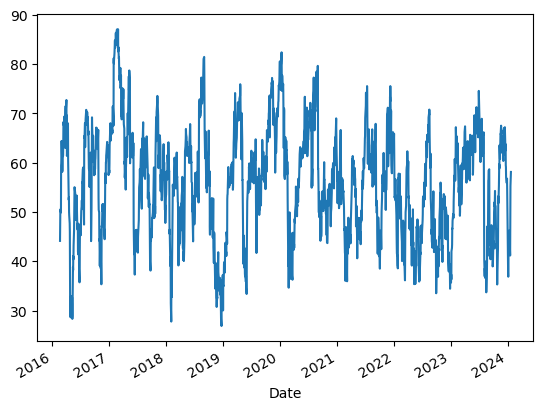

In [26]:
# RSI Indicator for Apple Stock
df.xs('AAPL',level=1)['rsi'].plot()

In [27]:
# Bollinger Bands -> We want lower band , middle band and upper band

# We would like to normalize and scale the indicator itself , so we will supply the log for the bollinger bands from the closing price
pandas_ta.bbands(close = df.xs('AAPL',level=1)['adj close'],length =20)
# It gives the lower , middle and upper bands

BBL_20_2.0  BBM_20_2.0  BBU_20_2.0  BBB_20_2.0  BBP_20_2.0
Date                                                                  
2016-01-25         NaN         NaN         NaN         NaN         NaN
2016-01-26         NaN         NaN         NaN         NaN         NaN
2016-01-27         NaN         NaN         NaN         NaN         NaN
2016-01-28         NaN         NaN         NaN         NaN         NaN
2016-01-29         NaN         NaN         NaN         NaN         NaN
...                ...         ...         ...         ...         ...
2024-01-16  178.707584  189.299947  199.892309   11.191088    0.221310
2024-01-17  178.235534  188.556395  198.877256   10.947240    0.204036
2024-01-18  178.397761  188.193858  197.989955   10.410645    0.509992
2024-01-19  178.804311  187.925201  197.046090    9.706936    0.685874
2024-01-22  178.886130  187.878260  196.870390    9.572294    0.820538

[2012 rows x 5 columns]

In [28]:
df['bb_low'] = df.groupby(level=1)['adj close'].transform(lambda x : pandas_ta.bbands(close = np.log1p(x),length=20).iloc[:,0])
df

Price               adj close       close        high         low        open  \
Date       Ticker                                                               
2016-01-25 A        35.247879   37.610001   38.029999   37.400002   37.400002   
           AAL      37.155502   38.880001   40.160000   38.820000   40.020000   
           AAPL     22.603527   24.860001   25.382500   24.802500   25.379999   
           ABBV     41.553230   58.650002   59.810001   58.180000   59.029999   
           ABT      34.191597   39.660000   40.160000   39.580002   40.029999   
...                       ...         ...         ...         ...         ...   
2024-01-22 YUM     130.407379  131.059998  132.639999  131.039993  132.539993   
           ZBH     122.589996  122.589996  124.160004  122.480003  123.690002   
           ZBRA    254.570007  254.570007  258.220001  250.369995  251.850006   
           ZION     42.858624   43.310001   44.009998   41.040001   42.029999   
           ZTS     191.199997  191.199997  194.250000  190.110001  190.110001   

Price                   volume  garman_klass_vol        rsi    bb_low  
Date       Ticker                                                      
2016-01-25 A         1831200.0         -0.001217        NaN       NaN  
           AAL      10113200.0         -0.001555        NaN       NaN  
           AAPL    207178000.0         -0.004918        NaN       NaN  
           ABBV      9681900.0         -0.047229        NaN       NaN  
           ABT       5304600.0         -0.009495        NaN       NaN  
...                        ...               ...        ...       ...  
2024-01-22 YUM       1543400.0         -0.000028  57.771236  4.852398  
           ZBH       1405400.0          0.000062  61.387999  4.790607  
           ZBRA       357600.0          0.000432  53.168756  5.475274  
           ZION      6801600.0          0.002294  56.878802  3.717856  
           ZTS       1890700.0          0.000219  52.248757  5.247487  

[994788 rows x 9 columns]

In [29]:
df['bb_mid'] = df.groupby(level=1)['adj close'].transform(lambda x : pandas_ta.bbands(close = np.log1p(x),length=20).iloc[:,1])
df

Price               adj close       close        high         low        open  \
Date       Ticker                                                               
2016-01-25 A        35.247879   37.610001   38.029999   37.400002   37.400002   
           AAL      37.155502   38.880001   40.160000   38.820000   40.020000   
           AAPL     22.603527   24.860001   25.382500   24.802500   25.379999   
           ABBV     41.553230   58.650002   59.810001   58.180000   59.029999   
           ABT      34.191597   39.660000   40.160000   39.580002   40.029999   
...                       ...         ...         ...         ...         ...   
2024-01-22 YUM     130.407379  131.059998  132.639999  131.039993  132.539993   
           ZBH     122.589996  122.589996  124.160004  122.480003  123.690002   
           ZBRA    254.570007  254.570007  258.220001  250.369995  251.850006   
           ZION     42.858624   43.310001   44.009998   41.040001   42.029999   
           ZTS     191.199997  191.199997  194.250000  190.110001  190.110001   

Price                   volume  garman_klass_vol        rsi    bb_low  \
Date       Ticker                                                       
2016-01-25 A         1831200.0         -0.001217        NaN       NaN   
           AAL      10113200.0         -0.001555        NaN       NaN   
           AAPL    207178000.0         -0.004918        NaN       NaN   
           ABBV      9681900.0         -0.047229        NaN       NaN   
           ABT       5304600.0         -0.009495        NaN       NaN   
...                        ...               ...        ...       ...   
2024-01-22 YUM       1543400.0         -0.000028  57.771236  4.852398   
           ZBH       1405400.0          0.000062  61.387999  4.790607   
           ZBRA       357600.0          0.000432  53.168756  5.475274   
           ZION      6801600.0          0.002294  56.878802  3.717856   
           ZTS       1890700.0          0.000219  52.248757  5.247487   

Price                bb_mid  
Date       Ticker            
2016-01-25 A            NaN  
           AAL          NaN  
           AAPL         NaN  
           ABBV         NaN  
           ABT          NaN  
...                     ...  
2024-01-22 YUM     4.868043  
           ZBH     4.810030  
           ZBRA    5.558560  
           ZION    3.777903  
           ZTS     5.274933  

[994788 rows x 10 columns]

In [30]:
df['bb_high'] = df.groupby(level=1)['adj close'].transform(lambda x : pandas_ta.bbands(close = np.log1p(x),length=20).iloc[:,2])
df

Price               adj close       close        high         low        open  \
Date       Ticker                                                               
2016-01-25 A        35.247879   37.610001   38.029999   37.400002   37.400002   
           AAL      37.155502   38.880001   40.160000   38.820000   40.020000   
           AAPL     22.603527   24.860001   25.382500   24.802500   25.379999   
           ABBV     41.553230   58.650002   59.810001   58.180000   59.029999   
           ABT      34.191597   39.660000   40.160000   39.580002   40.029999   
...                       ...         ...         ...         ...         ...   
2024-01-22 YUM     130.407379  131.059998  132.639999  131.039993  132.539993   
           ZBH     122.589996  122.589996  124.160004  122.480003  123.690002   
           ZBRA    254.570007  254.570007  258.220001  250.369995  251.850006   
           ZION     42.858624   43.310001   44.009998   41.040001   42.029999   
           ZTS     191.199997  191.199997  194.250000  190.110001  190.110001   

Price                   volume  garman_klass_vol        rsi    bb_low  \
Date       Ticker                                                       
2016-01-25 A         1831200.0         -0.001217        NaN       NaN   
           AAL      10113200.0         -0.001555        NaN       NaN   
           AAPL    207178000.0         -0.004918        NaN       NaN   
           ABBV      9681900.0         -0.047229        NaN       NaN   
           ABT       5304600.0         -0.009495        NaN       NaN   
...                        ...               ...        ...       ...   
2024-01-22 YUM       1543400.0         -0.000028  57.771236  4.852398   
           ZBH       1405400.0          0.000062  61.387999  4.790607   
           ZBRA       357600.0          0.000432  53.168756  5.475274   
           ZION      6801600.0          0.002294  56.878802  3.717856   
           ZTS       1890700.0          0.000219  52.248757  5.247487   

Price                bb_mid   bb_high  
Date       Ticker                      
2016-01-25 A            NaN       NaN  
           AAL          NaN       NaN  
           AAPL         NaN       NaN  
           ABBV         NaN       NaN  
           ABT          NaN       NaN  
...                     ...       ...  
2024-01-22 YUM     4.868043  4.883688  
           ZBH     4.810030  4.829454  
           ZBRA    5.558560  5.641847  
           ZION    3.777903  3.837950  
           ZTS     5.274933  5.302380  

[994788 rows x 11 columns]

In [31]:
# ATR 

# we would have to define a function for this as atr method require 3 inputs

def compute_atr(stock_data) : 
    atr = pandas_ta.atr(high = stock_data['high'],
                       low = stock_data['low'],
                       close = stock_data['close'],
                       length = 14)
    return atr.sub(atr.mean()).div(atr.std())
    # here we also normalised the data  
    

df['atr'] = df.groupby(level =1, group_keys = False).apply(compute_atr)
df
# We have put group_keys as false because otherwise it would return us another date column

                        

Price               adj close       close        high         low        open  \
Date       Ticker                                                               
2016-01-25 A        35.247879   37.610001   38.029999   37.400002   37.400002   
           AAL      37.155502   38.880001   40.160000   38.820000   40.020000   
           AAPL     22.603527   24.860001   25.382500   24.802500   25.379999   
           ABBV     41.553230   58.650002   59.810001   58.180000   59.029999   
           ABT      34.191597   39.660000   40.160000   39.580002   40.029999   
...                       ...         ...         ...         ...         ...   
2024-01-22 YUM     130.407379  131.059998  132.639999  131.039993  132.539993   
           ZBH     122.589996  122.589996  124.160004  122.480003  123.690002   
           ZBRA    254.570007  254.570007  258.220001  250.369995  251.850006   
           ZION     42.858624   43.310001   44.009998   41.040001   42.029999   
           ZTS     191.199997  191.199997  194.250000  190.110001  190.110001   

Price                   volume  garman_klass_vol        rsi    bb_low  \
Date       Ticker                                                       
2016-01-25 A         1831200.0         -0.001217        NaN       NaN   
           AAL      10113200.0         -0.001555        NaN       NaN   
           AAPL    207178000.0         -0.004918        NaN       NaN   
           ABBV      9681900.0         -0.047229        NaN       NaN   
           ABT       5304600.0         -0.009495        NaN       NaN   
...                        ...               ...        ...       ...   
2024-01-22 YUM       1543400.0         -0.000028  57.771236  4.852398   
           ZBH       1405400.0          0.000062  61.387999  4.790607   
           ZBRA       357600.0          0.000432  53.168756  5.475274   
           ZION      6801600.0          0.002294  56.878802  3.717856   
           ZTS       1890700.0          0.000219  52.248757  5.247487   

Price                bb_mid   bb_high       atr  
Date       Ticker                                
2016-01-25 A            NaN       NaN       NaN  
           AAL          NaN       NaN       NaN  
           AAPL         NaN       NaN       NaN  
           ABBV         NaN       NaN       NaN  
           ABT          NaN       NaN       NaN  
...                     ...       ...       ...  
2024-01-22 YUM     4.868043  4.883688 -0.037507  
           ZBH     4.810030  4.829454 -0.782370  
           ZBRA    5.558560  5.641847  0.148250  
           ZION    3.777903  3.837950  0.399930  
           ZTS     5.274933  5.302380  0.675775  

[994788 rows x 12 columns]

In [32]:
# MACD 
# We will do something similar to ATR

def compute_macd(close) : 
    macd = pandas_ta.macd(close = close , length = 20).iloc[:,0]
    return macd.sub(macd.mean()).div(macd.std())

# We are straight away normalising the indicators as we will not need
# to worry in future when we put this data into our machine learning model


df['macd'] = df.groupby(level = 1 , group_keys = False)['adj close'].apply(compute_macd)

df

Price               adj close       close        high         low        open  \
Date       Ticker                                                               
2016-01-25 A        35.247879   37.610001   38.029999   37.400002   37.400002   
           AAL      37.155502   38.880001   40.160000   38.820000   40.020000   
           AAPL     22.603527   24.860001   25.382500   24.802500   25.379999   
           ABBV     41.553230   58.650002   59.810001   58.180000   59.029999   
           ABT      34.191597   39.660000   40.160000   39.580002   40.029999   
...                       ...         ...         ...         ...         ...   
2024-01-22 YUM     130.407379  131.059998  132.639999  131.039993  132.539993   
           ZBH     122.589996  122.589996  124.160004  122.480003  123.690002   
           ZBRA    254.570007  254.570007  258.220001  250.369995  251.850006   
           ZION     42.858624   43.310001   44.009998   41.040001   42.029999   
           ZTS     191.199997  191.199997  194.250000  190.110001  190.110001   

Price                   volume  garman_klass_vol        rsi    bb_low  \
Date       Ticker                                                       
2016-01-25 A         1831200.0         -0.001217        NaN       NaN   
           AAL      10113200.0         -0.001555        NaN       NaN   
           AAPL    207178000.0         -0.004918        NaN       NaN   
           ABBV      9681900.0         -0.047229        NaN       NaN   
           ABT       5304600.0         -0.009495        NaN       NaN   
...                        ...               ...        ...       ...   
2024-01-22 YUM       1543400.0         -0.000028  57.771236  4.852398   
           ZBH       1405400.0          0.000062  61.387999  4.790607   
           ZBRA       357600.0          0.000432  53.168756  5.475274   
           ZION      6801600.0          0.002294  56.878802  3.717856   
           ZTS       1890700.0          0.000219  52.248757  5.247487   

Price                bb_mid   bb_high       atr      macd  
Date       Ticker                                          
2016-01-25 A            NaN       NaN       NaN       NaN  
           AAL          NaN       NaN       NaN       NaN  
           AAPL         NaN       NaN       NaN       NaN  
           ABBV         NaN       NaN       NaN       NaN  
           ABT          NaN       NaN       NaN       NaN  
...                     ...       ...       ...       ...  
2024-01-22 YUM     4.868043  4.883688 -0.037507  0.330487  
           ZBH     4.810030  4.829454 -0.782370  0.641820  
           ZBRA    5.558560  5.641847  0.148250 -0.090278  
           ZION    3.777903  3.837950  0.399930  0.339780  
           ZTS     5.274933  5.302380  0.675775  0.197068  

[994788 rows x 13 columns]

In [33]:
# except RSI we have normalised all the other stuff
# we will not normalise RSI

NameError: name 'df' is not defined

In [34]:
# Dollar Volume
df['dollar_volume'] = (df['adj close'])*df['volume']/1e6
df

# we divided it by 1 million as millions of stocks are traded each day


Price               adj close       close        high         low        open  \
Date       Ticker                                                               
2016-01-25 A        35.247879   37.610001   38.029999   37.400002   37.400002   
           AAL      37.155502   38.880001   40.160000   38.820000   40.020000   
           AAPL     22.603527   24.860001   25.382500   24.802500   25.379999   
           ABBV     41.553230   58.650002   59.810001   58.180000   59.029999   
           ABT      34.191597   39.660000   40.160000   39.580002   40.029999   
...                       ...         ...         ...         ...         ...   
2024-01-22 YUM     130.407379  131.059998  132.639999  131.039993  132.539993   
           ZBH     122.589996  122.589996  124.160004  122.480003  123.690002   
           ZBRA    254.570007  254.570007  258.220001  250.369995  251.850006   
           ZION     42.858624   43.310001   44.009998   41.040001   42.029999   
           ZTS     191.199997  191.199997  194.250000  190.110001  190.110001   

Price                   volume  garman_klass_vol        rsi    bb_low  \
Date       Ticker                                                       
2016-01-25 A         1831200.0         -0.001217        NaN       NaN   
           AAL      10113200.0         -0.001555        NaN       NaN   
           AAPL    207178000.0         -0.004918        NaN       NaN   
           ABBV      9681900.0         -0.047229        NaN       NaN   
           ABT       5304600.0         -0.009495        NaN       NaN   
...                        ...               ...        ...       ...   
2024-01-22 YUM       1543400.0         -0.000028  57.771236  4.852398   
           ZBH       1405400.0          0.000062  61.387999  4.790607   
           ZBRA       357600.0          0.000432  53.168756  5.475274   
           ZION      6801600.0          0.002294  56.878802  3.717856   
           ZTS       1890700.0          0.000219  52.248757  5.247487   

Price                bb_mid   bb_high       atr      macd  dollar_volume  
Date       Ticker                                                         
2016-01-25 A            NaN       NaN       NaN       NaN      64.545916  
           AAL          NaN       NaN       NaN       NaN     375.761026  
           AAPL         NaN       NaN       NaN       NaN    4682.953531  
           ABBV         NaN       NaN       NaN       NaN     402.314220  
           ABT          NaN       NaN       NaN       NaN     181.372745  
...                     ...       ...       ...       ...            ...  
2024-01-22 YUM     4.868043  4.883688 -0.037507  0.330487     201.270749  
           ZBH     4.810030  4.829454 -0.782370  0.641820     172.287981  
           ZBRA    5.558560  5.641847  0.148250 -0.090278      91.034235  
           ZION    3.777903  3.837950  0.399930  0.339780     291.507214  
           ZTS     5.274933  5.302380  0.675775  0.197068     361.501834  

[994788 rows x 14 columns]

In [35]:
# We will now Aggregate to monthly level and filter top 150 most 
# liquid stocks for each month

# To reduce training time for machine learning model
# and experiment with features and strategies,
# we convert the business-daily data to month-end frequency



In [36]:
# We will take average dollar volume for the each month
# For the other 5 indicators we would take the value at the end of each month

In [37]:
df.unstack('Ticker')['dollar_volume']

Ticker               A         AAL          AAPL        ABBV        ABNB  \
Date                                                                       
2016-01-25   64.545916  375.761026   4682.953531  402.314220         NaN   
2016-01-26   61.692021  306.804619   6825.564808  306.320097         NaN   
2016-01-27   51.369273  386.350631  11328.492853  367.303264         NaN   
2016-01-28  117.750117  623.714626   4763.305792  416.314104         NaN   
2016-01-29  104.441132  780.889606   5701.162989  691.138200         NaN   
...                ...         ...           ...         ...         ...   
2024-01-16  180.405511  737.208862  12031.326531  766.658576  744.608320   
2024-01-17  161.098082  478.300106   8632.926636  716.719094  410.298693   
2024-01-18  183.270217  808.859706  14695.482858  828.633205  722.611885   
2024-01-19  199.887428  529.424712  13151.244370  966.046535  571.655999   
2024-01-22  200.455370  517.961786  11644.502698  804.456957  636.616604   

Ticker             ABT        ACGL         ACN         ADBE         ADI  ...  \
Date                                                                     ...   
2016-01-25  181.372745   59.323729  264.239944   342.307637  114.422014  ...   
2016-01-26  185.591336   39.935498  262.975559   238.573871  102.799126  ...   
2016-01-27  367.415393   42.479283  272.133227   260.540405  119.535547  ...   
2016-01-28  745.141406   25.068241  305.352373   449.266042  118.252658  ...   
2016-01-29  526.154748   40.712385  451.406445   417.083822  154.343000  ...   
...                ...         ...         ...          ...         ...  ...   
2024-01-16  668.453773  114.777008  740.983802  1270.727432  445.681991  ...   
2024-01-17  532.280961  113.245462  677.982403  1542.885567  542.549616  ...   
2024-01-18  581.273943  142.270126  742.147130  1658.560354  681.137439  ...   
2024-01-19  784.835156  161.517355  912.006165  2299.489109  856.072600  ...   
2024-01-22  578.086887  132.091507  845.501005  2708.912041  564.661751  ...   

Ticker            WYNN         XEL          XOM        XRAY         XYL  \
Date                                                                      
2016-01-25  309.208905   67.409750   866.440091   44.819222   34.522537   
2016-01-26  174.248335   78.442748   984.416188   83.337795   57.399515   
2016-01-27  174.392272  108.623182   934.395880   78.977843   62.576714   
2016-01-28  207.254433   93.727609   852.672778   62.841244   48.057140   
2016-01-29  189.424868  162.762156  1342.674322   85.634227   59.268003   
...                ...         ...          ...         ...         ...   
2024-01-16  137.004769  265.226503  1958.622839   75.031247  172.760154   
2024-01-17  235.364257  241.537765  1766.463511   50.186209  147.989903   
2024-01-18  205.892122  265.311277  2008.356132   54.475470  141.788558   
2024-01-19  192.752352  213.081150  1928.762819   69.255286  125.967387   
2024-01-22  206.502329  227.393192  1914.339043  114.620455  100.501690   

Ticker             YUM         ZBH        ZBRA        ZION         ZTS  
Date                                                                    
2016-01-25  289.547689   99.746489   52.766065   82.518376   96.618827  
2016-01-26  187.986913  140.402172   54.464564  118.647667  157.601132  
2016-01-27  174.885476  188.024231   53.702079  111.668465  132.359344  
2016-01-28  248.871244  211.328339   25.215390   94.937382  229.398429  
2016-01-29  270.362505  209.030125   40.969321   85.215492  286.406487  
...                ...         ...         ...         ...         ...  
2024-01-16  211.298741  177.877055  121.346018  100.674886  445.991916  
2024-01-17  168.882128  137.924336  110.783543   79.292672  319.605308  
2024-01-18  246.185384  223.092131  120.352296   96.314680  730.148400  
2024-01-19  253.777915  192.799345   99.038183   95.103141  430.467149  
2024-01-22  201.270749  172.287981   91.034235  291.507214  361.501834  

[2012 rows x 503 columns]

In [38]:
# We will take the average dollar volume for each month
df.unstack('Ticker')['dollar_volume'].resample('M').mean()

Ticker               A         AAL          AAPL        ABBV         ABNB  \
Date                                                                        
2016-01-31   79.959692  494.704101   6660.295995  436.677977          NaN   
2016-02-29   91.918057  338.977812   3543.552028  353.627770          NaN   
2016-03-31   62.013612  298.909253   3231.204670  256.185607          NaN   
2016-04-30   63.234638  362.444581   3970.854483  285.881331          NaN   
2016-05-31  104.726089  304.648994   3737.581328  431.810196          NaN   
...                ...         ...           ...         ...          ...   
2023-09-30  225.452664  359.415270  11787.928692  630.086413  1474.245625   
2023-10-31  230.270452  511.970157   9276.812506  725.359333   607.690932   
2023-11-30  255.382940  383.225710   9664.608091  733.471434   725.681927   
2023-12-31  236.540083  464.680047  10336.262658  826.767663   733.953895   
2024-01-31  205.072563  596.266255  11053.548003  910.128500   522.432725   

Ticker             ABT        ACGL         ACN         ADBE         ADI  ...  \
Date                                                                     ...   
2016-01-31  401.135126   41.503827  311.221510   341.554356  121.870469  ...   
2016-02-29  244.683659   31.542992  311.360828   379.902608  113.555356  ...   
2016-03-31  229.241203   19.681929  296.039365   378.267646  101.951480  ...   
2016-04-30  309.851850   25.113596  238.244602   233.672570   83.940268  ...   
2016-05-31  398.829142   25.422941  185.897037   193.159803   91.842493  ...   
...                ...         ...         ...          ...         ...  ...   
2023-09-30  435.890464  122.295319  677.802117  1682.014217  557.926648  ...   
2023-10-31  656.946701  154.133369  565.387528  1359.971110  530.336573  ...   
2023-11-30  597.692993  186.830789  572.809696  1497.060182  590.500074  ...   
2023-12-31  516.839580  139.557395  747.479109  2129.573076  581.020044  ...   
2024-01-31  553.567648  132.693805  742.677129  1509.004592  575.895081  ...   

Ticker            WYNN         XEL          XOM        XRAY         XYL  \
Date                                                                      
2016-01-31  210.905763  102.193089   996.119852   71.122066   52.364782   
2016-02-29  298.718581  142.168404   994.406004  141.594554   65.596319   
2016-03-31  306.977883  104.878255   765.768231  152.381608   50.841166   
2016-04-30  358.027142  110.043442   624.997945   63.282500   48.621799   
2016-05-31  214.275067   98.436244   648.009505   90.882032   49.897360   
...                ...         ...          ...         ...         ...   
2023-09-30  177.485233  290.911286  1832.558516   58.825896  169.199573   
2023-10-31  151.521473  231.375996  2406.916715  102.344373  135.852471   
2023-11-30  274.582425  229.431757  2128.195343  139.395045  141.539956   
2023-12-31  166.034667  268.517624  2262.552419   87.708715  141.030723   
2024-01-31  193.458733  235.064254  1950.848677   94.447899  127.083773   

Ticker             YUM         ZBH        ZBRA        ZION         ZTS  
Date                                                                    
2016-01-31  234.330765  169.706271   45.423484   98.597477  180.476844  
2016-02-29  332.758390  133.118292   53.713541   70.006590  184.364836  
2016-03-31  218.202105  119.219446   35.659440   64.466201  194.504931  
2016-04-30  225.523855  159.701150   36.822120   60.917723  169.395317  
2016-05-31  183.154077  142.575989   52.217700   60.274958  189.560337  
...                ...         ...         ...         ...         ...  
2023-09-30  187.879023  202.585662  105.890261   99.176169  280.336074  
2023-10-31  197.593892  167.953399  110.835386  113.030290  282.007284  
2023-11-30  173.572060  213.723556  103.015525   68.781777  379.765564  
2023-12-31  206.505812  207.682671   98.037275  101.653770  334.396200  
2024-01-31  197.451585  206.236529  103.033758  102.951694  363.405128  

[97 rows x 503 columns]

In [39]:
df.unstack('Ticker')['dollar_volume'].resample('M').mean().stack('Ticker').to_frame('dollar_volume')
# we have stacked it back

dollar_volume
Date       Ticker               
2016-01-31 A           79.959692
           AAL        494.704101
           AAPL      6660.295995
           ABBV       436.677977
           ABT        401.135126
...                          ...
2024-01-31 YUM        197.451585
           ZBH        206.236529
           ZBRA       103.033758
           ZION       102.951694
           ZTS        363.405128

[47961 rows x 1 columns]

In [40]:
# For other technical indicators


last_cols = [c for c in df.columns.unique(0) if c not in ['dollar_volume','volume',
                                                         'open','high','low','close']]
last_cols

['adj close',
 'garman_klass_vol',
 'rsi',
 'bb_low',
 'bb_mid',
 'bb_high',
 'atr',
 'macd']

In [41]:
# dollar volume would be used to filter out the stocks 
# dollar volume would not be used in featuring our model


In [42]:
df.unstack()[last_cols].resample('M').last().stack('Ticker')

Price               adj close       atr   bb_high    bb_low    bb_mid  \
Date       Ticker                                                       
2016-01-31 A        35.285358       NaN       NaN       NaN       NaN   
           AAL      37.260628       NaN       NaN       NaN       NaN   
           AAPL     22.126175       NaN       NaN       NaN       NaN   
           ABBV     38.896385       NaN       NaN       NaN       NaN   
           ABT      32.631168       NaN       NaN       NaN       NaN   
...                       ...       ...       ...       ...       ...   
2024-01-31 YUM     130.407379 -0.037507  4.883688  4.852398  4.868043   
           ZBH     122.589996 -0.782370  4.829454  4.790607  4.810030   
           ZBRA    254.570007  0.148250  5.641847  5.475274  5.558560   
           ZION     42.858624  0.399930  3.837950  3.717856  3.777903   
           ZTS     191.199997  0.675775  5.302380  5.247487  5.274933   

Price              garman_klass_vol      macd        rsi  
Date       Ticker                                         
2016-01-31 A               0.000295       NaN        NaN  
           AAL             0.002147       NaN        NaN  
           AAPL           -0.001332       NaN        NaN  
           ABBV           -0.038283       NaN        NaN  
           ABT            -0.004800       NaN        NaN  
...                             ...       ...        ...  
2024-01-31 YUM            -0.000028  0.330487  57.771236  
           ZBH             0.000062  0.641820  61.387999  
           ZBRA            0.000432 -0.090278  53.168756  
           ZION            0.002294  0.339780  56.878802  
           ZTS             0.000219  0.197068  52.248757  

[47961 rows x 8 columns]

In [43]:
# Now we will concat the dollar volume and other indicators

pd.concat([df.unstack('Ticker')['dollar_volume'].resample('M').mean().stack('Ticker').to_frame('dollar_volume')
           ,df.unstack()[last_cols].resample('M').last().stack('Ticker')],axis = 1)

dollar_volume   adj close       atr   bb_high    bb_low  \
Date       Ticker                                                            
2016-01-31 A           79.959692   35.285358       NaN       NaN       NaN   
           AAL        494.704101   37.260628       NaN       NaN       NaN   
           AAPL      6660.295995   22.126175       NaN       NaN       NaN   
           ABBV       436.677977   38.896385       NaN       NaN       NaN   
           ABT        401.135126   32.631168       NaN       NaN       NaN   
...                          ...         ...       ...       ...       ...   
2024-01-31 YUM        197.451585  130.407379 -0.037507  4.883688  4.852398   
           ZBH        206.236529  122.589996 -0.782370  4.829454  4.790607   
           ZBRA       103.033758  254.570007  0.148250  5.641847  5.475274   
           ZION       102.951694   42.858624  0.399930  3.837950  3.717856   
           ZTS        363.405128  191.199997  0.675775  5.302380  5.247487   

                     bb_mid  garman_klass_vol      macd        rsi  
Date       Ticker                                                   
2016-01-31 A            NaN          0.000295       NaN        NaN  
           AAL          NaN          0.002147       NaN        NaN  
           AAPL         NaN         -0.001332       NaN        NaN  
           ABBV         NaN         -0.038283       NaN        NaN  
           ABT          NaN         -0.004800       NaN        NaN  
...                     ...               ...       ...        ...  
2024-01-31 YUM     4.868043         -0.000028  0.330487  57.771236  
           ZBH     4.810030          0.000062  0.641820  61.387999  
           ZBRA    5.558560          0.000432 -0.090278  53.168756  
           ZION    3.777903          0.002294  0.339780  56.878802  
           ZTS     5.274933          0.000219  0.197068  52.248757  

[47961 rows x 9 columns]

In [44]:
# Now aggregated the data to the monthly levels for the features we need


In [45]:
pd.concat([df.unstack('Ticker')['dollar_volume'].resample('M').mean().stack('Ticker').to_frame('dollar_volume')
           ,df.unstack()[last_cols].resample('M').last().stack('Ticker')],axis = 1).dropna()

dollar_volume   adj close       atr   bb_high    bb_low  \
Date       Ticker                                                            
2016-03-31 A           62.013612   37.347187 -1.136714  3.665222  3.598942   
           AAL        298.909253   39.297966  0.156920  3.753792  3.680381   
           AAPL      3231.204670   24.908747 -1.099101  3.262603  3.167556   
           ABBV       256.185607   40.469231 -0.951602  3.735461  3.690339   
           ABT        229.241203   36.062401 -1.122750  3.619339  3.532534   
...                          ...         ...       ...       ...       ...   
2024-01-31 YUM        197.451585  130.407379 -0.037507  4.883688  4.852398   
           ZBH        206.236529  122.589996 -0.782370  4.829454  4.790607   
           ZBRA       103.033758  254.570007  0.148250  5.641847  5.475274   
           ZION       102.951694   42.858624  0.399930  3.837950  3.717856   
           ZTS        363.405128  191.199997  0.675775  5.302380  5.247487   

                     bb_mid  garman_klass_vol      macd        rsi  
Date       Ticker                                                   
2016-03-31 A       3.632082         -0.001771  0.128898  57.725331  
           AAL     3.717086         -0.001005  0.537269  50.433071  
           AAPL    3.215080         -0.003548  0.007947  69.257041  
           ABBV    3.712900         -0.045347 -0.083776  53.345047  
           ABT     3.575936         -0.007947  0.308379  65.536581  
...                     ...               ...       ...        ...  
2024-01-31 YUM     4.868043         -0.000028  0.330487  57.771236  
           ZBH     4.810030          0.000062  0.641820  61.387999  
           ZBRA    5.558560          0.000432 -0.090278  53.168756  
           ZION    3.777903          0.002294  0.339780  56.878802  
           ZTS     5.274933          0.000219  0.197068  52.248757  

[46973 rows x 9 columns]

In [46]:
data = pd.concat([df.unstack('Ticker')['dollar_volume'].resample('M').mean().stack('Ticker').to_frame('dollar_volume')
           ,df.unstack()[last_cols].resample('M').last().stack('Ticker')],axis = 1).dropna()
data

dollar_volume   adj close       atr   bb_high    bb_low  \
Date       Ticker                                                            
2016-03-31 A           62.013612   37.347187 -1.136714  3.665222  3.598942   
           AAL        298.909253   39.297966  0.156920  3.753792  3.680381   
           AAPL      3231.204670   24.908747 -1.099101  3.262603  3.167556   
           ABBV       256.185607   40.469231 -0.951602  3.735461  3.690339   
           ABT        229.241203   36.062401 -1.122750  3.619339  3.532534   
...                          ...         ...       ...       ...       ...   
2024-01-31 YUM        197.451585  130.407379 -0.037507  4.883688  4.852398   
           ZBH        206.236529  122.589996 -0.782370  4.829454  4.790607   
           ZBRA       103.033758  254.570007  0.148250  5.641847  5.475274   
           ZION       102.951694   42.858624  0.399930  3.837950  3.717856   
           ZTS        363.405128  191.199997  0.675775  5.302380  5.247487   

                     bb_mid  garman_klass_vol      macd        rsi  
Date       Ticker                                                   
2016-03-31 A       3.632082         -0.001771  0.128898  57.725331  
           AAL     3.717086         -0.001005  0.537269  50.433071  
           AAPL    3.215080         -0.003548  0.007947  69.257041  
           ABBV    3.712900         -0.045347 -0.083776  53.345047  
           ABT     3.575936         -0.007947  0.308379  65.536581  
...                     ...               ...       ...        ...  
2024-01-31 YUM     4.868043         -0.000028  0.330487  57.771236  
           ZBH     4.810030          0.000062  0.641820  61.387999  
           ZBRA    5.558560          0.000432 -0.090278  53.168756  
           ZION    3.777903          0.002294  0.339780  56.878802  
           ZTS     5.274933          0.000219  0.197068  52.248757  

[46973 rows x 9 columns]

In [47]:
# calculate 5 year rolling average dollar volume for each stock and then use this aggregted volume to filter out top 150 most 
# liquid stock for each month 

data['dollar_volume'].unstack('Ticker').rolling(5*12).mean().stack()

Date        Ticker
2021-02-28  A          138.320972
            AAL        425.379643
            AAPL      6978.322626
            ABBV       495.403729
            ABT        397.905548
                         ...     
2024-01-31  YUM        186.408117
            ZBH        174.612811
            ZBRA       125.593340
            ZION        86.484202
            ZTS        305.675399
Length: 17542, dtype: float64

In [48]:
data['dollar_volume'] = (data.loc[:,'dollar_volume'].unstack('Ticker').rolling(5*12,min_periods=12).mean().stack())
data

dollar_volume   adj close       atr   bb_high    bb_low  \
Date       Ticker                                                            
2016-03-31 A                 NaN   37.347187 -1.136714  3.665222  3.598942   
           AAL               NaN   39.297966  0.156920  3.753792  3.680381   
           AAPL              NaN   24.908747 -1.099101  3.262603  3.167556   
           ABBV              NaN   40.469231 -0.951602  3.735461  3.690339   
           ABT               NaN   36.062401 -1.122750  3.619339  3.532534   
...                          ...         ...       ...       ...       ...   
2024-01-31 YUM        186.408117  130.407379 -0.037507  4.883688  4.852398   
           ZBH        174.612811  122.589996 -0.782370  4.829454  4.790607   
           ZBRA       125.593340  254.570007  0.148250  5.641847  5.475274   
           ZION        86.484202   42.858624  0.399930  3.837950  3.717856   
           ZTS        305.675399  191.199997  0.675775  5.302380  5.247487   

                     bb_mid  garman_klass_vol      macd        rsi  
Date       Ticker                                                   
2016-03-31 A       3.632082         -0.001771  0.128898  57.725331  
           AAL     3.717086         -0.001005  0.537269  50.433071  
           AAPL    3.215080         -0.003548  0.007947  69.257041  
           ABBV    3.712900         -0.045347 -0.083776  53.345047  
           ABT     3.575936         -0.007947  0.308379  65.536581  
...                     ...               ...       ...        ...  
2024-01-31 YUM     4.868043         -0.000028  0.330487  57.771236  
           ZBH     4.810030          0.000062  0.641820  61.387999  
           ZBRA    5.558560          0.000432 -0.090278  53.168756  
           ZION    3.777903          0.002294  0.339780  56.878802  
           ZTS     5.274933          0.000219  0.197068  52.248757  

[46973 rows x 9 columns]

In [49]:
data['dollar_vol_rank'] = (data.groupby('Date')['dollar_volume'].rank(ascending = False))
data
# Finding out the dollar volume rank of each stock for every month

dollar_volume   adj close       atr   bb_high    bb_low  \
Date       Ticker                                                            
2016-03-31 A                 NaN   37.347187 -1.136714  3.665222  3.598942   
           AAL               NaN   39.297966  0.156920  3.753792  3.680381   
           AAPL              NaN   24.908747 -1.099101  3.262603  3.167556   
           ABBV              NaN   40.469231 -0.951602  3.735461  3.690339   
           ABT               NaN   36.062401 -1.122750  3.619339  3.532534   
...                          ...         ...       ...       ...       ...   
2024-01-31 YUM        186.408117  130.407379 -0.037507  4.883688  4.852398   
           ZBH        174.612811  122.589996 -0.782370  4.829454  4.790607   
           ZBRA       125.593340  254.570007  0.148250  5.641847  5.475274   
           ZION        86.484202   42.858624  0.399930  3.837950  3.717856   
           ZTS        305.675399  191.199997  0.675775  5.302380  5.247487   

                     bb_mid  garman_klass_vol      macd        rsi  \
Date       Ticker                                                    
2016-03-31 A       3.632082         -0.001771  0.128898  57.725331   
           AAL     3.717086         -0.001005  0.537269  50.433071   
           AAPL    3.215080         -0.003548  0.007947  69.257041   
           ABBV    3.712900         -0.045347 -0.083776  53.345047   
           ABT     3.575936         -0.007947  0.308379  65.536581   
...                     ...               ...       ...        ...   
2024-01-31 YUM     4.868043         -0.000028  0.330487  57.771236   
           ZBH     4.810030          0.000062  0.641820  61.387999   
           ZBRA    5.558560          0.000432 -0.090278  53.168756   
           ZION    3.777903          0.002294  0.339780  56.878802   
           ZTS     5.274933          0.000219  0.197068  52.248757   

                   dollar_vol_rank  
Date       Ticker                   
2016-03-31 A                   NaN  
           AAL                 NaN  
           AAPL                NaN  
           ABBV                NaN  
           ABT                 NaN  
...                            ...  
2024-01-31 YUM               261.0  
           ZBH               278.0  
           ZBRA              356.0  
           ZION              449.0  
           ZTS               154.0  

[46973 rows x 10 columns]

In [50]:
# we want the top 150 most liquid stock 

data = data[data['dollar_vol_rank'] < 150].drop(['dollar_volume','dollar_vol_rank'],axis = 1)

In [51]:
data

adj close       atr   bb_high    bb_low    bb_mid  \
Date       Ticker                                                       
2017-02-28 AAL      44.898846  0.224836  3.864723  3.767394  3.816059   
           AAPL     31.969782 -1.180172  3.527550  3.403955  3.465752   
           ABBV     45.488468 -1.521432  3.847692  3.810368  3.829030   
           ABT      39.848408 -1.271881  3.734055  3.624358  3.679207   
           ACN     109.569885 -1.102162  4.731512  4.614227  4.672869   
...                       ...       ...       ...       ...       ...   
2024-01-31 VRTX    440.109985  0.826227  6.099764  5.984371  6.042068   
           VZ       39.580002 -0.413135  3.723980  3.618261  3.671120   
           WFC      48.191509 -0.341161  3.942465  3.857025  3.899745   
           WMT      54.130001 -0.122132  4.019566  3.962025  3.990795   
           XOM      95.928474  0.070062  4.648645  4.564100  4.606372   

                   garman_klass_vol      macd        rsi  
Date       Ticker                                         
2017-02-28 AAL            -0.000264  0.085361  50.168934  
           AAPL           -0.001850  0.185332  84.344477  
           ABBV           -0.037405 -0.149702  53.680409  
           ABT            -0.006505  0.668455  71.877141  
           ACN            -0.004939  0.183161  63.222936  
...                             ...       ...        ...  
2024-01-31 VRTX            0.000086  3.385570  74.901664  
           VZ              0.000046  1.333251  63.731965  
           WFC             0.000126  0.227648  56.767832  
           WMT             0.000038  1.035131  59.841539  
           XOM             0.000070 -1.238093  38.329246  

[12516 rows x 8 columns]

In [52]:
# Calculate monthly results for different time horizons and add them as additional features to the ones we already have here
    # To capture time series dynamics that reflect , for example , momemtum pattern, we compute historical return using the 
    # method .pct_change(lag),that is, return over various monthly periods as identified by lags 

In [53]:
# For a particular stock
g = df.xs('AAPL',level = 1) 

In [54]:
outlier_cutoff = 0.005 
# we will clip the outlier values of the stocks
# all values above the outlier threshold , they will be assigned threshold of that percenta
# cutoff value will be 95%

lags = [1,2,3,6,9,12]

for lag in lags : 
    g[f'return_{lag}m'] = (g['adj close']
                           .pct_change(lag)
                           .pipe(lambda x : x.clip(lower = x.quantile(outlier_cutoff),
                                                   upper = x.quantile(1 - outlier_cutoff)))
                                                                                .add(1)
                                                                                .pow(1/lag)
                                                                                .sub(1))
                
g

Price        adj close       close        high         low        open  \
Date                                                                     
2016-01-25   22.603527   24.860001   25.382500   24.802500   25.379999   
2016-01-26   22.728548   24.997499   25.219999   24.517500   24.982500   
2016-01-27   21.235132   23.355000   24.157499   23.334999   24.010000   
2016-01-28   21.387430   23.522499   23.629999   23.097500   23.447500   
2016-01-29   22.126175   24.334999   24.334999   23.587500   23.697500   
...                ...         ...         ...         ...         ...   
2024-01-16  183.395981  183.630005  184.259995  180.929993  182.160004   
2024-01-17  182.447189  182.679993  182.929993  180.300003  181.270004   
2024-01-18  188.389618  188.630005  189.139999  185.830002  186.089996   
2024-01-19  191.315872  191.559998  191.949997  188.820007  189.330002   
2024-01-22  193.642899  193.889999  195.330002  192.259995  192.300003   

Price            volume  garman_klass_vol        rsi    bb_low    bb_mid  \
Date                                                                       
2016-01-25  207178000.0         -0.004918        NaN       NaN       NaN   
2016-01-26  300308000.0         -0.003055        NaN       NaN       NaN   
2016-01-27  533478800.0         -0.005227        NaN       NaN       NaN   
2016-01-28  222715200.0         -0.003007        NaN       NaN       NaN   
2016-01-29  257666000.0         -0.001332        NaN       NaN       NaN   
...                 ...               ...        ...       ...       ...   
2024-01-16   65603000.0          0.000149  42.509314  5.192522  5.248214   
2024-01-17   47317400.0          0.000089  41.171563  5.189938  5.244317   
2024-01-18   78005800.0          0.000098  51.279693  5.190782  5.242438   
2024-01-19   68741000.0          0.000093  55.264104  5.192845  5.241060   
2024-01-22   60133900.0          0.000107  58.130384  5.193260  5.240820   

Price        bb_high       atr      macd  dollar_volume  return_1m  return_2m  \
Date                                                                            
2016-01-25       NaN       NaN       NaN    4682.953531        NaN        NaN   
2016-01-26       NaN       NaN       NaN    6825.564808   0.005531        NaN   
2016-01-27       NaN       NaN       NaN   11328.492853  -0.062383  -0.030742   
2016-01-28       NaN       NaN       NaN    4763.305792   0.007172  -0.029951   
2016-01-29       NaN       NaN       NaN    5701.162989   0.034541   0.020765   
...              ...       ...       ...            ...        ...        ...   
2024-01-16  5.303906  0.603177 -1.167958   12031.326531  -0.012317  -0.005294   
2024-01-17  5.298695  0.614646 -1.253113    8632.926636  -0.005173  -0.008752   
2024-01-18  5.294094  0.770640 -1.071658   14695.482858   0.032571   0.013523   
2024-01-19  5.289276  0.769683 -0.803806   13151.244370   0.015533   0.024016   
2024-01-22  5.288380  0.789691 -0.495239   11644.502698   0.012163   0.013847   

Price       return_3m  return_6m  return_9m  return_12m  
Date                                                     
2016-01-25        NaN        NaN        NaN         NaN  
2016-01-26        NaN        NaN        NaN         NaN  
2016-01-27        NaN        NaN        NaN         NaN  
2016-01-28  -0.018265        NaN        NaN         NaN  
2016-01-29  -0.008914        NaN        NaN         NaN  
...               ...        ...        ...         ...  
2024-01-16  -0.004604   0.002241  -0.001209   -0.004203  
2024-01-17  -0.005254  -0.002604  -0.000950   -0.004818  
2024-01-18   0.004835   0.003117   0.004039   -0.001704  
2024-01-19   0.014193   0.004750   0.006209    0.002619  
2024-01-22   0.020050   0.007318   0.004891    0.004259  

[2012 rows x 20 columns]

In [55]:
# we will do the above step for each stock

def calculate_returns(df) : 
    outlier_cutoff = 0.005 
    lags = [1,2,3,6,9,12]

    for lag in lags : 
        df[f'return_{lag}m'] = (df['adj close']
                               .pct_change(lag)
                               .pipe(lambda x : x.clip(lower = x.quantile(outlier_cutoff),
                                                       upper = x.quantile(1 - outlier_cutoff)))
                                                                                    .add(1)
                                                                                    .pow(1/lag)
                                                                                    .sub(1))
                                   
    return df

data = data.groupby(level = 1 , group_keys = False).apply(calculate_returns).dropna()

In [56]:
data

adj close       atr   bb_high    bb_low    bb_mid  \
Date       Ticker                                                       
2018-02-28 AAL      52.977322  1.349379  4.015218  3.875603  3.945411   
           AAPL     42.226002 -0.784020  3.793888  3.615828  3.704858   
           ABBV     88.056595  1.940762  4.539666  4.420361  4.480013   
           ABT      54.474926 -0.602291  4.051457  3.947487  3.999472   
           ACN     146.918503 -0.510266  5.030859  4.932437  4.981648   
...                       ...       ...       ...       ...       ...   
2024-01-31 VRTX    440.109985  0.826227  6.099764  5.984371  6.042068   
           VZ       39.580002 -0.413135  3.723980  3.618261  3.671120   
           WFC      48.191509 -0.341161  3.942465  3.857025  3.899745   
           WMT      54.130001 -0.122132  4.019566  3.962025  3.990795   
           XOM      95.928474  0.070062  4.648645  4.564100  4.606372   

                   garman_klass_vol      macd        rsi  return_1m  \
Date       Ticker                                                     
2018-02-28 AAL            -0.000118  0.424686  55.685263   0.000632   
           AAPL           -0.001265 -0.022701  59.836070   0.068185   
           ABBV           -0.034391  1.180579  56.507211   0.032169   
           ABT            -0.004361 -0.042084  55.823924  -0.029440   
           ACN            -0.003895  0.117467  54.875570   0.001929   
...                             ...       ...        ...        ...   
2024-01-31 VRTX            0.000086  3.385570  74.901664   0.081644   
           VZ              0.000046  1.333251  63.731965   0.067572   
           WFC             0.000126  0.227648  56.767832  -0.014019   
           WMT             0.000038  1.035131  59.841539   0.030067   
           XOM             0.000070 -1.238093  38.329246  -0.031606   

                   return_2m  return_3m  return_6m  return_9m  return_12m  
Date       Ticker                                                          
2018-02-28 AAL      0.022092   0.024888   0.033351   0.013426    0.013883  
           AAPL     0.028019   0.013390   0.015155   0.018521    0.023458  
           ABBV     0.098315   0.063744   0.076940   0.065862    0.050452  
           ABT      0.030620   0.024517   0.030254   0.033180    0.026397  
           ACN      0.025541   0.028460   0.036957   0.030116    0.024744  
...                      ...        ...        ...        ...         ...  
2024-01-31 VRTX     0.113737   0.067186   0.037767   0.028845    0.026090  
           VZ       0.024707   0.046373   0.031736   0.008336    0.001914  
           WFC      0.043245   0.071774   0.011185   0.025205    0.005483  
           WMT      0.027007   0.001635   0.006278   0.011868    0.013987  
           XOM     -0.029238  -0.026336  -0.014058  -0.019235   -0.012196  

[10351 rows x 14 columns]

In [57]:
# Now we will download fama-french factors and calculate roling factor betas  

    # we will introduce the fama-french data to estimate the exposure of assets to common risk factors using linear regression
    # The five fama-french factors , namely market risk , size , value , operating profitability , and investment have been
    # shown empirically to explain asset returns and are commonly used to assess the risk/return profile of portfolios.
    # Hence, it is natural to include past factor exposures as financial features in models.
    
    # we can access the historical factor returns using the pandas-datareader and estimate historical exposures using the 
    # RollingOLS rollin linear regression

In [58]:
# Link -> https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html

In [59]:
web.DataReader('F-F_Research_Data_5_factors_2x3','famafrench',start='2010')
#it's showing a dictionary with monthly and yearly factors

{0:          Mkt-RF   SMB   HML   RMW   CMA    RF
 Date                                         
 2010-01   -3.36  0.34  0.43 -1.27  0.46  0.00
 2010-02    3.40  1.51  3.23 -0.27  1.43  0.00
 2010-03    6.31  1.85  2.21 -0.65  1.69  0.01
 2010-04    2.00  4.98  2.89  0.69  1.72  0.01
 2010-05   -7.89  0.04 -2.44  1.30 -0.21  0.01
 ...         ...   ...   ...   ...   ...   ...
 2023-08   -2.39 -3.65 -1.06  3.43 -2.37  0.45
 2023-09   -5.24 -1.80  1.52  1.86 -0.83  0.43
 2023-10   -3.19 -4.04  0.19  2.46 -0.66  0.47
 2023-11    8.84 -0.12  1.64 -3.91 -1.00  0.44
 2023-12    4.85  7.32  4.94 -3.07  1.32  0.43
 
 [168 rows x 6 columns],
 1:       Mkt-RF    SMB    HML    RMW    CMA    RF
 Date                                          
 2010   17.37  13.61  -5.17  -1.54   9.78  0.12
 2011    0.44  -5.50  -8.41  13.48  -1.16  0.04
 2012   16.27  -0.52   9.99  -5.35   9.37  0.06
 2013   35.20   8.33   2.60  -4.17   0.95  0.02
 2014   11.71  -7.91  -1.45   1.28  -1.46  0.02
 2015    0.09  -5.89

In [60]:
# we only want the monthly factors 
web.DataReader('F-F_Research_Data_5_factors_2x3','famafrench',start='2010')[0]

Mkt-RF   SMB   HML   RMW   CMA    RF
Date                                         
2010-01   -3.36  0.34  0.43 -1.27  0.46  0.00
2010-02    3.40  1.51  3.23 -0.27  1.43  0.00
2010-03    6.31  1.85  2.21 -0.65  1.69  0.01
2010-04    2.00  4.98  2.89  0.69  1.72  0.01
2010-05   -7.89  0.04 -2.44  1.30 -0.21  0.01
...         ...   ...   ...   ...   ...   ...
2023-08   -2.39 -3.65 -1.06  3.43 -2.37  0.45
2023-09   -5.24 -1.80  1.52  1.86 -0.83  0.43
2023-10   -3.19 -4.04  0.19  2.46 -0.66  0.47
2023-11    8.84 -0.12  1.64 -3.91 -1.00  0.44
2023-12    4.85  7.32  4.94 -3.07  1.32  0.43

[168 rows x 6 columns]

In [61]:
# we will also drop the risk free return 

factor_data = web.DataReader('F-F_Research_Data_5_factors_2x3','famafrench',start='2010')[0].drop('RF',axis=1)
factor_data

Mkt-RF   SMB   HML   RMW   CMA
Date                                   
2010-01   -3.36  0.34  0.43 -1.27  0.46
2010-02    3.40  1.51  3.23 -0.27  1.43
2010-03    6.31  1.85  2.21 -0.65  1.69
2010-04    2.00  4.98  2.89  0.69  1.72
2010-05   -7.89  0.04 -2.44  1.30 -0.21
...         ...   ...   ...   ...   ...
2023-08   -2.39 -3.65 -1.06  3.43 -2.37
2023-09   -5.24 -1.80  1.52  1.86 -0.83
2023-10   -3.19 -4.04  0.19  2.46 -0.66
2023-11    8.84 -0.12  1.64 -3.91 -1.00
2023-12    4.85  7.32  4.94 -3.07  1.32

[168 rows x 5 columns]

In [62]:
factor_data.index

PeriodIndex(['2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06',
             '2010-07', '2010-08', '2010-09', '2010-10',
             ...
             '2023-03', '2023-04', '2023-05', '2023-06', '2023-07', '2023-08',
             '2023-09', '2023-10', '2023-11', '2023-12'],
            dtype='period[M]', name='Date', length=168)

In [63]:
# fixiing the index 
factor_data.index = factor_data.index.to_timestamp()
factor_data

Mkt-RF   SMB   HML   RMW   CMA
Date                                      
2010-01-01   -3.36  0.34  0.43 -1.27  0.46
2010-02-01    3.40  1.51  3.23 -0.27  1.43
2010-03-01    6.31  1.85  2.21 -0.65  1.69
2010-04-01    2.00  4.98  2.89  0.69  1.72
2010-05-01   -7.89  0.04 -2.44  1.30 -0.21
...            ...   ...   ...   ...   ...
2023-08-01   -2.39 -3.65 -1.06  3.43 -2.37
2023-09-01   -5.24 -1.80  1.52  1.86 -0.83
2023-10-01   -3.19 -4.04  0.19  2.46 -0.66
2023-11-01    8.84 -0.12  1.64 -3.91 -1.00
2023-12-01    4.85  7.32  4.94 -3.07  1.32

[168 rows x 5 columns]

In [64]:
# our data has the end month date with this one has beginning of month date ,so we have to fix it
# Also values in this are percentages , so we need to fix them as well

factor_data = factor_data.resample('M').last().div(100)
factor_data

Mkt-RF     SMB     HML     RMW     CMA
Date                                              
2010-01-31 -0.0336  0.0034  0.0043 -0.0127  0.0046
2010-02-28  0.0340  0.0151  0.0323 -0.0027  0.0143
2010-03-31  0.0631  0.0185  0.0221 -0.0065  0.0169
2010-04-30  0.0200  0.0498  0.0289  0.0069  0.0172
2010-05-31 -0.0789  0.0004 -0.0244  0.0130 -0.0021
...            ...     ...     ...     ...     ...
2023-08-31 -0.0239 -0.0365 -0.0106  0.0343 -0.0237
2023-09-30 -0.0524 -0.0180  0.0152  0.0186 -0.0083
2023-10-31 -0.0319 -0.0404  0.0019  0.0246 -0.0066
2023-11-30  0.0884 -0.0012  0.0164 -0.0391 -0.0100
2023-12-31  0.0485  0.0732  0.0494 -0.0307  0.0132

[168 rows x 5 columns]

In [65]:
factor_data.index.name = 'Date'
factor_data

Mkt-RF     SMB     HML     RMW     CMA
Date                                              
2010-01-31 -0.0336  0.0034  0.0043 -0.0127  0.0046
2010-02-28  0.0340  0.0151  0.0323 -0.0027  0.0143
2010-03-31  0.0631  0.0185  0.0221 -0.0065  0.0169
2010-04-30  0.0200  0.0498  0.0289  0.0069  0.0172
2010-05-31 -0.0789  0.0004 -0.0244  0.0130 -0.0021
...            ...     ...     ...     ...     ...
2023-08-31 -0.0239 -0.0365 -0.0106  0.0343 -0.0237
2023-09-30 -0.0524 -0.0180  0.0152  0.0186 -0.0083
2023-10-31 -0.0319 -0.0404  0.0019  0.0246 -0.0066
2023-11-30  0.0884 -0.0012  0.0164 -0.0391 -0.0100
2023-12-31  0.0485  0.0732  0.0494 -0.0307  0.0132

[168 rows x 5 columns]

In [66]:
# Now Join it with 1 month return 
factor_data.join(data['return_1m'])

Mkt-RF     SMB     HML     RMW     CMA  return_1m
Date       Ticker                                                   
2018-02-28 AAL    -0.0365  0.0032 -0.0104  0.0052 -0.0237   0.000632
           AAPL   -0.0365  0.0032 -0.0104  0.0052 -0.0237   0.068185
           ABBV   -0.0365  0.0032 -0.0104  0.0052 -0.0237   0.032169
           ABT    -0.0365  0.0032 -0.0104  0.0052 -0.0237  -0.029440
           ACN    -0.0365  0.0032 -0.0104  0.0052 -0.0237   0.001929
...                   ...     ...     ...     ...     ...        ...
2023-12-31 VRTX    0.0485  0.0732  0.0494 -0.0307  0.0132   0.146783
           VZ      0.0485  0.0732  0.0494 -0.0307  0.0132  -0.016436
           WFC     0.0485  0.0732  0.0494 -0.0307  0.0132   0.103835
           WMT     0.0485  0.0732  0.0494 -0.0307  0.0132   0.023956
           XOM     0.0485  0.0732  0.0494 -0.0307  0.0132  -0.026864

[10206 rows x 6 columns]

In [67]:
factor_data = factor_data.join(data['return_1m']).sort_index()
factor_data

Mkt-RF     SMB     HML     RMW     CMA  return_1m
Date       Ticker                                                   
2018-02-28 AAL    -0.0365  0.0032 -0.0104  0.0052 -0.0237   0.000632
           AAPL   -0.0365  0.0032 -0.0104  0.0052 -0.0237   0.068185
           ABBV   -0.0365  0.0032 -0.0104  0.0052 -0.0237   0.032169
           ABT    -0.0365  0.0032 -0.0104  0.0052 -0.0237  -0.029440
           ACN    -0.0365  0.0032 -0.0104  0.0052 -0.0237   0.001929
...                   ...     ...     ...     ...     ...        ...
2023-12-31 VRTX    0.0485  0.0732  0.0494 -0.0307  0.0132   0.146783
           VZ      0.0485  0.0732  0.0494 -0.0307  0.0132  -0.016436
           WFC     0.0485  0.0732  0.0494 -0.0307  0.0132   0.103835
           WMT     0.0485  0.0732  0.0494 -0.0307  0.0132   0.023956
           XOM     0.0485  0.0732  0.0494 -0.0307  0.0132  -0.026864

[10206 rows x 6 columns]

In [68]:
factor_data.xs('AAPL',level=1).head()

Mkt-RF     SMB     HML     RMW     CMA  return_1m
Date                                                         
2018-02-28 -0.0365  0.0032 -0.0104  0.0052 -0.0237   0.068185
2018-03-31 -0.0235  0.0359 -0.0021 -0.0046  0.0001  -0.058051
2018-04-30  0.0028  0.0093  0.0054 -0.0242  0.0130  -0.015020
2018-05-31  0.0265  0.0473 -0.0320 -0.0204 -0.0150   0.135124
2018-06-30  0.0048  0.0080 -0.0234  0.0079  0.0024  -0.009418

In [69]:
factor_data.xs('MSFT',level=1).head()

Mkt-RF     SMB     HML     RMW     CMA  return_1m
Date                                                         
2018-02-28 -0.0365  0.0032 -0.0104  0.0052 -0.0237  -0.008415
2018-03-31 -0.0235  0.0359 -0.0021 -0.0046  0.0001  -0.026661
2018-04-30  0.0028  0.0093  0.0054 -0.0242  0.0130   0.024652
2018-05-31  0.0265  0.0473 -0.0320 -0.0204 -0.0150   0.061467
2018-06-30  0.0048  0.0080 -0.0234  0.0079  0.0024  -0.002327

In [70]:
# As you can see above factors are same but return are different

In [71]:
# Now we will filter out the stocks that have less than 10 months of data
    # This is because we will use the rolling window for the regression of around 24months 
    # Stocks that dont have enough data would break our function

factor_data.groupby(level = 1).size()

Ticker
AAL     71
AAPL    71
ABBV    71
ABNB    13
ABT     71
        ..
WDC     52
WFC     71
WMT     71
WYNN    65
XOM     71
Length: 172, dtype: int64

In [72]:
observations = factor_data.groupby(level=1).size()
valid_stocks = observations[observations >= 10]
valid_stocks

Ticker
AAL     71
AAPL    71
ABBV    71
ABNB    13
ABT     71
        ..
WDC     52
WFC     71
WMT     71
WYNN    65
XOM     71
Length: 164, dtype: int64

In [73]:
factor_data = factor_data[factor_data.index.get_level_values('Ticker').isin(valid_stocks.index)]
factor_data

Mkt-RF     SMB     HML     RMW     CMA  return_1m
Date       Ticker                                                   
2018-02-28 AAL    -0.0365  0.0032 -0.0104  0.0052 -0.0237   0.000632
           AAPL   -0.0365  0.0032 -0.0104  0.0052 -0.0237   0.068185
           ABBV   -0.0365  0.0032 -0.0104  0.0052 -0.0237   0.032169
           ABT    -0.0365  0.0032 -0.0104  0.0052 -0.0237  -0.029440
           ACN    -0.0365  0.0032 -0.0104  0.0052 -0.0237   0.001929
...                   ...     ...     ...     ...     ...        ...
2023-12-31 VRTX    0.0485  0.0732  0.0494 -0.0307  0.0132   0.146783
           VZ      0.0485  0.0732  0.0494 -0.0307  0.0132  -0.016436
           WFC     0.0485  0.0732  0.0494 -0.0307  0.0132   0.103835
           WMT     0.0485  0.0732  0.0494 -0.0307  0.0132   0.023956
           XOM     0.0485  0.0732  0.0494 -0.0307  0.0132  -0.026864

[10163 rows x 6 columns]

In [74]:
# Now we are ready to calculate the rolling factor betas 
# we will do that simultaneously for our stocks in our factor_data

# level = 1 is the 'Ticker'
# If we have less than 24 months of data then use that amount of months instead of 24 for calculating rolling betas
(factor_data.groupby(level = 1 , group_keys = False)
    .apply(lambda x : RollingOLS(endog = x['return_1m'],
                               exog = sm.add_constant(x.drop('return_1m',axis = 1)),
                               window = min(24,x.shape[0]),
                               min_nobs =len(x.columns)+1)
 .fit(params_only = True)
 .params
 .drop('const',axis = 1)))

Mkt-RF       SMB       HML       RMW       CMA
Date       Ticker                                                  
2018-02-28 AAL          NaN       NaN       NaN       NaN       NaN
           AAPL         NaN       NaN       NaN       NaN       NaN
           ABBV         NaN       NaN       NaN       NaN       NaN
           ABT          NaN       NaN       NaN       NaN       NaN
           ACN          NaN       NaN       NaN       NaN       NaN
...                     ...       ...       ...       ...       ...
2023-12-31 VRTX    0.360415  0.009107 -0.291635 -0.024355  0.716337
           VZ      0.441478 -0.657780  0.529061  0.182582 -0.222431
           WFC     1.028876  0.200398  1.979782 -0.295541 -1.477349
           WMT     0.518002  0.170398 -0.804053  0.578100  0.871979
           XOM     0.738269 -0.467575  1.071821  0.523875  0.308785

[10163 rows x 5 columns]

In [75]:
betas = (factor_data.groupby(level = 1 , group_keys = False)
    .apply(lambda x : RollingOLS(endog = x['return_1m'],
                               exog = sm.add_constant(x.drop('return_1m',axis = 1)),
                               window = min(24,x.shape[0]),
                               min_nobs =len(x.columns)+1)
 .fit(params_only = True)
 .params
 .drop('const',axis = 1)))

betas
# That's our rolling factor betas

Mkt-RF       SMB       HML       RMW       CMA
Date       Ticker                                                  
2018-02-28 AAL          NaN       NaN       NaN       NaN       NaN
           AAPL         NaN       NaN       NaN       NaN       NaN
           ABBV         NaN       NaN       NaN       NaN       NaN
           ABT          NaN       NaN       NaN       NaN       NaN
           ACN          NaN       NaN       NaN       NaN       NaN
...                     ...       ...       ...       ...       ...
2023-12-31 VRTX    0.360415  0.009107 -0.291635 -0.024355  0.716337
           VZ      0.441478 -0.657780  0.529061  0.182582 -0.222431
           WFC     1.028876  0.200398  1.979782 -0.295541 -1.477349
           WMT     0.518002  0.170398 -0.804053  0.578100  0.871979
           XOM     0.738269 -0.467575  1.071821  0.523875  0.308785

[10163 rows x 5 columns]

In [76]:
# Join them with our current features 
# In rolling factor betas where we used the factors at the beginning of the month and the returns at the end of the month
# This beta we would actually know the next month
# We would be able to run the regression at the end of the month and have the betas but we would have them in the next month
# So that we cant blindly join them with our current 

# We have to shift the current features with 1 month forward at the ticker level
# For example -> we would know the rolling factor betas for the end of october , so we would know them in november

In [77]:
betas.groupby('Ticker').shift()

Mkt-RF       SMB       HML       RMW       CMA
Date       Ticker                                                  
2018-02-28 AAL          NaN       NaN       NaN       NaN       NaN
           AAPL         NaN       NaN       NaN       NaN       NaN
           ABBV         NaN       NaN       NaN       NaN       NaN
           ABT          NaN       NaN       NaN       NaN       NaN
           ACN          NaN       NaN       NaN       NaN       NaN
...                     ...       ...       ...       ...       ...
2023-12-31 VRTX    0.376178 -0.325589 -0.445189  0.319589  0.869345
           VZ      0.444446 -0.664291  0.517418  0.209179 -0.206258
           WFC     1.037925  0.401477  2.011805 -0.363660 -1.477447
           WMT     0.501299  0.042225 -0.788903  0.539733  0.817822
           XOM     0.722531 -0.208378  1.202218  0.231112  0.172788

[10163 rows x 5 columns]

In [78]:
(data.join(betas.groupby('Ticker').shift()))

adj close       atr   bb_high    bb_low    bb_mid  \
Date       Ticker                                                       
2018-02-28 AAL      52.977322  1.349379  4.015218  3.875603  3.945411   
           AAPL     42.226002 -0.784020  3.793888  3.615828  3.704858   
           ABBV     88.056595  1.940762  4.539666  4.420361  4.480013   
           ABT      54.474926 -0.602291  4.051457  3.947487  3.999472   
           ACN     146.918503 -0.510266  5.030859  4.932437  4.981648   
...                       ...       ...       ...       ...       ...   
2024-01-31 VRTX    440.109985  0.826227  6.099764  5.984371  6.042068   
           VZ       39.580002 -0.413135  3.723980  3.618261  3.671120   
           WFC      48.191509 -0.341161  3.942465  3.857025  3.899745   
           WMT      54.130001 -0.122132  4.019566  3.962025  3.990795   
           XOM      95.928474  0.070062  4.648645  4.564100  4.606372   

                   garman_klass_vol      macd        rsi  return_1m  \
Date       Ticker                                                     
2018-02-28 AAL            -0.000118  0.424686  55.685263   0.000632   
           AAPL           -0.001265 -0.022701  59.836070   0.068185   
           ABBV           -0.034391  1.180579  56.507211   0.032169   
           ABT            -0.004361 -0.042084  55.823924  -0.029440   
           ACN            -0.003895  0.117467  54.875570   0.001929   
...                             ...       ...        ...        ...   
2024-01-31 VRTX            0.000086  3.385570  74.901664   0.081644   
           VZ              0.000046  1.333251  63.731965   0.067572   
           WFC             0.000126  0.227648  56.767832  -0.014019   
           WMT             0.000038  1.035131  59.841539   0.030067   
           XOM             0.000070 -1.238093  38.329246  -0.031606   

                   return_2m  return_3m  return_6m  return_9m  return_12m  \
Date       Ticker                                                           
2018-02-28 AAL      0.022092   0.024888   0.033351   0.013426    0.013883   
           AAPL     0.028019   0.013390   0.015155   0.018521    0.023458   
           ABBV     0.098315   0.063744   0.076940   0.065862    0.050452   
           ABT      0.030620   0.024517   0.030254   0.033180    0.026397   
           ACN      0.025541   0.028460   0.036957   0.030116    0.024744   
...                      ...        ...        ...        ...         ...   
2024-01-31 VRTX     0.113737   0.067186   0.037767   0.028845    0.026090   
           VZ       0.024707   0.046373   0.031736   0.008336    0.001914   
           WFC      0.043245   0.071774   0.011185   0.025205    0.005483   
           WMT      0.027007   0.001635   0.006278   0.011868    0.013987   
           XOM     -0.029238  -0.026336  -0.014058  -0.019235   -0.012196   

                   Mkt-RF  SMB  HML  RMW  CMA  
Date       Ticker                              
2018-02-28 AAL        NaN  NaN  NaN  NaN  NaN  
           AAPL       NaN  NaN  NaN  NaN  NaN  
           ABBV       NaN  NaN  NaN  NaN  NaN  
           ABT        NaN  NaN  NaN  NaN  NaN  
           ACN        NaN  NaN  NaN  NaN  NaN  
...                   ...  ...  ...  ...  ...  
2024-01-31 VRTX       NaN  NaN  NaN  NaN  NaN  
           VZ         NaN  NaN  NaN  NaN  NaN  
           WFC        NaN  NaN  NaN  NaN  NaN  
           WMT        NaN  NaN  NaN  NaN  NaN  
           XOM        NaN  NaN  NaN  NaN  NaN  

[10351 rows x 19 columns]

In [79]:
data = (data.join(betas.groupby('Ticker').shift()))
data

adj close       atr   bb_high    bb_low    bb_mid  \
Date       Ticker                                                       
2018-02-28 AAL      52.977322  1.349379  4.015218  3.875603  3.945411   
           AAPL     42.226002 -0.784020  3.793888  3.615828  3.704858   
           ABBV     88.056595  1.940762  4.539666  4.420361  4.480013   
           ABT      54.474926 -0.602291  4.051457  3.947487  3.999472   
           ACN     146.918503 -0.510266  5.030859  4.932437  4.981648   
...                       ...       ...       ...       ...       ...   
2024-01-31 VRTX    440.109985  0.826227  6.099764  5.984371  6.042068   
           VZ       39.580002 -0.413135  3.723980  3.618261  3.671120   
           WFC      48.191509 -0.341161  3.942465  3.857025  3.899745   
           WMT      54.130001 -0.122132  4.019566  3.962025  3.990795   
           XOM      95.928474  0.070062  4.648645  4.564100  4.606372   

                   garman_klass_vol      macd        rsi  return_1m  \
Date       Ticker                                                     
2018-02-28 AAL            -0.000118  0.424686  55.685263   0.000632   
           AAPL           -0.001265 -0.022701  59.836070   0.068185   
           ABBV           -0.034391  1.180579  56.507211   0.032169   
           ABT            -0.004361 -0.042084  55.823924  -0.029440   
           ACN            -0.003895  0.117467  54.875570   0.001929   
...                             ...       ...        ...        ...   
2024-01-31 VRTX            0.000086  3.385570  74.901664   0.081644   
           VZ              0.000046  1.333251  63.731965   0.067572   
           WFC             0.000126  0.227648  56.767832  -0.014019   
           WMT             0.000038  1.035131  59.841539   0.030067   
           XOM             0.000070 -1.238093  38.329246  -0.031606   

                   return_2m  return_3m  return_6m  return_9m  return_12m  \
Date       Ticker                                                           
2018-02-28 AAL      0.022092   0.024888   0.033351   0.013426    0.013883   
           AAPL     0.028019   0.013390   0.015155   0.018521    0.023458   
           ABBV     0.098315   0.063744   0.076940   0.065862    0.050452   
           ABT      0.030620   0.024517   0.030254   0.033180    0.026397   
           ACN      0.025541   0.028460   0.036957   0.030116    0.024744   
...                      ...        ...        ...        ...         ...   
2024-01-31 VRTX     0.113737   0.067186   0.037767   0.028845    0.026090   
           VZ       0.024707   0.046373   0.031736   0.008336    0.001914   
           WFC      0.043245   0.071774   0.011185   0.025205    0.005483   
           WMT      0.027007   0.001635   0.006278   0.011868    0.013987   
           XOM     -0.029238  -0.026336  -0.014058  -0.019235   -0.012196   

                   Mkt-RF  SMB  HML  RMW  CMA  
Date       Ticker                              
2018-02-28 AAL        NaN  NaN  NaN  NaN  NaN  
           AAPL       NaN  NaN  NaN  NaN  NaN  
           ABBV       NaN  NaN  NaN  NaN  NaN  
           ABT        NaN  NaN  NaN  NaN  NaN  
           ACN        NaN  NaN  NaN  NaN  NaN  
...                   ...  ...  ...  ...  ...  
2024-01-31 VRTX       NaN  NaN  NaN  NaN  NaN  
           VZ         NaN  NaN  NaN  NaN  NaN  
           WFC        NaN  NaN  NaN  NaN  NaN  
           WMT        NaN  NaN  NaN  NaN  NaN  
           XOM        NaN  NaN  NaN  NaN  NaN  

[10351 rows x 19 columns]

In [80]:
# we would impute the missing value of each factor with the average for that factor beta

factors = ['Mkt-RF','SMB','HML','RMW','CMA']
data.loc[:,factors] = data.groupby('Ticker',group_keys = False)[factors].apply(lambda x : x.fillna(x.mean()))
data

adj close       atr   bb_high    bb_low    bb_mid  \
Date       Ticker                                                       
2018-02-28 AAL      52.977322  1.349379  4.015218  3.875603  3.945411   
           AAPL     42.226002 -0.784020  3.793888  3.615828  3.704858   
           ABBV     88.056595  1.940762  4.539666  4.420361  4.480013   
           ABT      54.474926 -0.602291  4.051457  3.947487  3.999472   
           ACN     146.918503 -0.510266  5.030859  4.932437  4.981648   
...                       ...       ...       ...       ...       ...   
2024-01-31 VRTX    440.109985  0.826227  6.099764  5.984371  6.042068   
           VZ       39.580002 -0.413135  3.723980  3.618261  3.671120   
           WFC      48.191509 -0.341161  3.942465  3.857025  3.899745   
           WMT      54.130001 -0.122132  4.019566  3.962025  3.990795   
           XOM      95.928474  0.070062  4.648645  4.564100  4.606372   

                   garman_klass_vol      macd        rsi  return_1m  \
Date       Ticker                                                     
2018-02-28 AAL            -0.000118  0.424686  55.685263   0.000632   
           AAPL           -0.001265 -0.022701  59.836070   0.068185   
           ABBV           -0.034391  1.180579  56.507211   0.032169   
           ABT            -0.004361 -0.042084  55.823924  -0.029440   
           ACN            -0.003895  0.117467  54.875570   0.001929   
...                             ...       ...        ...        ...   
2024-01-31 VRTX            0.000086  3.385570  74.901664   0.081644   
           VZ              0.000046  1.333251  63.731965   0.067572   
           WFC             0.000126  0.227648  56.767832  -0.014019   
           WMT             0.000038  1.035131  59.841539   0.030067   
           XOM             0.000070 -1.238093  38.329246  -0.031606   

                   return_2m  return_3m  return_6m  return_9m  return_12m  \
Date       Ticker                                                           
2018-02-28 AAL      0.022092   0.024888   0.033351   0.013426    0.013883   
           AAPL     0.028019   0.013390   0.015155   0.018521    0.023458   
           ABBV     0.098315   0.063744   0.076940   0.065862    0.050452   
           ABT      0.030620   0.024517   0.030254   0.033180    0.026397   
           ACN      0.025541   0.028460   0.036957   0.030116    0.024744   
...                      ...        ...        ...        ...         ...   
2024-01-31 VRTX     0.113737   0.067186   0.037767   0.028845    0.026090   
           VZ       0.024707   0.046373   0.031736   0.008336    0.001914   
           WFC      0.043245   0.071774   0.011185   0.025205    0.005483   
           WMT      0.027007   0.001635   0.006278   0.011868    0.013987   
           XOM     -0.029238  -0.026336  -0.014058  -0.019235   -0.012196   

                     Mkt-RF       SMB       HML       RMW       CMA  
Date       Ticker                                                    
2018-02-28 AAL     1.248288  1.381787  0.525733  0.248202  0.723601  
           AAPL    1.319578 -0.348675 -0.615348  0.518996  0.588603  
           ABBV    0.462450  0.516173 -0.122230  0.444122  0.312378  
           ABT     0.814049 -0.148104 -0.511593  0.296680  0.990342  
           ACN     1.219943 -0.164371 -0.304811  0.311587  0.178467  
...                     ...       ...       ...       ...       ...  
2024-01-31 VRTX    0.520767 -0.005949 -0.894255  0.136800  0.860117  
           VZ      0.482660 -0.368392  0.111355  0.284936  0.424633  
           WFC     1.070010 -0.077371  1.474741 -0.724132 -0.667990  
           WMT     0.593167 -0.411747 -0.365424  0.373518  0.733633  
           XOM     1.123840  0.258571  0.716329 -0.481653  0.603890  

[10351 rows x 19 columns]

In [81]:
# drop na if any
data = data.dropna()
data

adj close       atr   bb_high    bb_low    bb_mid  \
Date       Ticker                                                       
2018-02-28 AAL      52.977322  1.349379  4.015218  3.875603  3.945411   
           AAPL     42.226002 -0.784020  3.793888  3.615828  3.704858   
           ABBV     88.056595  1.940762  4.539666  4.420361  4.480013   
           ABT      54.474926 -0.602291  4.051457  3.947487  3.999472   
           ACN     146.918503 -0.510266  5.030859  4.932437  4.981648   
...                       ...       ...       ...       ...       ...   
2024-01-31 VRTX    440.109985  0.826227  6.099764  5.984371  6.042068   
           VZ       39.580002 -0.413135  3.723980  3.618261  3.671120   
           WFC      48.191509 -0.341161  3.942465  3.857025  3.899745   
           WMT      54.130001 -0.122132  4.019566  3.962025  3.990795   
           XOM      95.928474  0.070062  4.648645  4.564100  4.606372   

                   garman_klass_vol      macd        rsi  return_1m  \
Date       Ticker                                                     
2018-02-28 AAL            -0.000118  0.424686  55.685263   0.000632   
           AAPL           -0.001265 -0.022701  59.836070   0.068185   
           ABBV           -0.034391  1.180579  56.507211   0.032169   
           ABT            -0.004361 -0.042084  55.823924  -0.029440   
           ACN            -0.003895  0.117467  54.875570   0.001929   
...                             ...       ...        ...        ...   
2024-01-31 VRTX            0.000086  3.385570  74.901664   0.081644   
           VZ              0.000046  1.333251  63.731965   0.067572   
           WFC             0.000126  0.227648  56.767832  -0.014019   
           WMT             0.000038  1.035131  59.841539   0.030067   
           XOM             0.000070 -1.238093  38.329246  -0.031606   

                   return_2m  return_3m  return_6m  return_9m  return_12m  \
Date       Ticker                                                           
2018-02-28 AAL      0.022092   0.024888   0.033351   0.013426    0.013883   
           AAPL     0.028019   0.013390   0.015155   0.018521    0.023458   
           ABBV     0.098315   0.063744   0.076940   0.065862    0.050452   
           ABT      0.030620   0.024517   0.030254   0.033180    0.026397   
           ACN      0.025541   0.028460   0.036957   0.030116    0.024744   
...                      ...        ...        ...        ...         ...   
2024-01-31 VRTX     0.113737   0.067186   0.037767   0.028845    0.026090   
           VZ       0.024707   0.046373   0.031736   0.008336    0.001914   
           WFC      0.043245   0.071774   0.011185   0.025205    0.005483   
           WMT      0.027007   0.001635   0.006278   0.011868    0.013987   
           XOM     -0.029238  -0.026336  -0.014058  -0.019235   -0.012196   

                     Mkt-RF       SMB       HML       RMW       CMA  
Date       Ticker                                                    
2018-02-28 AAL     1.248288  1.381787  0.525733  0.248202  0.723601  
           AAPL    1.319578 -0.348675 -0.615348  0.518996  0.588603  
           ABBV    0.462450  0.516173 -0.122230  0.444122  0.312378  
           ABT     0.814049 -0.148104 -0.511593  0.296680  0.990342  
           ACN     1.219943 -0.164371 -0.304811  0.311587  0.178467  
...                     ...       ...       ...       ...       ...  
2024-01-31 VRTX    0.520767 -0.005949 -0.894255  0.136800  0.860117  
           VZ      0.482660 -0.368392  0.111355  0.284936  0.424633  
           WFC     1.070010 -0.077371  1.474741 -0.724132 -0.667990  
           WMT     0.593167 -0.411747 -0.365424  0.373518  0.733633  
           XOM     1.123840  0.258571  0.716329 -0.481653  0.603890  

[10186 rows x 19 columns]

In [82]:
# This is our final data (feature dataset)

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10186 entries, (Timestamp('2018-02-28 00:00:00'), 'AAL') to (Timestamp('2024-01-31 00:00:00'), 'XOM')
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   adj close         10186 non-null  float64
 1   atr               10186 non-null  float64
 2   bb_high           10186 non-null  float64
 3   bb_low            10186 non-null  float64
 4   bb_mid            10186 non-null  float64
 5   garman_klass_vol  10186 non-null  float64
 6   macd              10186 non-null  float64
 7   rsi               10186 non-null  float64
 8   return_1m         10186 non-null  float64
 9   return_2m         10186 non-null  float64
 10  return_3m         10186 non-null  float64
 11  return_6m         10186 non-null  float64
 12  return_9m         10186 non-null  float64
 13  return_12m        10186 non-null  float64
 14  Mkt-RF            10186 non-null  float64
 15  SMB        

In [84]:
# we dont the adjusted close data now 
data = data.drop('adj close',axis = 1)
data

atr   bb_high    bb_low    bb_mid  garman_klass_vol  \
Date       Ticker                                                             
2018-02-28 AAL     1.349379  4.015218  3.875603  3.945411         -0.000118   
           AAPL   -0.784020  3.793888  3.615828  3.704858         -0.001265   
           ABBV    1.940762  4.539666  4.420361  4.480013         -0.034391   
           ABT    -0.602291  4.051457  3.947487  3.999472         -0.004361   
           ACN    -0.510266  5.030859  4.932437  4.981648         -0.003895   
...                     ...       ...       ...       ...               ...   
2024-01-31 VRTX    0.826227  6.099764  5.984371  6.042068          0.000086   
           VZ     -0.413135  3.723980  3.618261  3.671120          0.000046   
           WFC    -0.341161  3.942465  3.857025  3.899745          0.000126   
           WMT    -0.122132  4.019566  3.962025  3.990795          0.000038   
           XOM     0.070062  4.648645  4.564100  4.606372          0.000070   

                       macd        rsi  return_1m  return_2m  return_3m  \
Date       Ticker                                                         
2018-02-28 AAL     0.424686  55.685263   0.000632   0.022092   0.024888   
           AAPL   -0.022701  59.836070   0.068185   0.028019   0.013390   
           ABBV    1.180579  56.507211   0.032169   0.098315   0.063744   
           ABT    -0.042084  55.823924  -0.029440   0.030620   0.024517   
           ACN     0.117467  54.875570   0.001929   0.025541   0.028460   
...                     ...        ...        ...        ...        ...   
2024-01-31 VRTX    3.385570  74.901664   0.081644   0.113737   0.067186   
           VZ      1.333251  63.731965   0.067572   0.024707   0.046373   
           WFC     0.227648  56.767832  -0.014019   0.043245   0.071774   
           WMT     1.035131  59.841539   0.030067   0.027007   0.001635   
           XOM    -1.238093  38.329246  -0.031606  -0.029238  -0.026336   

                   return_6m  return_9m  return_12m    Mkt-RF       SMB  \
Date       Ticker                                                         
2018-02-28 AAL      0.033351   0.013426    0.013883  1.248288  1.381787   
           AAPL     0.015155   0.018521    0.023458  1.319578 -0.348675   
           ABBV     0.076940   0.065862    0.050452  0.462450  0.516173   
           ABT      0.030254   0.033180    0.026397  0.814049 -0.148104   
           ACN      0.036957   0.030116    0.024744  1.219943 -0.164371   
...                      ...        ...         ...       ...       ...   
2024-01-31 VRTX     0.037767   0.028845    0.026090  0.520767 -0.005949   
           VZ       0.031736   0.008336    0.001914  0.482660 -0.368392   
           WFC      0.011185   0.025205    0.005483  1.070010 -0.077371   
           WMT      0.006278   0.011868    0.013987  0.593167 -0.411747   
           XOM     -0.014058  -0.019235   -0.012196  1.123840  0.258571   

                        HML       RMW       CMA  
Date       Ticker                                
2018-02-28 AAL     0.525733  0.248202  0.723601  
           AAPL   -0.615348  0.518996  0.588603  
           ABBV   -0.122230  0.444122  0.312378  
           ABT    -0.511593  0.296680  0.990342  
           ACN    -0.304811  0.311587  0.178467  
...                     ...       ...       ...  
2024-01-31 VRTX   -0.894255  0.136800  0.860117  
           VZ      0.111355  0.284936  0.424633  
           WFC     1.474741 -0.724132 -0.667990  
           WMT    -0.365424  0.373518  0.733633  
           XOM     0.716329 -0.481653  0.603890  

[10186 rows x 18 columns]

In [85]:
# This is our features dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10186 entries, (Timestamp('2018-02-28 00:00:00'), 'AAL') to (Timestamp('2024-01-31 00:00:00'), 'XOM')
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   atr               10186 non-null  float64
 1   bb_high           10186 non-null  float64
 2   bb_low            10186 non-null  float64
 3   bb_mid            10186 non-null  float64
 4   garman_klass_vol  10186 non-null  float64
 5   macd              10186 non-null  float64
 6   rsi               10186 non-null  float64
 7   return_1m         10186 non-null  float64
 8   return_2m         10186 non-null  float64
 9   return_3m         10186 non-null  float64
 10  return_6m         10186 non-null  float64
 11  return_9m         10186 non-null  float64
 12  return_12m        10186 non-null  float64
 13  Mkt-RF            10186 non-null  float64
 14  SMB               10186 non-null  float64
 15  HML        

In [86]:
# Now we are ready to apply our machine learning model

# For each month we have to select some stocks for our dataset
# At the end of each month we will decide the stocks we want to have in our portfolio for the next month
# We will use the Machine Learning model for this 

# We will use Machine learning to include in the portfolio
# Also we will use machine learning model to predict the magnitude of each stock in the portfolio

# We will use K-means clustering to decide which stock to include based on grouping
# From this point on things can get really complicated


In [87]:
# We will fit the K-means clustering algo and split the data into clusters 
# Each stock will be assigned a cluster


# We have done some work and found that the optimum number of clusters we would have for each month would be 4
# For each month fit a K-means clustering algoirthm to group similar assets based on their features

# K-means clustering 
    
    # You want to intialize predefined centroids for each cluster based on your research.
    # For visualizations purporse we will intially do 'K-means++' initialization.
    # Then we will pre-define our centroids for each cluster.
    
# Whenever we intialize the model , we need to give the number of clusters we want the data to be grouped in 
# Algo will go in and assign random points and the closet point to the centroids would be assigned that cluster

In [88]:
from sklearn.cluster import KMeans


In [89]:
# Now we will fit the K Means model for each month and assign a cluster to each stock

# random_state = 0 ensures that we have same results for different calls 
# init = 'random' will initialize the random points to the centroids but we can supply the initial central points 
# for the cluster

def get_clusters(df) : 
    
    df['cluster'] = KMeans(n_clusters = 4,
                          random_state = 0,
                          init = 'random').fit(df).labels_
    return df 

data = data.dropna().groupby('Date',group_keys = False).apply(get_clusters)
data

# This would take some time to fit the K_means clustering algorithm for each month 
# with 4 clusters and assign the given cluster to reach stock

atr   bb_high    bb_low    bb_mid  garman_klass_vol  \
Date       Ticker                                                             
2018-02-28 AAL     1.349379  4.015218  3.875603  3.945411         -0.000118   
           AAPL   -0.784020  3.793888  3.615828  3.704858         -0.001265   
           ABBV    1.940762  4.539666  4.420361  4.480013         -0.034391   
           ABT    -0.602291  4.051457  3.947487  3.999472         -0.004361   
           ACN    -0.510266  5.030859  4.932437  4.981648         -0.003895   
...                     ...       ...       ...       ...               ...   
2024-01-31 VRTX    0.826227  6.099764  5.984371  6.042068          0.000086   
           VZ     -0.413135  3.723980  3.618261  3.671120          0.000046   
           WFC    -0.341161  3.942465  3.857025  3.899745          0.000126   
           WMT    -0.122132  4.019566  3.962025  3.990795          0.000038   
           XOM     0.070062  4.648645  4.564100  4.606372          0.000070   

                       macd        rsi  return_1m  return_2m  return_3m  \
Date       Ticker                                                         
2018-02-28 AAL     0.424686  55.685263   0.000632   0.022092   0.024888   
           AAPL   -0.022701  59.836070   0.068185   0.028019   0.013390   
           ABBV    1.180579  56.507211   0.032169   0.098315   0.063744   
           ABT    -0.042084  55.823924  -0.029440   0.030620   0.024517   
           ACN     0.117467  54.875570   0.001929   0.025541   0.028460   
...                     ...        ...        ...        ...        ...   
2024-01-31 VRTX    3.385570  74.901664   0.081644   0.113737   0.067186   
           VZ      1.333251  63.731965   0.067572   0.024707   0.046373   
           WFC     0.227648  56.767832  -0.014019   0.043245   0.071774   
           WMT     1.035131  59.841539   0.030067   0.027007   0.001635   
           XOM    -1.238093  38.329246  -0.031606  -0.029238  -0.026336   

                   return_6m  return_9m  return_12m    Mkt-RF       SMB  \
Date       Ticker                                                         
2018-02-28 AAL      0.033351   0.013426    0.013883  1.248288  1.381787   
           AAPL     0.015155   0.018521    0.023458  1.319578 -0.348675   
           ABBV     0.076940   0.065862    0.050452  0.462450  0.516173   
           ABT      0.030254   0.033180    0.026397  0.814049 -0.148104   
           ACN      0.036957   0.030116    0.024744  1.219943 -0.164371   
...                      ...        ...         ...       ...       ...   
2024-01-31 VRTX     0.037767   0.028845    0.026090  0.520767 -0.005949   
           VZ       0.031736   0.008336    0.001914  0.482660 -0.368392   
           WFC      0.011185   0.025205    0.005483  1.070010 -0.077371   
           WMT      0.006278   0.011868    0.013987  0.593167 -0.411747   
           XOM     -0.014058  -0.019235   -0.012196  1.123840  0.258571   

                        HML       RMW       CMA  cluster  
Date       Ticker                                         
2018-02-28 AAL     0.525733  0.248202  0.723601        2  
           AAPL   -0.615348  0.518996  0.588603        1  
           ABBV   -0.122230  0.444122  0.312378        2  
           ABT    -0.511593  0.296680  0.990342        2  
           ACN    -0.304811  0.311587  0.178467        2  
...                     ...       ...       ...      ...  
2024-01-31 VRTX   -0.894255  0.136800  0.860117        0  
           VZ      0.111355  0.284936  0.424633        3  
           WFC     1.474741 -0.724132 -0.667990        2  
           WMT    -0.365424  0.373518  0.733633        3  
           XOM     0.716329 -0.481653  0.603890        1  

[10186 rows x 19 columns]

In [90]:
# Let's now visualize clustering Job 
# It is pretty hard to visualize if we use more than 2 features 
# In our case it is 18 Features 

# But that's why we didn't apply the normalization to the RSI
# Now we can use it to visualize the clustering job in better way 


def plot_clusters(data) : 
    
    cluster_0 = data[data['cluster'] == 0] 
    cluster_1 = data[data['cluster'] == 1]
    cluster_2 = data[data['cluster'] == 2] 
    cluster_3 = data[data['cluster'] == 3]
    
    plt.scatter(cluster_0.iloc[:,0], cluster_0.iloc[:,6], color = 'red' , label = 'cluster_0')
    plt.scatter(cluster_1.iloc[:,0], cluster_1.iloc[:,6], color = 'green' , label = 'cluster_1')
    plt.scatter(cluster_2.iloc[:,0], cluster_2.iloc[:,6], color = 'blue' , label = 'cluster_2') 
    plt.scatter(cluster_3.iloc[:,0], cluster_3.iloc[:,6], color = 'black', label = 'cluster_3') 
    
    plt.legend()
    plt.show() 
    return 

# We will use this function to visualize the data for each month

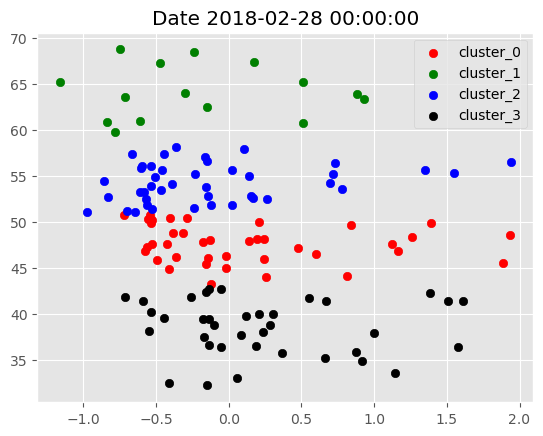

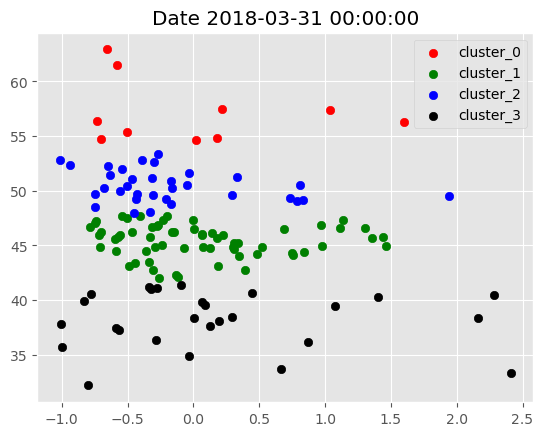

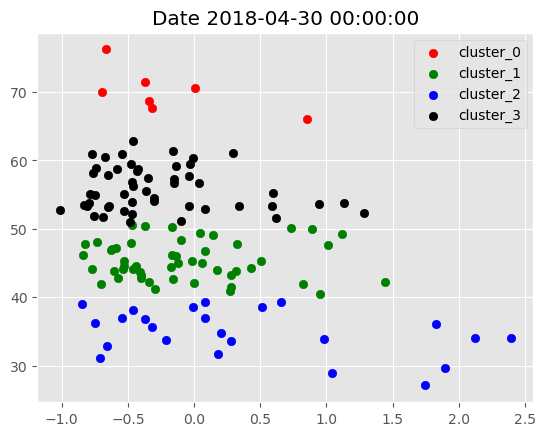

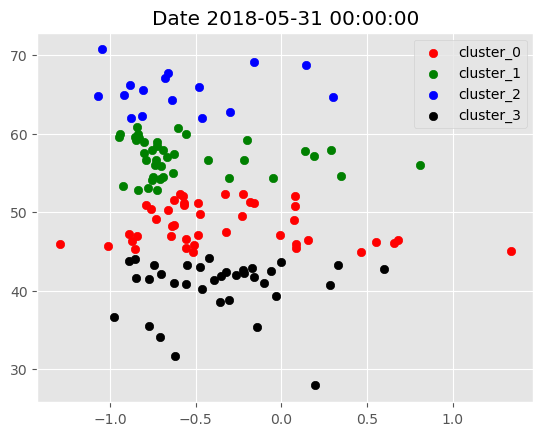

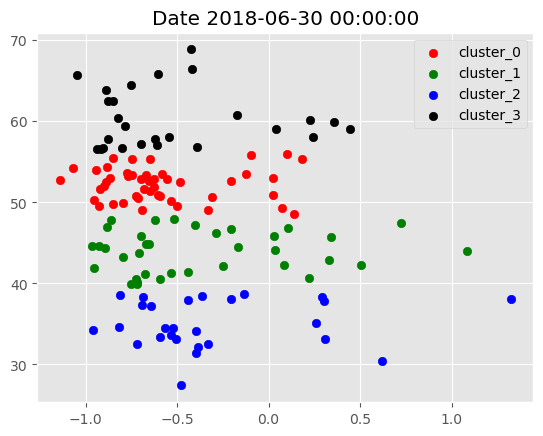

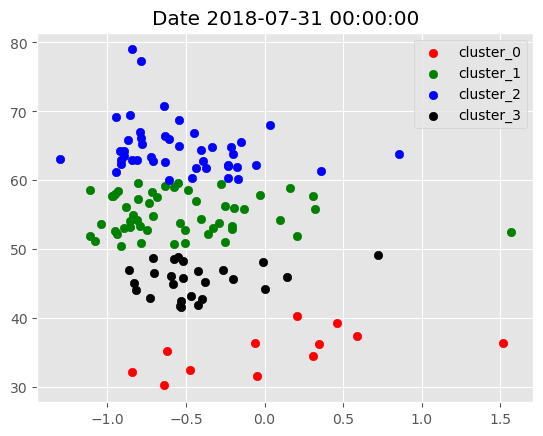

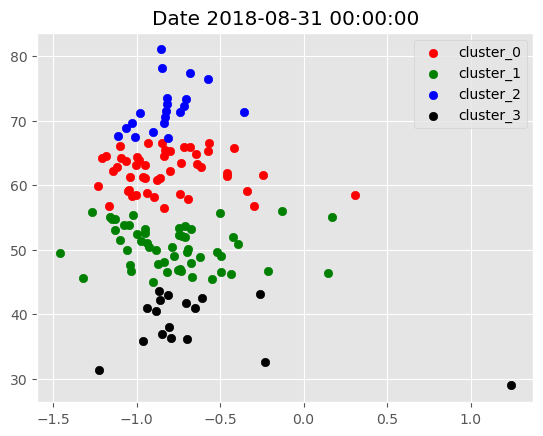

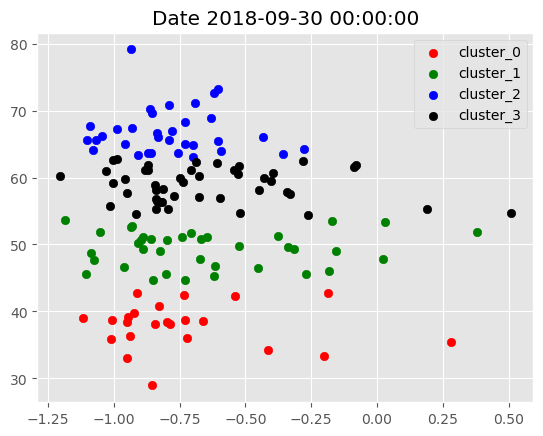

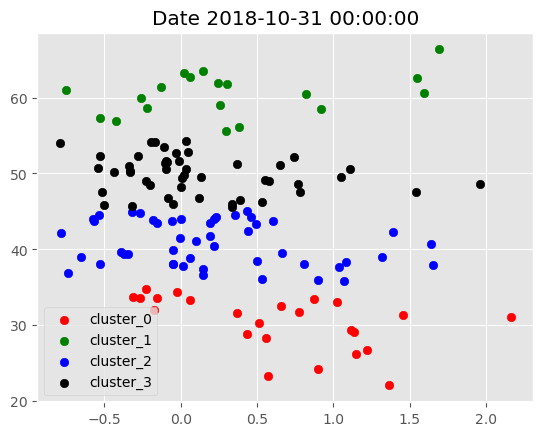

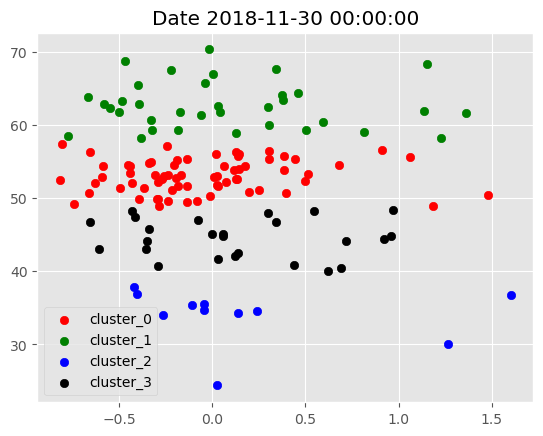

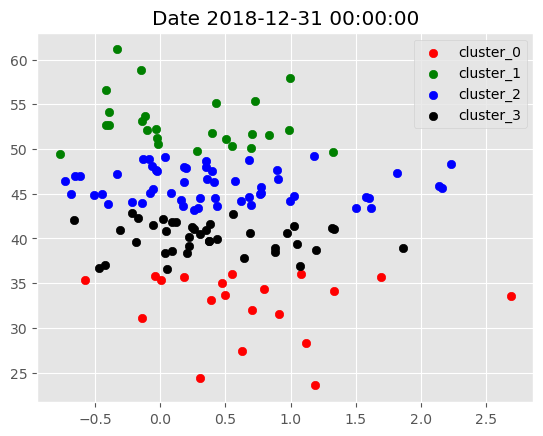

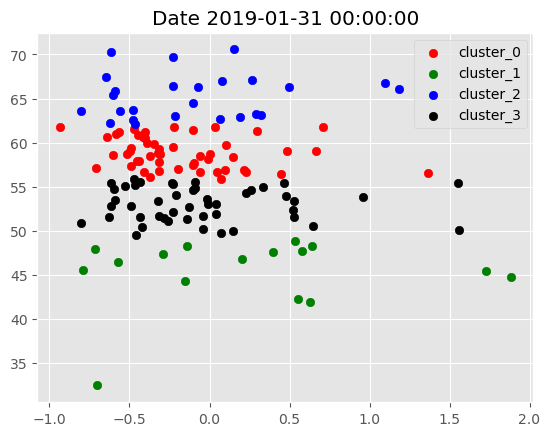

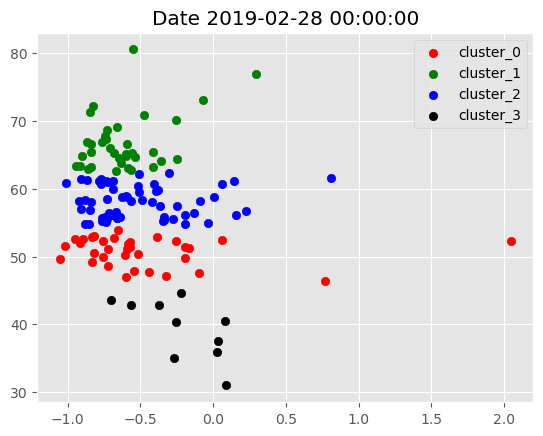

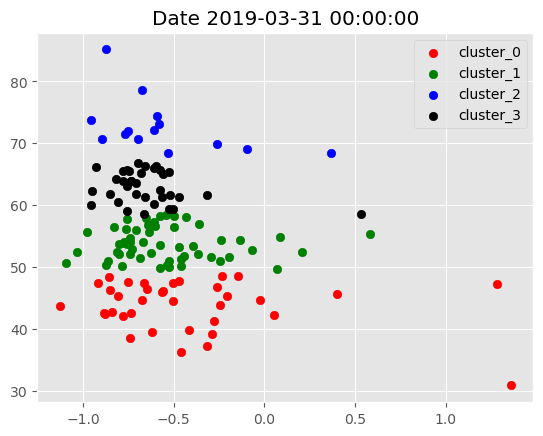

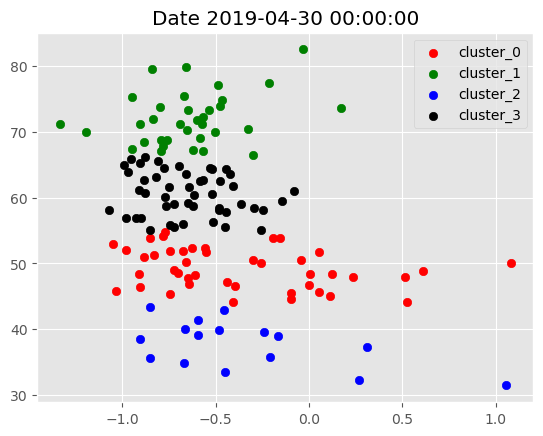

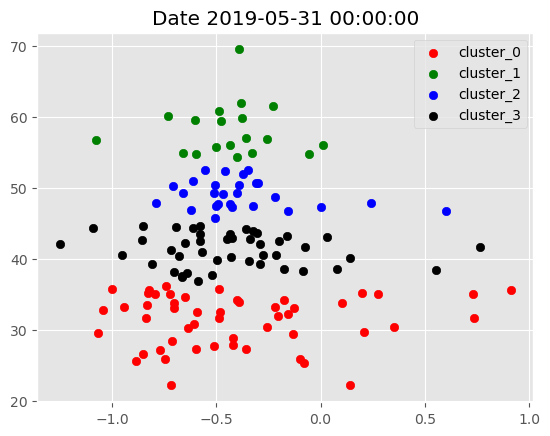

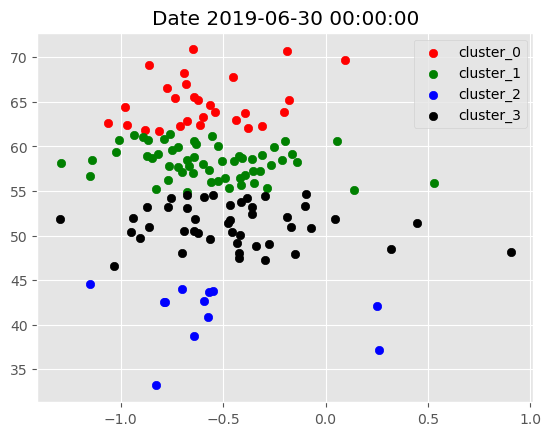

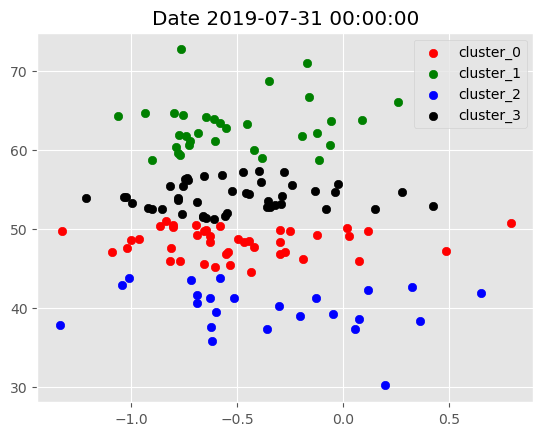

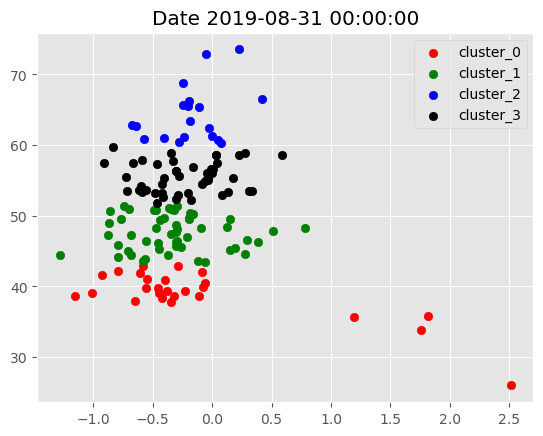

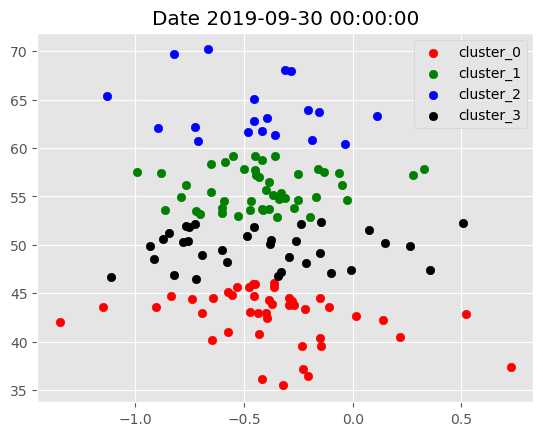

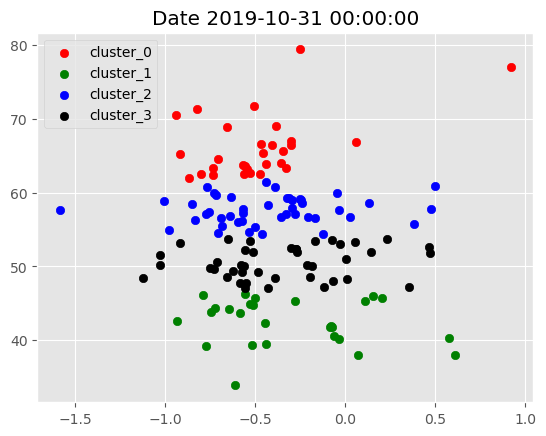

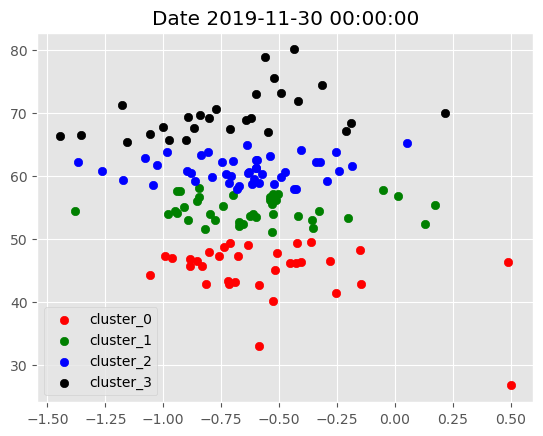

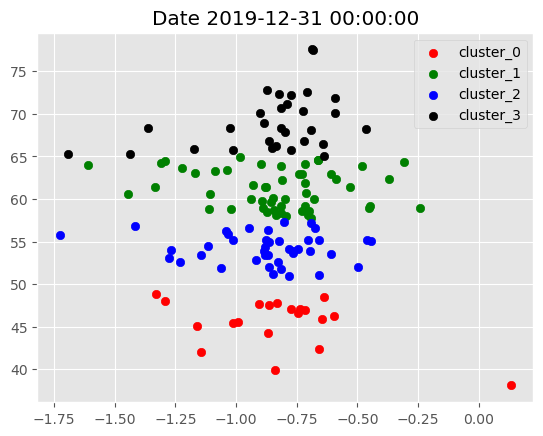

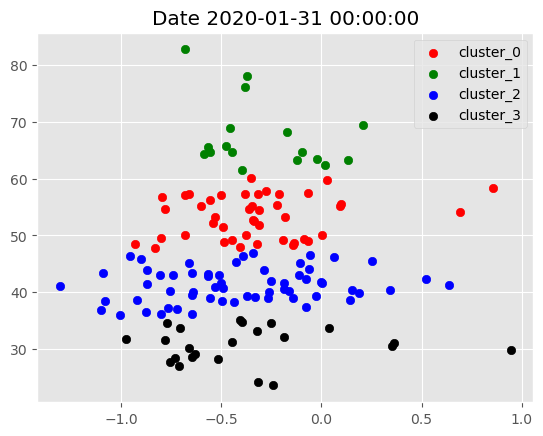

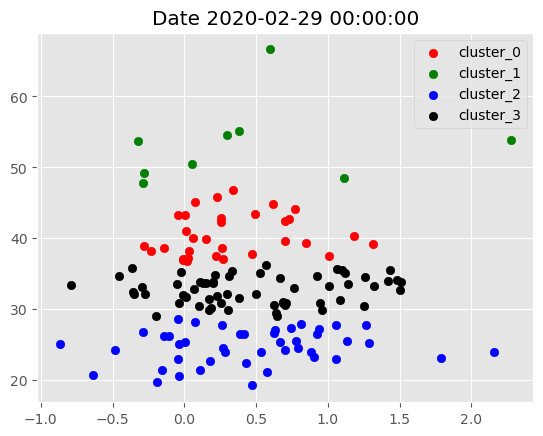

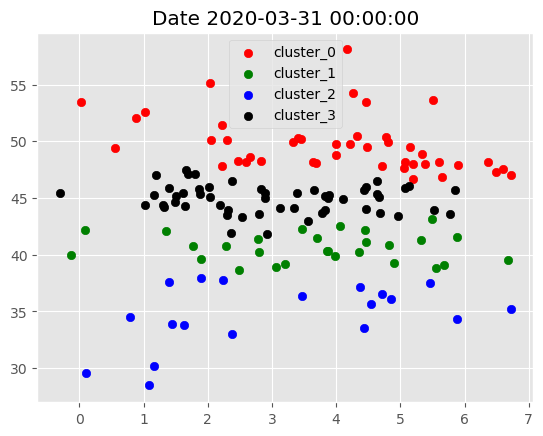

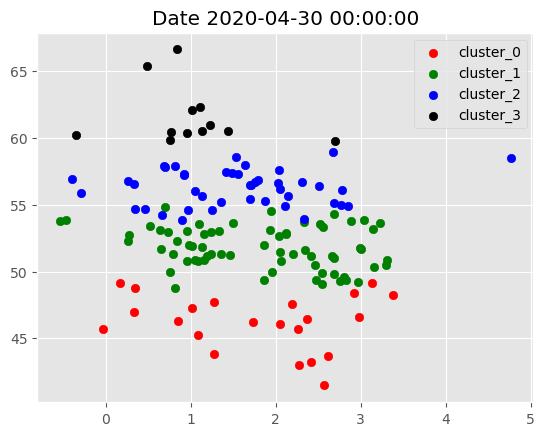

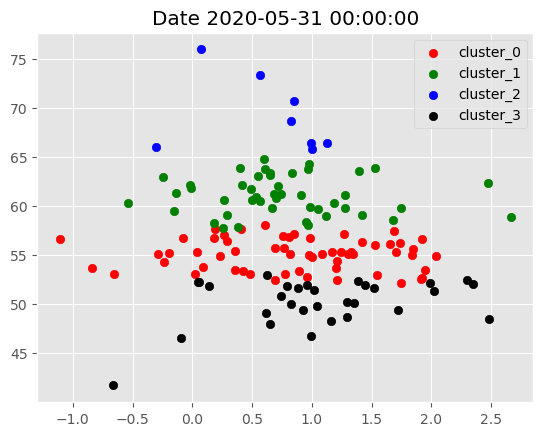

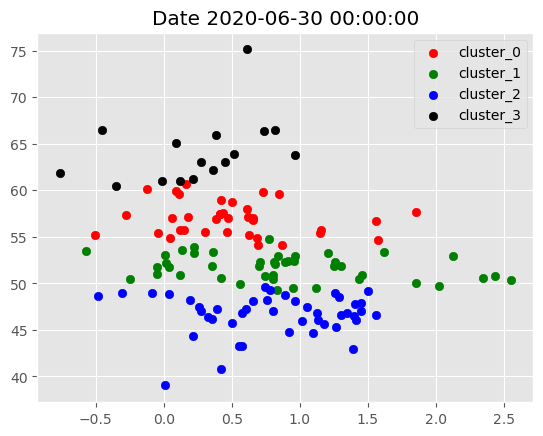

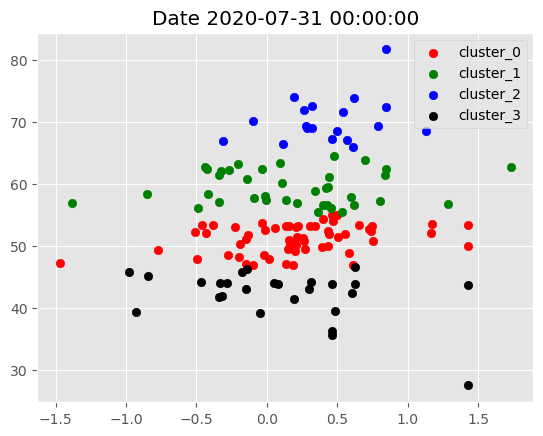

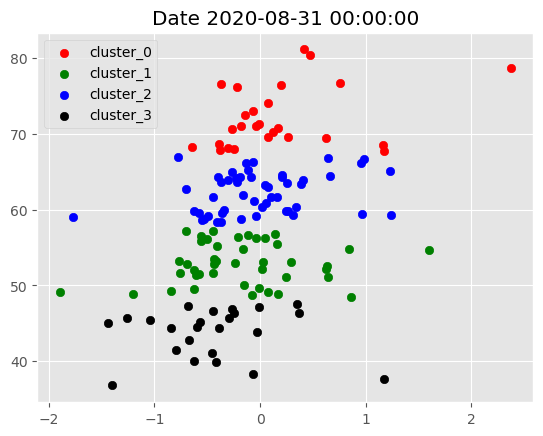

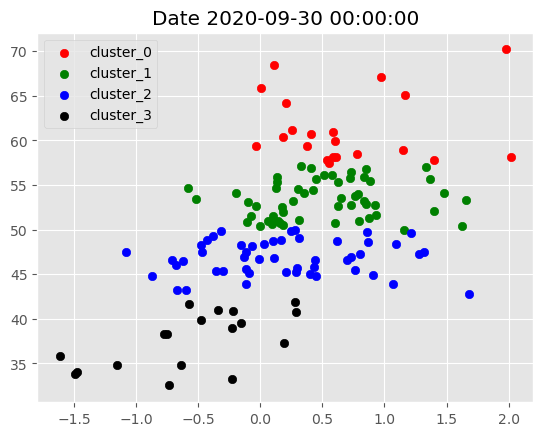

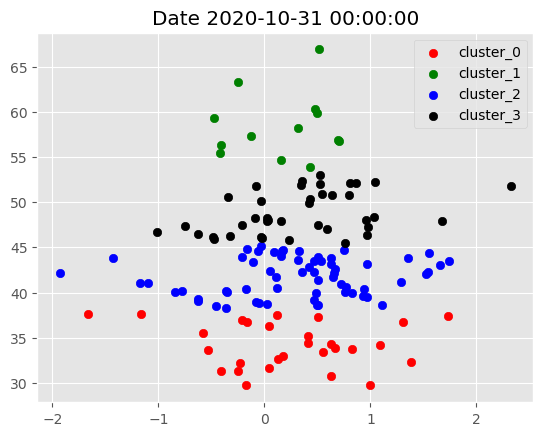

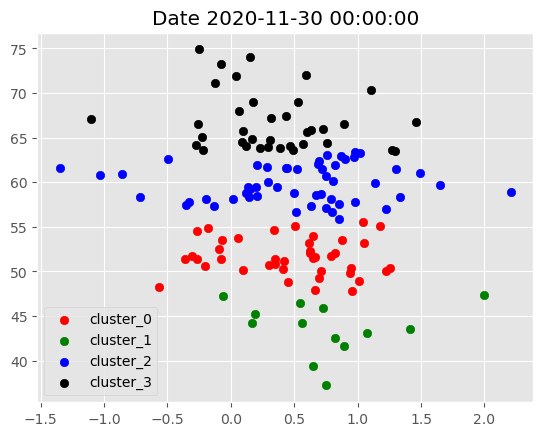

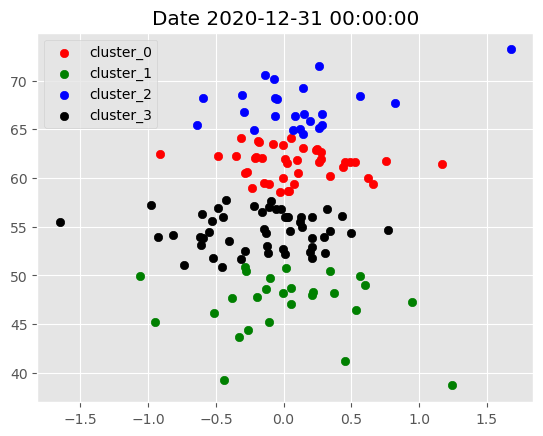

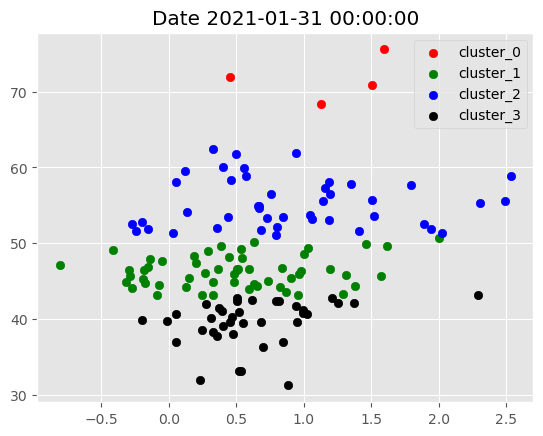

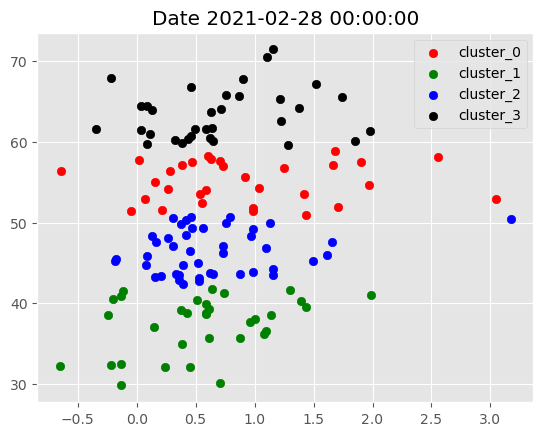

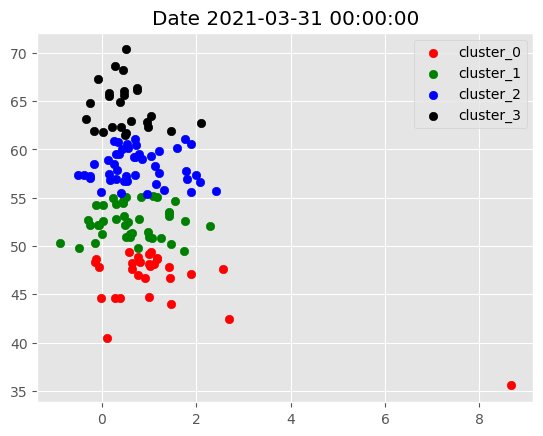

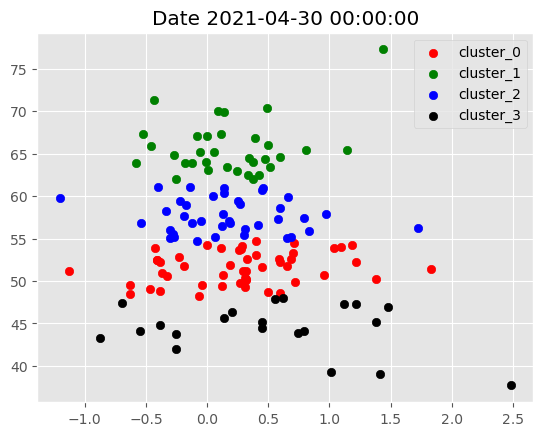

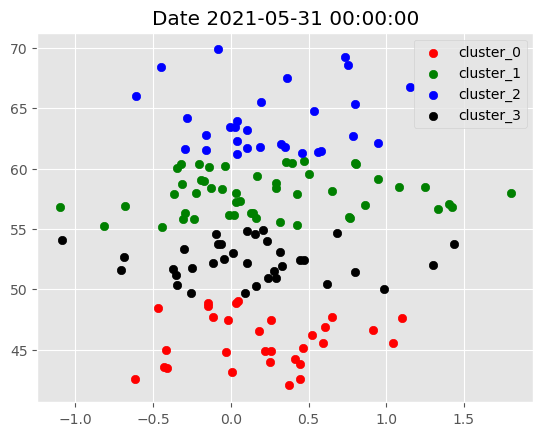

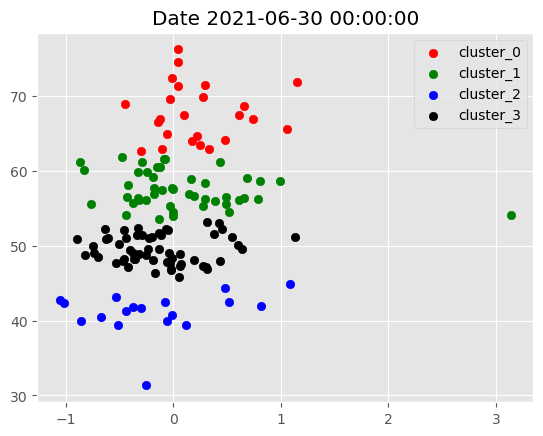

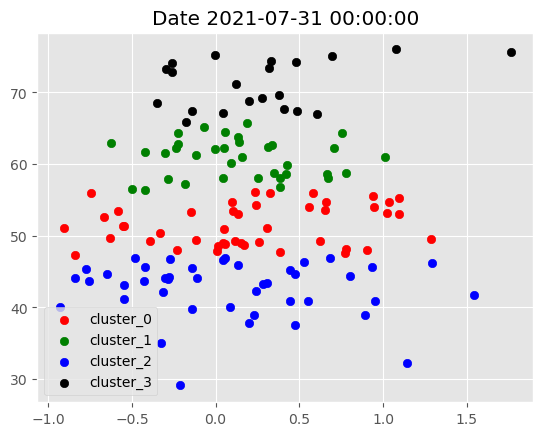

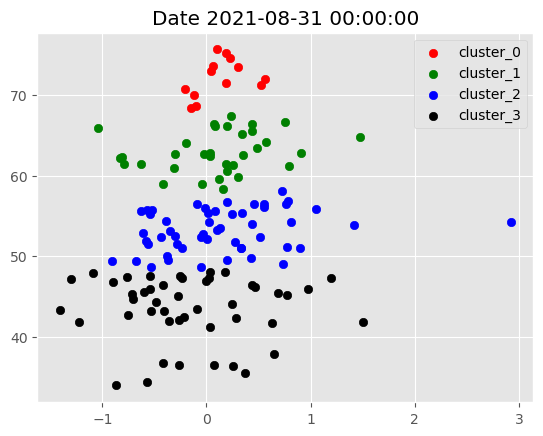

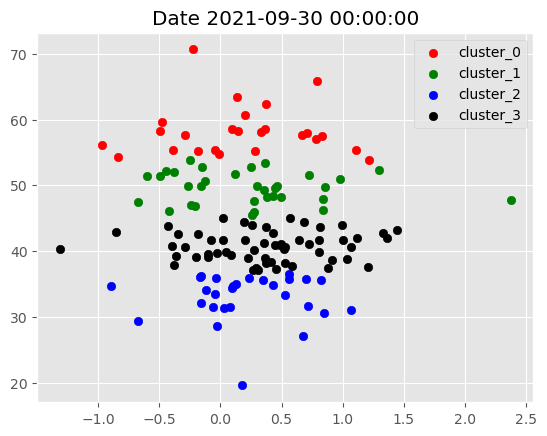

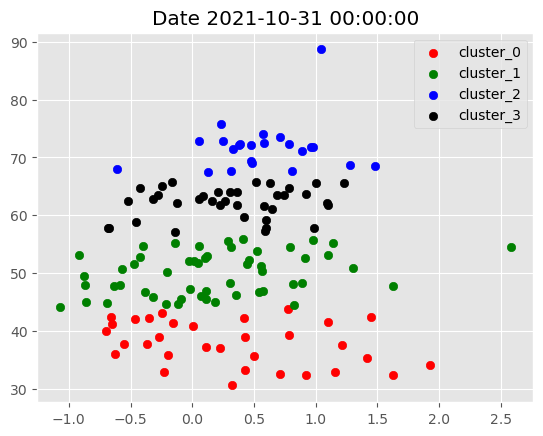

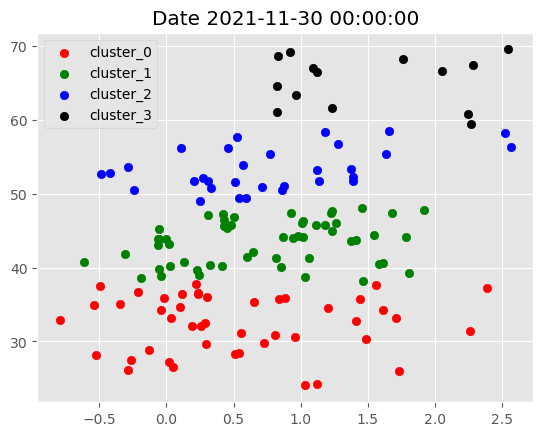

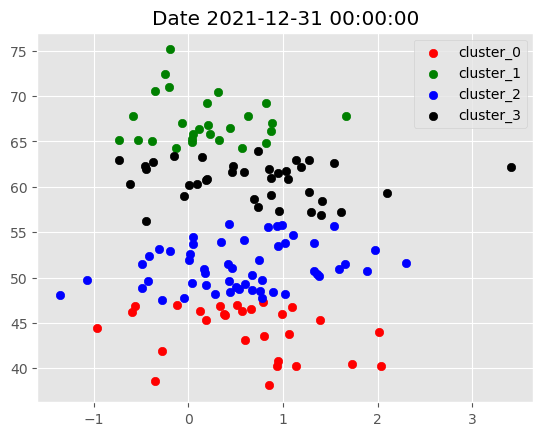

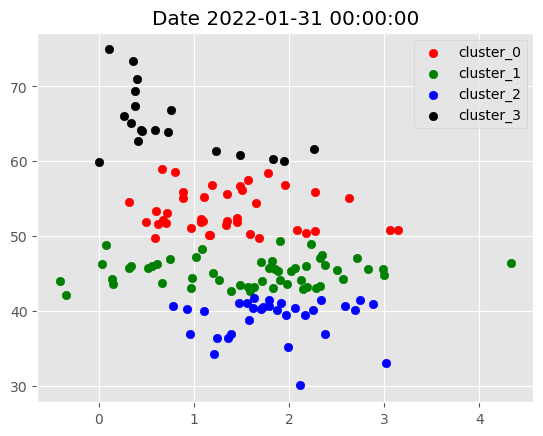

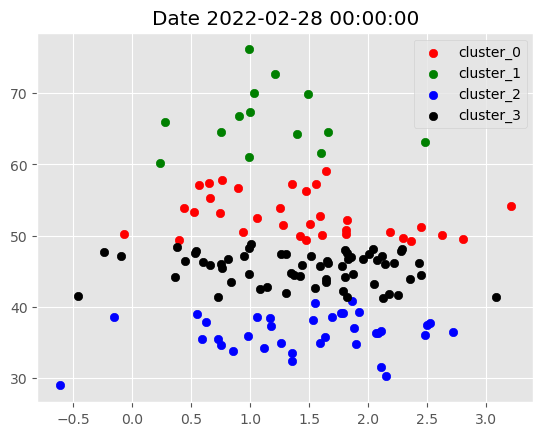

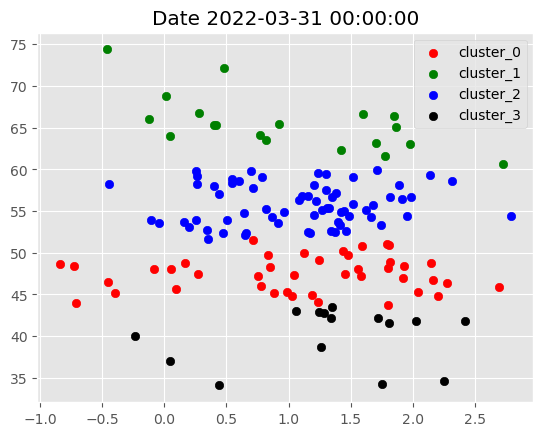

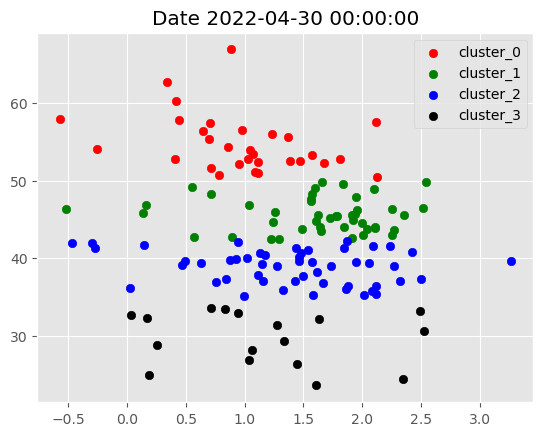

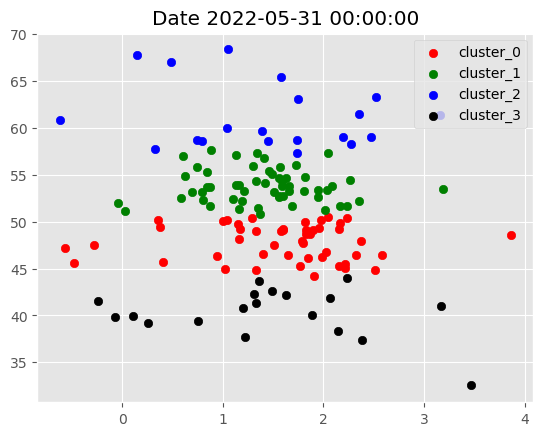

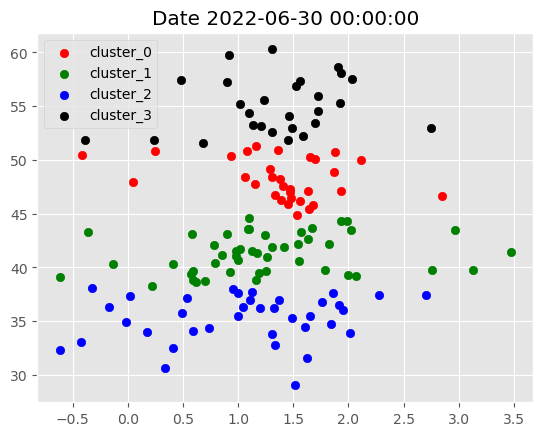

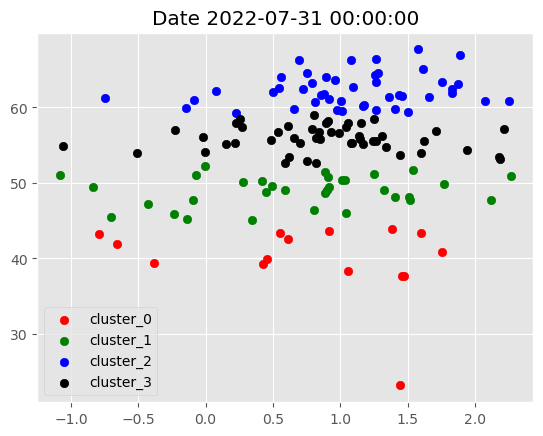

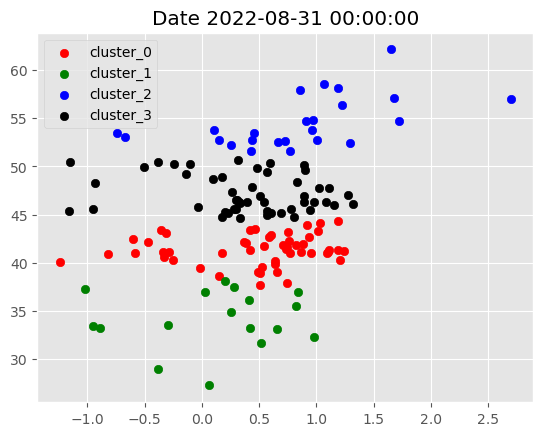

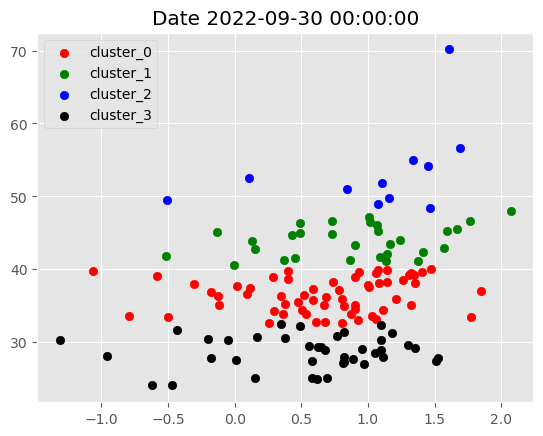

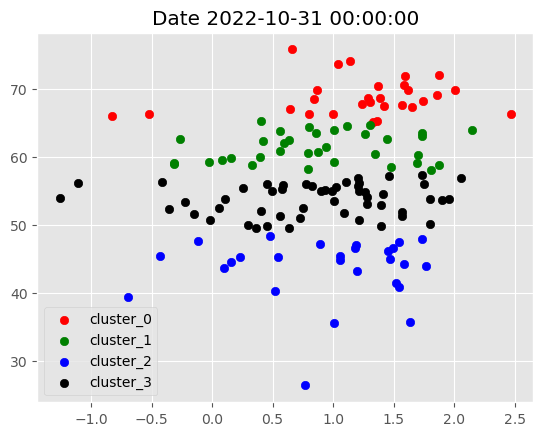

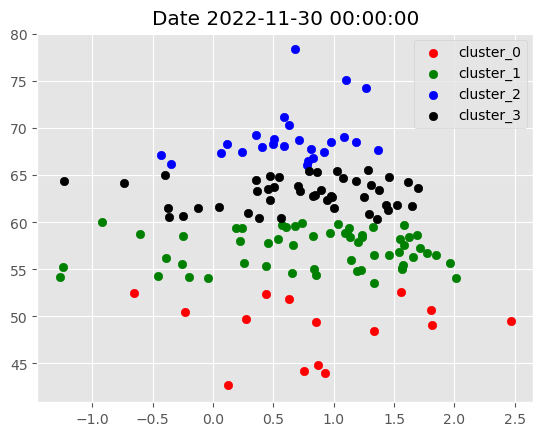

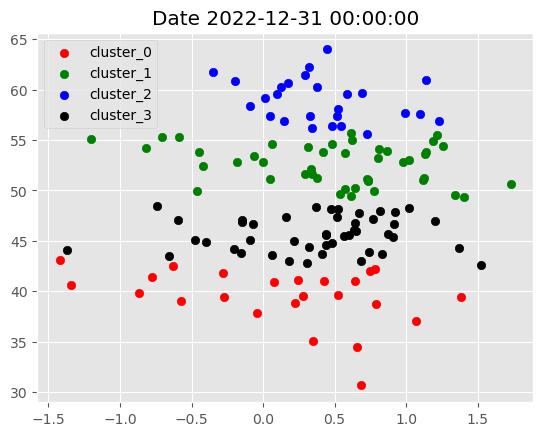

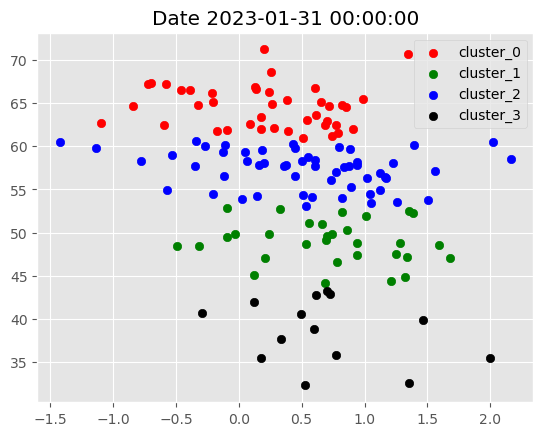

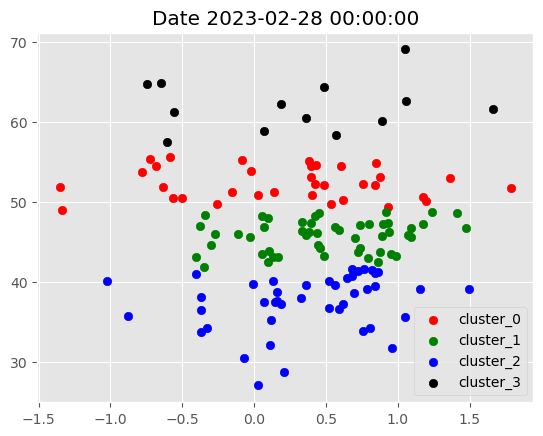

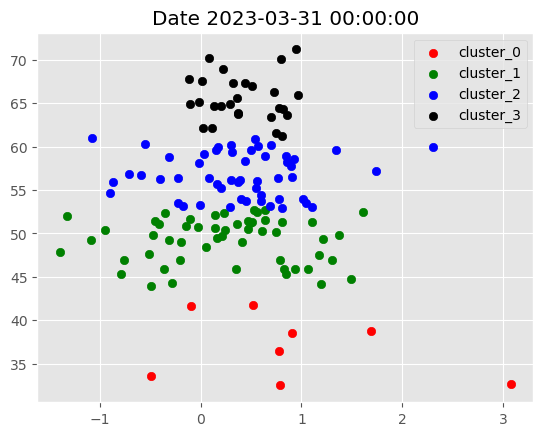

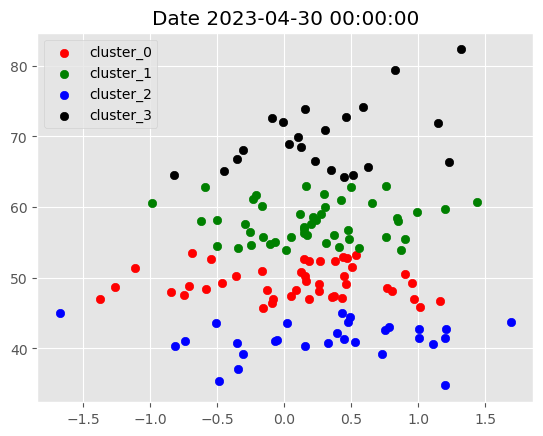

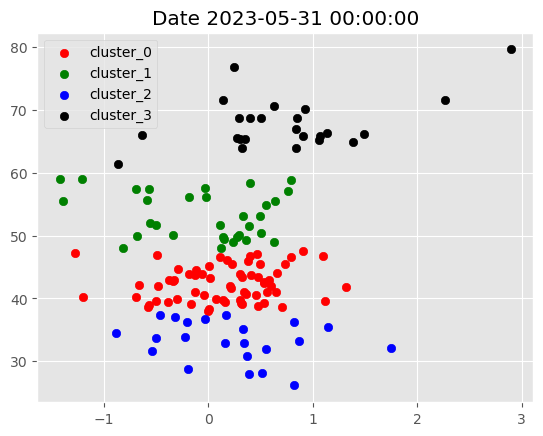

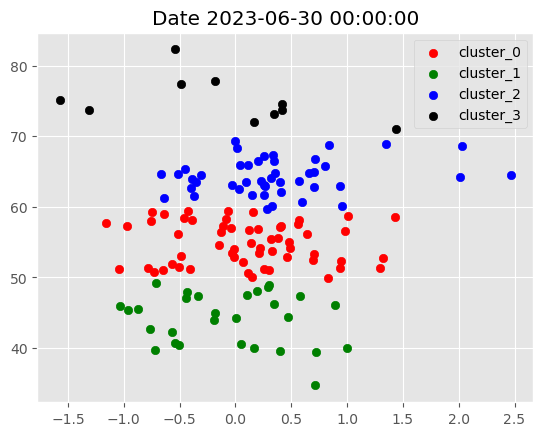

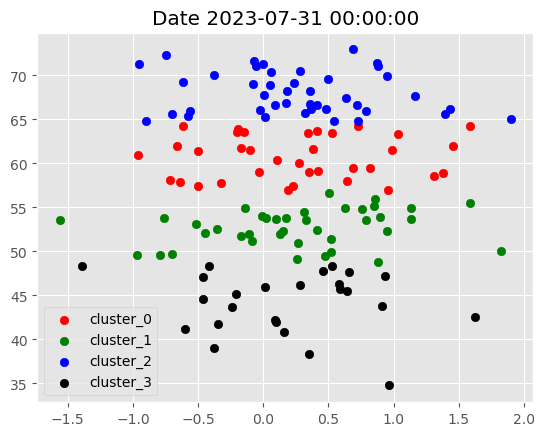

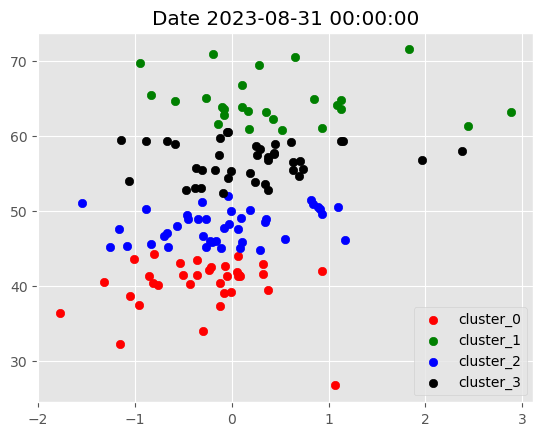

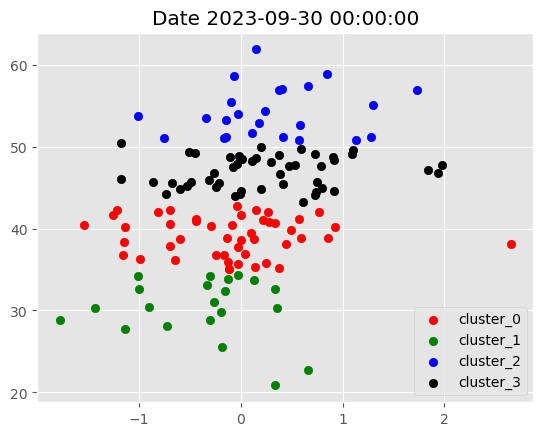

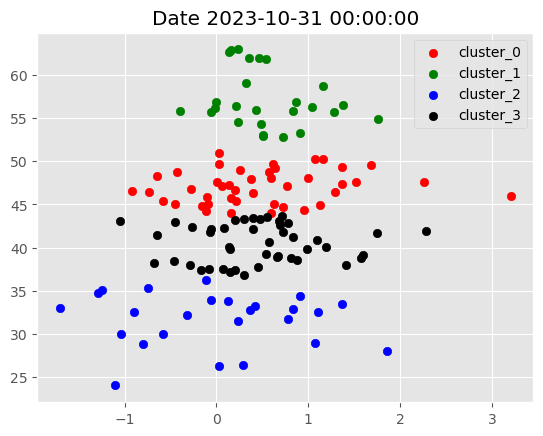

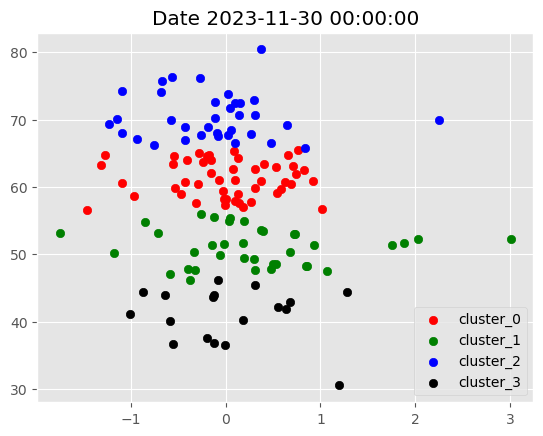

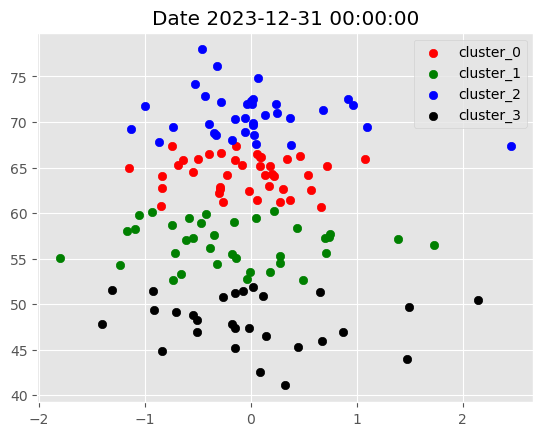

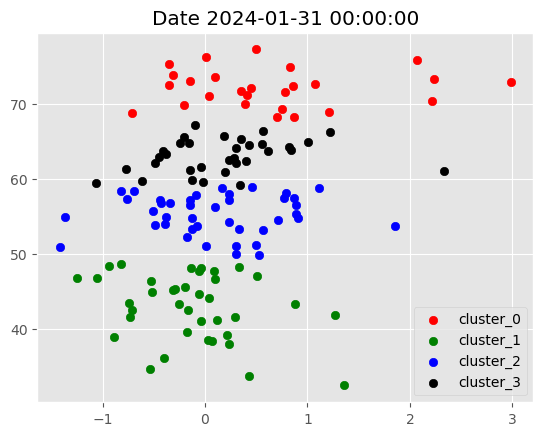

In [91]:

# We now visualize the data for each month
# Plotting the clusters for each month
plt.style.use('ggplot')

for i in data.index.get_level_values('Date').unique().tolist() : # For each month
    
    g = data.xs(i,level=0) 
    
    plt.title(f'Date {i}')
    plot_clusters(g)
    

    
# On the Y-axis we will have the RSI values & on the X-axis we will have the ATR values

In [92]:
# The first observation that thee stocks that have 60-70 RSI are in one cluster and then we have 2 middle clusters(50-60 and 40-50)
# and then all the clusters having value around 35

# But note that because centroids are random the clustering gets random
# So we will help the K-means clustering by supplying the initial centroids so that the clustering doesnt go random
# We want our intial centers to be based on our RSI indicators 

# For each month to be in same cluster
# around 70 RSI -> same Cluster
# around 55 RSI -> same Cluster
# around 45 RSI -> same Cluster
# around 30 RSI -> same Cluster

# It would be better than deciding those thresholds ourselves
    # For eg we select all the stocks that have RSI greater 70 -> It would have a different result than the 
    # model clustering around 70 for us based on all the featuers in our dataset

In [93]:
# So we will supply the pre_defined centroids

target_rsi_values = [30,45,55,70] 
initial_centroids = np.zeros((len(target_rsi_values),18))

initial_centroids

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]])

In [94]:
initial_centroids[:, 6] = target_rsi_values
initial_centroids

array([[ 0.,  0.,  0.,  0.,  0.,  0., 30.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 45.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 55.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 70.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.]])

In [95]:
data = data.drop('cluster',axis = 1) # Drop the cluster column and re run the clustering and assign the cluster to each stock

In [96]:
def get_clusters(df) : 
    
    df['cluster'] = KMeans(n_clusters = 4,
                          random_state = 0,
                          init = initial_centroids).fit(df).labels_
    return df 

data = data.dropna().groupby('Date',group_keys = False).apply(get_clusters)
data

atr   bb_high    bb_low    bb_mid  garman_klass_vol  \
Date       Ticker                                                             
2018-02-28 AAL     1.349379  4.015218  3.875603  3.945411         -0.000118   
           AAPL   -0.784020  3.793888  3.615828  3.704858         -0.001265   
           ABBV    1.940762  4.539666  4.420361  4.480013         -0.034391   
           ABT    -0.602291  4.051457  3.947487  3.999472         -0.004361   
           ACN    -0.510266  5.030859  4.932437  4.981648         -0.003895   
...                     ...       ...       ...       ...               ...   
2024-01-31 VRTX    0.826227  6.099764  5.984371  6.042068          0.000086   
           VZ     -0.413135  3.723980  3.618261  3.671120          0.000046   
           WFC    -0.341161  3.942465  3.857025  3.899745          0.000126   
           WMT    -0.122132  4.019566  3.962025  3.990795          0.000038   
           XOM     0.070062  4.648645  4.564100  4.606372          0.000070   

                       macd        rsi  return_1m  return_2m  return_3m  \
Date       Ticker                                                         
2018-02-28 AAL     0.424686  55.685263   0.000632   0.022092   0.024888   
           AAPL   -0.022701  59.836070   0.068185   0.028019   0.013390   
           ABBV    1.180579  56.507211   0.032169   0.098315   0.063744   
           ABT    -0.042084  55.823924  -0.029440   0.030620   0.024517   
           ACN     0.117467  54.875570   0.001929   0.025541   0.028460   
...                     ...        ...        ...        ...        ...   
2024-01-31 VRTX    3.385570  74.901664   0.081644   0.113737   0.067186   
           VZ      1.333251  63.731965   0.067572   0.024707   0.046373   
           WFC     0.227648  56.767832  -0.014019   0.043245   0.071774   
           WMT     1.035131  59.841539   0.030067   0.027007   0.001635   
           XOM    -1.238093  38.329246  -0.031606  -0.029238  -0.026336   

                   return_6m  return_9m  return_12m    Mkt-RF       SMB  \
Date       Ticker                                                         
2018-02-28 AAL      0.033351   0.013426    0.013883  1.248288  1.381787   
           AAPL     0.015155   0.018521    0.023458  1.319578 -0.348675   
           ABBV     0.076940   0.065862    0.050452  0.462450  0.516173   
           ABT      0.030254   0.033180    0.026397  0.814049 -0.148104   
           ACN      0.036957   0.030116    0.024744  1.219943 -0.164371   
...                      ...        ...         ...       ...       ...   
2024-01-31 VRTX     0.037767   0.028845    0.026090  0.520767 -0.005949   
           VZ       0.031736   0.008336    0.001914  0.482660 -0.368392   
           WFC      0.011185   0.025205    0.005483  1.070010 -0.077371   
           WMT      0.006278   0.011868    0.013987  0.593167 -0.411747   
           XOM     -0.014058  -0.019235   -0.012196  1.123840  0.258571   

                        HML       RMW       CMA  cluster  
Date       Ticker                                         
2018-02-28 AAL     0.525733  0.248202  0.723601        2  
           AAPL   -0.615348  0.518996  0.588603        3  
           ABBV   -0.122230  0.444122  0.312378        2  
           ABT    -0.511593  0.296680  0.990342        2  
           ACN    -0.304811  0.311587  0.178467        2  
...                     ...       ...       ...      ...  
2024-01-31 VRTX   -0.894255  0.136800  0.860117        3  
           VZ      0.111355  0.284936  0.424633        2  
           WFC     1.474741 -0.724132 -0.667990        2  
           WMT    -0.365424  0.373518  0.733633        2  
           XOM     0.716329 -0.481653  0.603890        0  

[10186 rows x 19 columns]

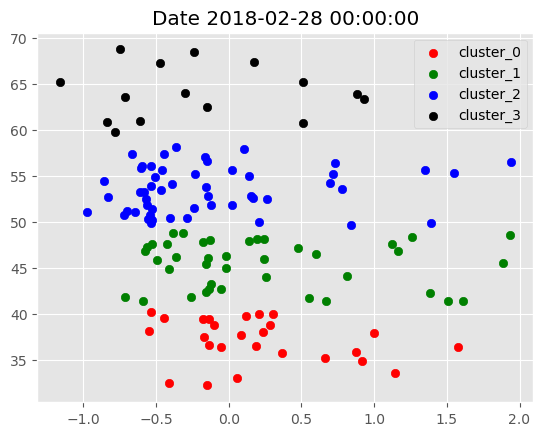

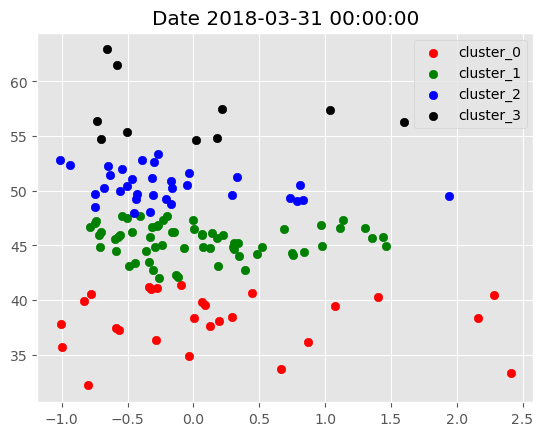

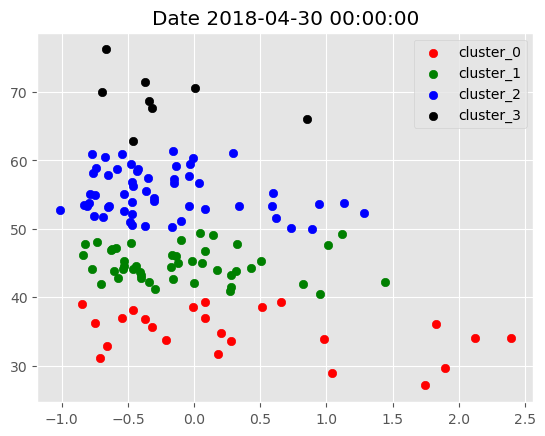

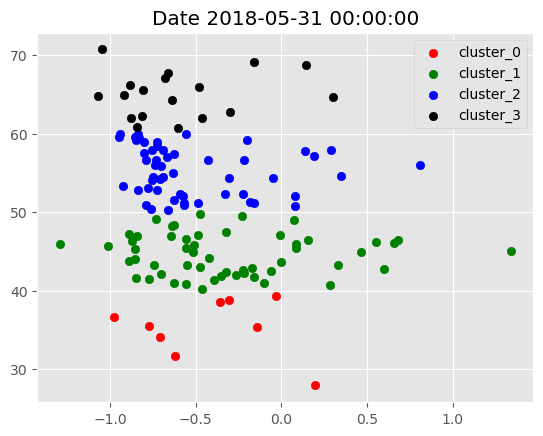

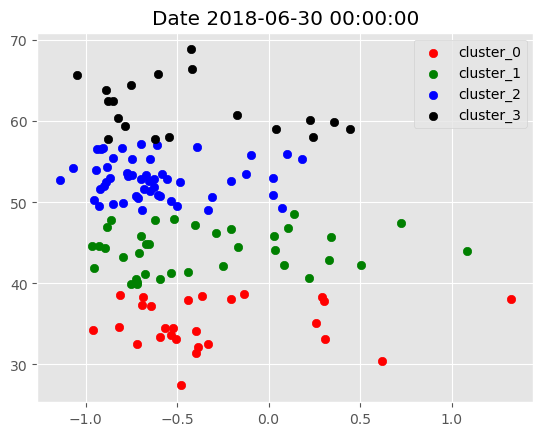

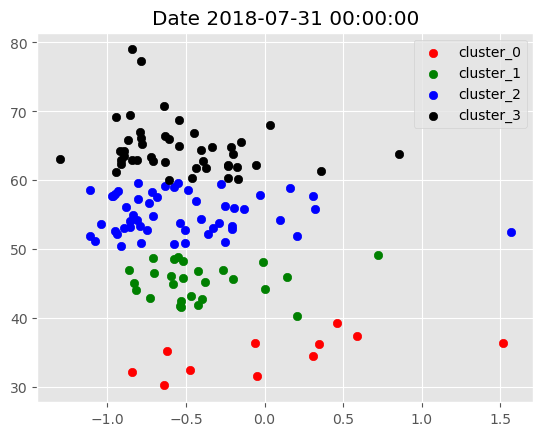

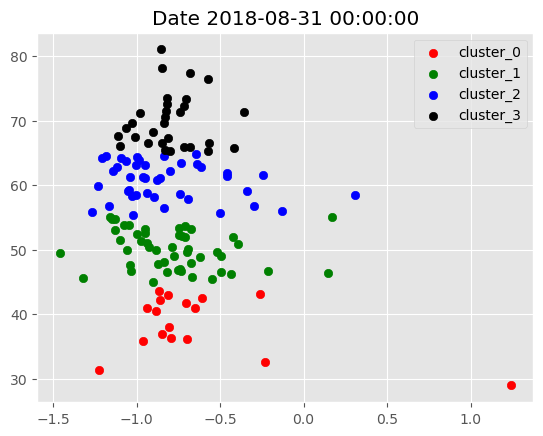

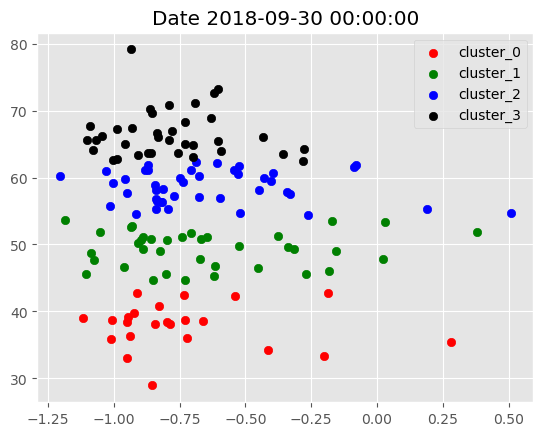

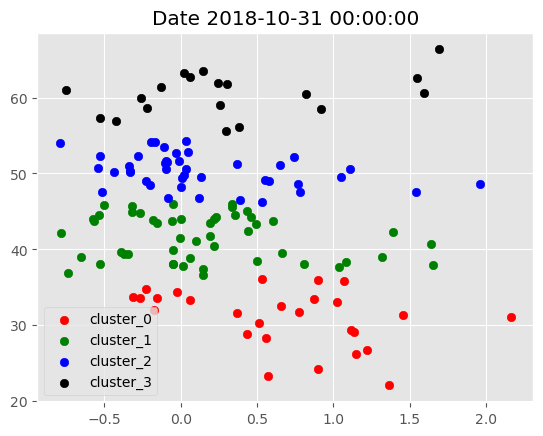

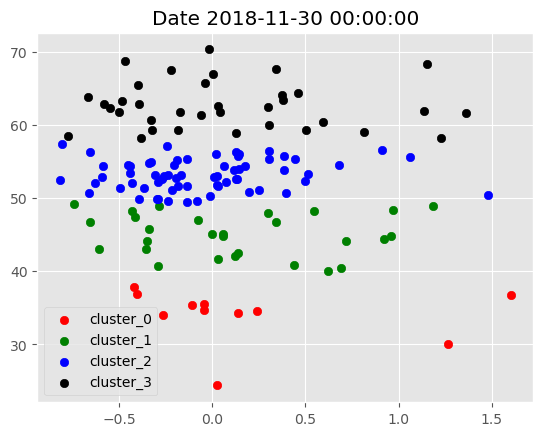

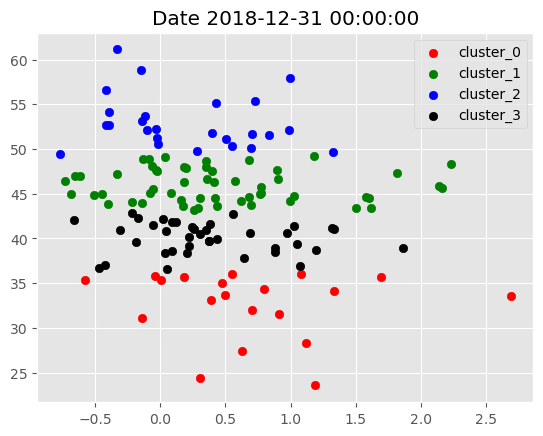

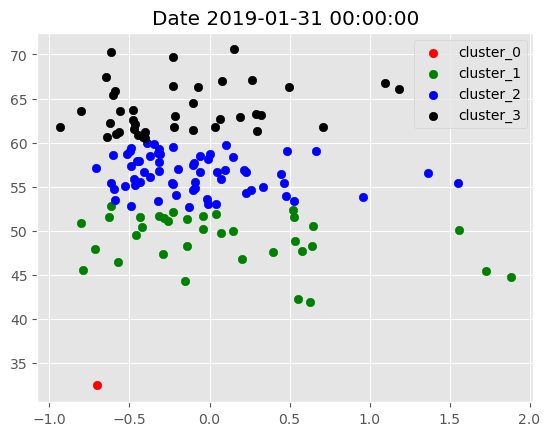

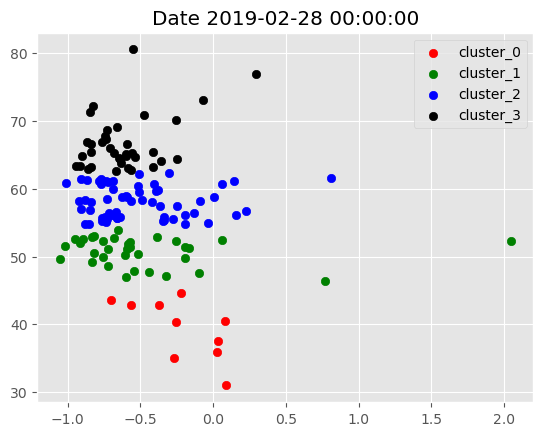

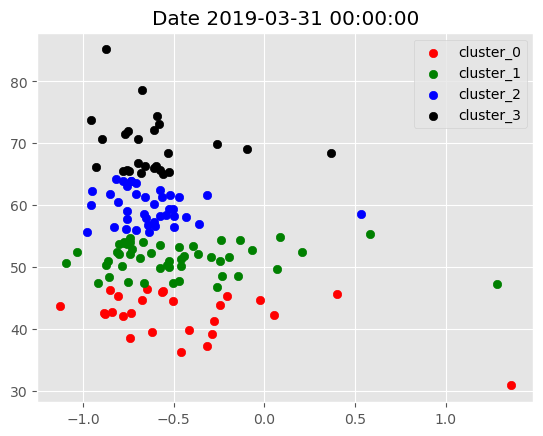

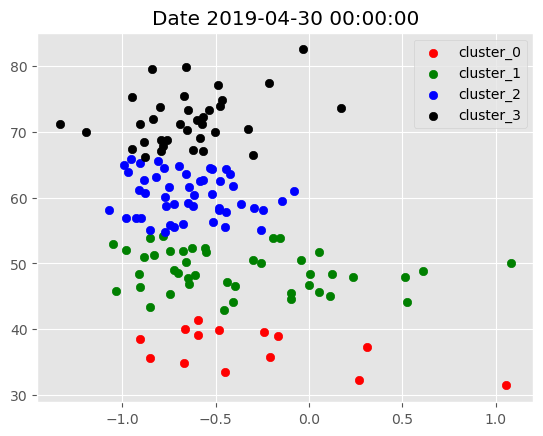

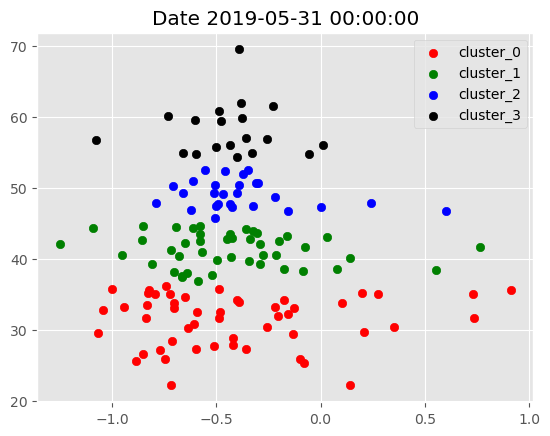

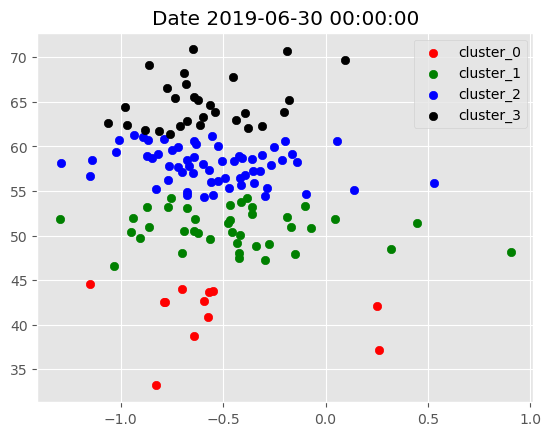

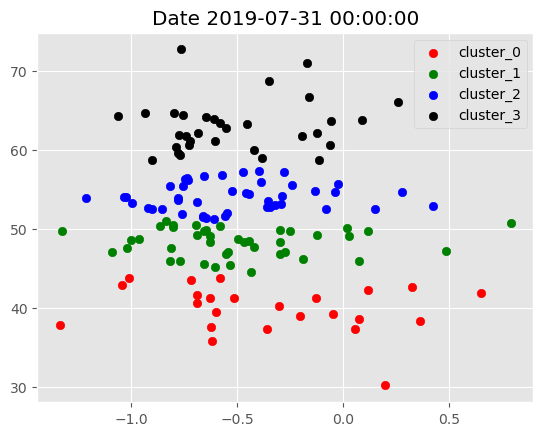

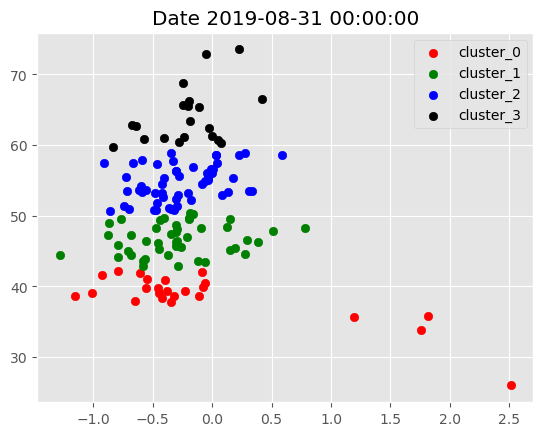

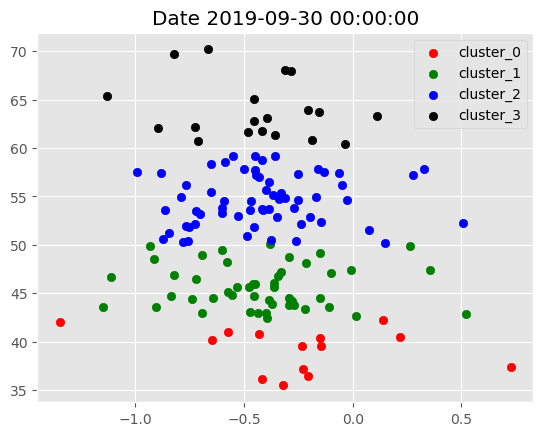

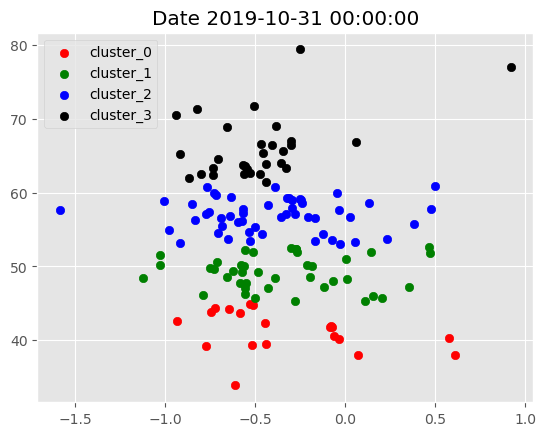

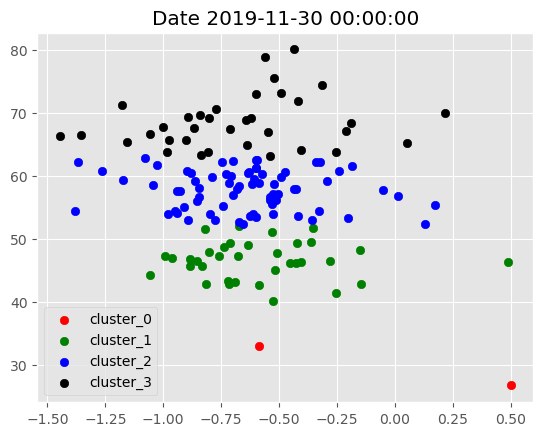

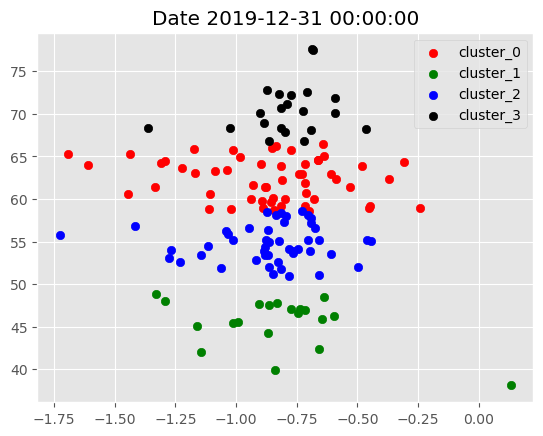

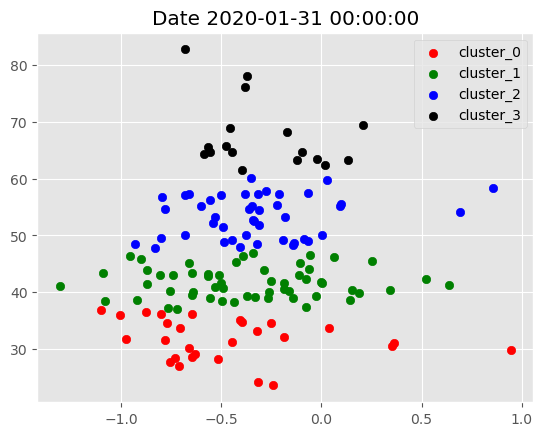

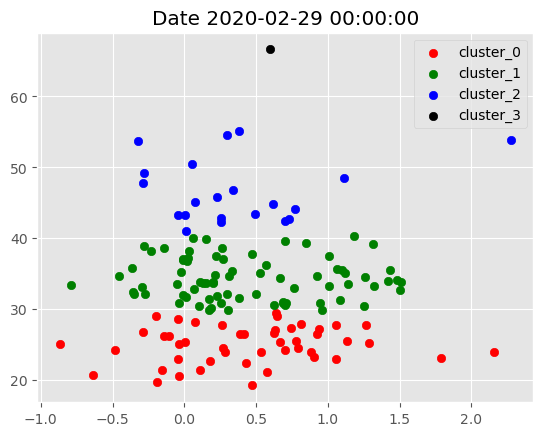

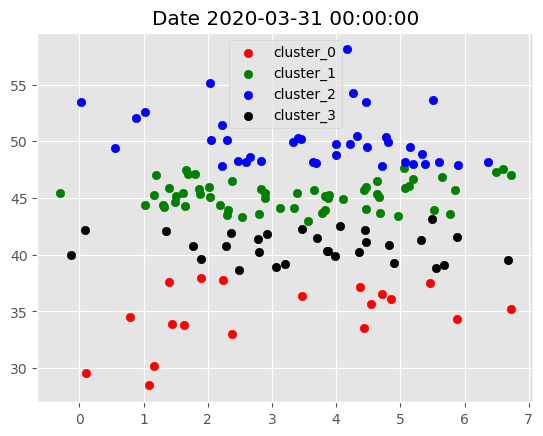

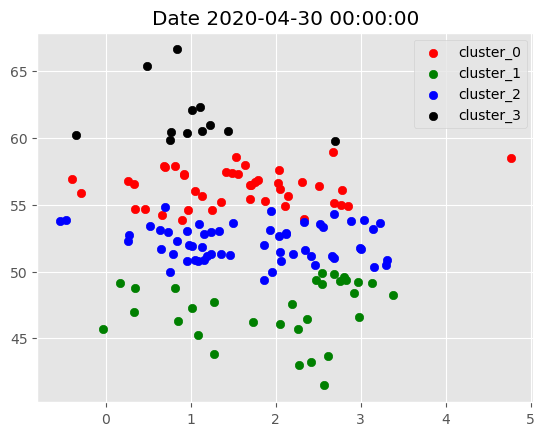

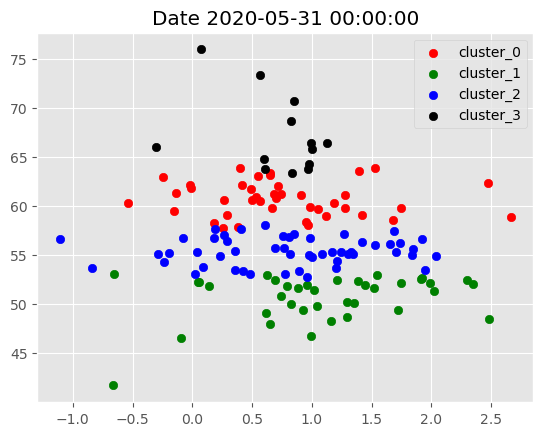

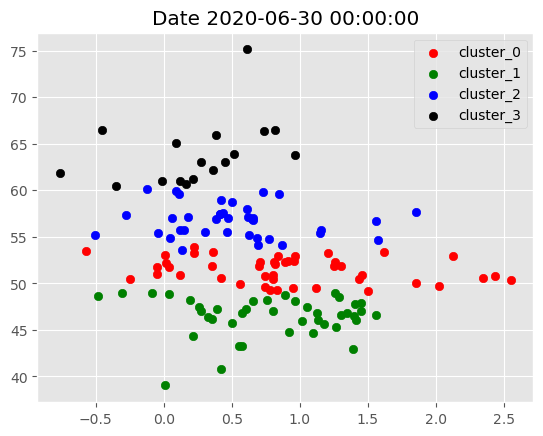

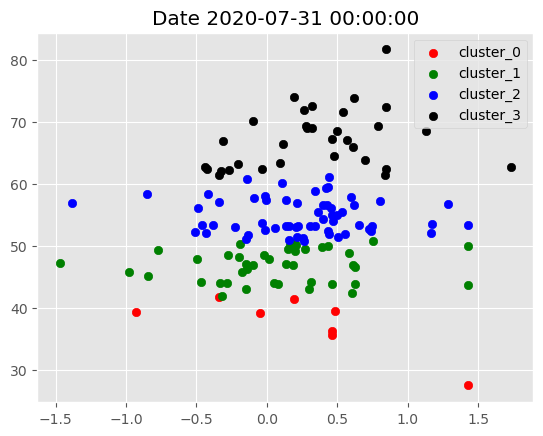

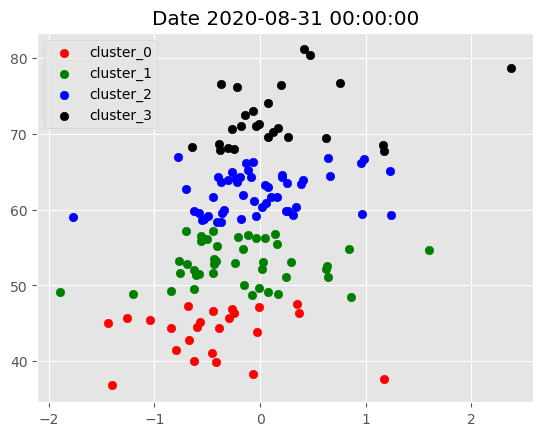

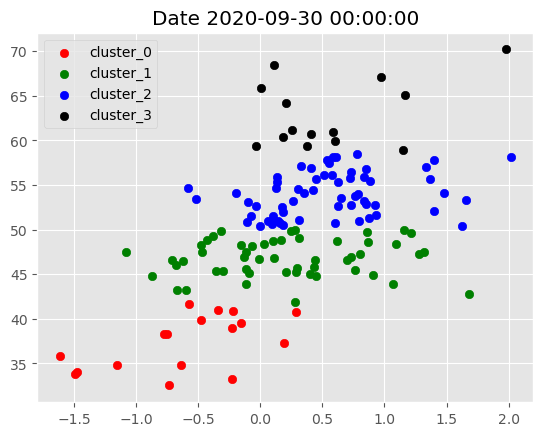

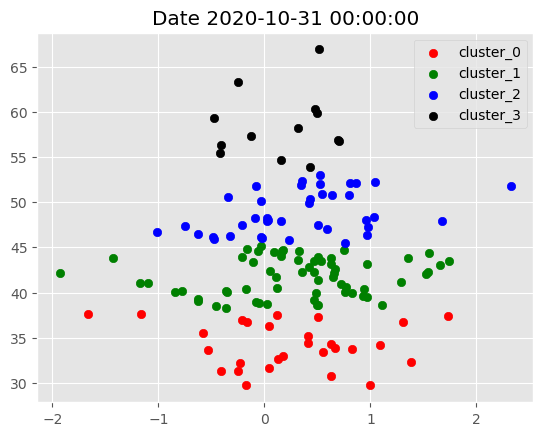

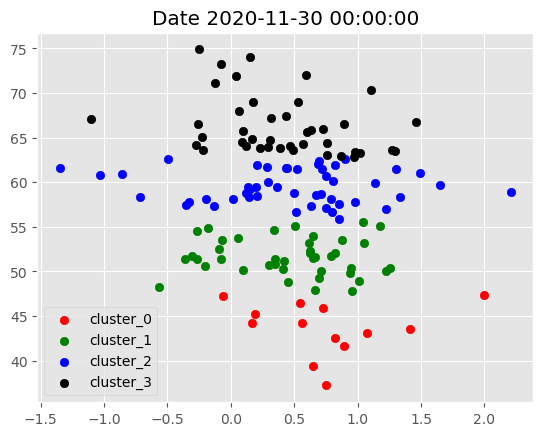

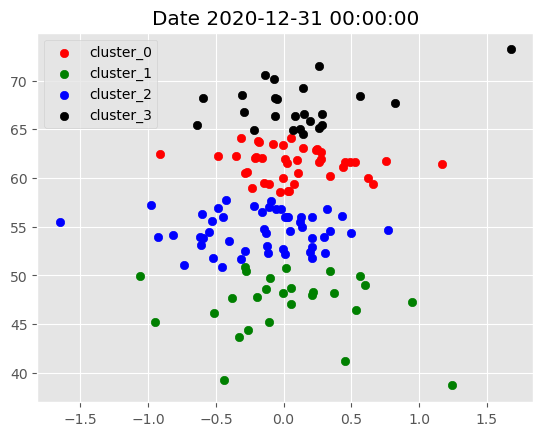

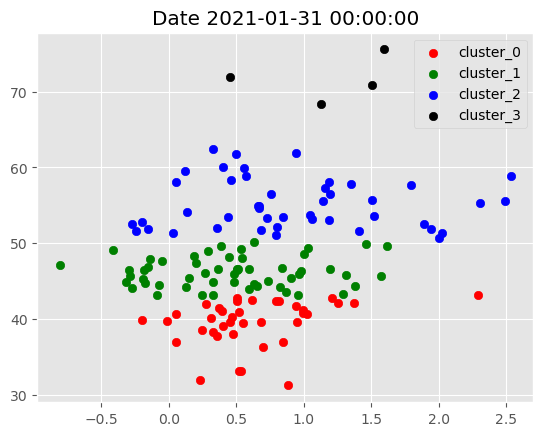

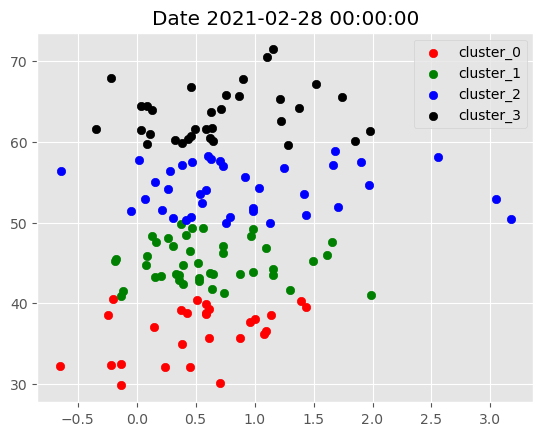

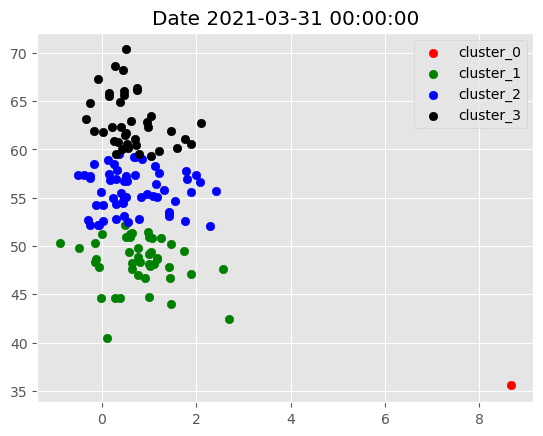

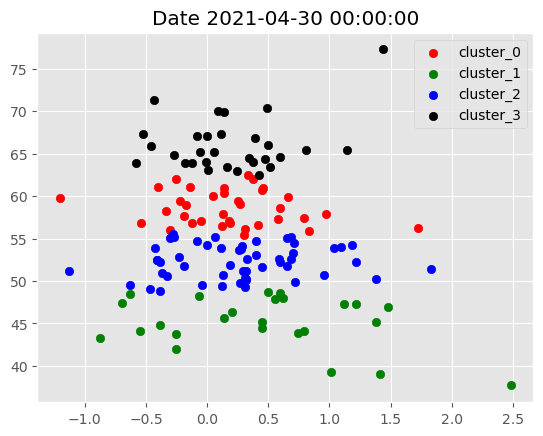

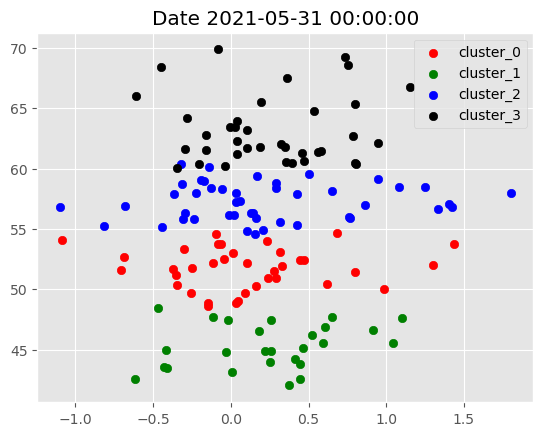

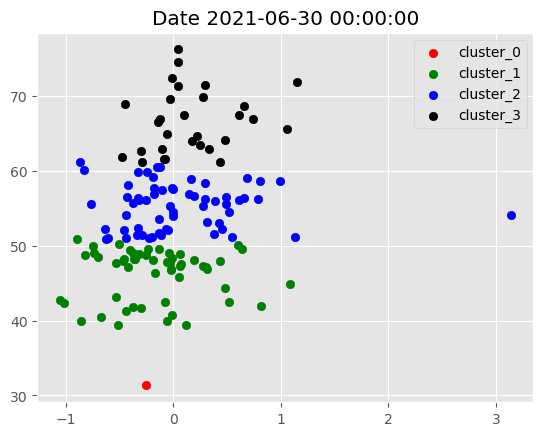

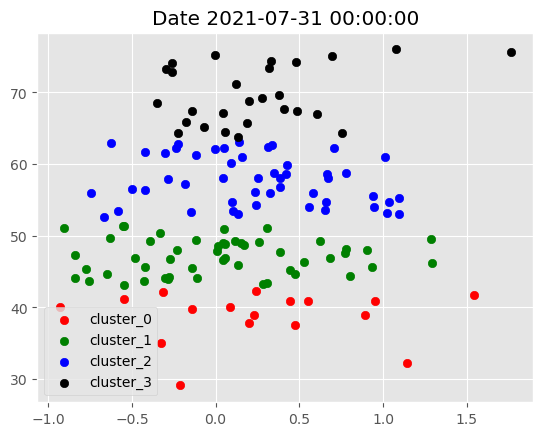

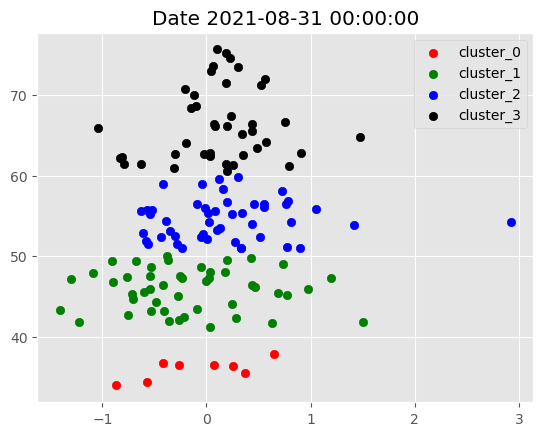

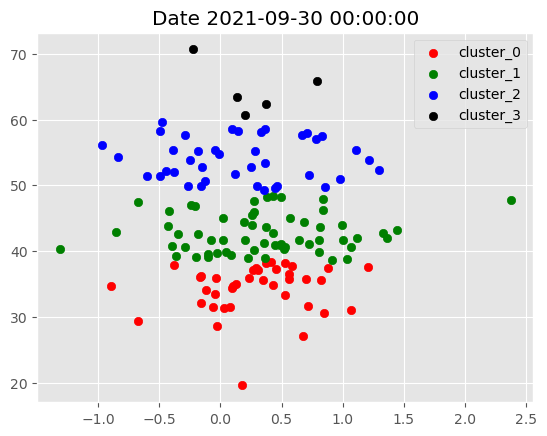

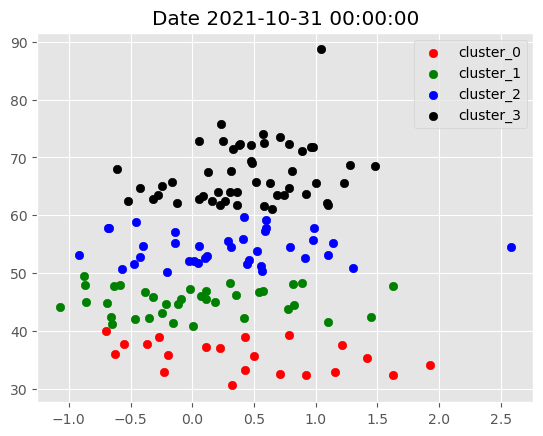

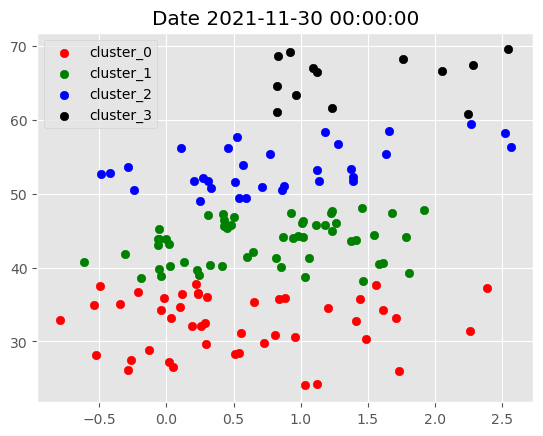

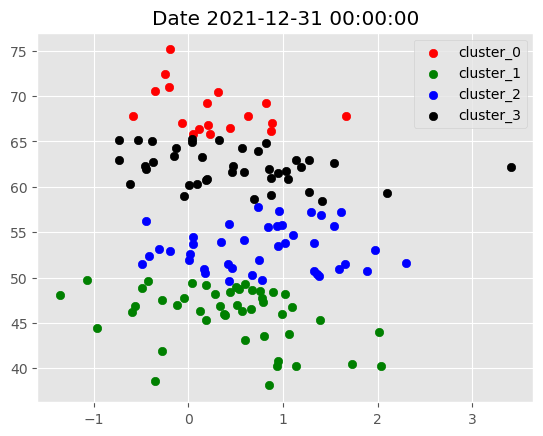

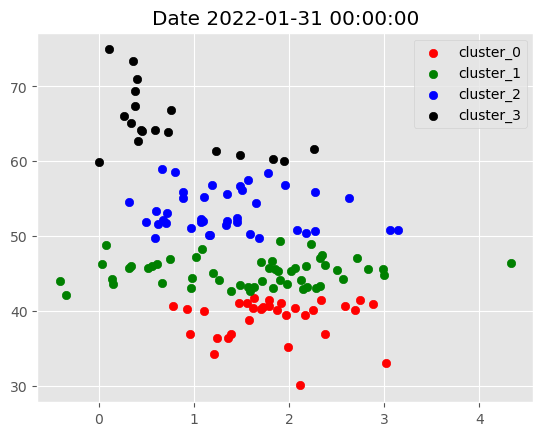

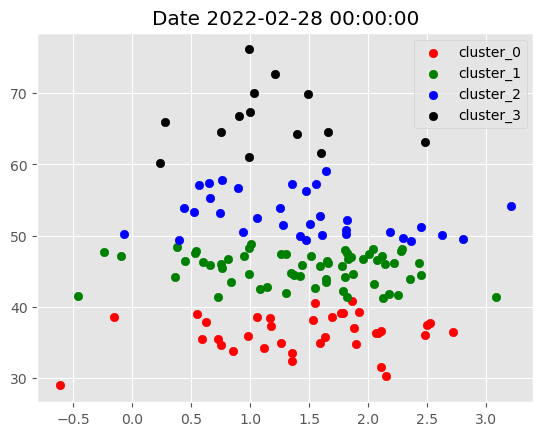

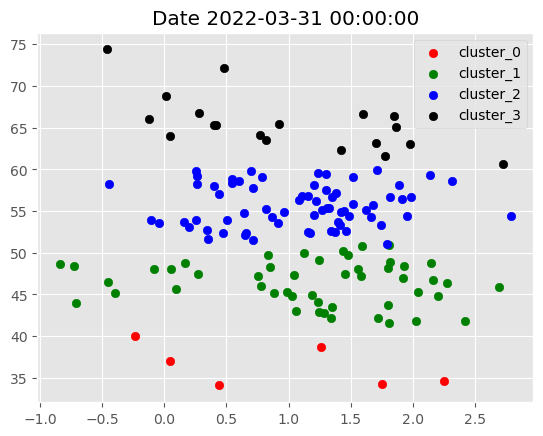

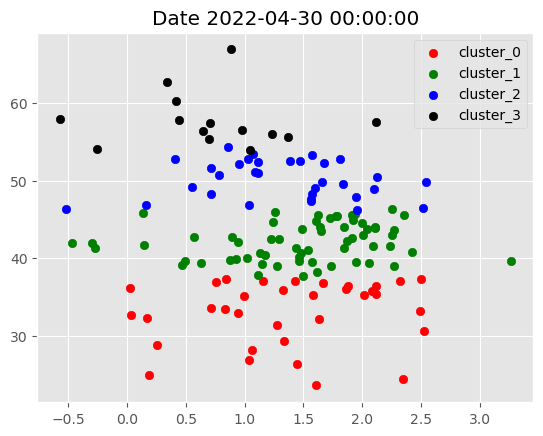

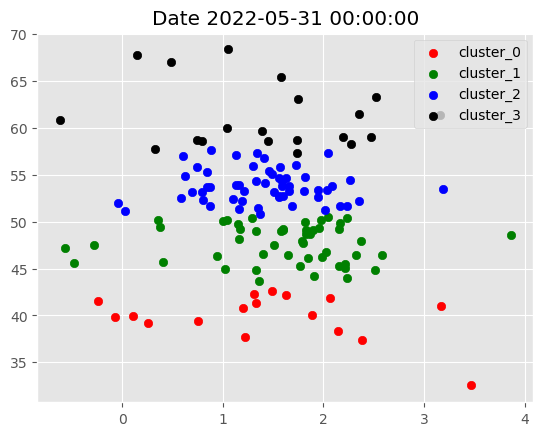

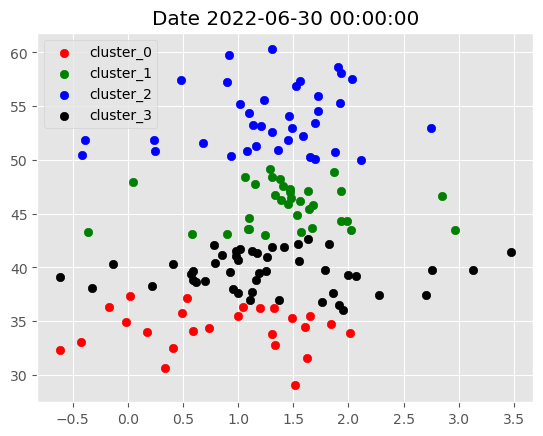

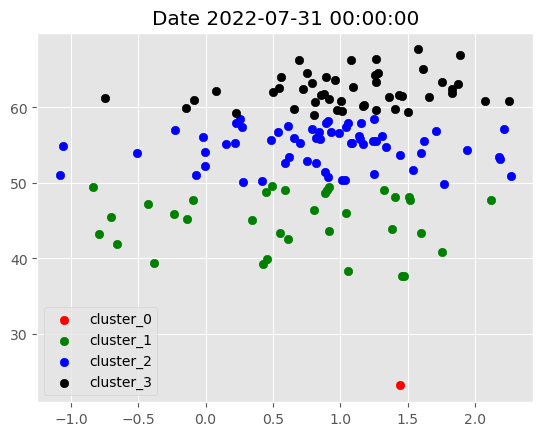

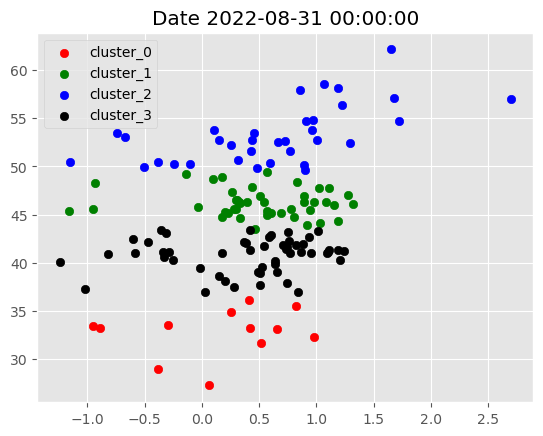

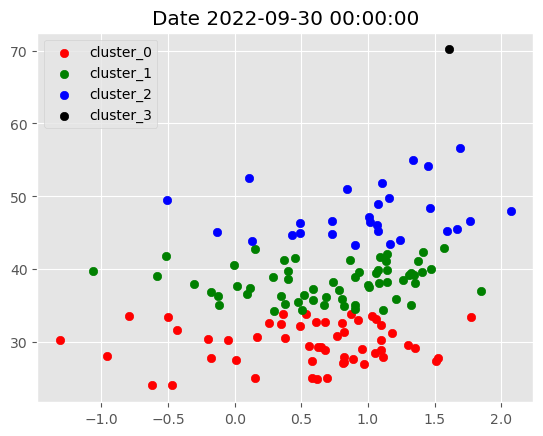

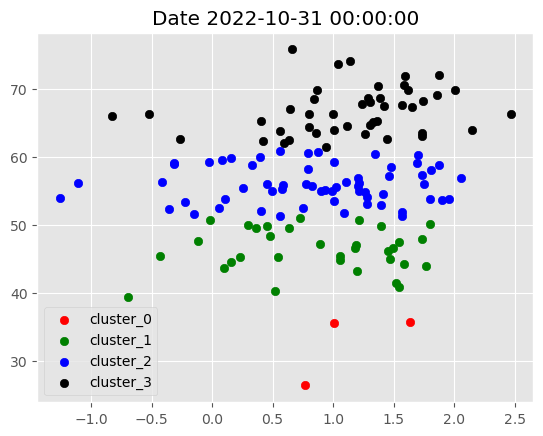

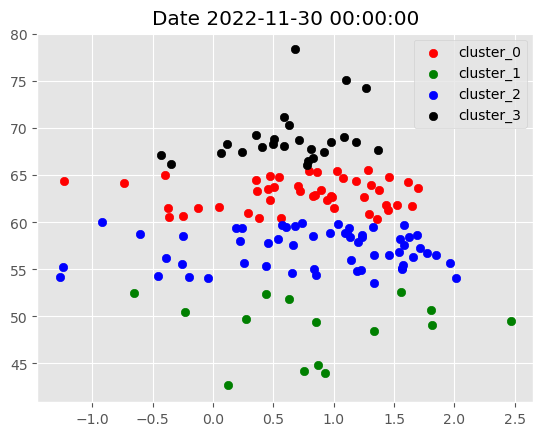

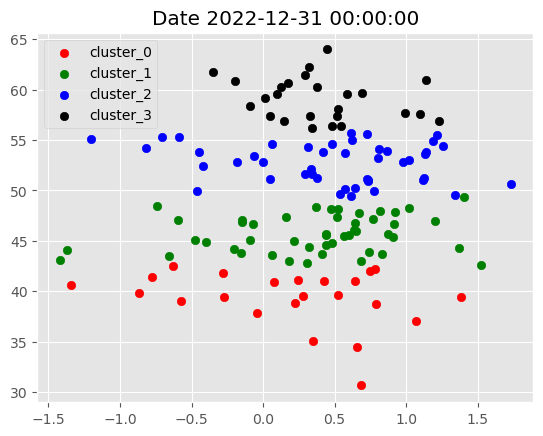

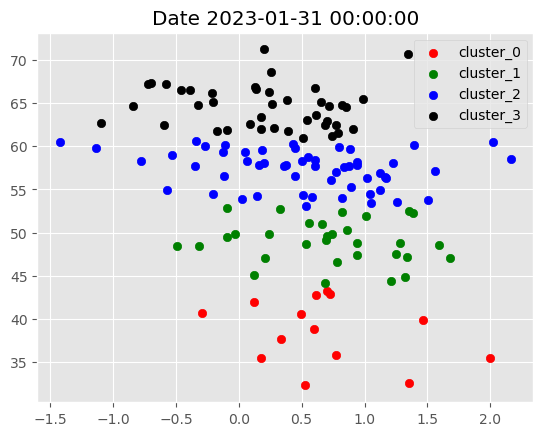

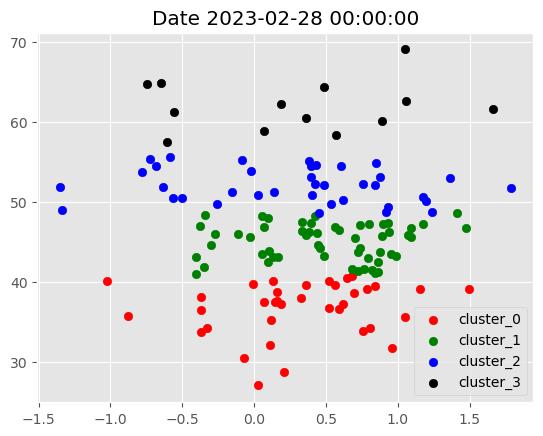

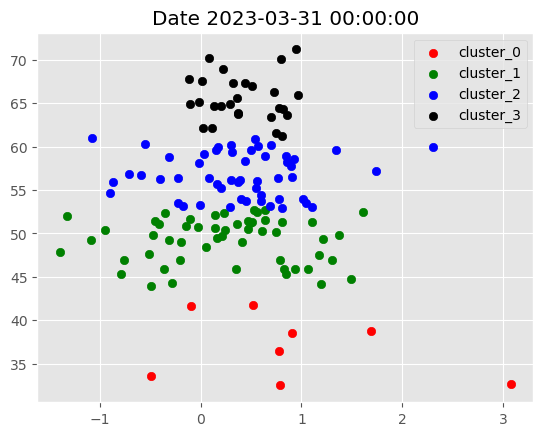

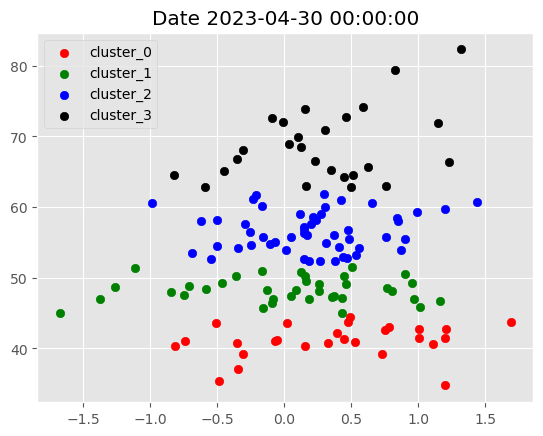

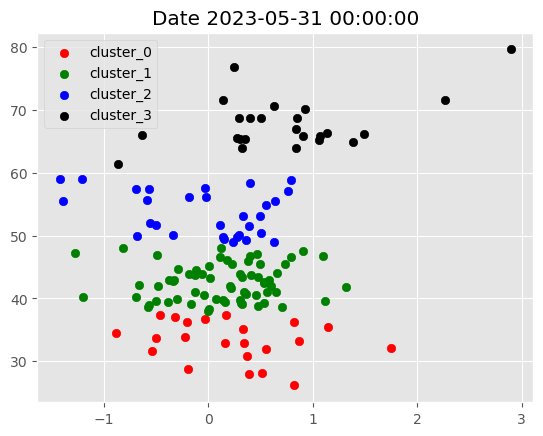

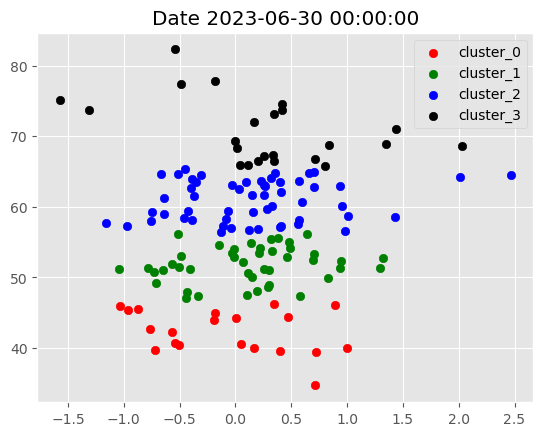

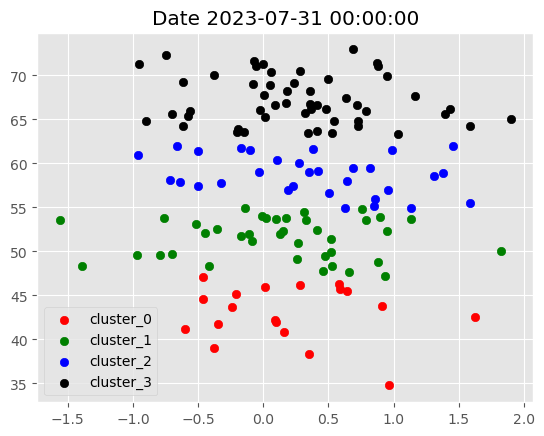

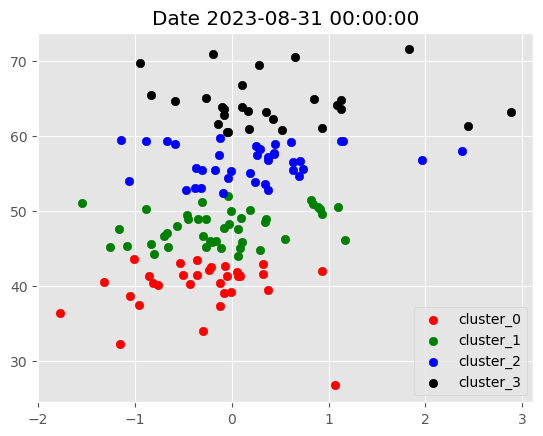

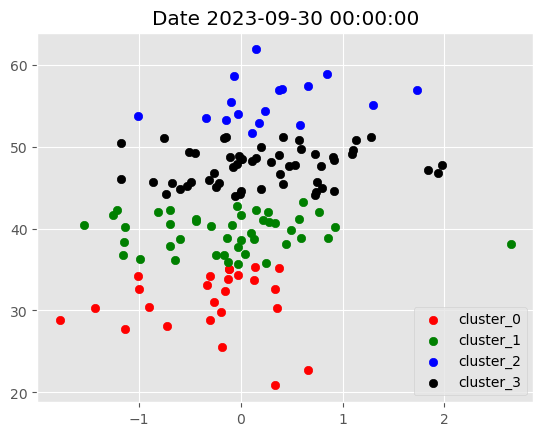

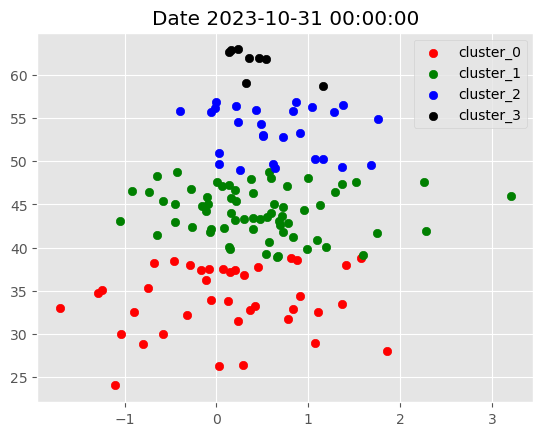

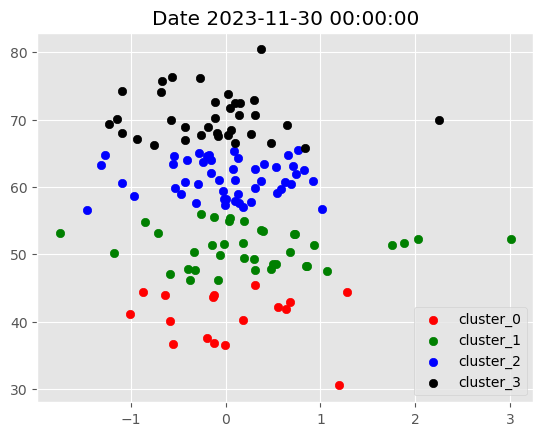

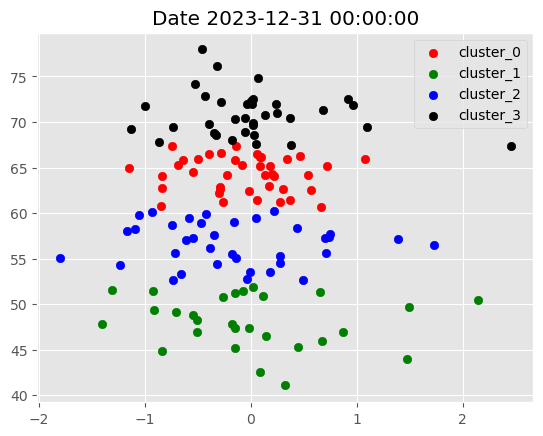

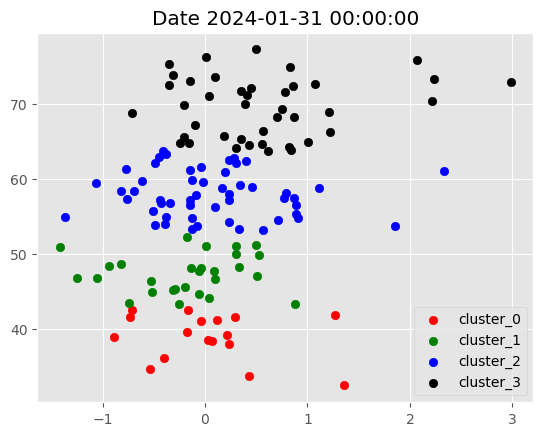

In [97]:
# Re running the visualization 

plt.style.use('ggplot')

for i in data.index.get_level_values('Date').unique().tolist() : # For each month
    
    g = data.xs(i,level=0) 
    
    plt.title(f'Date {i}')
    plot_clusters(g)

In [98]:
# Now we can use this to select the stocks in Cluster 3 (stocks that have the good momentum through the previous month)

In [99]:
# For each month we will select the assets based on the cluster and form a portfolio based on Efficient Frontier max sharpe
# ratio optimization

    # first we filter only stocks corresponding to the cluster we chosed based on our hypothesis 
    # Momentum is persistent and our idea would be that stocks clustered around RSI 70 centroid should continue to 
    # outperform in the following month - thus we would select stocks corresponding to cluster 3 

In [100]:
data[data['cluster'] == 3]

atr   bb_high    bb_low    bb_mid  garman_klass_vol  \
Date       Ticker                                                             
2018-02-28 AAPL   -0.784020  3.793888  3.615828  3.704858         -0.001265   
           ADBE   -0.716698  5.371634  5.223541  5.297587          0.000190   
           AMZN   -0.472960  4.362841  4.220638  4.291739          0.000052   
           BA      0.879548  5.875183  5.754252  5.814717         -0.000876   
           BKNG    0.171073  7.594327  7.472060  7.533193          0.000308   
...                     ...       ...       ...       ...               ...   
2024-01-31 TMUS    0.036961  5.127802  5.053668  5.090735          0.000029   
           TXN     0.431572  5.160395  5.084253  5.122324          0.000146   
           UBER   -0.157127  4.214014  4.062642  4.138328          0.000181   
           V      -0.314835  5.602960  5.542610  5.572785          0.000014   
           VRTX    0.826227  6.099764  5.984371  6.042068          0.000086   

                       macd        rsi  return_1m  return_2m  return_3m  \
Date       Ticker                                                         
2018-02-28 AAPL   -0.022701  59.836070   0.068185   0.028019   0.013390   
           ADBE    0.358393  63.581746   0.046906   0.092425   0.048425   
           AMZN    0.849693  67.296075   0.042429   0.137224   0.087257   
           BA      1.194378  63.889325   0.027169   0.110976   0.095581   
           BKNG    0.309357  67.390314   0.063801   0.081901   0.053483   
...                     ...        ...        ...        ...        ...   
2024-01-31 TMUS    1.588469  70.984518   0.025260   0.045270   0.046968   
           TXN     0.962656  64.454953   0.025637   0.069976   0.071764   
           UBER    1.099144  64.836764   0.048400   0.070004   0.142535   
           V       1.318980  73.891323   0.041675   0.027895   0.049511   
           VRTX    3.385570  74.901664   0.081644   0.113737   0.067186   

                   return_6m  return_9m  return_12m    Mkt-RF       SMB  \
Date       Ticker                                                         
2018-02-28 AAPL     0.015155   0.018521    0.023458  1.319578 -0.348675   
           ADBE     0.051008   0.044067    0.048593  1.173464 -0.404541   
           AMZN     0.074892   0.047671    0.049704  1.308018 -0.570950   
           BA       0.073096   0.077579    0.059822  1.019636  1.396801   
           BKNG     0.015742   0.008962    0.013870  1.234566 -0.075552   
...                      ...        ...         ...       ...       ...   
2024-01-31 TMUS     0.030618   0.015386    0.008411  0.350158  0.849768   
           TXN     -0.003331   0.007631    0.000857  0.790130  0.278172   
           UBER     0.045379   0.083320    0.063228  1.075322  1.205445   
           V        0.022879   0.017816    0.014417  0.964200 -0.152896   
           VRTX     0.037767   0.028845    0.026090  0.520767 -0.005949   

                        HML       RMW       CMA  cluster  
Date       Ticker                                         
2018-02-28 AAPL   -0.615348  0.518996  0.588603        3  
           ADBE   -0.200275 -0.080053 -0.597004        3  
           AMZN   -0.493439 -0.493930 -0.076839        3  
           BA      0.146108  0.361004  0.177531        3  
           BKNG    0.597295  0.398724 -0.499142        3  
...                     ...       ...       ...      ...  
2024-01-31 TMUS   -0.297009  0.575756 -0.015131        3  
           TXN     0.180962  0.437662 -0.065895        3  
           UBER   -0.343797 -1.338998 -0.288199        3  
           V       0.001487  0.246726 -0.342513        3  
           VRTX   -0.894255  0.136800  0.860117        3  

[1942 rows x 19 columns]

In [101]:
data

atr   bb_high    bb_low    bb_mid  garman_klass_vol  \
Date       Ticker                                                             
2018-02-28 AAL     1.349379  4.015218  3.875603  3.945411         -0.000118   
           AAPL   -0.784020  3.793888  3.615828  3.704858         -0.001265   
           ABBV    1.940762  4.539666  4.420361  4.480013         -0.034391   
           ABT    -0.602291  4.051457  3.947487  3.999472         -0.004361   
           ACN    -0.510266  5.030859  4.932437  4.981648         -0.003895   
...                     ...       ...       ...       ...               ...   
2024-01-31 VRTX    0.826227  6.099764  5.984371  6.042068          0.000086   
           VZ     -0.413135  3.723980  3.618261  3.671120          0.000046   
           WFC    -0.341161  3.942465  3.857025  3.899745          0.000126   
           WMT    -0.122132  4.019566  3.962025  3.990795          0.000038   
           XOM     0.070062  4.648645  4.564100  4.606372          0.000070   

                       macd        rsi  return_1m  return_2m  return_3m  \
Date       Ticker                                                         
2018-02-28 AAL     0.424686  55.685263   0.000632   0.022092   0.024888   
           AAPL   -0.022701  59.836070   0.068185   0.028019   0.013390   
           ABBV    1.180579  56.507211   0.032169   0.098315   0.063744   
           ABT    -0.042084  55.823924  -0.029440   0.030620   0.024517   
           ACN     0.117467  54.875570   0.001929   0.025541   0.028460   
...                     ...        ...        ...        ...        ...   
2024-01-31 VRTX    3.385570  74.901664   0.081644   0.113737   0.067186   
           VZ      1.333251  63.731965   0.067572   0.024707   0.046373   
           WFC     0.227648  56.767832  -0.014019   0.043245   0.071774   
           WMT     1.035131  59.841539   0.030067   0.027007   0.001635   
           XOM    -1.238093  38.329246  -0.031606  -0.029238  -0.026336   

                   return_6m  return_9m  return_12m    Mkt-RF       SMB  \
Date       Ticker                                                         
2018-02-28 AAL      0.033351   0.013426    0.013883  1.248288  1.381787   
           AAPL     0.015155   0.018521    0.023458  1.319578 -0.348675   
           ABBV     0.076940   0.065862    0.050452  0.462450  0.516173   
           ABT      0.030254   0.033180    0.026397  0.814049 -0.148104   
           ACN      0.036957   0.030116    0.024744  1.219943 -0.164371   
...                      ...        ...         ...       ...       ...   
2024-01-31 VRTX     0.037767   0.028845    0.026090  0.520767 -0.005949   
           VZ       0.031736   0.008336    0.001914  0.482660 -0.368392   
           WFC      0.011185   0.025205    0.005483  1.070010 -0.077371   
           WMT      0.006278   0.011868    0.013987  0.593167 -0.411747   
           XOM     -0.014058  -0.019235   -0.012196  1.123840  0.258571   

                        HML       RMW       CMA  cluster  
Date       Ticker                                         
2018-02-28 AAL     0.525733  0.248202  0.723601        2  
           AAPL   -0.615348  0.518996  0.588603        3  
           ABBV   -0.122230  0.444122  0.312378        2  
           ABT    -0.511593  0.296680  0.990342        2  
           ACN    -0.304811  0.311587  0.178467        2  
...                     ...       ...       ...      ...  
2024-01-31 VRTX   -0.894255  0.136800  0.860117        3  
           VZ      0.111355  0.284936  0.424633        2  
           WFC     1.474741 -0.724132 -0.667990        2  
           WMT    -0.365424  0.373518  0.733633        2  
           XOM     0.716329 -0.481653  0.603890        0  

[10186 rows x 19 columns]

In [102]:
filtered_df = data[data['cluster'] == 3].copy()
filtered_df 

atr   bb_high    bb_low    bb_mid  garman_klass_vol  \
Date       Ticker                                                             
2018-02-28 AAPL   -0.784020  3.793888  3.615828  3.704858         -0.001265   
           ADBE   -0.716698  5.371634  5.223541  5.297587          0.000190   
           AMZN   -0.472960  4.362841  4.220638  4.291739          0.000052   
           BA      0.879548  5.875183  5.754252  5.814717         -0.000876   
           BKNG    0.171073  7.594327  7.472060  7.533193          0.000308   
...                     ...       ...       ...       ...               ...   
2024-01-31 TMUS    0.036961  5.127802  5.053668  5.090735          0.000029   
           TXN     0.431572  5.160395  5.084253  5.122324          0.000146   
           UBER   -0.157127  4.214014  4.062642  4.138328          0.000181   
           V      -0.314835  5.602960  5.542610  5.572785          0.000014   
           VRTX    0.826227  6.099764  5.984371  6.042068          0.000086   

                       macd        rsi  return_1m  return_2m  return_3m  \
Date       Ticker                                                         
2018-02-28 AAPL   -0.022701  59.836070   0.068185   0.028019   0.013390   
           ADBE    0.358393  63.581746   0.046906   0.092425   0.048425   
           AMZN    0.849693  67.296075   0.042429   0.137224   0.087257   
           BA      1.194378  63.889325   0.027169   0.110976   0.095581   
           BKNG    0.309357  67.390314   0.063801   0.081901   0.053483   
...                     ...        ...        ...        ...        ...   
2024-01-31 TMUS    1.588469  70.984518   0.025260   0.045270   0.046968   
           TXN     0.962656  64.454953   0.025637   0.069976   0.071764   
           UBER    1.099144  64.836764   0.048400   0.070004   0.142535   
           V       1.318980  73.891323   0.041675   0.027895   0.049511   
           VRTX    3.385570  74.901664   0.081644   0.113737   0.067186   

                   return_6m  return_9m  return_12m    Mkt-RF       SMB  \
Date       Ticker                                                         
2018-02-28 AAPL     0.015155   0.018521    0.023458  1.319578 -0.348675   
           ADBE     0.051008   0.044067    0.048593  1.173464 -0.404541   
           AMZN     0.074892   0.047671    0.049704  1.308018 -0.570950   
           BA       0.073096   0.077579    0.059822  1.019636  1.396801   
           BKNG     0.015742   0.008962    0.013870  1.234566 -0.075552   
...                      ...        ...         ...       ...       ...   
2024-01-31 TMUS     0.030618   0.015386    0.008411  0.350158  0.849768   
           TXN     -0.003331   0.007631    0.000857  0.790130  0.278172   
           UBER     0.045379   0.083320    0.063228  1.075322  1.205445   
           V        0.022879   0.017816    0.014417  0.964200 -0.152896   
           VRTX     0.037767   0.028845    0.026090  0.520767 -0.005949   

                        HML       RMW       CMA  cluster  
Date       Ticker                                         
2018-02-28 AAPL   -0.615348  0.518996  0.588603        3  
           ADBE   -0.200275 -0.080053 -0.597004        3  
           AMZN   -0.493439 -0.493930 -0.076839        3  
           BA      0.146108  0.361004  0.177531        3  
           BKNG    0.597295  0.398724 -0.499142        3  
...                     ...       ...       ...      ...  
2024-01-31 TMUS   -0.297009  0.575756 -0.015131        3  
           TXN     0.180962  0.437662 -0.065895        3  
           UBER   -0.343797 -1.338998 -0.288199        3  
           V       0.001487  0.246726 -0.342513        3  
           VRTX   -0.894255  0.136800  0.860117        3  

[1942 rows x 19 columns]

In [103]:
# Note that we have the stocks for the end for feb in our data, so we would use these stocks for march

# we will create a dictionary with first day of the next month and all the stocks for next months in a list

filtered_df = filtered_df.reset_index(level = 1) 
filtered_df


Ticker       atr   bb_high    bb_low    bb_mid  garman_klass_vol  \
Date                                                                          
2018-02-28   AAPL -0.784020  3.793888  3.615828  3.704858         -0.001265   
2018-02-28   ADBE -0.716698  5.371634  5.223541  5.297587          0.000190   
2018-02-28   AMZN -0.472960  4.362841  4.220638  4.291739          0.000052   
2018-02-28     BA  0.879548  5.875183  5.754252  5.814717         -0.000876   
2018-02-28   BKNG  0.171073  7.594327  7.472060  7.533193          0.000308   
...           ...       ...       ...       ...       ...               ...   
2024-01-31   TMUS  0.036961  5.127802  5.053668  5.090735          0.000029   
2024-01-31    TXN  0.431572  5.160395  5.084253  5.122324          0.000146   
2024-01-31   UBER -0.157127  4.214014  4.062642  4.138328          0.000181   
2024-01-31      V -0.314835  5.602960  5.542610  5.572785          0.000014   
2024-01-31   VRTX  0.826227  6.099764  5.984371  6.042068          0.000086   

                macd        rsi  return_1m  return_2m  return_3m  return_6m  \
Date                                                                          
2018-02-28 -0.022701  59.836070   0.068185   0.028019   0.013390   0.015155   
2018-02-28  0.358393  63.581746   0.046906   0.092425   0.048425   0.051008   
2018-02-28  0.849693  67.296075   0.042429   0.137224   0.087257   0.074892   
2018-02-28  1.194378  63.889325   0.027169   0.110976   0.095581   0.073096   
2018-02-28  0.309357  67.390314   0.063801   0.081901   0.053483   0.015742   
...              ...        ...        ...        ...        ...        ...   
2024-01-31  1.588469  70.984518   0.025260   0.045270   0.046968   0.030618   
2024-01-31  0.962656  64.454953   0.025637   0.069976   0.071764  -0.003331   
2024-01-31  1.099144  64.836764   0.048400   0.070004   0.142535   0.045379   
2024-01-31  1.318980  73.891323   0.041675   0.027895   0.049511   0.022879   
2024-01-31  3.385570  74.901664   0.081644   0.113737   0.067186   0.037767   

            return_9m  return_12m    Mkt-RF       SMB       HML       RMW  \
Date                                                                        
2018-02-28   0.018521    0.023458  1.319578 -0.348675 -0.615348  0.518996   
2018-02-28   0.044067    0.048593  1.173464 -0.404541 -0.200275 -0.080053   
2018-02-28   0.047671    0.049704  1.308018 -0.570950 -0.493439 -0.493930   
2018-02-28   0.077579    0.059822  1.019636  1.396801  0.146108  0.361004   
2018-02-28   0.008962    0.013870  1.234566 -0.075552  0.597295  0.398724   
...               ...         ...       ...       ...       ...       ...   
2024-01-31   0.015386    0.008411  0.350158  0.849768 -0.297009  0.575756   
2024-01-31   0.007631    0.000857  0.790130  0.278172  0.180962  0.437662   
2024-01-31   0.083320    0.063228  1.075322  1.205445 -0.343797 -1.338998   
2024-01-31   0.017816    0.014417  0.964200 -0.152896  0.001487  0.246726   
2024-01-31   0.028845    0.026090  0.520767 -0.005949 -0.894255  0.136800   

                 CMA  cluster  
Date                           
2018-02-28  0.588603        3  
2018-02-28 -0.597004        3  
2018-02-28 -0.076839        3  
2018-02-28  0.177531        3  
2018-02-28 -0.499142        3  
...              ...      ...  
2024-01-31 -0.015131        3  
2024-01-31 -0.065895        3  
2024-01-31 -0.288199        3  
2024-01-31 -0.342513        3  
2024-01-31  0.860117        3  

[1942 rows x 20 columns]

In [104]:
filtered_df.index = filtered_df.index + pd.DateOffset(1)
filtered_df
# we have now the data corresponding to the beginning of the next month

Ticker       atr   bb_high    bb_low    bb_mid  garman_klass_vol  \
Date                                                                          
2018-03-01   AAPL -0.784020  3.793888  3.615828  3.704858         -0.001265   
2018-03-01   ADBE -0.716698  5.371634  5.223541  5.297587          0.000190   
2018-03-01   AMZN -0.472960  4.362841  4.220638  4.291739          0.000052   
2018-03-01     BA  0.879548  5.875183  5.754252  5.814717         -0.000876   
2018-03-01   BKNG  0.171073  7.594327  7.472060  7.533193          0.000308   
...           ...       ...       ...       ...       ...               ...   
2024-02-01   TMUS  0.036961  5.127802  5.053668  5.090735          0.000029   
2024-02-01    TXN  0.431572  5.160395  5.084253  5.122324          0.000146   
2024-02-01   UBER -0.157127  4.214014  4.062642  4.138328          0.000181   
2024-02-01      V -0.314835  5.602960  5.542610  5.572785          0.000014   
2024-02-01   VRTX  0.826227  6.099764  5.984371  6.042068          0.000086   

                macd        rsi  return_1m  return_2m  return_3m  return_6m  \
Date                                                                          
2018-03-01 -0.022701  59.836070   0.068185   0.028019   0.013390   0.015155   
2018-03-01  0.358393  63.581746   0.046906   0.092425   0.048425   0.051008   
2018-03-01  0.849693  67.296075   0.042429   0.137224   0.087257   0.074892   
2018-03-01  1.194378  63.889325   0.027169   0.110976   0.095581   0.073096   
2018-03-01  0.309357  67.390314   0.063801   0.081901   0.053483   0.015742   
...              ...        ...        ...        ...        ...        ...   
2024-02-01  1.588469  70.984518   0.025260   0.045270   0.046968   0.030618   
2024-02-01  0.962656  64.454953   0.025637   0.069976   0.071764  -0.003331   
2024-02-01  1.099144  64.836764   0.048400   0.070004   0.142535   0.045379   
2024-02-01  1.318980  73.891323   0.041675   0.027895   0.049511   0.022879   
2024-02-01  3.385570  74.901664   0.081644   0.113737   0.067186   0.037767   

            return_9m  return_12m    Mkt-RF       SMB       HML       RMW  \
Date                                                                        
2018-03-01   0.018521    0.023458  1.319578 -0.348675 -0.615348  0.518996   
2018-03-01   0.044067    0.048593  1.173464 -0.404541 -0.200275 -0.080053   
2018-03-01   0.047671    0.049704  1.308018 -0.570950 -0.493439 -0.493930   
2018-03-01   0.077579    0.059822  1.019636  1.396801  0.146108  0.361004   
2018-03-01   0.008962    0.013870  1.234566 -0.075552  0.597295  0.398724   
...               ...         ...       ...       ...       ...       ...   
2024-02-01   0.015386    0.008411  0.350158  0.849768 -0.297009  0.575756   
2024-02-01   0.007631    0.000857  0.790130  0.278172  0.180962  0.437662   
2024-02-01   0.083320    0.063228  1.075322  1.205445 -0.343797 -1.338998   
2024-02-01   0.017816    0.014417  0.964200 -0.152896  0.001487  0.246726   
2024-02-01   0.028845    0.026090  0.520767 -0.005949 -0.894255  0.136800   

                 CMA  cluster  
Date                           
2018-03-01  0.588603        3  
2018-03-01 -0.597004        3  
2018-03-01 -0.076839        3  
2018-03-01  0.177531        3  
2018-03-01 -0.499142        3  
...              ...      ...  
2024-02-01 -0.015131        3  
2024-02-01 -0.065895        3  
2024-02-01 -0.288199        3  
2024-02-01 -0.342513        3  
2024-02-01  0.860117        3  

[1942 rows x 20 columns]

In [105]:
filtered_df.reset_index().set_index(['Date','Ticker'])

atr   bb_high    bb_low    bb_mid  garman_klass_vol  \
Date       Ticker                                                             
2018-03-01 AAPL   -0.784020  3.793888  3.615828  3.704858         -0.001265   
           ADBE   -0.716698  5.371634  5.223541  5.297587          0.000190   
           AMZN   -0.472960  4.362841  4.220638  4.291739          0.000052   
           BA      0.879548  5.875183  5.754252  5.814717         -0.000876   
           BKNG    0.171073  7.594327  7.472060  7.533193          0.000308   
...                     ...       ...       ...       ...               ...   
2024-02-01 TMUS    0.036961  5.127802  5.053668  5.090735          0.000029   
           TXN     0.431572  5.160395  5.084253  5.122324          0.000146   
           UBER   -0.157127  4.214014  4.062642  4.138328          0.000181   
           V      -0.314835  5.602960  5.542610  5.572785          0.000014   
           VRTX    0.826227  6.099764  5.984371  6.042068          0.000086   

                       macd        rsi  return_1m  return_2m  return_3m  \
Date       Ticker                                                         
2018-03-01 AAPL   -0.022701  59.836070   0.068185   0.028019   0.013390   
           ADBE    0.358393  63.581746   0.046906   0.092425   0.048425   
           AMZN    0.849693  67.296075   0.042429   0.137224   0.087257   
           BA      1.194378  63.889325   0.027169   0.110976   0.095581   
           BKNG    0.309357  67.390314   0.063801   0.081901   0.053483   
...                     ...        ...        ...        ...        ...   
2024-02-01 TMUS    1.588469  70.984518   0.025260   0.045270   0.046968   
           TXN     0.962656  64.454953   0.025637   0.069976   0.071764   
           UBER    1.099144  64.836764   0.048400   0.070004   0.142535   
           V       1.318980  73.891323   0.041675   0.027895   0.049511   
           VRTX    3.385570  74.901664   0.081644   0.113737   0.067186   

                   return_6m  return_9m  return_12m    Mkt-RF       SMB  \
Date       Ticker                                                         
2018-03-01 AAPL     0.015155   0.018521    0.023458  1.319578 -0.348675   
           ADBE     0.051008   0.044067    0.048593  1.173464 -0.404541   
           AMZN     0.074892   0.047671    0.049704  1.308018 -0.570950   
           BA       0.073096   0.077579    0.059822  1.019636  1.396801   
           BKNG     0.015742   0.008962    0.013870  1.234566 -0.075552   
...                      ...        ...         ...       ...       ...   
2024-02-01 TMUS     0.030618   0.015386    0.008411  0.350158  0.849768   
           TXN     -0.003331   0.007631    0.000857  0.790130  0.278172   
           UBER     0.045379   0.083320    0.063228  1.075322  1.205445   
           V        0.022879   0.017816    0.014417  0.964200 -0.152896   
           VRTX     0.037767   0.028845    0.026090  0.520767 -0.005949   

                        HML       RMW       CMA  cluster  
Date       Ticker                                         
2018-03-01 AAPL   -0.615348  0.518996  0.588603        3  
           ADBE   -0.200275 -0.080053 -0.597004        3  
           AMZN   -0.493439 -0.493930 -0.076839        3  
           BA      0.146108  0.361004  0.177531        3  
           BKNG    0.597295  0.398724 -0.499142        3  
...                     ...       ...       ...      ...  
2024-02-01 TMUS   -0.297009  0.575756 -0.015131        3  
           TXN     0.180962  0.437662 -0.065895        3  
           UBER   -0.343797 -1.338998 -0.288199        3  
           V       0.001487  0.246726 -0.342513        3  
           VRTX   -0.894255  0.136800  0.860117        3  

[1942 rows x 19 columns]

In [106]:
filtered_df = filtered_df.reset_index().set_index(['Date','Ticker'])
filtered_df

atr   bb_high    bb_low    bb_mid  garman_klass_vol  \
Date       Ticker                                                             
2018-03-01 AAPL   -0.784020  3.793888  3.615828  3.704858         -0.001265   
           ADBE   -0.716698  5.371634  5.223541  5.297587          0.000190   
           AMZN   -0.472960  4.362841  4.220638  4.291739          0.000052   
           BA      0.879548  5.875183  5.754252  5.814717         -0.000876   
           BKNG    0.171073  7.594327  7.472060  7.533193          0.000308   
...                     ...       ...       ...       ...               ...   
2024-02-01 TMUS    0.036961  5.127802  5.053668  5.090735          0.000029   
           TXN     0.431572  5.160395  5.084253  5.122324          0.000146   
           UBER   -0.157127  4.214014  4.062642  4.138328          0.000181   
           V      -0.314835  5.602960  5.542610  5.572785          0.000014   
           VRTX    0.826227  6.099764  5.984371  6.042068          0.000086   

                       macd        rsi  return_1m  return_2m  return_3m  \
Date       Ticker                                                         
2018-03-01 AAPL   -0.022701  59.836070   0.068185   0.028019   0.013390   
           ADBE    0.358393  63.581746   0.046906   0.092425   0.048425   
           AMZN    0.849693  67.296075   0.042429   0.137224   0.087257   
           BA      1.194378  63.889325   0.027169   0.110976   0.095581   
           BKNG    0.309357  67.390314   0.063801   0.081901   0.053483   
...                     ...        ...        ...        ...        ...   
2024-02-01 TMUS    1.588469  70.984518   0.025260   0.045270   0.046968   
           TXN     0.962656  64.454953   0.025637   0.069976   0.071764   
           UBER    1.099144  64.836764   0.048400   0.070004   0.142535   
           V       1.318980  73.891323   0.041675   0.027895   0.049511   
           VRTX    3.385570  74.901664   0.081644   0.113737   0.067186   

                   return_6m  return_9m  return_12m    Mkt-RF       SMB  \
Date       Ticker                                                         
2018-03-01 AAPL     0.015155   0.018521    0.023458  1.319578 -0.348675   
           ADBE     0.051008   0.044067    0.048593  1.173464 -0.404541   
           AMZN     0.074892   0.047671    0.049704  1.308018 -0.570950   
           BA       0.073096   0.077579    0.059822  1.019636  1.396801   
           BKNG     0.015742   0.008962    0.013870  1.234566 -0.075552   
...                      ...        ...         ...       ...       ...   
2024-02-01 TMUS     0.030618   0.015386    0.008411  0.350158  0.849768   
           TXN     -0.003331   0.007631    0.000857  0.790130  0.278172   
           UBER     0.045379   0.083320    0.063228  1.075322  1.205445   
           V        0.022879   0.017816    0.014417  0.964200 -0.152896   
           VRTX     0.037767   0.028845    0.026090  0.520767 -0.005949   

                        HML       RMW       CMA  cluster  
Date       Ticker                                         
2018-03-01 AAPL   -0.615348  0.518996  0.588603        3  
           ADBE   -0.200275 -0.080053 -0.597004        3  
           AMZN   -0.493439 -0.493930 -0.076839        3  
           BA      0.146108  0.361004  0.177531        3  
           BKNG    0.597295  0.398724 -0.499142        3  
...                     ...       ...       ...      ...  
2024-02-01 TMUS   -0.297009  0.575756 -0.015131        3  
           TXN     0.180962  0.437662 -0.065895        3  
           UBER   -0.343797 -1.338998 -0.288199        3  
           V       0.001487  0.246726 -0.342513        3  
           VRTX   -0.894255  0.136800  0.860117        3  

[1942 rows x 19 columns]

In [107]:
dates = filtered_df.index.get_level_values('Date').unique().tolist() # We will have all the dates 
fixed_dates = {} # It would be a dictionary
dates

[Timestamp('2018-03-01 00:00:00'),
 Timestamp('2018-04-01 00:00:00'),
 Timestamp('2018-05-01 00:00:00'),
 Timestamp('2018-06-01 00:00:00'),
 Timestamp('2018-07-01 00:00:00'),
 Timestamp('2018-08-01 00:00:00'),
 Timestamp('2018-09-01 00:00:00'),
 Timestamp('2018-10-01 00:00:00'),
 Timestamp('2018-11-01 00:00:00'),
 Timestamp('2018-12-01 00:00:00'),
 Timestamp('2019-01-01 00:00:00'),
 Timestamp('2019-02-01 00:00:00'),
 Timestamp('2019-03-01 00:00:00'),
 Timestamp('2019-04-01 00:00:00'),
 Timestamp('2019-05-01 00:00:00'),
 Timestamp('2019-06-01 00:00:00'),
 Timestamp('2019-07-01 00:00:00'),
 Timestamp('2019-08-01 00:00:00'),
 Timestamp('2019-09-01 00:00:00'),
 Timestamp('2019-10-01 00:00:00'),
 Timestamp('2019-11-01 00:00:00'),
 Timestamp('2019-12-01 00:00:00'),
 Timestamp('2020-01-01 00:00:00'),
 Timestamp('2020-02-01 00:00:00'),
 Timestamp('2020-03-01 00:00:00'),
 Timestamp('2020-04-01 00:00:00'),
 Timestamp('2020-05-01 00:00:00'),
 Timestamp('2020-06-01 00:00:00'),
 Timestamp('2020-07-

In [108]:
for d in dates : 
    
    fixed_dates[d.strftime('%Y-%m-%d')] = filtered_df.xs(d,level = 0).index.tolist()

fixed_dates

# Now we have the first day of the next month and stocks we want to invest for the next month into a list

# Now we will use it to create our portfolio

{'2018-03-01': ['AAPL',
  'ADBE',
  'AMZN',
  'BA',
  'BKNG',
  'CRM',
  'CSCO',
  'CTSH',
  'INTC',
  'MA',
  'MU',
  'NFLX',
  'NXPI',
  'PANW',
  'TJX'],
 '2018-04-01': ['AMT',
  'BKNG',
  'CL',
  'COP',
  'INTC',
  'NEE',
  'PANW',
  'STZ',
  'TJX',
  'WYNN'],
 '2018-05-01': ['CMG', 'COP', 'EOG', 'HAL', 'OXY', 'PXD', 'ULTA', 'VLO'],
 '2018-06-01': ['ADBE',
  'AMD',
  'AMZN',
  'BIIB',
  'CMG',
  'CSX',
  'EXPE',
  'GM',
  'LLY',
  'LOW',
  'META',
  'NEE',
  'NFLX',
  'OXY',
  'PANW',
  'TJX',
  'TXN',
  'VLO'],
 '2018-07-01': ['ACN',
  'AMT',
  'BSX',
  'COST',
  'CRM',
  'EA',
  'EOG',
  'KR',
  'MDLZ',
  'NEE',
  'NFLX',
  'NKE',
  'PARA',
  'PEP',
  'PG',
  'REGN',
  'SHW',
  'TJX',
  'VZ'],
 '2018-08-01': ['ABT',
  'AMD',
  'AMGN',
  'AMT',
  'BMY',
  'C',
  'CL',
  'CMCSA',
  'COST',
  'CSX',
  'DIS',
  'ELV',
  'EOG',
  'EXPE',
  'GILD',
  'HON',
  'JNJ',
  'JPM',
  'KO',
  'KR',
  'LLY',
  'LMT',
  'LUV',
  'MDLZ',
  'MDT',
  'MMM',
  'MRK',
  'ORLY',
  'PEP',
  'PFE',
  'P

In [109]:
# Now We will Define the Portfolio optimization function 

    # We will define a function which optimizes portfolio weights using PyPortfolioOpt package and Efficient Frontier optimizer
    # to maximize the sharpe ratio
    # To optimize the weights of a given portfolio we would need to supply laset 1 year prices to the function
    # Apply Single stock weight bounds constraint for diversification(minimum half equaly weight and maximum 10% of 
    # portfolio).

In [110]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

# For each months we have the stocks to invest 
# But we will assign the weights to them
# We will use this package to find and optimize those weights for every month 

def optimize_weights(prices, lower_bound = 0) : 
    
    returns = expected_returns.mean_historical_return(prices=prices,
                                                     frequency = 252)
    
    # frequency = 252 means 1 year of trading data
    
    cov = risk_models.sample_cov(prices=prices,
                                frequency = 252)
    
    ef = EfficientFrontier(expected_returns = returns,
                          cov_matrix = cov, 
                          weight_bounds = (lower_bound,0.1),
                           solver = 'SCS')
    
    # Weight bounds are the contraints on the weights of a particular stock 
    # currently we have have (0,1) weight bounds which means that after optimizations we could have
    # some stocks with 0 weights and we may also have single stock with 100% weight
    # Obviously we dont want that because of diversification purpose , hence we would like to have a maximum weight of 10%
    # of our portfolio of a single stock
    # For lower_bound we will use a more dynamic metric 
    # For lower_bound when we do the optimization we will use half the weight of a equally weighted portfolio
    # If we have 20 stocks for a month then an equally weighted portfolio would have 5% of each stock, so we may assign
    # half of that weight
    # With this we make sure we have diversified and more balanced portfolio
    
    weights = ef.max_sharpe()
    
    return ef.clean_weights() 

# Clean weights rounds the weights and clips near zeroes

In [111]:
# Now we will download fresh daily prices of all the stocks that may end up on our portfolio
# From our optimization weights function we need atleast 1 year of data prior to the optimization

stocks = data.index.get_level_values('Ticker').unique().tolist() 
new_df = yf.download(tickers = stocks,
                    start = data.index.get_level_values('Date').unique()[0] - pd.DateOffset(months = 12),
                    end = data.index.get_level_values('Date').unique()[-1])
new_df 

# Downloaded the fresh data from Yahoo Finance

[*********************100%%**********************]  157 of 157 completed


Price       Adj Close                                                  \
Ticker            AAL        AAPL        ABBV         ABT         ACN   
Date                                                                    
2017-02-28  44.898849   31.969772   45.488468   39.848404  109.569908   
2017-03-01  45.605843   32.623226   46.216690   40.299225  110.974190   
2017-03-02  44.279022   32.429516   46.525631   40.387611  111.224625   
2017-03-03  45.344349   32.620884   46.591839   39.998676  110.589569   
2017-03-06  43.881943   32.518188   46.746319   39.892601  110.231789   
...               ...         ...         ...         ...         ...   
2024-01-24  13.930000  194.252121  164.220001  110.769997  368.899994   
2024-01-25  15.360000  193.922546  165.130005  112.449997  371.940002   
2024-01-26  15.130000  192.174774  164.399994  112.010002  371.070007   
2024-01-29  14.940000  191.485657  163.910004  113.449997  373.350006   
2024-01-30  14.530000  187.800354  164.919998  113.480003  371.299988   

Price                                                                  ...  \
Ticker            ADBE         ADP        ADSK        AIG        AMAT  ...   
Date                                                                   ...   
2017-02-28  118.339996   88.560341   86.300003  53.076393   33.400562  ...   
2017-03-01  120.349998   90.208656   88.930000  53.665951   33.981525  ...   
2017-03-02  119.900002   89.811676   87.320000  53.059788   33.649540  ...   
2017-03-03  120.040001   90.182770   85.320000  53.325497   33.999962  ...   
2017-03-06  120.150002   90.571114   82.940002  52.960144   33.990742  ...   
...                ...         ...         ...        ...         ...  ...   
2024-01-24  606.479980  238.440002  252.660004  69.160004  173.845383  ...   
2024-01-25  622.580017  236.720001  251.750000  68.980003  172.337936  ...   
2024-01-26  613.929993  236.100006  253.070007  69.529999  166.617615  ...   
2024-01-29  630.229980  237.710007  257.230011  69.370003  168.194946  ...   
2024-01-30  627.960022  238.589996  256.470001  70.379997  165.958740  ...   

Price         Volume                                                  \
Ticker             V      VLO     VRTX        VZ       WBA       WDC   
Date                                                                   
2017-02-28   8521900  9074700  2401900  17699200   3879900   5078100   
2017-03-01  11131400  4921900  2089400  16095600   3390500   4667800   
2017-03-02  10544200  7343000  1060900  10773400   3096800   4867100   
2017-03-03   5700600  4046600  1422600  11071600   3157600   3223100   
2017-03-06   7347600  3315300  1587700  10827300   2437500   3855000   
...              ...      ...      ...       ...       ...       ...   
2024-01-24   5021700  3140800  1670900  27910400   9246400   9723800   
2024-01-25   6894900  5293300  1230600  24613200  14707700  23848700   
2024-01-26   8586500  5286000   944500  20367200  10150200  19645800   
2024-01-29   6574500  3464000  1004100  23905700  12197400   9380300   
2024-01-30   6549000  4304100  3329900  20044600  11689100   9717100   

Price                                              
Ticker           WFC       WMT     WYNN       XOM  
Date                                               
2017-02-28  15558900  47857800  2094100  16834200  
2017-03-01  25912700  40568100  6088500  17482100  
2017-03-02  17578600  26748900  2754100  14170300  
2017-03-03  14740000  27893700  1782100  12190400  
2017-03-06  13225500  27547800  1206000   9617200  
...              ...       ...      ...       ...  
2024-01-24  17776000  22932900  2318700  17330600  
2024-01-25  17979600  16369500  2568600  22089500  
2024-01-26  19211100  15746400  1465200  20817200  
2024-01-29  16725200  18240300  1261800  18317500  
2024-01-30  14736800  15270000  1388400  19610900  

[1742 rows x 942 columns]

In [112]:
# Now we loop over the fixed_dates dictionary and for each new month we are going to get the stocks
# and optimize weights and calculate the daily portfolio return and then calculating the whole timeperiod 
# portfolio return by rebalancing and optimizing every new month


# Calculate daily returns for each stock which could land up in our portfolio 
# Then loop over each month start, select the stocks for the month and calculate their weights for the next month 
# If the maximum sharpe ratio optimization fails for a given month, apply - equally weighted weights.
# Calculate each day portfolio return

In [113]:
returns_dataframe = np.log(new_df['Adj Close']).diff() 
returns_dataframe

Ticker           AAL      AAPL      ABBV       ABT       ACN      ADBE  \
Date                                                                     
2017-02-28       NaN       NaN       NaN       NaN       NaN       NaN   
2017-03-01  0.015624  0.020234  0.015882  0.011250  0.012735  0.016842   
2017-03-02 -0.029525 -0.005956  0.006662  0.002191  0.002254 -0.003746   
2017-03-03  0.023775  0.005884  0.001422 -0.009677 -0.005726  0.001167   
2017-03-06 -0.032783 -0.003153  0.003310 -0.002655 -0.003240  0.000916   
...              ...       ...       ...       ...       ...       ...   
2024-01-24 -0.005013 -0.003490 -0.019776 -0.028742 -0.002599  0.015453   
2024-01-25  0.097722 -0.001698  0.005526  0.015053  0.008207  0.026200   
2024-01-26 -0.015087 -0.009054 -0.004431 -0.003920 -0.002342 -0.013991   
2024-01-29 -0.012637 -0.003592 -0.002985  0.012774  0.006126  0.026204   
2024-01-30 -0.027827 -0.019433  0.006143  0.000264 -0.005506 -0.003608   

Ticker           ADP      ADSK       AIG      AMAT  ...         V       VLO  \
Date                                                ...                       
2017-02-28       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2017-03-01  0.018441  0.030020  0.011046  0.017244  ...  0.011869  0.007770   
2017-03-02 -0.004410 -0.018270 -0.011359 -0.009818  ... -0.005183 -0.030092   
2017-03-03  0.004123 -0.023171  0.004995  0.010360  ...  0.002933 -0.005584   
2017-03-06  0.004297 -0.028291 -0.006875 -0.000271  ...  0.001688  0.005433   
...              ...       ...       ...       ...  ...       ...       ...   
2024-01-24 -0.008020 -0.000475  0.002316  0.041566  ...  0.001437  0.008023   
2024-01-25 -0.007240 -0.003608 -0.002606 -0.008709  ...  0.003528  0.032579   
2024-01-26 -0.002623  0.005230  0.007942 -0.033756  ... -0.017279  0.025335   
2024-01-29  0.006796  0.016305 -0.002304  0.009422  ...  0.021123  0.003402   
2024-01-30  0.003695 -0.002959  0.014455 -0.013384  ...  0.012672  0.025049   

Ticker          VRTX        VZ       WBA       WDC       WFC       WMT  \
Date                                                                     
2017-02-28       NaN       NaN       NaN       NaN       NaN       NaN   
2017-03-01 -0.003427  0.003620  0.004505  0.018557  0.031462 -0.006790   
2017-03-02 -0.004661  0.003407 -0.000346 -0.026392 -0.017224  0.004391   
2017-03-03  0.003332  0.002198 -0.009847  0.016383  0.003061 -0.010371   
2017-03-06  0.007951 -0.001199 -0.000117 -0.009589 -0.004766 -0.002144   
...              ...       ...       ...       ...       ...       ...   
2024-01-24 -0.027998 -0.022753 -0.009344  0.005183  0.007504 -0.014229   
2024-01-25  0.005598  0.024173  0.032545  0.038869  0.007849  0.014474   
2024-01-26  0.000488  0.002598 -0.011314 -0.035429  0.008783  0.008743   
2024-01-29  0.013049 -0.008289 -0.005706  0.025769  0.000596  0.004676   
2024-01-30  0.023269  0.009939  0.001759 -0.027659  0.016546  0.003327   

Ticker          WYNN       XOM  
Date                            
2017-02-28       NaN       NaN  
2017-03-01  0.066000  0.020689  
2017-03-02 -0.025240  0.003367  
2017-03-03  0.008847 -0.010135  
2017-03-06 -0.006653  0.004477  
...              ...       ...  
2024-01-24  0.012594  0.017113  
2024-01-25  0.022235  0.025084  
2024-01-26  0.003314  0.008483  
2024-01-29  0.003406  0.001261  
2024-01-30 -0.021558  0.016540  

[1742 rows x 157 columns]

In [114]:
portfolio_df = pd.DataFrame() 
for start_date in fixed_dates.keys() : 
    print(start_date)

2018-03-01
2018-04-01
2018-05-01
2018-06-01
2018-07-01
2018-08-01
2018-09-01
2018-10-01
2018-11-01
2018-12-01
2019-01-01
2019-02-01
2019-03-01
2019-04-01
2019-05-01
2019-06-01
2019-07-01
2019-08-01
2019-09-01
2019-10-01
2019-11-01
2019-12-01
2020-01-01
2020-02-01
2020-03-01
2020-04-01
2020-05-01
2020-06-01
2020-07-01
2020-08-01
2020-09-01
2020-10-01
2020-11-01
2020-12-01
2021-01-01
2021-02-01
2021-03-01
2021-04-01
2021-05-01
2021-06-01
2021-07-01
2021-08-01
2021-09-01
2021-10-01
2021-11-01
2021-12-01
2022-01-01
2022-02-01
2022-03-01
2022-04-01
2022-05-01
2022-06-01
2022-07-01
2022-08-01
2022-09-01
2022-10-01
2022-11-01
2022-12-01
2023-01-01
2023-02-01
2023-03-01
2023-04-01
2023-05-01
2023-06-01
2023-07-01
2023-08-01
2023-09-01
2023-10-01
2023-11-01
2023-12-01
2024-01-01
2024-02-01


In [115]:
for start_date in fixed_dates.keys() : 
        
    end_date = (pd.to_datetime(start_date) + pd.offsets.MonthEnd(0)).strftime('%Y-%m-%d')
    
    print(start_date) 
    print(end_date)
    # We have start of the month and end of the month

2018-03-01
2018-03-31
2018-04-01
2018-04-30
2018-05-01
2018-05-31
2018-06-01
2018-06-30
2018-07-01
2018-07-31
2018-08-01
2018-08-31
2018-09-01
2018-09-30
2018-10-01
2018-10-31
2018-11-01
2018-11-30
2018-12-01
2018-12-31
2019-01-01
2019-01-31
2019-02-01
2019-02-28
2019-03-01
2019-03-31
2019-04-01
2019-04-30
2019-05-01
2019-05-31
2019-06-01
2019-06-30
2019-07-01
2019-07-31
2019-08-01
2019-08-31
2019-09-01
2019-09-30
2019-10-01
2019-10-31
2019-11-01
2019-11-30
2019-12-01
2019-12-31
2020-01-01
2020-01-31
2020-02-01
2020-02-29
2020-03-01
2020-03-31
2020-04-01
2020-04-30
2020-05-01
2020-05-31
2020-06-01
2020-06-30
2020-07-01
2020-07-31
2020-08-01
2020-08-31
2020-09-01
2020-09-30
2020-10-01
2020-10-31
2020-11-01
2020-11-30
2020-12-01
2020-12-31
2021-01-01
2021-01-31
2021-02-01
2021-02-28
2021-03-01
2021-03-31
2021-04-01
2021-04-30
2021-05-01
2021-05-31
2021-06-01
2021-06-30
2021-07-01
2021-07-31
2021-08-01
2021-08-31
2021-09-01
2021-09-30
2021-10-01
2021-10-31
2021-11-01
2021-11-30
2021-12-01

In [116]:
for start_date in fixed_dates.keys() : 
        
    end_date = (pd.to_datetime(start_date) + pd.offsets.MonthEnd(0)).strftime('%Y-%m-%d')
    
    cols = fixed_dates[start_date] # Stocks for each month we are going to make portfolio with 
    
    # Now we calculate the weights but we need to do the optimization for it 
    # To find the optimization weight , we need the data 1 year prior to the start_date and it has to be daily
    # We use new_df for it 
    optimization_start_date = (pd.to_datetime(start_date) - pd.DateOffset(months = 12)).strftime('%Y-%m-%d')
    
    optimization_end_date = (pd.to_datetime(start_date) - pd.DateOffset(days = 1)).strftime('%Y-%m-%d')
    
    print(start_date) 
    print(end_date) 
    print(cols) 
    print(optimization_start_date) 
    print(optimization_end_date) 

2018-03-01
2018-03-31
['AAPL', 'ADBE', 'AMZN', 'BA', 'BKNG', 'CRM', 'CSCO', 'CTSH', 'INTC', 'MA', 'MU', 'NFLX', 'NXPI', 'PANW', 'TJX']
2017-03-01
2018-02-28
2018-04-01
2018-04-30
['AMT', 'BKNG', 'CL', 'COP', 'INTC', 'NEE', 'PANW', 'STZ', 'TJX', 'WYNN']
2017-04-01
2018-03-31
2018-05-01
2018-05-31
['CMG', 'COP', 'EOG', 'HAL', 'OXY', 'PXD', 'ULTA', 'VLO']
2017-05-01
2018-04-30
2018-06-01
2018-06-30
['ADBE', 'AMD', 'AMZN', 'BIIB', 'CMG', 'CSX', 'EXPE', 'GM', 'LLY', 'LOW', 'META', 'NEE', 'NFLX', 'OXY', 'PANW', 'TJX', 'TXN', 'VLO']
2017-06-01
2018-05-31
2018-07-01
2018-07-31
['ACN', 'AMT', 'BSX', 'COST', 'CRM', 'EA', 'EOG', 'KR', 'MDLZ', 'NEE', 'NFLX', 'NKE', 'PARA', 'PEP', 'PG', 'REGN', 'SHW', 'TJX', 'VZ']
2017-07-01
2018-06-30
2018-08-01
2018-08-31
['ABT', 'AMD', 'AMGN', 'AMT', 'BMY', 'C', 'CL', 'CMCSA', 'COST', 'CSX', 'DIS', 'ELV', 'EOG', 'EXPE', 'GILD', 'HON', 'JNJ', 'JPM', 'KO', 'KR', 'LLY', 'LMT', 'LUV', 'MDLZ', 'MDT', 'MMM', 'MRK', 'ORLY', 'PEP', 'PFE', 'PG', 'PM', 'QCOM', 'REGN', 'RT

In [117]:
# Now we will calculate the weights 
# We will use the optimization weights Function
for start_date in fixed_dates.keys() : 
        
    end_date = (pd.to_datetime(start_date) + pd.offsets.MonthEnd(0)).strftime('%Y-%m-%d')
    
    cols = fixed_dates[start_date] # Stocks for each month we are going to make portfolio with 
    
    optimization_start_date = (pd.to_datetime(start_date) - pd.DateOffset(months = 12)).strftime('%Y-%m-%d')
    
    optimization_end_date = (pd.to_datetime(start_date) - pd.DateOffset(days = 1)).strftime('%Y-%m-%d')
    
 

In [118]:
optimization_df = new_df['2017-03-01' : '2018-02-28']['Adj Close'][fixed_dates['2018-03-01']]
optimization_df

Ticker           AAPL        ADBE       AMZN          BA         BKNG  \
Date                                                                    
2017-03-01  32.623226  120.349998  42.653999  171.977615  1733.180054   
2017-03-02  32.429516  119.900002  42.445499  171.117325  1734.369995   
2017-03-03  32.620884  120.040001  42.493999  170.359863  1735.099976   
2017-03-06  32.518188  120.150002  42.330502  169.190979  1730.209961   
2017-03-07  32.560219  119.980003  42.300999  170.210251  1736.459961   
...               ...         ...        ...         ...          ...   
2018-02-22  40.893677  202.610001  74.266998  340.863586  1877.140015   
2018-02-23  41.604889  209.740005  75.000000  341.572266  1907.020020   
2018-02-26  42.427498  212.149994  76.097504  348.103790  1905.640015   
2018-02-27  42.290012  208.820007  75.598999  349.214722  1905.010010   
2018-02-28  42.225998  209.130005  75.622498  346.887482  2034.040039   

Ticker             CRM       CSCO       CTSH       INTC          MA  \
Date                                                                  
2017-03-01   83.809998  27.751785  54.941715  29.850349  107.898933   
2017-03-02   82.669998  27.711496  54.868767  29.833750  106.957443   
2017-03-03   82.220001  27.630920  54.604324  29.825430  107.351318   
2017-03-06   82.500000  27.550344  53.646832  29.551275  106.986252   
2017-03-07   82.970001  27.558409  52.744041  29.742352  106.601967   
...                ...        ...        ...        ...         ...   
2018-02-22  113.000000  35.798061  75.085808  39.113552  167.309433   
2018-02-23  114.959999  36.681759  75.932251  40.761784  170.027847   
2018-02-26  116.650002  37.815556  76.337112  41.940315  172.069016   
2018-02-27  116.470001  37.548794  75.913841  42.623520  170.192291   
2018-02-28  116.250000  37.332027  75.463020  42.094036  170.027847   

Ticker             MU        NFLX        NXPI       PANW        TJX  
Date                                                                 
2017-03-01  24.134520  142.649994   95.018219  38.403332  35.458221  
2017-03-02  24.281982  139.529999   95.395699  38.830002  35.883095  
2017-03-03  25.137259  139.139999   95.625893  38.516666  35.625465  
2017-03-06  25.274887  141.940002   95.653511  38.216667  35.526016  
2017-03-07  25.206074  141.429993   95.543022  38.083332  35.390430  
...               ...         ...         ...        ...        ...  
2018-02-22  43.501118  278.140015  115.743576  53.993332  35.129974  
2018-02-23  45.742531  285.929993  115.494995  55.180000  35.847290  
2018-02-26  47.167995  294.160004  114.592682  56.439999  36.256519  
2018-02-27  47.757843  290.609985  114.767624  57.746666  35.548409  
2018-02-28  47.983952  291.380005  114.776833  57.790001  38.017620  

[252 rows x 15 columns]

In [119]:
round(1/(len(optimization_df.columns)*2),3)

0.033

In [120]:
weights = optimize_weights(prices = optimization_df,
                          lower_bound = round(1/(len(optimization_df.columns)*2),3))
weights
# Those will be our weights in March of 2018
# 'AAPL' has 3.3% in our portfolio

OrderedDict([('AAPL', 0.033),
             ('ADBE', 0.1),
             ('AMZN', 0.1),
             ('BA', 0.1),
             ('BKNG', 0.033),
             ('CRM', 0.033),
             ('CSCO', 0.033),
             ('CTSH', 0.1),
             ('INTC', 0.033),
             ('MA', 0.1),
             ('MU', 0.03953),
             ('NFLX', 0.1),
             ('NXPI', 0.1),
             ('PANW', 0.04134),
             ('TJX', 0.05413)])

In [121]:
# Now we will convert the weights into DataFrame

weights = pd.DataFrame(weights,index = pd.Series(0))

weights

# Now we can use it with the returns Dataframe to multiply the weight of each stock for the given month by the
# return for that stock for everyday
# This way we can calculate the portfolio return for each day

AAPL  ADBE  AMZN   BA   BKNG    CRM   CSCO  CTSH   INTC   MA       MU  \
0  0.033   0.1   0.1  0.1  0.033  0.033  0.033   0.1  0.033  0.1  0.03953   

   NFLX  NXPI     PANW      TJX  
0   0.1   0.1  0.04134  0.05413

In [122]:
temp_df = returns_dataframe['2018-03-01' : '2018-03-31']
temp_df
# we selected the stocks and the returns of the stocks for the given month(selected stocks)

Ticker           AAL      AAPL      ABBV       ABT       ACN      ADBE  \
Date                                                                     
2018-03-01 -0.014295 -0.017672 -0.017330 -0.025858 -0.030649 -0.014934   
2018-03-02 -0.005625  0.006891  0.010486  0.011332  0.008608  0.018085   
2018-03-05  0.000188  0.003456  0.005375  0.015189  0.008535  0.006509   
2018-03-06  0.007119 -0.000849 -0.009556  0.008412 -0.005176  0.004017   
2018-03-07  0.010030 -0.009326  0.001396  0.006712  0.003285  0.022619   
2018-03-08  0.012489  0.010853  0.019765  0.009419 -0.000315 -0.002123   
2018-03-09  0.023093  0.017035  0.019298  0.027578  0.018812  0.021532   
2018-03-12  0.007640  0.009621 -0.008334  0.000315  0.001114 -0.000769   
2018-03-13 -0.004790 -0.009677  0.012182 -0.006624  0.004936 -0.005355   
2018-03-14 -0.017039 -0.008538 -0.006787 -0.005394 -0.009212 -0.006025   
2018-03-15 -0.001992  0.001176 -0.034296 -0.004304  0.011487  0.001967   
2018-03-16  0.004160 -0.003533 -0.010672  0.009382 -0.012170  0.030064   
2018-03-19 -0.014179 -0.015397 -0.014885 -0.014669 -0.001680 -0.015054   
2018-03-20  0.012734 -0.000342  0.005519  0.006245  0.013972  0.033504   
2018-03-21 -0.022485 -0.022915 -0.001777 -0.003678 -0.005232 -0.012703   
2018-03-22 -0.033462 -0.014230 -0.136521 -0.024160 -0.075614 -0.028301   
2018-03-23 -0.025166 -0.023429 -0.006545 -0.023749 -0.019357 -0.025257   
2018-03-26  0.016526  0.046380 -0.022622  0.026044  0.036646  0.062598   
2018-03-27 -0.018685 -0.025975 -0.034923 -0.013020 -0.026451 -0.068288   
2018-03-28 -0.000983 -0.011111  0.024265 -0.017572 -0.009789 -0.005911   
2018-03-29  0.021594  0.007779  0.004023  0.011582  0.040483  0.016519   

Ticker           ADP      ADSK       AIG      AMAT  ...         V       VLO  \
Date                                                ...                       
2018-03-01 -0.013356 -0.023514 -0.015289 -0.009070  ... -0.020877  0.004414   
2018-03-02 -0.001671  0.013332  0.000708  0.016682  ...  0.003068  0.015080   
2018-03-05  0.017971  0.022029  0.019452 -0.006917  ...  0.009149 -0.006965   
2018-03-06 -0.002164  0.008377  0.007091  0.040135  ... -0.006751  0.001746   
2018-03-07 -0.001995  0.138670 -0.012485 -0.009547  ...  0.006505  0.003483   
2018-03-08  0.020820 -0.002982 -0.018313 -0.000842  ...  0.003032  0.013704   
2018-03-09  0.015862  0.014965  0.005317  0.037035  ...  0.018563  0.010766   
2018-03-12 -0.011000 -0.007129  0.000707 -0.010442  ... -0.002171 -0.017433   
2018-03-13 -0.001192 -0.017276 -0.011906 -0.021218  ... -0.008406  0.008594   
2018-03-14 -0.011050  0.001396 -0.012483  0.009006  ... -0.005045 -0.008918   
2018-03-15  0.003268  0.003884 -0.004927  0.000830  ...  0.006748 -0.003567   
2018-03-16  0.005821 -0.007120 -0.006608 -0.014033  ...  0.009034  0.015689   
2018-03-19 -0.023140 -0.010664  0.002759 -0.015941  ... -0.010656 -0.009104   
2018-03-20  0.009390  0.002157  0.021440  0.012401  ...  0.013703  0.016328   
2018-03-21  0.006899  0.006959  0.003768  0.025833  ... -0.013622  0.010320   
2018-03-22 -0.028063 -0.030945 -0.018618 -0.030401  ... -0.026563 -0.025573   
2018-03-23 -0.035445 -0.026136 -0.025875 -0.062641  ... -0.025234 -0.019756   
2018-03-26  0.043544  0.047294  0.014867  0.054295  ...  0.030637  0.032677   
2018-03-27 -0.015907 -0.045031 -0.007964 -0.053213  ... -0.027224 -0.021232   
2018-03-28 -0.004464 -0.029742  0.013666 -0.025207  ... -0.003499 -0.021803   
2018-03-29  0.015273  0.008236 -0.001836  0.028268  ...  0.022232  0.027208   

Ticker          VRTX        VZ       WBA       WDC       WFC       WMT  \
Date                                                                     
2018-03-01 -0.001205  0.004598  0.018838  0.002639 -0.019012 -0.010386   
2018-03-02  0.025188  0.006236  0.005398  0.011167  0.001743 -0.003486   
2018-03-05  0.018065  0.009281 -0.000425  0.019080  0.003130  0.013538   
2018-03-06 -0.025976  0.003689 -0.010831  0.041911 -0.009070 -0.010277   
2018-03-07  0.008557 -0.001023 -0.0

In [123]:
# Now we will merge it with the weights data frame to get the stock return for each day and the weight for that day 


temp_df.stack().to_frame('return')

return
Date       Ticker          
2018-03-01 AAL    -0.014295
           AAPL   -0.017672
           ABBV   -0.017330
           ABT    -0.025858
           ACN    -0.030649
...                     ...
2018-03-29 WDC     0.016060
           WFC     0.017904
           WMT     0.013580
           WYNN    0.035272
           XOM     0.024421

[3255 rows x 1 columns]

In [124]:
temp_df.stack().to_frame('return').reset_index(level = 0)\
    .merge(weights.stack().to_frame('weight').reset_index(level=0,drop=True),
           left_index = True,
           right_index = True)

Date    return   weight
Ticker                              
AAPL   2018-03-01 -0.017672  0.03300
AAPL   2018-03-02  0.006891  0.03300
AAPL   2018-03-05  0.003456  0.03300
AAPL   2018-03-06 -0.000849  0.03300
AAPL   2018-03-07 -0.009326  0.03300
...           ...       ...      ...
TJX    2018-03-23 -0.013924  0.05413
TJX    2018-03-26  0.014788  0.05413
TJX    2018-03-27 -0.007802  0.05413
TJX    2018-03-28  0.003103  0.05413
TJX    2018-03-29  0.010724  0.05413

[315 rows x 3 columns]

In [125]:
temp_df.stack().to_frame('return').reset_index(level = 0)\
    .merge(weights.stack().to_frame('weight').reset_index(level=0,drop=True),
           left_index = True,
           right_index = True)\
    .reset_index().set_index(['Date','Ticker']).unstack().stack()

# We have the data frame with the return for the given date and the weight of the stock for the whole month of our stock

return   weight
Date       Ticker                   
2018-03-01 AAPL   -0.017672  0.03300
           ADBE   -0.014934  0.10000
           AMZN   -0.012642  0.10000
           BA     -0.035177  0.10000
           BKNG   -0.002791  0.03300
...                     ...      ...
2018-03-29 MU      0.012544  0.03953
           NFLX    0.032974  0.10000
           NXPI    0.006345  0.10000
           PANW    0.025781  0.04134
           TJX     0.010724  0.05413

[315 rows x 2 columns]

In [126]:
temp_df = temp_df.stack().to_frame('return').reset_index(level = 0)\
    .merge(weights.stack().to_frame('weight').reset_index(level=0,drop=True),
           left_index = True,
           right_index = True)\
    .reset_index().set_index(['Date','Ticker']).unstack().stack()

In [127]:
# Now we will implement it our optimization

returns_dataframe = np.log(new_df['Adj Close']).diff()

portfolio_df = pd.DataFrame() 


for start_date in fixed_dates.keys() : 
        
    try : 

        end_date = (pd.to_datetime(start_date) + pd.offsets.MonthEnd(0)).strftime('%Y-%m-%d')

        cols = fixed_dates[start_date] # Stocks for each month we are going to make portfolio with 

        optimization_start_date = (pd.to_datetime(start_date) - pd.DateOffset(months = 12)).strftime('%Y-%m-%d')

        optimization_end_date = (pd.to_datetime(start_date) - pd.DateOffset(days = 1)).strftime('%Y-%m-%d')

        optimization_df = new_df[optimization_start_date : optimization_end_date]['Adj Close'][cols]



        # Sometimes the optimization fails and we dont have the max sharpe ratio weights for some periods as we dont have the
        # data for that periods. So we end with no investments in those months 

        # So whenever the optimization fails and we dont have the max sharpe ratio weights , we will the use equal weights 
        # for our portfolio


        success = False 
        try : 
            weights = optimize_weights(prices = optimization_df,
                              lower_bound = round(1/(len(optimization_df.columns)*2),3))
            
            weights = pd.DataFrame(weights,index=pd.Series(0)) 
            
            success = True
  
        except : 
            print(f'Max Sharpe Optimization failed for {start_date} , Continuing with Equal Weights')
            
        
        if success == False : 
            weights = pd.DataFrame([1/len(optimization_df.columns) for i in range(len(optimization_df.columns))],
                                  index = optimization_df.columns.tolist(),
                                  columns = pd.Series(0)).T

        temp_df = returns_dataframe[start_date:end_date]
        
        temp_df = temp_df.stack().to_frame('return').reset_index(level = 0)\
                  .merge(weights.stack().to_frame('weight').reset_index(level=0,drop=True),
                         left_index = True,
                         right_index = True)\
                  .reset_index().set_index(['Date','Ticker']).unstack().stack()

        temp_df['weighted_return'] = temp_df['return']*temp_df['weight']
        # Now we have the weighted return for each day for each stock

        # Now we will calculate the sum of daily weighted return which will be our portfolio return for the given day

        temp_df = temp_df.groupby(level = 0)['weighted_return'].sum().to_frame('Strategy Return')

        # Concat this to the portfolio dataframe 
        
        portfolio_df = pd.concat([portfolio_df,temp_df],axis=0)
        
        
    except Exception as e : 
        print(e) 
        
portfolio_df = portfolio_df.drop_duplicates()
portfolio_df


Max Sharpe Optimization failed for 2018-05-01 , Continuing with Equal Weights
Max Sharpe Optimization failed for 2019-01-01 , Continuing with Equal Weights
Max Sharpe Optimization failed for 2020-03-01 , Continuing with Equal Weights
Max Sharpe Optimization failed for 2020-04-01 , Continuing with Equal Weights
Max Sharpe Optimization failed for 2021-02-01 , Continuing with Equal Weights
Max Sharpe Optimization failed for 2021-10-01 , Continuing with Equal Weights
Max Sharpe Optimization failed for 2022-09-01 , Continuing with Equal Weights
Max Sharpe Optimization failed for 2022-10-01 , Continuing with Equal Weights
Max Sharpe Optimization failed for 2023-11-01 , Continuing with Equal Weights
'return'


Strategy Return
Date                       
2018-03-01        -0.012671
2018-03-02         0.010836
2018-03-05         0.017757
2018-03-06         0.006995
2018-03-07         0.002143
...                     ...
2024-01-24         0.004847
2024-01-25         0.004955
2024-01-26        -0.010726
2024-01-29         0.011553
2024-01-30        -0.002774

[1489 rows x 1 columns]

<Axes: xlabel='Date'>

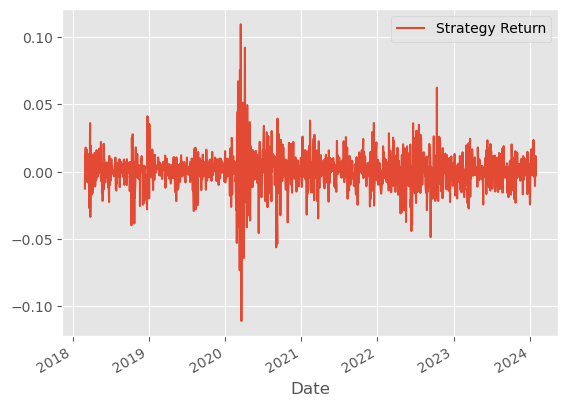

In [128]:
portfolio_df.plot()
# Now we have the return throughout the whole time frame

In [129]:
# Visualize the return of our portfolio and compare it to a benchmark to the S&P 500 index itself

# Download the return for S&P 500 
spy = yf.download(tickers = 'SPY' ,
                 start = '2015-01-01',
                 end = dt.date.today())
spy

[*********************100%%**********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2015-01-02  206.380005  206.880005  204.179993  205.429993  174.806763   
2015-01-05  204.169998  204.369995  201.350006  201.720001  171.649811   
2015-01-06  202.089996  202.720001  198.860001  199.820007  170.033066   
2015-01-07  201.419998  202.720001  200.880005  202.309998  172.151871   
2015-01-08  204.009995  206.160004  203.990005  205.899994  175.206726   
...                ...         ...         ...         ...         ...   
2024-02-20  497.720001  498.410004  494.450012  496.760010  496.760010   
2024-02-21  495.420013  497.369995  493.559998  497.209991  497.209991   
2024-02-22  504.010010  508.489990  503.019989  507.500000  507.500000   
2024-02-23  509.269989  510.130005  507.100006  507.850006  507.850006   
2024-02-26  508.299988  508.750000  505.859985  505.989990  505.989990   

               Volume  
Date                   
2015-01-02  121465900  
2015-01-05  169632600  
2015-01-06  209151400  
2015-01-07  125346700  
2015-01-08  147217800  
...               ...  
2024-02-20   71736700  
2024-02-21   59603800  
2024-02-22   76402500  
2024-02-23   61284200  
2024-02-26   50295100  

[2302 rows x 6 columns]

In [130]:
spy_ret = np.log(spy[['Adj Close']]).diff().dropna().rename({'Adj Close' : 'SPY Buy&Hold'},axis = 1)
spy_ret

SPY Buy&Hold
Date                    
2015-01-05     -0.018225
2015-01-06     -0.009463
2015-01-07      0.012384
2015-01-08      0.017590
2015-01-09     -0.008046
...                  ...
2024-02-20     -0.005521
2024-02-21      0.000905
2024-02-22      0.020484
2024-02-23      0.000689
2024-02-26     -0.003669

[2301 rows x 1 columns]

In [131]:
portfolio_df = portfolio_df.merge(spy_ret,
                                 left_index = True,
                                 right_index = True)
# Now we will do the full decent Inner Join
portfolio_df

Strategy Return  SPY Buy&Hold
Date                                     
2018-03-01        -0.012671     -0.014648
2018-03-02         0.010836      0.005142
2018-03-05         0.017757      0.011492
2018-03-06         0.006995      0.002532
2018-03-07         0.002143     -0.000366
...                     ...           ...
2024-01-24         0.004847      0.001093
2024-01-25         0.004955      0.005424
2024-01-26        -0.010726     -0.001271
2024-01-29         0.011553      0.007888
2024-01-30        -0.002774     -0.000774

[1489 rows x 2 columns]

In [132]:
# Now we will calculate the return for both our strategy and S&P500 and plot them to compare 

plt.style.use('ggplot') 
portfolio_cumulative_return = np.exp(np.log1p(portfolio_df).cumsum())-1

portfolio_cumulative_return

Strategy Return  SPY Buy&Hold
Date                                     
2018-03-01        -0.012671     -0.014648
2018-03-02        -0.001972     -0.009581
2018-03-05         0.015749      0.001800
2018-03-06         0.022854      0.004336
2018-03-07         0.025047      0.003968
...                     ...           ...
2024-01-24         1.272478      0.746339
2024-01-25         1.283739      0.755811
2024-01-26         1.259244      0.753579
2024-01-29         1.285345      0.767412
2024-01-30         1.279006      0.766044

[1489 rows x 2 columns]

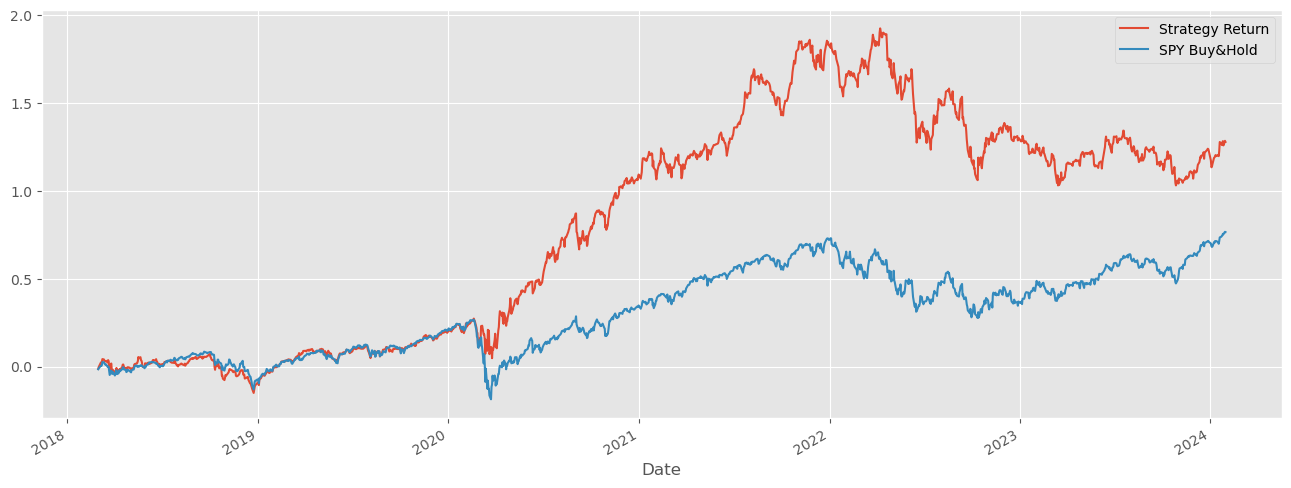

In [133]:
portfolio_cumulative_return[: '2024-02-17'].plot(figsize=(16,6))
plt.show()

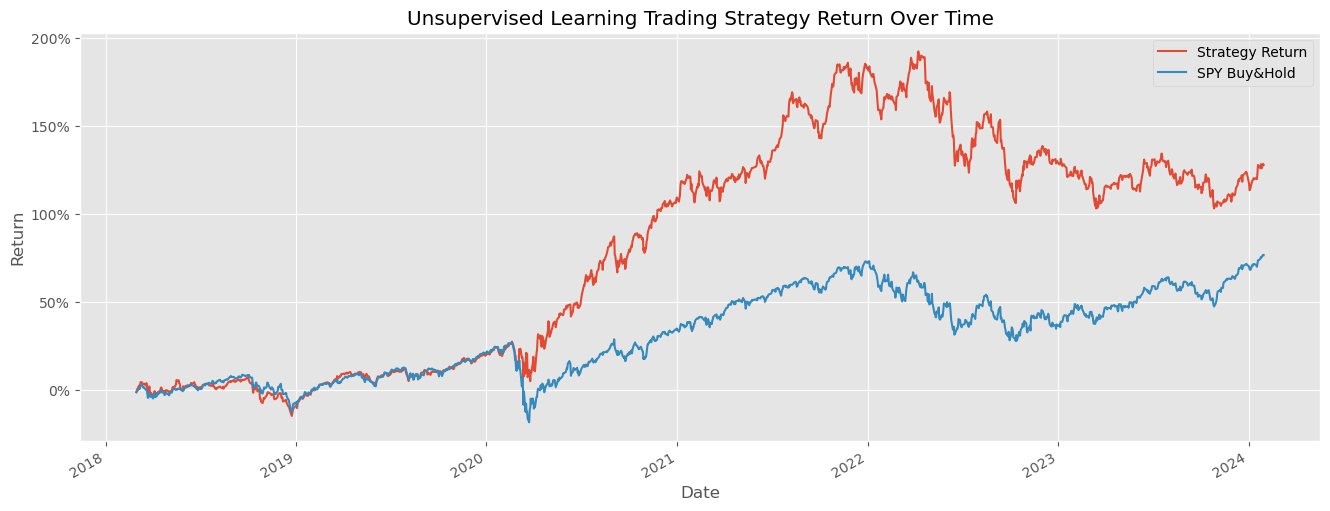

In [134]:
import matplotlib.ticker as mtick

portfolio_cumulative_return[: '2024-02-17'].plot(figsize=(16,6))

plt.title('Unsupervised Learning Trading Strategy Return Over Time')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.ylabel('Return')
plt.show()

In [ ]:
# Now we will Add the Twitter Sentiment Investing Strategy

# Load the twitter sentiment data , set the index and we will calculate the engagement ratio and filter out 
# stocks with no significant twitter activity.

# For this we will focus on Nasdaq 100 stocks and we will load the data for these 100 stocks
# We are Creating a derivative feature from the twitter sentiment data to create potential value for our investments 

In [136]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import datetime as dt 
import yfinance as yf 
import os 
plt.style.use('ggplot')

sentiment_df = pd.read_csv('sentiment_data.csv')

sentiment_df

date symbol  twitterPosts  twitterComments  twitterLikes  \
0      2021-11-18   AAPL         811.0           2592.0       21674.0   
1      2021-11-18    ABT          21.0              3.0          13.0   
2      2021-11-18    AMD         150.0            675.0        2949.0   
3      2021-11-18   AMZN         557.0           1315.0       12969.0   
4      2021-11-18   ATVI          82.0             36.0         131.0   
...           ...    ...           ...              ...           ...   
27230  2023-01-04    TMO          21.0              2.0          32.0   
27231  2023-01-04   TSLA        6767.0         540711.0     3810688.0   
27232  2023-01-04    TSN          35.0            168.0         460.0   
27233  2023-01-04      V         132.0           1008.0        5943.0   
27234  2023-01-04    XOM         212.0            374.0        2071.0   

       twitterImpressions  twitterSentiment  
0               7981808.0               NaN  
1                 64089.0               NaN  
2               1645270.0               NaN  
3               5590695.0               NaN  
4               1310715.0               NaN  
...                   ...               ...  
27230             30857.0          0.610020  
27231          55464921.0          0.543057  
27232             57207.0          0.561900  
27233            139835.0          0.567286  
27234            483389.0          0.588914  

[27235 rows x 7 columns]

In [137]:
# Twitter Sentiment is calculated by methodology used already in the data
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']) 

In [139]:
sentiment_df = sentiment_df.set_index(['date','symbol'])
sentiment_df

twitterPosts  twitterComments  twitterLikes  \
date       symbol                                                
2021-11-18 AAPL           811.0           2592.0       21674.0   
           ABT             21.0              3.0          13.0   
           AMD            150.0            675.0        2949.0   
           AMZN           557.0           1315.0       12969.0   
           ATVI            82.0             36.0         131.0   
...                         ...              ...           ...   
2023-01-04 TMO             21.0              2.0          32.0   
           TSLA          6767.0         540711.0     3810688.0   
           TSN             35.0            168.0         460.0   
           V              132.0           1008.0        5943.0   
           XOM            212.0            374.0        2071.0   

                   twitterImpressions  twitterSentiment  
date       symbol                                        
2021-11-18 AAPL             7981808.0               NaN  
           ABT                64089.0               NaN  
           AMD              1645270.0               NaN  
           AMZN             5590695.0               NaN  
           ATVI             1310715.0               NaN  
...                               ...               ...  
2023-01-04 TMO                30857.0          0.610020  
           TSLA            55464921.0          0.543057  
           TSN                57207.0          0.561900  
           V                 139835.0          0.567286  
           XOM               483389.0          0.588914  

[27235 rows x 5 columns]

In [140]:
# We want the twitter engagement that people have on the posts on twitter as there are lot of bots on twitter 
# which are skewing the data for some symbols

# The engagement ratio will be twitter_Comments/twitter_likes
# If company have a lot of likes and no comments then we know that it's bot activity 
# But if there are lot of comments then we know that people are engaged on that stock

sentiment_df['engagement_ratio'] = sentiment_df['twitterComments']/sentiment_df['twitterLikes']

sentiment_df

twitterPosts  twitterComments  twitterLikes  \
date       symbol                                                
2021-11-18 AAPL           811.0           2592.0       21674.0   
           ABT             21.0              3.0          13.0   
           AMD            150.0            675.0        2949.0   
           AMZN           557.0           1315.0       12969.0   
           ATVI            82.0             36.0         131.0   
...                         ...              ...           ...   
2023-01-04 TMO             21.0              2.0          32.0   
           TSLA          6767.0         540711.0     3810688.0   
           TSN             35.0            168.0         460.0   
           V              132.0           1008.0        5943.0   
           XOM            212.0            374.0        2071.0   

                   twitterImpressions  twitterSentiment  engagement_ratio  
date       symbol                                                          
2021-11-18 AAPL             7981808.0               NaN          0.119590  
           ABT                64089.0               NaN          0.230769  
           AMD              1645270.0               NaN          0.228891  
           AMZN             5590695.0               NaN          0.101396  
           ATVI             1310715.0               NaN          0.274809  
...                               ...               ...               ...  
2023-01-04 TMO                30857.0          0.610020          0.062500  
           TSLA            55464921.0          0.543057          0.141893  
           TSN                57207.0          0.561900          0.365217  
           V                 139835.0          0.567286          0.169611  
           XOM               483389.0          0.588914          0.180589  

[27235 rows x 6 columns]

In [141]:
# we only the want the stocks that have more than 20 likes and 10 comments on that day 
sentiment_df = sentiment_df[(sentiment_df['twitterLikes']>20) & (sentiment_df['twitterComments']>10)]
sentiment_df

twitterPosts  twitterComments  twitterLikes  \
date       symbol                                                
2021-11-18 AAPL           811.0           2592.0       21674.0   
           AMD            150.0            675.0        2949.0   
           AMZN           557.0           1315.0       12969.0   
           ATVI            82.0             36.0         131.0   
           BA              61.0             55.0         342.0   
...                         ...              ...           ...   
2023-01-04 T              184.0           3409.0       14271.0   
           TSLA          6767.0         540711.0     3810688.0   
           TSN             35.0            168.0         460.0   
           V              132.0           1008.0        5943.0   
           XOM            212.0            374.0        2071.0   

                   twitterImpressions  twitterSentiment  engagement_ratio  
date       symbol                                                          
2021-11-18 AAPL             7981808.0               NaN          0.119590  
           AMD              1645270.0               NaN          0.228891  
           AMZN             5590695.0               NaN          0.101396  
           ATVI             1310715.0               NaN          0.274809  
           BA                425847.0               NaN          0.160819  
...                               ...               ...               ...  
2023-01-04 T                 884935.0          0.590457          0.238876  
           TSLA            55464921.0          0.543057          0.141893  
           TSN                57207.0          0.561900          0.365217  
           V                 139835.0          0.567286          0.169611  
           XOM               483389.0          0.588914          0.180589  

[25375 rows x 6 columns]

In [ ]:
# We will create a equal weighted portfolio here
# We will not apply the efficient frontier max sharpe ratio function here

# Every month we would decide an investment portfolio of top 5 stocks and invest on them 

In [143]:
# Aggregate monthly and calculate average sentiment for the month 
# Aggregate on a monthly level and calculate average monthly metric, for the one we choose.


aggregated_df = (sentiment_df.reset_index('symbol').groupby([pd.Grouper(freq='M'),'symbol'])[['engagement_ratio']].mean())
aggregated_df

engagement_ratio
date       symbol                  
2021-11-30 AAL             0.203835
           AAPL            0.256318
           ABBV            0.244677
           ABT             0.313368
           AES             0.864613
...                             ...
2023-01-31 TMO             0.333313
           TSLA            0.151992
           TSN             0.280553
           V               0.194045
           XOM             0.217904

[1109 rows x 1 columns]

In [144]:
# Now we can calculate cross sectionally the rank for each month of all the stocks based on this engagement ratio

aggregated_df['rank'] = (aggregated_df.groupby(level = 0)['engagement_ratio']
                        .transform(lambda x : x.rank(ascending = False)))
aggregated_df
# Stocks with highest engagement ratio would have the highest rank 



engagement_ratio  rank
date       symbol                        
2021-11-30 AAL             0.203835  37.0
           AAPL            0.256318  23.0
           ABBV            0.244677  26.0
           ABT             0.313368  14.0
           AES             0.864613   2.0
...                             ...   ...
2023-01-31 TMO             0.333313  19.0
           TSLA            0.151992  72.0
           TSN             0.280553  30.0
           V               0.194045  60.0
           XOM             0.217904  53.0

[1109 rows x 2 columns]

In [146]:
# Select Top 5 stocks based on their cross-sectional ranking for each month
    # select the top 5 stocks by rank for each month and fix the date to start at beginning of next month
    
aggregated_df[aggregated_df['rank'] < 6]

engagement_ratio  rank
date       symbol                        
2021-11-30 AES             0.864613   2.0
           FCX             0.626323   5.0
           MNST            0.699721   3.0
           OXY             2.147741   1.0
           SLB             0.647374   4.0
...                             ...   ...
2023-01-31 A               0.471572   5.0
           AES             0.533809   4.0
           BIIB            0.839303   1.0
           FCX             0.667387   3.0
           MDT             0.806841   2.0

[75 rows x 2 columns]

In [147]:
filtered_df = aggregated_df[aggregated_df['rank'] < 6]

In [149]:
filtered_df = filtered_df.reset_index(level = 1)
filtered_df.index = filtered_df.index + pd.DateOffset(1) 
filtered_df 

# We will fix the date just we have done in the previously

symbol  engagement_ratio  rank
date                                     
2021-12-01    AES          0.864613   2.0
2021-12-01    FCX          0.626323   5.0
2021-12-01   MNST          0.699721   3.0
2021-12-01    OXY          2.147741   1.0
2021-12-01    SLB          0.647374   4.0
...           ...               ...   ...
2023-02-01      A          0.471572   5.0
2023-02-01    AES          0.533809   4.0
2023-02-01   BIIB          0.839303   1.0
2023-02-01    FCX          0.667387   3.0
2023-02-01    MDT          0.806841   2.0

[75 rows x 3 columns]

In [150]:
# Now we have the beginning of the next month and the stocks we want to invest in for the next month 

filtered_df = filtered_df.reset_index().set_index(['date','symbol'])
filtered_df.head(20)

engagement_ratio  rank
date       symbol                        
2021-12-01 AES             0.864613   2.0
           FCX             0.626323   5.0
           MNST            0.699721   3.0
           OXY             2.147741   1.0
           SLB             0.647374   4.0
2022-01-01 D               0.801994   5.0
           FCX             0.841220   4.0
           L               6.507246   1.0
           LUV             1.303215   2.0
           MA              0.883401   3.0
2022-02-01 AMD             0.715556   4.0
           D               1.136678   1.0
           FCX             0.655237   5.0
           LUV             1.035258   2.0
           MA              0.729063   3.0
2022-03-01 FCX             1.138332   2.0
           GILD            0.530886   5.0
           LUV             1.574377   1.0
           MRO             0.581748   4.0
           OXY             1.025579   3.0

In [151]:
# Extract the stocks to form portfolios with at the start of each new month 
    # Create a dictionary containing start of month and corresponding selected stocks 
    

# We will use the exact same logic as we have used previously 
dates = filtered_df.index.get_level_values('date').unique().tolist()
fixed_dates = {}

for d in dates : 
        fixed_dates[d.strftime('%Y-%m-%d')] = filtered_df.xs(d,level=0).index.tolist() 
        
fixed_dates

{'2021-12-01': ['AES', 'FCX', 'MNST', 'OXY', 'SLB'],
 '2022-01-01': ['D', 'FCX', 'L', 'LUV', 'MA'],
 '2022-02-01': ['AMD', 'D', 'FCX', 'LUV', 'MA'],
 '2022-03-01': ['FCX', 'GILD', 'LUV', 'MRO', 'OXY'],
 '2022-04-01': ['A', 'CRM', 'PFE', 'PM', 'STZ'],
 '2022-05-01': ['AMD', 'CRM', 'CVX', 'J', 'KEY'],
 '2022-06-01': ['AMD', 'DD', 'FCX', 'KEY', 'LMT'],
 '2022-07-01': ['CB', 'CRM', 'DD', 'FCX', 'STZ'],
 '2022-08-01': ['A', 'DD', 'JPM', 'REGN', 'STZ'],
 '2022-09-01': ['ABT', 'DIS', 'L', 'META', 'MRNA'],
 '2022-10-01': ['J', 'KEY', 'L', 'META', 'MU'],
 '2022-11-01': ['A', 'DD', 'FCX', 'J', 'META'],
 '2022-12-01': ['AEP', 'AES', 'DD', 'J', 'STZ'],
 '2023-01-01': ['A', 'AES', 'DAL', 'J', 'KEY'],
 '2023-02-01': ['A', 'AES', 'BIIB', 'FCX', 'MDT']}

In [154]:
# We now have for each month the list of 5 stocks that we are going to invest in 


# Now we will download the fresh stock prices for only selected/shortlisted stocks 


stocks_list = sentiment_df.index.get_level_values('symbol').unique().tolist()
stocks_list.remove('ATVI')
prices_df = yf.download(tickers = stocks_list,
                       start ='2021-01-01',
                       end = '2023-03-01')

[*********************100%%**********************]  84 of 84 completed


In [155]:
# Now we will calculate the portfolio returns with monthly rebalancing 
# We will use the similar logic as we done previously

np.log(prices_df['Adj Close']).diff()

Ticker             A       AAL       AAP      AAPL      ABBV       ABT  \
Date                                                                     
2021-01-04       NaN       NaN       NaN       NaN       NaN       NaN   
2021-01-05  0.008143  0.019634 -0.001081  0.012288  0.010287  0.012297   
2021-01-06  0.027053  0.005816  0.056165 -0.034241 -0.008676 -0.002084   
2021-01-07  0.026261 -0.009062  0.008505  0.033554  0.010646  0.009660   
2021-01-08  0.007108 -0.016388  0.014153  0.008594  0.005234  0.002781   
...              ...       ...       ...       ...       ...       ...   
2023-02-22 -0.009387 -0.008320 -0.003961  0.002892 -0.008788 -0.009305   
2023-02-23  0.007852  0.019727 -0.011273  0.003285  0.009249 -0.001364   
2023-02-24 -0.014065 -0.019727 -0.022503 -0.018169  0.004200 -0.020591   
2023-02-27  0.006917  0.004489  0.012738  0.008214  0.010228 -0.006892   
2023-02-28 -0.001478  0.022146  0.030325 -0.003454 -0.002466  0.019356   

Ticker           AEP       AES       ALB       AMD  ...       RCL      REGN  \
Date                                                ...                       
2021-01-04       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2021-01-05 -0.001350  0.033012  0.065304  0.005079  ...  0.025548  0.001221   
2021-01-06  0.007951  0.039188  0.072036 -0.026654  ... -0.004836 -0.028024   
2021-01-07 -0.027044 -0.010058  0.049579  0.052090  ...  0.024355  0.023359   
2021-01-08 -0.008927  0.027519  0.000544 -0.006114  ... -0.013746  0.035782   
...              ...       ...       ...       ...  ...       ...       ...   
2023-02-22 -0.000330 -0.007064  0.018387 -0.002086  ... -0.003490  0.002088   
2023-02-23 -0.001212  0.000000  0.029584  0.040169  ...  0.002793  0.015361   
2023-02-24 -0.003092 -0.002761 -0.017205 -0.021035  ... -0.021709 -0.003521   
2023-02-27 -0.003989 -0.017530  0.029615  0.008670  ...  0.026301  0.001056   
2023-02-28 -0.023591 -0.008071 -0.010600 -0.002415  ... -0.019625  0.003465   

Ticker           SLB       STZ         T       TMO      TSLA       TSN  \
Date                                                                     
2021-01-04       NaN       NaN       NaN       NaN       NaN       NaN   
2021-01-05  0.052363  0.000692 -0.006133  0.012427  0.007291 -0.000788   
2021-01-06  0.053862  0.031005  0.019293  0.015557  0.027995  0.029658   
2021-01-07  0.019071  0.022759  0.002678  0.030686  0.076448 -0.011541   
2021-01-08 -0.001609  0.005838 -0.006920  0.023642  0.075481 -0.009018   
...              ...       ...       ...       ...       ...       ...   
2023-02-22 -0.018713 -0.004447  0.008811 -0.004312  0.017528  0.016659   
2023-02-23  0.017214  0.015546 -0.001549  0.004639  0.006006  0.009992   
2023-02-24  0.011190 -0.006716 -0.005701 -0.014922 -0.026020 -0.018287   
2023-02-27  0.008863  0.002674 -0.010975 -0.002656  0.053163 -0.013483   
2023-02-28 -0.022118 -0.004416 -0.006326  0.000757 -0.009290 -0.011580   

Ticker             V       XOM  
Date                            
2021-01-04       NaN       NaN  
2021-01-05 -0.015037  0.047068  
2021-01-06 -0.008850  0.025197  
2021-01-07  0.005581  0.007815  
2021-01-08  0.007641  0.011060  
...              ...       ...  
2023-02-22 -0.002723 -0.013038  
2023-02-23  0.005032  0.009162  
2023-02-24 -0.007171  0.000090  
2023-02-27  0.003637 -0.001807  
2023-02-28 -0.001862 -0.005806  

[542 rows x 84 columns]

In [159]:
returns_df = np.log(prices_df['Adj Close']).diff().dropna() 
returns_df

Ticker             A       AAL       AAP      AAPL      ABBV       ABT  \
Date                                                                     
2021-01-05  0.008143  0.019634 -0.001081  0.012288  0.010287  0.012297   
2021-01-06  0.027053  0.005816  0.056165 -0.034241 -0.008676 -0.002084   
2021-01-07  0.026261 -0.009062  0.008505  0.033554  0.010646  0.009660   
2021-01-08  0.007108 -0.016388  0.014153  0.008594  0.005234  0.002781   
2021-01-11  0.008542 -0.008629  0.005629 -0.023524  0.016182 -0.006923   
...              ...       ...       ...       ...       ...       ...   
2023-02-22 -0.009387 -0.008320 -0.003961  0.002892 -0.008788 -0.009305   
2023-02-23  0.007852  0.019727 -0.011273  0.003285  0.009249 -0.001364   
2023-02-24 -0.014065 -0.019727 -0.022503 -0.018169  0.004200 -0.020591   
2023-02-27  0.006917  0.004489  0.012738  0.008214  0.010228 -0.006892   
2023-02-28 -0.001478  0.022146  0.030325 -0.003454 -0.002466  0.019356   

Ticker           AEP       AES       ALB       AMD  ...       RCL      REGN  \
Date                                                ...                       
2021-01-05 -0.001350  0.033012  0.065304  0.005079  ...  0.025548  0.001221   
2021-01-06  0.007951  0.039188  0.072036 -0.026654  ... -0.004836 -0.028024   
2021-01-07 -0.027044 -0.010058  0.049579  0.052090  ...  0.024355  0.023359   
2021-01-08 -0.008927  0.027519  0.000544 -0.006114  ... -0.013746  0.035782   
2021-01-11 -0.005065  0.001572 -0.037692  0.027839  ... -0.011717  0.008366   
...              ...       ...       ...       ...  ...       ...       ...   
2023-02-22 -0.000330 -0.007064  0.018387 -0.002086  ... -0.003490  0.002088   
2023-02-23 -0.001212  0.000000  0.029584  0.040169  ...  0.002793  0.015361   
2023-02-24 -0.003092 -0.002761 -0.017205 -0.021035  ... -0.021709 -0.003521   
2023-02-27 -0.003989 -0.017530  0.029615  0.008670  ...  0.026301  0.001056   
2023-02-28 -0.023591 -0.008071 -0.010600 -0.002415  ... -0.019625  0.003465   

Ticker           SLB       STZ         T       TMO      TSLA       TSN  \
Date                                                                     
2021-01-05  0.052363  0.000692 -0.006133  0.012427  0.007291 -0.000788   
2021-01-06  0.053862  0.031005  0.019293  0.015557  0.027995  0.029658   
2021-01-07  0.019071  0.022759  0.002678  0.030686  0.076448 -0.011541   
2021-01-08 -0.001609  0.005838 -0.006920  0.023642  0.075481 -0.009018   
2021-01-11  0.006020 -0.014571 -0.005182  0.002047 -0.081442  0.011491   
...              ...       ...       ...       ...       ...       ...   
2023-02-22 -0.018713 -0.004447  0.008811 -0.004312  0.017528  0.016659   
2023-02-23  0.017214  0.015546 -0.001549  0.004639  0.006006  0.009992   
2023-02-24  0.011190 -0.006716 -0.005701 -0.014922 -0.026020 -0.018287   
2023-02-27  0.008863  0.002674 -0.010975 -0.002656  0.053163 -0.013483   
2023-02-28 -0.022118 -0.004416 -0.006326  0.000757 -0.009290 -0.011580   

Ticker             V       XOM  
Date                            
2021-01-05 -0.015037  0.047068  
2021-01-06 -0.008850  0.025197  
2021-01-07  0.005581  0.007815  
2021-01-08  0.007641  0.011060  
2021-01-11 -0.011953  0.029905  
...              ...       ...  
2023-02-22 -0.002723 -0.013038  
2023-02-23  0.005032  0.009162  
2023-02-24 -0.007171  0.000090  
2023-02-27  0.003637 -0.001807  
2023-02-28 -0.001862 -0.005806  

[541 rows x 84 columns]

In [165]:
portfolio_df = pd.DataFrame()

for start_date in fixed_dates.keys() : 
        
        end_date = (pd.to_datetime(start_date) + pd.offsets.MonthEnd(0)).strftime('%Y-%m-%d')
        
        cols = fixed_dates[start_date] 
        
        # Now we will calculate the equally weighted portfolio return for our portfolio for everyday
        temp_df = returns_df[start_date : end_date][cols].mean(axis=1).to_frame('portfolio_return')
        
        portfolio_df = pd.concat([portfolio_df,temp_df],axis=0)
    
portfolio_df

portfolio_return
Date                        
2021-12-01         -0.016417
2021-12-02          0.024872
2021-12-03         -0.007711
2021-12-06          0.023925
2021-12-07          0.030547
...                      ...
2023-02-22         -0.007870
2023-02-23         -0.007323
2023-02-24         -0.009463
2023-02-27         -0.001871
2023-02-28          0.001403

[312 rows x 1 columns]

In [ ]:
# Now we will visualize the cumulative result of our strategy 
# We will also compare it with the benchmark like Nasdaq/QQQ prices 


# Again we are using stocks_list which are not survivorship bias free which will skew the results upwards by a little margin
# But we should always try to use survivorship_bias free stock_list

In [166]:
# we will download the nasdaq etf data 
qqq_df = yf.download(tickers = 'QQQ',
                    start = '2021-01-01',
                    end = '2023-03-01')

# QQQ is the symbol for the nasdaq ETF

[*********************100%%**********************]  1 of 1 completed


In [167]:
# We will now calculate the nasdaq returns
qqq_ret = np.log(qqq_df['Adj Close']).diff().to_frame('nasdaq_return')

# Now we will merge them both together (qqq returns to our portfolio_df) 

portfolio_df = portfolio_df.merge(qqq_ret,
                                 left_index = True,
                                 right_index = True)

portfolio_df
# By default the merge operation uses Inner Join

portfolio_return  nasdaq_return
Date                                       
2021-12-01         -0.016417      -0.017159
2021-12-02          0.024872       0.007181
2021-12-03         -0.007711      -0.017542
2021-12-06          0.023925       0.007981
2021-12-07          0.030547       0.029670
...                      ...            ...
2023-02-22         -0.007870       0.000748
2023-02-23         -0.007323       0.008696
2023-02-24         -0.009463      -0.016886
2023-02-27         -0.001871       0.007136
2023-02-28          0.001403      -0.001294

[312 rows x 2 columns]

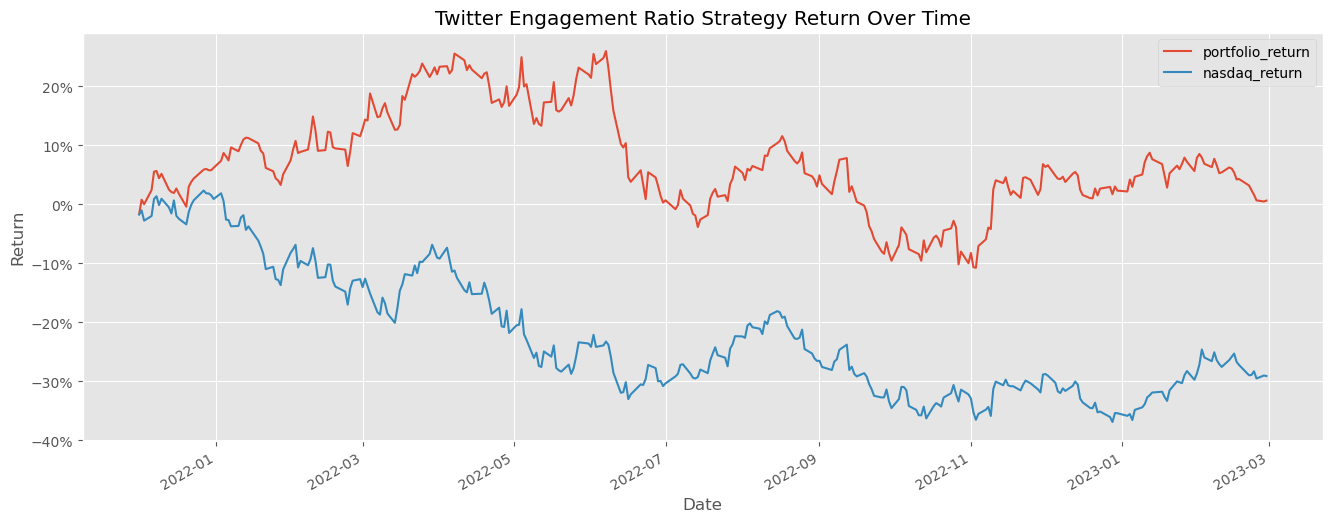

In [169]:
# Now we will visualize 

portfolios_cumulative_return = np.exp(np.log1p(portfolio_df).cumsum()).sub(1)

portfolios_cumulative_return.plot(figsize = (16,6)) 

plt.title('Twitter Engagement Ratio Strategy Return Over Time') 
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.ylabel('Return')
plt.show()

In [ ]:
# We can also see that our strategy will underperform if we have used likes as the basis to select the stocks

[*********************100%%**********************]  84 of 84 completed
[*********************100%%**********************]  1 of 1 completed


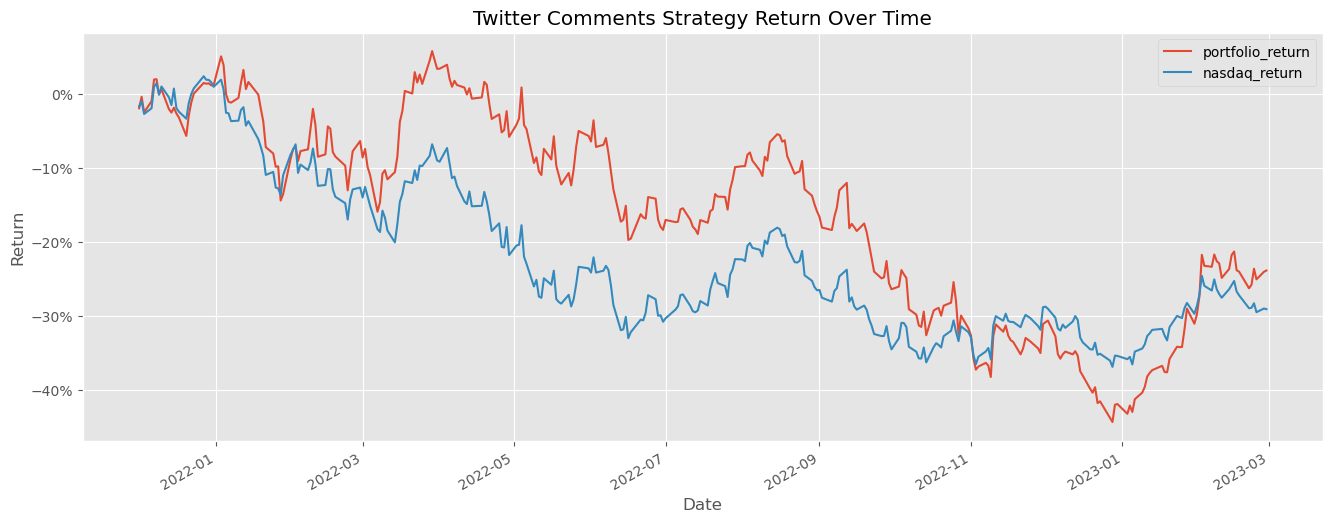

In [174]:
# Here all the code is same as above 
# We have copied it to show the comparison if we have taken only the comments or likes as the deciding factor to 
# select the stocks 

# If we have used Comments

aggregated_df = (sentiment_df.reset_index('symbol').groupby([pd.Grouper(freq='M'),'symbol'])[['twitterComments']].mean())

aggregated_df['rank'] = (aggregated_df.groupby(level = 0)['twitterComments']
                        .transform(lambda x : x.rank(ascending = False)))

filtered_df = aggregated_df[aggregated_df['rank'] < 6]

filtered_df = filtered_df.reset_index(level = 1)
filtered_df.index = filtered_df.index + pd.DateOffset(1) 



filtered_df = filtered_df.reset_index().set_index(['date','symbol'])


dates = filtered_df.index.get_level_values('date').unique().tolist()
fixed_dates = {}

for d in dates : 
        fixed_dates[d.strftime('%Y-%m-%d')] = filtered_df.xs(d,level=0).index.tolist() 
        
stocks_list = sentiment_df.index.get_level_values('symbol').unique().tolist()
stocks_list.remove('ATVI')
prices_df = yf.download(tickers = stocks_list,
                       start ='2021-01-01',
                       end = '2023-03-01')


returns_df = np.log(prices_df['Adj Close']).diff().dropna() 


portfolio_df = pd.DataFrame()

for start_date in fixed_dates.keys() : 
        
        end_date = (pd.to_datetime(start_date) + pd.offsets.MonthEnd(0)).strftime('%Y-%m-%d')
        
        cols = fixed_dates[start_date] 
        
        # Now we will calculate the equally weighted portfolio return for our portfolio for everyday
        temp_df = returns_df[start_date : end_date][cols].mean(axis=1).to_frame('portfolio_return')
        
        portfolio_df = pd.concat([portfolio_df,temp_df],axis=0)
    
qqq_df = yf.download(tickers = 'QQQ',
                    start = '2021-01-01',
                    end = '2023-03-01')

qqq_ret = np.log(qqq_df['Adj Close']).diff().to_frame('nasdaq_return')

portfolio_df = portfolio_df.merge(qqq_ret,
                                 left_index = True,
                                 right_index = True)

portfolios_cumulative_return = np.exp(np.log1p(portfolio_df).cumsum()).sub(1)

portfolios_cumulative_return.plot(figsize = (16,6)) 

plt.title('Twitter Comments Strategy Return Over Time') 
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.ylabel('Return')
plt.show()


In [ ]:
# We can see that the using comments as the deciding factor our portfolio gives almost same return as the nasdaq100

[*********************100%%**********************]  84 of 84 completed
[*********************100%%**********************]  1 of 1 completed


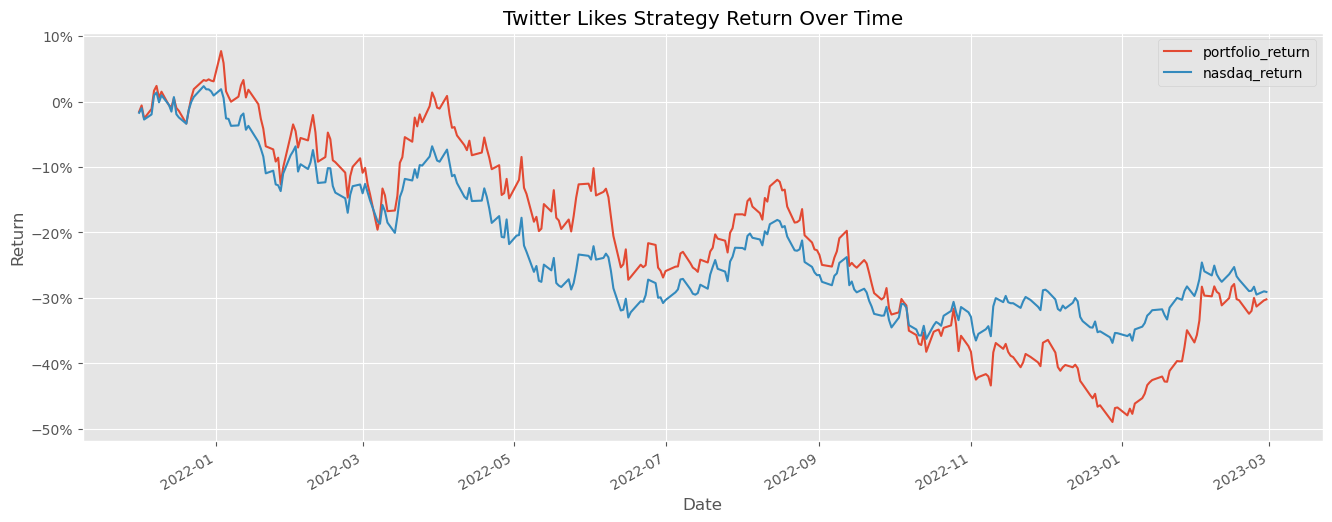

In [175]:
# Here all the code is same as above 
# We have copied it to show the comparison if we have taken only the comments or likes as the deciding factor to 
# select the stocks 

# If we have used Likes

aggregated_df = (sentiment_df.reset_index('symbol').groupby([pd.Grouper(freq='M'),'symbol'])[['twitterLikes']].mean())

aggregated_df['rank'] = (aggregated_df.groupby(level = 0)['twitterLikes']
                        .transform(lambda x : x.rank(ascending = False)))

filtered_df = aggregated_df[aggregated_df['rank'] < 6]

filtered_df = filtered_df.reset_index(level = 1)
filtered_df.index = filtered_df.index + pd.DateOffset(1) 



filtered_df = filtered_df.reset_index().set_index(['date','symbol'])


dates = filtered_df.index.get_level_values('date').unique().tolist()
fixed_dates = {}

for d in dates : 
        fixed_dates[d.strftime('%Y-%m-%d')] = filtered_df.xs(d,level=0).index.tolist() 
        
stocks_list = sentiment_df.index.get_level_values('symbol').unique().tolist()
stocks_list.remove('ATVI')
prices_df = yf.download(tickers = stocks_list,
                       start ='2021-01-01',
                       end = '2023-03-01')


returns_df = np.log(prices_df['Adj Close']).diff().dropna() 


portfolio_df = pd.DataFrame()

for start_date in fixed_dates.keys() : 
        
        end_date = (pd.to_datetime(start_date) + pd.offsets.MonthEnd(0)).strftime('%Y-%m-%d')
        
        cols = fixed_dates[start_date] 
        
        # Now we will calculate the equally weighted portfolio return for our portfolio for everyday
        temp_df = returns_df[start_date : end_date][cols].mean(axis=1).to_frame('portfolio_return')
        
        portfolio_df = pd.concat([portfolio_df,temp_df],axis=0)
    
qqq_df = yf.download(tickers = 'QQQ',
                    start = '2021-01-01',
                    end = '2023-03-01')

qqq_ret = np.log(qqq_df['Adj Close']).diff().to_frame('nasdaq_return')

portfolio_df = portfolio_df.merge(qqq_ret,
                                 left_index = True,
                                 right_index = True)

portfolios_cumulative_return = np.exp(np.log1p(portfolio_df).cumsum()).sub(1)

portfolios_cumulative_return.plot(figsize = (16,6)) 

plt.title('Twitter Likes Strategy Return Over Time') 
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.ylabel('Return')
plt.show()


In [ ]:
# We can see that if we have used likes as the deciding factor than our portfolio will underperform the markets

In [ ]:
# Now We are going to create a intraday strategy on a simulated one asset data using GARCH Model
# GARCH Model is the model which is used to predict the one day ahead volatility

In [ ]:
# Using Simulated daily data and intraday 5-min data 
# Load Daily and 5-minute data 
# Define function to fit GARCH model on the daily data and predict 1-day ahead volatility in a rolling window
# Calculate prediction premium and form a daily signal from it 
# Merge with intraday data and calculate intraday indicators to form the intraday signal 
# Generate the position entry and hold until the end of the day 
# Calculate final strategy returns.

In [ ]:
# Load Simulated Daily and simulated 5 - minute data on a single asset


# we are loading both datasets, set the indexes and calculate daily log returns 
# We are going to create two signals from two different timeframes(on the daily level and on the 5 minute time frame)

# On daily level our signal would be driven by the GARCH Model volatility prediction
# we are going to fit in a rolling window for everyday a GARCH model and predict the volatility for the next day 
# and from that we are going calculate the prediction premium and derive our daily signal out of that 


# On the Intraday level we are going to calculate technical indicators and create a signal following intraday price 
# action pattern and merge with the daily signal and calculate our final signal intraday only for those days where 
# simultaneously we have the intraday and the daily signal

# Whenever we have the intraday signal we are either going into a long or short position and we are going to hold 
# until the end of the day

In [177]:
pip install arch # Used for GARCH MODEL

  Obtaining dependency information for arch from https://files.pythonhosted.org/packages/24/b4/41ffe91f46eb3f49bf022c66f8768f469617329718d4246953ad3853c073/arch-6.3.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/924.1 kB ? eta -:--:--
   - ------------------------------------- 41.0/924.1 kB 960.0 kB/s eta 0:00:01
   ----------- ---------------------------- 276.5/924.1 kB 3.4 MB/s eta 0:00:01
   --------------------------------- ------ 778.2/924.1 kB 6.1 MB/s eta 0:00:01
   ---------------------------------------- 924.1/924.1 kB 5.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [178]:
import matplotlib.pyplot as plt 
from arch import arch_model  # Used for the GARCH MODEL
import pandas as pd
import numpy as np
import os 

daily_df = pd.read_csv('simulated_daily_data.csv')

daily_df

Date         Open         High          Low        Close  \
0     9/17/2014   116.466003   117.043503   113.105499   114.333504   
1     9/18/2014   114.214996   114.214996   103.276001   106.110001   
2     9/19/2014   106.025749   106.958748    96.133003    98.698998   
3     9/20/2014    98.668251   105.823998    97.470749   102.225998   
4     9/21/2014   102.021248   103.106499    98.295250    99.705254   
...         ...          ...          ...          ...          ...   
3284  9/14/2023  6557.069336  6693.655762  6542.862793  6634.918457   
3285  9/15/2023  6633.454590  6710.124512  6560.175293  6652.173340   
3286  9/16/2023  6651.549805  6688.692383  6618.472656  6642.070313   
3287  9/17/2023  6641.981934  6654.499512  6611.268555  6633.546875   
3288  9/18/2023  6633.248535  6853.683594  6603.878906  6688.570313   

        Adj Close        Volume  Unnamed: 7  
0      114.333504  2.105680e+07         NaN  
1      106.110001  3.448320e+07         NaN  
2       98.698998  3.791970e+07         NaN  
3      102.225998  3.686360e+07         NaN  
4       99.705254  2.658010e+07         NaN  
...           ...           ...         ...  
3284  6634.918457  1.381136e+10         NaN  
3285  6652.173340  1.147974e+10         NaN  
3286  6642.070313  7.402031e+09         NaN  
3287  6633.546875  6.774211e+09         NaN  
3288  6688.570313  1.561534e+10         NaN  

[3289 rows x 8 columns]

In [179]:
daily_df['Date'] = pd.to_datetime(daily_df['Date']) 
daily_df = daily_df.set_index('Date') 
daily_df

Open         High          Low        Close    Adj Close  \
Date                                                                          
2014-09-17   116.466003   117.043503   113.105499   114.333504   114.333504   
2014-09-18   114.214996   114.214996   103.276001   106.110001   106.110001   
2014-09-19   106.025749   106.958748    96.133003    98.698998    98.698998   
2014-09-20    98.668251   105.823998    97.470749   102.225998   102.225998   
2014-09-21   102.021248   103.106499    98.295250    99.705254    99.705254   
...                 ...          ...          ...          ...          ...   
2023-09-14  6557.069336  6693.655762  6542.862793  6634.918457  6634.918457   
2023-09-15  6633.454590  6710.124512  6560.175293  6652.173340  6652.173340   
2023-09-16  6651.549805  6688.692383  6618.472656  6642.070313  6642.070313   
2023-09-17  6641.981934  6654.499512  6611.268555  6633.546875  6633.546875   
2023-09-18  6633.248535  6853.683594  6603.878906  6688.570313  6688.570313   

                  Volume  Unnamed: 7  
Date                                  
2014-09-17  2.105680e+07         NaN  
2014-09-18  3.448320e+07         NaN  
2014-09-19  3.791970e+07         NaN  
2014-09-20  3.686360e+07         NaN  
2014-09-21  2.658010e+07         NaN  
...                  ...         ...  
2023-09-14  1.381136e+10         NaN  
2023-09-15  1.147974e+10         NaN  
2023-09-16  7.402031e+09         NaN  
2023-09-17  6.774211e+09         NaN  
2023-09-18  1.561534e+10         NaN  

[3289 rows x 7 columns]

In [180]:
daily_df['log_ret'] = np.log(daily_df['Adj Close']).diff()
daily_df

Open         High          Low        Close    Adj Close  \
Date                                                                          
2014-09-17   116.466003   117.043503   113.105499   114.333504   114.333504   
2014-09-18   114.214996   114.214996   103.276001   106.110001   106.110001   
2014-09-19   106.025749   106.958748    96.133003    98.698998    98.698998   
2014-09-20    98.668251   105.823998    97.470749   102.225998   102.225998   
2014-09-21   102.021248   103.106499    98.295250    99.705254    99.705254   
...                 ...          ...          ...          ...          ...   
2023-09-14  6557.069336  6693.655762  6542.862793  6634.918457  6634.918457   
2023-09-15  6633.454590  6710.124512  6560.175293  6652.173340  6652.173340   
2023-09-16  6651.549805  6688.692383  6618.472656  6642.070313  6642.070313   
2023-09-17  6641.981934  6654.499512  6611.268555  6633.546875  6633.546875   
2023-09-18  6633.248535  6853.683594  6603.878906  6688.570313  6688.570313   

                  Volume  Unnamed: 7   log_ret  
Date                                            
2014-09-17  2.105680e+07         NaN       NaN  
2014-09-18  3.448320e+07         NaN -0.074643  
2014-09-19  3.791970e+07         NaN -0.072402  
2014-09-20  3.686360e+07         NaN  0.035111  
2014-09-21  2.658010e+07         NaN -0.024968  
...                  ...         ...       ...  
2023-09-14  1.381136e+10         NaN  0.011801  
2023-09-15  1.147974e+10         NaN  0.002597  
2023-09-16  7.402031e+09         NaN -0.001520  
2023-09-17  6.774211e+09         NaN -0.001284  
2023-09-18  1.561534e+10         NaN  0.008261  

[3289 rows x 8 columns]

In [183]:
daily_df.drop(daily_df.columns[daily_df.columns.str.contains(
    'Unnamed', case=False)], axis=1, inplace=True)
daily_df

Open         High          Low        Close    Adj Close  \
Date                                                                          
2014-09-17   116.466003   117.043503   113.105499   114.333504   114.333504   
2014-09-18   114.214996   114.214996   103.276001   106.110001   106.110001   
2014-09-19   106.025749   106.958748    96.133003    98.698998    98.698998   
2014-09-20    98.668251   105.823998    97.470749   102.225998   102.225998   
2014-09-21   102.021248   103.106499    98.295250    99.705254    99.705254   
...                 ...          ...          ...          ...          ...   
2023-09-14  6557.069336  6693.655762  6542.862793  6634.918457  6634.918457   
2023-09-15  6633.454590  6710.124512  6560.175293  6652.173340  6652.173340   
2023-09-16  6651.549805  6688.692383  6618.472656  6642.070313  6642.070313   
2023-09-17  6641.981934  6654.499512  6611.268555  6633.546875  6633.546875   
2023-09-18  6633.248535  6853.683594  6603.878906  6688.570313  6688.570313   

                  Volume   log_ret  
Date                                
2014-09-17  2.105680e+07       NaN  
2014-09-18  3.448320e+07 -0.074643  
2014-09-19  3.791970e+07 -0.072402  
2014-09-20  3.686360e+07  0.035111  
2014-09-21  2.658010e+07 -0.024968  
...                  ...       ...  
2023-09-14  1.381136e+10  0.011801  
2023-09-15  1.147974e+10  0.002597  
2023-09-16  7.402031e+09 -0.001520  
2023-09-17  6.774211e+09 -0.001284  
2023-09-18  1.561534e+10  0.008261  

[3289 rows x 7 columns]

In [184]:
intraday_5min_df = pd.read_csv('simulated_5min_data.csv')
intraday_5min_df

datetime        open         low        high       close  \
0       9/29/2021 20:00  10379.7775  10364.5950  10398.7025  10370.9575   
1       9/29/2021 20:05  10370.9425  10352.4175  10380.2500  10371.1450   
2       9/29/2021 20:10  10372.8150  10357.8250  10388.7500  10384.3125   
3       9/29/2021 20:15  10385.8275  10384.0825  10457.2000  10442.5175   
4       9/29/2021 20:20  10442.5225  10426.2375  10448.0000  10440.9950   
...                 ...         ...         ...         ...         ...   
177872  9/20/2023 10:40   6792.1025   6783.6000   6796.2500   6790.1375   
177873  9/20/2023 10:45   6790.5575   6779.1000   6795.7500   6781.9175   
177874  9/20/2023 10:50   6781.5475   6779.3750   6790.2500   6783.9050   
177875  9/20/2023 10:55   6783.9025   6779.9000   6793.2500   6782.0900   
177876  9/20/2023 11:00   6783.7750   6774.3500   6787.5000   6778.6375   

        volume  Unnamed: 6  
0           46         NaN  
1           53         NaN  
2          116         NaN  
3          266         NaN  
4           65         NaN  
...        ...         ...  
177872      41         NaN  
177873      42         NaN  
177874      44         NaN  
177875      95         NaN  
177876      54         NaN  

[177877 rows x 7 columns]

In [185]:
intraday_5min_df['datetime'] = pd.to_datetime(intraday_5min_df['datetime'])

intraday_5min_df = intraday_5min_df.set_index('datetime')

intraday_5min_df

open         low        high       close  volume  \
datetime                                                                      
2021-09-29 20:00:00  10379.7775  10364.5950  10398.7025  10370.9575      46   
2021-09-29 20:05:00  10370.9425  10352.4175  10380.2500  10371.1450      53   
2021-09-29 20:10:00  10372.8150  10357.8250  10388.7500  10384.3125     116   
2021-09-29 20:15:00  10385.8275  10384.0825  10457.2000  10442.5175     266   
2021-09-29 20:20:00  10442.5225  10426.2375  10448.0000  10440.9950      65   
...                         ...         ...         ...         ...     ...   
2023-09-20 10:40:00   6792.1025   6783.6000   6796.2500   6790.1375      41   
2023-09-20 10:45:00   6790.5575   6779.1000   6795.7500   6781.9175      42   
2023-09-20 10:50:00   6781.5475   6779.3750   6790.2500   6783.9050      44   
2023-09-20 10:55:00   6783.9025   6779.9000   6793.2500   6782.0900      95   
2023-09-20 11:00:00   6783.7750   6774.3500   6787.5000   6778.6375      54   

                     Unnamed: 6  
datetime                         
2021-09-29 20:00:00         NaN  
2021-09-29 20:05:00         NaN  
2021-09-29 20:10:00         NaN  
2021-09-29 20:15:00         NaN  
2021-09-29 20:20:00         NaN  
...                         ...  
2023-09-20 10:40:00         NaN  
2023-09-20 10:45:00         NaN  
2023-09-20 10:50:00         NaN  
2023-09-20 10:55:00         NaN  
2023-09-20 11:00:00         NaN  

[177877 rows x 6 columns]

In [190]:
# Now we will calculate the date column

intraday_5min_df['date'] = intraday_5min_df.index.date
intraday_5min_df

open         low        high       close  volume  \
datetime                                                                      
2021-09-29 20:00:00  10379.7775  10364.5950  10398.7025  10370.9575      46   
2021-09-29 20:05:00  10370.9425  10352.4175  10380.2500  10371.1450      53   
2021-09-29 20:10:00  10372.8150  10357.8250  10388.7500  10384.3125     116   
2021-09-29 20:15:00  10385.8275  10384.0825  10457.2000  10442.5175     266   
2021-09-29 20:20:00  10442.5225  10426.2375  10448.0000  10440.9950      65   
...                         ...         ...         ...         ...     ...   
2023-09-20 10:40:00   6792.1025   6783.6000   6796.2500   6790.1375      41   
2023-09-20 10:45:00   6790.5575   6779.1000   6795.7500   6781.9175      42   
2023-09-20 10:50:00   6781.5475   6779.3750   6790.2500   6783.9050      44   
2023-09-20 10:55:00   6783.9025   6779.9000   6793.2500   6782.0900      95   
2023-09-20 11:00:00   6783.7750   6774.3500   6787.5000   6778.6375      54   

                     Unnamed: 6        date  
datetime                                     
2021-09-29 20:00:00         NaN  2021-09-29  
2021-09-29 20:05:00         NaN  2021-09-29  
2021-09-29 20:10:00         NaN  2021-09-29  
2021-09-29 20:15:00         NaN  2021-09-29  
2021-09-29 20:20:00         NaN  2021-09-29  
...                         ...         ...  
2023-09-20 10:40:00         NaN  2023-09-20  
2023-09-20 10:45:00         NaN  2023-09-20  
2023-09-20 10:50:00         NaN  2023-09-20  
2023-09-20 10:55:00         NaN  2023-09-20  
2023-09-20 11:00:00         NaN  2023-09-20  

[177877 rows x 7 columns]

In [191]:
intraday_5min_df.drop(intraday_5min_df.columns[intraday_5min_df.columns.str.contains(
    'Unnamed', case=False)], axis=1, inplace=True)
intraday_5min_df

open         low        high       close  volume  \
datetime                                                                      
2021-09-29 20:00:00  10379.7775  10364.5950  10398.7025  10370.9575      46   
2021-09-29 20:05:00  10370.9425  10352.4175  10380.2500  10371.1450      53   
2021-09-29 20:10:00  10372.8150  10357.8250  10388.7500  10384.3125     116   
2021-09-29 20:15:00  10385.8275  10384.0825  10457.2000  10442.5175     266   
2021-09-29 20:20:00  10442.5225  10426.2375  10448.0000  10440.9950      65   
...                         ...         ...         ...         ...     ...   
2023-09-20 10:40:00   6792.1025   6783.6000   6796.2500   6790.1375      41   
2023-09-20 10:45:00   6790.5575   6779.1000   6795.7500   6781.9175      42   
2023-09-20 10:50:00   6781.5475   6779.3750   6790.2500   6783.9050      44   
2023-09-20 10:55:00   6783.9025   6779.9000   6793.2500   6782.0900      95   
2023-09-20 11:00:00   6783.7750   6774.3500   6787.5000   6778.6375      54   

                           date  
datetime                         
2021-09-29 20:00:00  2021-09-29  
2021-09-29 20:05:00  2021-09-29  
2021-09-29 20:10:00  2021-09-29  
2021-09-29 20:15:00  2021-09-29  
2021-09-29 20:20:00  2021-09-29  
...                         ...  
2023-09-20 10:40:00  2023-09-20  
2023-09-20 10:45:00  2023-09-20  
2023-09-20 10:50:00  2023-09-20  
2023-09-20 10:55:00  2023-09-20  
2023-09-20 11:00:00  2023-09-20  

[177877 rows x 6 columns]

In [192]:
# Define function to fit GARCH model and predict 1 day ahead volatility in a rolling window 

    # We are first calculating the 6 month rolling variance and then we are creating a function in a 
    # 6 month rolling window to fit a garch model and predict the next day variance
    
    # when we fit a GARCH model we need to supply the auto regressive and moving average orders 
    # We need to find those orders 
    
    # For this we have used the brute force approach where I fit 16 models with a combination for the 
    # auto regressive and moving averages orders from [1,2,3,4] and then we have extracted the 
    # mean square error and the basic information criterion and then choose the best model as the one 
    # which is minimizing the basic information criterion
     
    # We find out that best GARCH model on this data is having auto regressive order(p) = 1 and 
    # moving average order(q) = 3 
    # We have found the p & q value brute forcely fitting 16 or 25 models collecting metric mean squared error
    # and basic informatoin criterion after we have run the model and choosing the one which is minimizing
    # the basic information criterion
    
    

In [193]:
daily_df['variance'] = daily_df['log_ret'].rolling(180).var()
daily_df

Open         High          Low        Close    Adj Close  \
Date                                                                          
2014-09-17   116.466003   117.043503   113.105499   114.333504   114.333504   
2014-09-18   114.214996   114.214996   103.276001   106.110001   106.110001   
2014-09-19   106.025749   106.958748    96.133003    98.698998    98.698998   
2014-09-20    98.668251   105.823998    97.470749   102.225998   102.225998   
2014-09-21   102.021248   103.106499    98.295250    99.705254    99.705254   
...                 ...          ...          ...          ...          ...   
2023-09-14  6557.069336  6693.655762  6542.862793  6634.918457  6634.918457   
2023-09-15  6633.454590  6710.124512  6560.175293  6652.173340  6652.173340   
2023-09-16  6651.549805  6688.692383  6618.472656  6642.070313  6642.070313   
2023-09-17  6641.981934  6654.499512  6611.268555  6633.546875  6633.546875   
2023-09-18  6633.248535  6853.683594  6603.878906  6688.570313  6688.570313   

                  Volume   log_ret  variance  
Date                                          
2014-09-17  2.105680e+07       NaN       NaN  
2014-09-18  3.448320e+07 -0.074643       NaN  
2014-09-19  3.791970e+07 -0.072402       NaN  
2014-09-20  3.686360e+07  0.035111       NaN  
2014-09-21  2.658010e+07 -0.024968       NaN  
...                  ...       ...       ...  
2023-09-14  1.381136e+10  0.011801  0.000393  
2023-09-15  1.147974e+10  0.002597  0.000385  
2023-09-16  7.402031e+09 -0.001520  0.000384  
2023-09-17  6.774211e+09 -0.001284  0.000383  
2023-09-18  1.561534e+10  0.008261  0.000378  

[3289 rows x 8 columns]

<Axes: xlabel='Date'>

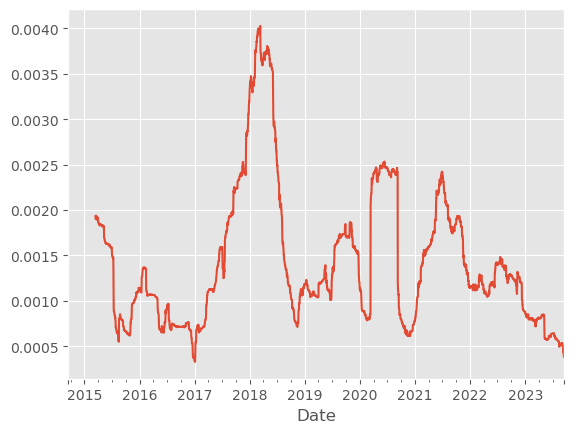

In [194]:
daily_df['variance'].plot()

In [195]:
# We will filter out the dates from 2020 onwards 

daily_df = daily_df['2020-01-01':]
daily_df

Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-01-01  1798.723022  1813.582642  1793.736084  1800.043579  1800.043579   
2020-01-02  1800.637817  1803.038818  1733.817505  1746.367554  1746.367554   
2020-01-03  1746.107178  1853.428833  1728.749023  1836.221069  1836.221069   
2020-01-04  1836.343872  1856.846436  1827.378540  1852.664185  1852.664185   
2020-01-05  1852.612915  1886.124268  1850.133911  1852.829346  1852.829346   
...                 ...          ...          ...          ...          ...   
2023-09-14  6557.069336  6693.655762  6542.862793  6634.918457  6634.918457   
2023-09-15  6633.454590  6710.124512  6560.175293  6652.173340  6652.173340   
2023-09-16  6651.549805  6688.692383  6618.472656  6642.070313  6642.070313   
2023-09-17  6641.981934  6654.499512  6611.268555  6633.546875  6633.546875   
2023-09-18  6633.248535  6853.683594  6603.878906  6688.570313  6688.570313   

                  Volume   log_ret  variance  
Date                                          
2020-01-01  1.856566e+10  0.000914  0.001125  
2020-01-02  2.080208e+10 -0.030273  0.001127  
2020-01-03  2.811148e+10  0.050172  0.001139  
2020-01-04  1.844427e+10  0.008915  0.001110  
2020-01-05  1.972507e+10  0.000089  0.001106  
...                  ...       ...       ...  
2023-09-14  1.381136e+10  0.011801  0.000393  
2023-09-15  1.147974e+10  0.002597  0.000385  
2023-09-16  7.402031e+09 -0.001520  0.000384  
2023-09-17  6.774211e+09 -0.001284  0.000383  
2023-09-18  1.561534e+10  0.008261  0.000378  

[1357 rows x 8 columns]

In [198]:
# volatility is predicting the variance
# When we fit a GARCH Model we can predict the variance or the mean of the series
def predict_volatility(x) : 
    
    best_model = arch_model(y = x,
                           p = 1, 
                           q = 3).fit(update_freq = 5 , disp = 'off') 
    
    variance_forecast = best_model.forecast(horizon = 1).variance.iloc[-1,0]
    
    print(x.index[-1]) 
    
    return variance_forecast

daily_df['predictions'] = daily_df['log_ret'].rolling(180).apply(lambda x : predict_volatility(x))
daily_df

# This will now run in the rolling window and fit the best GARCH model(p = 1 , q = 3)

2020-06-28 00:00:00
2020-06-29 00:00:00
2020-06-30 00:00:00
2020-07-01 00:00:00
2020-07-02 00:00:00
2020-07-03 00:00:00
2020-07-04 00:00:00
2020-07-05 00:00:00
2020-07-06 00:00:00
2020-07-07 00:00:00
2020-07-08 00:00:00
2020-07-09 00:00:00
2020-07-10 00:00:00
2020-07-11 00:00:00
2020-07-12 00:00:00
2020-07-13 00:00:00
2020-07-14 00:00:00
2020-07-15 00:00:00
2020-07-16 00:00:00
2020-07-17 00:00:00
2020-07-18 00:00:00
2020-07-19 00:00:00
2020-07-20 00:00:00
2020-07-21 00:00:00
2020-07-22 00:00:00
2020-07-23 00:00:00
2020-07-24 00:00:00
2020-07-25 00:00:00
2020-07-26 00:00:00
2020-07-27 00:00:00
2020-07-28 00:00:00
2020-07-29 00:00:00
2020-07-30 00:00:00
2020-07-31 00:00:00
2020-08-01 00:00:00
2020-08-02 00:00:00
2020-08-03 00:00:00
2020-08-04 00:00:00
2020-08-05 00:00:00
2020-08-06 00:00:00
2020-08-07 00:00:00
2020-08-08 00:00:00
2020-08-09 00:00:00
2020-08-10 00:00:00
2020-08-11 00:00:00
2020-08-12 00:00:00
2020-08-13 00:00:00
2020-08-14 00:00:00
2020-08-15 00:00:00
2020-08-16 00:00:00


C:\Users\shory\anaconda3\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\shory\anaconda3\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\shory\anaconda3\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


2020-12-21 00:00:00
2020-12-22 00:00:00
2020-12-23 00:00:00
2020-12-24 00:00:00
2020-12-25 00:00:00
2020-12-26 00:00:00
2020-12-27 00:00:00


C:\Users\shory\anaconda3\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\shory\anaconda3\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


2020-12-28 00:00:00
2020-12-29 00:00:00
2020-12-30 00:00:00
2020-12-31 00:00:00
2021-01-01 00:00:00
2021-01-02 00:00:00
2021-01-03 00:00:00
2021-01-04 00:00:00
2021-01-05 00:00:00
2021-01-06 00:00:00
2021-01-07 00:00:00
2021-01-08 00:00:00
2021-01-09 00:00:00
2021-01-10 00:00:00
2021-01-11 00:00:00


C:\Users\shory\anaconda3\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\shory\anaconda3\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


2021-01-12 00:00:00
2021-01-13 00:00:00
2021-01-14 00:00:00
2021-01-15 00:00:00
2021-01-16 00:00:00
2021-01-17 00:00:00
2021-01-18 00:00:00
2021-01-19 00:00:00
2021-01-20 00:00:00
2021-01-21 00:00:00
2021-01-22 00:00:00
2021-01-23 00:00:00
2021-01-24 00:00:00
2021-01-25 00:00:00
2021-01-26 00:00:00
2021-01-27 00:00:00
2021-01-28 00:00:00
2021-01-29 00:00:00
2021-01-30 00:00:00
2021-01-31 00:00:00
2021-02-01 00:00:00
2021-02-02 00:00:00
2021-02-03 00:00:00
2021-02-04 00:00:00
2021-02-05 00:00:00
2021-02-06 00:00:00
2021-02-07 00:00:00
2021-02-08 00:00:00
2021-02-09 00:00:00
2021-02-10 00:00:00
2021-02-11 00:00:00
2021-02-12 00:00:00
2021-02-13 00:00:00
2021-02-14 00:00:00
2021-02-15 00:00:00
2021-02-16 00:00:00
2021-02-17 00:00:00
2021-02-18 00:00:00
2021-02-19 00:00:00
2021-02-20 00:00:00
2021-02-21 00:00:00
2021-02-22 00:00:00
2021-02-23 00:00:00
2021-02-24 00:00:00
2021-02-25 00:00:00
2021-02-26 00:00:00
2021-02-27 00:00:00
2021-02-28 00:00:00
2021-03-01 00:00:00
2021-03-02 00:00:00


C:\Users\shory\anaconda3\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


2021-03-28 00:00:00
2021-03-29 00:00:00
2021-03-30 00:00:00
2021-03-31 00:00:00
2021-04-01 00:00:00
2021-04-02 00:00:00
2021-04-03 00:00:00
2021-04-04 00:00:00
2021-04-05 00:00:00
2021-04-06 00:00:00
2021-04-07 00:00:00
2021-04-08 00:00:00
2021-04-09 00:00:00
2021-04-10 00:00:00
2021-04-11 00:00:00
2021-04-12 00:00:00
2021-04-13 00:00:00
2021-04-14 00:00:00
2021-04-15 00:00:00
2021-04-16 00:00:00
2021-04-17 00:00:00
2021-04-18 00:00:00
2021-04-19 00:00:00
2021-04-20 00:00:00
2021-04-21 00:00:00
2021-04-22 00:00:00
2021-04-23 00:00:00
2021-04-24 00:00:00
2021-04-25 00:00:00
2021-04-26 00:00:00
2021-04-27 00:00:00
2021-04-28 00:00:00
2021-04-29 00:00:00
2021-04-30 00:00:00
2021-05-01 00:00:00
2021-05-02 00:00:00
2021-05-03 00:00:00
2021-05-04 00:00:00
2021-05-05 00:00:00
2021-05-06 00:00:00
2021-05-07 00:00:00
2021-05-08 00:00:00
2021-05-09 00:00:00
2021-05-10 00:00:00
2021-05-11 00:00:00
2021-05-12 00:00:00
2021-05-13 00:00:00
2021-05-14 00:00:00
2021-05-15 00:00:00
2021-05-16 00:00:00


C:\Users\shory\anaconda3\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


2022-04-12 00:00:00
2022-04-13 00:00:00
2022-04-14 00:00:00
2022-04-15 00:00:00
2022-04-16 00:00:00
2022-04-17 00:00:00
2022-04-18 00:00:00
2022-04-19 00:00:00
2022-04-20 00:00:00
2022-04-21 00:00:00
2022-04-22 00:00:00
2022-04-23 00:00:00
2022-04-24 00:00:00
2022-04-25 00:00:00
2022-04-26 00:00:00
2022-04-27 00:00:00
2022-04-28 00:00:00
2022-04-29 00:00:00
2022-04-30 00:00:00
2022-05-01 00:00:00
2022-05-02 00:00:00
2022-05-03 00:00:00
2022-05-04 00:00:00
2022-05-05 00:00:00
2022-05-06 00:00:00
2022-05-07 00:00:00
2022-05-08 00:00:00
2022-05-09 00:00:00
2022-05-10 00:00:00
2022-05-11 00:00:00
2022-05-12 00:00:00
2022-05-13 00:00:00
2022-05-14 00:00:00
2022-05-15 00:00:00
2022-05-16 00:00:00
2022-05-17 00:00:00
2022-05-18 00:00:00
2022-05-19 00:00:00
2022-05-20 00:00:00
2022-05-21 00:00:00
2022-05-22 00:00:00
2022-05-23 00:00:00
2022-05-24 00:00:00
2022-05-25 00:00:00
2022-05-26 00:00:00
2022-05-27 00:00:00
2022-05-28 00:00:00
2022-05-29 00:00:00
2022-05-30 00:00:00
2022-05-31 00:00:00


C:\Users\shory\anaconda3\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


2022-06-24 00:00:00
2022-06-25 00:00:00
2022-06-26 00:00:00
2022-06-27 00:00:00
2022-06-28 00:00:00
2022-06-29 00:00:00
2022-06-30 00:00:00
2022-07-01 00:00:00
2022-07-02 00:00:00
2022-07-03 00:00:00
2022-07-04 00:00:00
2022-07-05 00:00:00
2022-07-06 00:00:00
2022-07-07 00:00:00
2022-07-08 00:00:00
2022-07-09 00:00:00
2022-07-10 00:00:00
2022-07-11 00:00:00
2022-07-12 00:00:00
2022-07-13 00:00:00
2022-07-14 00:00:00
2022-07-15 00:00:00
2022-07-16 00:00:00
2022-07-17 00:00:00
2022-07-18 00:00:00
2022-07-19 00:00:00
2022-07-20 00:00:00
2022-07-21 00:00:00
2022-07-22 00:00:00
2022-07-23 00:00:00
2022-07-24 00:00:00
2022-07-25 00:00:00
2022-07-26 00:00:00
2022-07-27 00:00:00
2022-07-28 00:00:00
2022-07-29 00:00:00
2022-07-30 00:00:00
2022-07-31 00:00:00
2022-08-01 00:00:00
2022-08-02 00:00:00
2022-08-03 00:00:00
2022-08-04 00:00:00
2022-08-05 00:00:00
2022-08-06 00:00:00
2022-08-07 00:00:00
2022-08-08 00:00:00
2022-08-09 00:00:00
2022-08-10 00:00:00
2022-08-11 00:00:00
2022-08-12 00:00:00


2023-08-14 00:00:00
2023-08-15 00:00:00
2023-08-16 00:00:00
2023-08-17 00:00:00
2023-08-18 00:00:00
2023-08-19 00:00:00
2023-08-20 00:00:00
2023-08-21 00:00:00
2023-08-22 00:00:00
2023-08-23 00:00:00
2023-08-24 00:00:00
2023-08-25 00:00:00
2023-08-26 00:00:00
2023-08-27 00:00:00
2023-08-28 00:00:00
2023-08-29 00:00:00
2023-08-30 00:00:00
2023-08-31 00:00:00
2023-09-01 00:00:00
2023-09-02 00:00:00
2023-09-03 00:00:00
2023-09-04 00:00:00
2023-09-05 00:00:00
2023-09-06 00:00:00
2023-09-07 00:00:00
2023-09-08 00:00:00
2023-09-09 00:00:00
2023-09-10 00:00:00
2023-09-11 00:00:00
2023-09-12 00:00:00
2023-09-13 00:00:00
2023-09-14 00:00:00
2023-09-15 00:00:00
2023-09-16 00:00:00
2023-09-17 00:00:00
2023-09-18 00:00:00


Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-01-01  1798.723022  1813.582642  1793.736084  1800.043579  1800.043579   
2020-01-02  1800.637817  1803.038818  1733.817505  1746.367554  1746.367554   
2020-01-03  1746.107178  1853.428833  1728.749023  1836.221069  1836.221069   
2020-01-04  1836.343872  1856.846436  1827.378540  1852.664185  1852.664185   
2020-01-05  1852.612915  1886.124268  1850.133911  1852.829346  1852.829346   
...                 ...          ...          ...          ...          ...   
2023-09-14  6557.069336  6693.655762  6542.862793  6634.918457  6634.918457   
2023-09-15  6633.454590  6710.124512  6560.175293  6652.173340  6652.173340   
2023-09-16  6651.549805  6688.692383  6618.472656  6642.070313  6642.070313   
2023-09-17  6641.981934  6654.499512  6611.268555  6633.546875  6633.546875   
2023-09-18  6633.248535  6853.683594  6603.878906  6688.570313  6688.570313   

                  Volume   log_ret  variance  predictions  
Date                                                       
2020-01-01  1.856566e+10  0.000914  0.001125          NaN  
2020-01-02  2.080208e+10 -0.030273  0.001127          NaN  
2020-01-03  2.811148e+10  0.050172  0.001139          NaN  
2020-01-04  1.844427e+10  0.008915  0.001110          NaN  
2020-01-05  1.972507e+10  0.000089  0.001106          NaN  
...                  ...       ...       ...          ...  
2023-09-14  1.381136e+10  0.011801  0.000393     0.000334  
2023-09-15  1.147974e+10  0.002597  0.000385     0.000292  
2023-09-16  7.402031e+09 -0.001520  0.000384     0.000286  
2023-09-17  6.774211e+09 -0.001284  0.000383     0.000280  
2023-09-18  1.561534e+10  0.008261  0.000378     0.000298  

[1357 rows x 9 columns]

In [199]:
daily_df

Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-01-01  1798.723022  1813.582642  1793.736084  1800.043579  1800.043579   
2020-01-02  1800.637817  1803.038818  1733.817505  1746.367554  1746.367554   
2020-01-03  1746.107178  1853.428833  1728.749023  1836.221069  1836.221069   
2020-01-04  1836.343872  1856.846436  1827.378540  1852.664185  1852.664185   
2020-01-05  1852.612915  1886.124268  1850.133911  1852.829346  1852.829346   
...                 ...          ...          ...          ...          ...   
2023-09-14  6557.069336  6693.655762  6542.862793  6634.918457  6634.918457   
2023-09-15  6633.454590  6710.124512  6560.175293  6652.173340  6652.173340   
2023-09-16  6651.549805  6688.692383  6618.472656  6642.070313  6642.070313   
2023-09-17  6641.981934  6654.499512  6611.268555  6633.546875  6633.546875   
2023-09-18  6633.248535  6853.683594  6603.878906  6688.570313  6688.570313   

                  Volume   log_ret  variance  predictions  
Date                                                       
2020-01-01  1.856566e+10  0.000914  0.001125          NaN  
2020-01-02  2.080208e+10 -0.030273  0.001127          NaN  
2020-01-03  2.811148e+10  0.050172  0.001139          NaN  
2020-01-04  1.844427e+10  0.008915  0.001110          NaN  
2020-01-05  1.972507e+10  0.000089  0.001106          NaN  
...                  ...       ...       ...          ...  
2023-09-14  1.381136e+10  0.011801  0.000393     0.000334  
2023-09-15  1.147974e+10  0.002597  0.000385     0.000292  
2023-09-16  7.402031e+09 -0.001520  0.000384     0.000286  
2023-09-17  6.774211e+09 -0.001284  0.000383     0.000280  
2023-09-18  1.561534e+10  0.008261  0.000378     0.000298  

[1357 rows x 9 columns]

<Axes: xlabel='Date'>

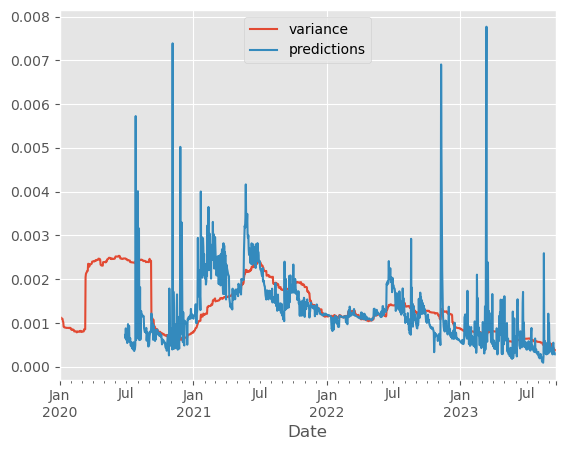

In [201]:
daily_df[['variance','predictions']].plot()
# We can see here that the variance is more stable than the predictions 
# We can handle the predictions by applying the rolling average or karman filter model on the predictions 
# They would smooth them out 

In [ ]:
# Now we will calculate the prediction premium and form a daily signal from it
# we are calculating the prediction premium and calculate its 6months rolling standard deviation
# From this we are creating our daily signal
# 

In [203]:
daily_df['prediction_premium'] = (daily_df['predictions']-daily_df['variance'])/daily_df['variance']

# We will calculate the premium standard deviation which will be the rolling 6 months standard deviation

daily_df['premium_std'] = daily_df['prediction_premium'].rolling(180).std()
daily_df

Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-01-01  1798.723022  1813.582642  1793.736084  1800.043579  1800.043579   
2020-01-02  1800.637817  1803.038818  1733.817505  1746.367554  1746.367554   
2020-01-03  1746.107178  1853.428833  1728.749023  1836.221069  1836.221069   
2020-01-04  1836.343872  1856.846436  1827.378540  1852.664185  1852.664185   
2020-01-05  1852.612915  1886.124268  1850.133911  1852.829346  1852.829346   
...                 ...          ...          ...          ...          ...   
2023-09-14  6557.069336  6693.655762  6542.862793  6634.918457  6634.918457   
2023-09-15  6633.454590  6710.124512  6560.175293  6652.173340  6652.173340   
2023-09-16  6651.549805  6688.692383  6618.472656  6642.070313  6642.070313   
2023-09-17  6641.981934  6654.499512  6611.268555  6633.546875  6633.546875   
2023-09-18  6633.248535  6853.683594  6603.878906  6688.570313  6688.570313   

                  Volume   log_ret  variance  predictions  prediction_premium  \
Date                                                                            
2020-01-01  1.856566e+10  0.000914  0.001125          NaN                 NaN   
2020-01-02  2.080208e+10 -0.030273  0.001127          NaN                 NaN   
2020-01-03  2.811148e+10  0.050172  0.001139          NaN                 NaN   
2020-01-04  1.844427e+10  0.008915  0.001110          NaN                 NaN   
2020-01-05  1.972507e+10  0.000089  0.001106          NaN                 NaN   
...                  ...       ...       ...          ...                 ...   
2023-09-14  1.381136e+10  0.011801  0.000393     0.000334           -0.151792   
2023-09-15  1.147974e+10  0.002597  0.000385     0.000292           -0.240812   
2023-09-16  7.402031e+09 -0.001520  0.000384     0.000286           -0.256793   
2023-09-17  6.774211e+09 -0.001284  0.000383     0.000280           -0.268903   
2023-09-18  1.561534e+10  0.008261  0.000378     0.000298           -0.211600   

            premium_std  
Date                     
2020-01-01          NaN  
2020-01-02          NaN  
2020-01-03          NaN  
2020-01-04          NaN  
2020-01-05          NaN  
...                 ...  
2023-09-14     0.549423  
2023-09-15     0.546772  
2023-09-16     0.545787  
2023-09-17     0.545664  
2023-09-18     0.544848  

[1357 rows x 11 columns]

<Axes: xlabel='Date'>

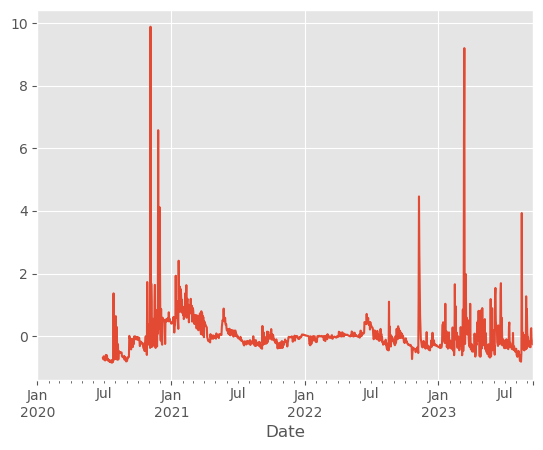

In [204]:
daily_df['prediction_premium'].plot()

<Axes: xlabel='Date'>

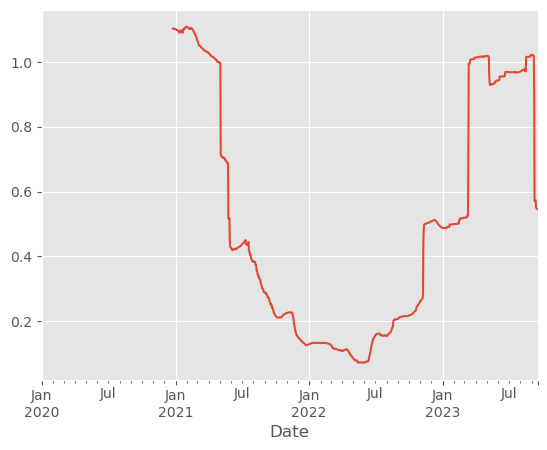

In [207]:
# Also we have the standard deviation of this prediction premium
daily_df['premium_std'].plot()

In [208]:
# From now we can create the daily signal 

daily_df['signal_daily'] = daily_df.apply(lambda x : 1 if (x['prediction_premium']>x['premium_std']*1.5)
                                         else (-1 if (x['prediction_premium'] < x['premium_std']*-1.5) else np.nan),
                                         axis = 1)

daily_df

Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-01-01  1798.723022  1813.582642  1793.736084  1800.043579  1800.043579   
2020-01-02  1800.637817  1803.038818  1733.817505  1746.367554  1746.367554   
2020-01-03  1746.107178  1853.428833  1728.749023  1836.221069  1836.221069   
2020-01-04  1836.343872  1856.846436  1827.378540  1852.664185  1852.664185   
2020-01-05  1852.612915  1886.124268  1850.133911  1852.829346  1852.829346   
...                 ...          ...          ...          ...          ...   
2023-09-14  6557.069336  6693.655762  6542.862793  6634.918457  6634.918457   
2023-09-15  6633.454590  6710.124512  6560.175293  6652.173340  6652.173340   
2023-09-16  6651.549805  6688.692383  6618.472656  6642.070313  6642.070313   
2023-09-17  6641.981934  6654.499512  6611.268555  6633.546875  6633.546875   
2023-09-18  6633.248535  6853.683594  6603.878906  6688.570313  6688.570313   

                  Volume   log_ret  variance  predictions  prediction_premium  \
Date                                                                            
2020-01-01  1.856566e+10  0.000914  0.001125          NaN                 NaN   
2020-01-02  2.080208e+10 -0.030273  0.001127          NaN                 NaN   
2020-01-03  2.811148e+10  0.050172  0.001139          NaN                 NaN   
2020-01-04  1.844427e+10  0.008915  0.001110          NaN                 NaN   
2020-01-05  1.972507e+10  0.000089  0.001106          NaN                 NaN   
...                  ...       ...       ...          ...                 ...   
2023-09-14  1.381136e+10  0.011801  0.000393     0.000334           -0.151792   
2023-09-15  1.147974e+10  0.002597  0.000385     0.000292           -0.240812   
2023-09-16  7.402031e+09 -0.001520  0.000384     0.000286           -0.256793   
2023-09-17  6.774211e+09 -0.001284  0.000383     0.000280           -0.268903   
2023-09-18  1.561534e+10  0.008261  0.000378     0.000298           -0.211600   

            premium_std  signal_daily  
Date                                   
2020-01-01          NaN           NaN  
2020-01-02          NaN           NaN  
2020-01-03          NaN           NaN  
2020-01-04          NaN           NaN  
2020-01-05          NaN           NaN  
...                 ...           ...  
2023-09-14     0.549423           NaN  
2023-09-15     0.546772           NaN  
2023-09-16     0.545787           NaN  
2023-09-17     0.545664           NaN  
2023-09-18     0.544848           NaN  

[1357 rows x 12 columns]

In [209]:
daily_df[daily_df['signal_daily'] == 1]

Open         High          Low        Close    Adj Close  \
Date                                                                          
2021-01-13  8478.780273  9399.990234  8146.166992  9329.089844  9329.089844   
2021-01-21  8887.349609  8888.169922  7562.687500  7706.424805  7706.424805   
2022-05-09  8515.003906  8555.518555  7574.238281  7574.238281  7574.238281   
2022-05-10  7568.413574  8149.077148  7486.200684  7755.726563  7755.726563   
2022-05-11  7754.045898  8003.350586  7042.603516  7234.088867  7234.088867   
2022-05-17  7465.602051  7673.622559  7392.575684  7606.464355  7606.464355   
2022-06-02  7448.722656  7651.183594  7413.176270  7616.872070  7616.872070   
2022-06-03  7616.951660  7658.258789  7343.922363  7426.097656  7426.097656   
2022-06-04  7426.534668  7482.641113  7375.001465  7458.228516  7458.228516   
2022-06-13  6684.394531  6698.897461  5535.314453  5621.847168  5621.847168   
2022-06-14  5621.996582  5754.737793  5237.704590  5551.698242  5551.698242   
2022-06-15  5549.182617  5660.667969  5044.594238  5643.209961  5643.209961   
2022-06-16  5644.076172  5717.230469  5066.306641  5095.412598  5095.412598   
2022-06-17  5096.429688  5310.828125  5081.629883  5117.870605  5117.870605   
2022-06-18  5118.356445  5184.010254  4427.155762  4754.410645  4754.410645   
2022-06-19  4752.725586  5170.955566  4516.788086  5138.317871  5138.317871   
2022-06-20  5138.342773  5228.330566  4922.292480  5149.884277  5149.884277   
2022-06-21  5148.573730  5405.157227  5103.765625  5177.649414  5177.649414   
2022-06-22  5179.853516  5208.937500  4962.019531  4996.757324  4996.757324   
2022-06-23  4996.651855  5283.940430  4987.529297  5271.469238  5271.469238   
2022-06-24  5271.162109  5368.229492  5194.377930  5307.914063  5307.914063   
2022-06-25  5308.402344  5380.228516  5241.146484  5375.584473  5375.584473   
2022-06-26  5374.123535  5445.931152  5254.067383  5256.823730  5256.823730   
2022-06-27  5257.059570  5369.522461  5155.049805  5183.869629  5183.869629   
2022-06-29  5070.292480  5091.039063  4984.447754  5026.005859  5026.005859   
2022-06-30  5027.078125  5035.290039  4682.414063  4946.181641  4946.181641   
2022-07-01  4955.117676  5158.167969  4768.427246  4817.341797  4817.341797   
2022-07-02  4818.708984  4842.937012  4756.770508  4810.563965  4810.563965   
2022-07-03  4810.523926  4889.567383  4741.737793  4824.269043  4824.269043   
2022-07-04  4824.328613  5064.687012  4765.766602  5057.815430  5057.815430   
2022-07-05  5056.338379  5158.866699  4835.308105  5047.528809  5047.528809   
2022-08-19  5803.328125  5803.328125  5217.211914  5219.388184  5219.388184   
2022-08-21  5290.098145  5417.211426  5275.799316  5383.530273  5383.530273   
2022-11-08  5150.167969  5166.151855  4400.886230  4635.317871  4635.317871   
2022-11-09  4635.940430  4647.614746  3920.673096  3970.195068  3970.195068   
2022-11-10  3970.789551  4513.578125  3958.504639  4396.692871  4396.692871   
2022-11-11  4395.812988  4412.735840  4135.870605  4258.573242  4258.573242   
2023-01-20  5271.343262  5673.089355  5229.781738  5669.138184  5669.138184   
2023-02-15  5555.146484  6076.960449  5520.692383  6076.960449  6076.960449   
2023-02-17  5905.320801  6231.010254  5865.188965  6141.400391  6141.400391   
2023-03-09  5430.020020  5450.679199  5052.576660  5090.755371  5090.755371   
2023-03-12  5157.007324  5546.257813  5112.201660  5540.987305  5540.987305   
2023-03-13  5539.101563  6137.709473  5479.549805  6049.383301  6049.383301   
2023-03-17  6263.780762  6946.953125  6238.792480  6855.982422  6855.982422   
2023-06-06  6433.027344  6828.455078  6358.716797  6809.695801  6809.695801   
2023-06-21  7077.827637  7684.332520  7070.852539  7506.824219  7506.824219   
2023-08-17  7174.950684  7186.486816  6352.277832  6666.137695  6666.137695   

                  Volume   log_ret  variance  predictions  prediction_premium  \
Date                                                              

In [210]:
daily_df[daily_df['signal_daily'] == -1]

Open          High           Low         Close  \
Date                                                                 
2021-10-18  15387.201170  15653.665040  15003.189450  15506.519530   
2021-10-19  15510.791020  16108.633790  15405.733400  16065.498050   
2021-10-21  16500.558590  16650.136720  15529.352540  15552.542970   
2021-10-22  15559.472660  15928.755860  15030.699220  15173.066410   
2021-10-23  15173.657230  15435.969730  14956.630860  15348.404300   
2021-10-24  15342.085940  15376.451170  14910.835940  15232.708980   
2021-10-27  15088.000000  15358.795900  14552.046880  14620.596680   
2021-10-29  15156.217770  15731.902340  15082.491210  15556.991210   
2021-11-01  15330.112300  15604.750980  14923.795900  15251.101560   
2022-01-14  10649.717770  10836.671880  10495.654300  10774.924800   
2022-01-15  10775.474610  10931.167970  10667.258790  10794.349610   
2022-01-16  10793.009770  10859.202150  10672.755860  10778.469730   
2022-01-19  10593.509770  10619.576170  10310.728520  10436.082030   
2022-08-03   5745.325684   5894.662598   5686.958984   5711.626953   
2022-08-06   5822.855957   5831.640625   5740.319824   5740.319824   
2022-08-11   5987.086426   6205.657227   5975.249023   5989.382324   
2022-08-13   6100.546875   6215.012695   6086.528809   6106.017090   
2022-08-14   6107.264160   6243.728516   6051.564941   6079.833496   
2022-08-15   6079.579102   6283.897461   5959.943848   6034.243164   
2022-08-16   6031.534180   6057.104004   5933.375000   5970.822754   
2022-08-17   5970.329102   6101.764648   5810.838379   5833.999512   
2022-08-18   5835.259766   5890.958008   5794.400391   5803.184570   
2022-08-24   5381.613770   5445.769043   5298.751465   5348.754883   
2022-10-20   4784.521484   4828.799805   4742.864746   4763.435059   
2022-10-21   4763.300781   4809.346191   4692.742676   4793.117188   
2022-10-22   4793.095215   4812.017090   4783.061035   4802.047363   
2022-10-24   4891.942383   4897.281250   4801.581055   4836.393066   
2022-10-25   4836.241211   5087.103027   4815.361816   5023.964355   
2022-10-26   5023.059082   5234.533691   5019.029297   5192.610352   
2022-10-27   5193.200684   5213.511230   5063.843262   5071.458984   
2022-10-28   5071.989258   5181.245117   5021.517090   5148.837891   
2022-10-29   5148.775879   5247.098633   5141.621094   5204.619141   
2022-10-30   5204.495605   5229.251465   5136.865723   5158.900879   
2022-10-31   5158.423828   5198.830078   5071.864746   5123.943359   
2022-11-01   5123.724609   5161.822266   5089.961426   5121.318359   
2022-11-02   5120.739746   5185.702637   5021.783691   5039.875977   
2022-11-03   5040.672363   5095.523926   5021.560059   5052.497070   
2022-11-05   5286.208008   5361.721680   5274.408691   5320.672852   
2022-11-06   5321.264160   5336.344238   5230.047852   5231.621582   
2022-11-07   5231.155273   5263.311523   5122.493164   5150.704102   

               Adj Close        Volume   log_ret  variance  predictions  \
Date                                                                      
2021-10-18  15506.519530  3.805556e+10  0.007646  0.001914     0.001183   
2021-10-19  16065.498050  4.047120e+10  0.035413  0.001911     0.001161   
2021-10-21  15552.542970  4.590812e+10 -0.059028  0.001931     0.001227   
2021-10-22  15173.066410  3.843408e+10 -0.024702  0.001932     0.001211   
2021-10-23  15348.404300  2.688255e+10  0.011490  0.001881     0.001186   
2021-10-24  15232.708980  2.731618e+10 -0.007566  0.001880     0.001166   
2021-10-27  14620.596680  4.365708e+10 -0.031664  0.001868     0.001192   
2021-10-29  15556.991210  3.685688e+10  0.026144  0.001876     0.001189   
2021-11-01  15251.101560  3.615057e+10 -0.005143  0.001818     0.001138   
2022-01-14  10774.924800  2.357740e+10  0.011860  0.001164     0.000859   
2022-01-15  10794.349610  1.837135e+10  0.001801  0.001158     0.000909   
2022-01-16  10778.469730  1.790210e+10 -0.001472  0.001151     0.000816   
2022-01-19  10436.082030  2.3

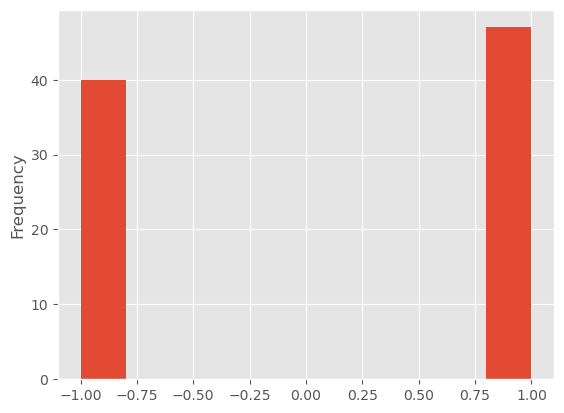

In [212]:
daily_df['signal_daily'].plot(kind = 'hist')
plt.show()

# We can see that we have around 40 short signals and around 50 long signals

In [ ]:
# Now we will merge it with intraday data and calculate intraday indicators to form the intraday signal
# Calculate all the intraday indicators and intraday signal.
# we will merge both of them based on the date column
# But we need to shift the daily data 1 head because at the end of the 29th we have the daily data but we will 
# be using it on 30th



In [214]:
daily_df['signal_daily'] = daily_df['signal_daily'].shift()
daily_df

Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-01-01  1798.723022  1813.582642  1793.736084  1800.043579  1800.043579   
2020-01-02  1800.637817  1803.038818  1733.817505  1746.367554  1746.367554   
2020-01-03  1746.107178  1853.428833  1728.749023  1836.221069  1836.221069   
2020-01-04  1836.343872  1856.846436  1827.378540  1852.664185  1852.664185   
2020-01-05  1852.612915  1886.124268  1850.133911  1852.829346  1852.829346   
...                 ...          ...          ...          ...          ...   
2023-09-14  6557.069336  6693.655762  6542.862793  6634.918457  6634.918457   
2023-09-15  6633.454590  6710.124512  6560.175293  6652.173340  6652.173340   
2023-09-16  6651.549805  6688.692383  6618.472656  6642.070313  6642.070313   
2023-09-17  6641.981934  6654.499512  6611.268555  6633.546875  6633.546875   
2023-09-18  6633.248535  6853.683594  6603.878906  6688.570313  6688.570313   

                  Volume   log_ret  variance  predictions  prediction_premium  \
Date                                                                            
2020-01-01  1.856566e+10  0.000914  0.001125          NaN                 NaN   
2020-01-02  2.080208e+10 -0.030273  0.001127          NaN                 NaN   
2020-01-03  2.811148e+10  0.050172  0.001139          NaN                 NaN   
2020-01-04  1.844427e+10  0.008915  0.001110          NaN                 NaN   
2020-01-05  1.972507e+10  0.000089  0.001106          NaN                 NaN   
...                  ...       ...       ...          ...                 ...   
2023-09-14  1.381136e+10  0.011801  0.000393     0.000334           -0.151792   
2023-09-15  1.147974e+10  0.002597  0.000385     0.000292           -0.240812   
2023-09-16  7.402031e+09 -0.001520  0.000384     0.000286           -0.256793   
2023-09-17  6.774211e+09 -0.001284  0.000383     0.000280           -0.268903   
2023-09-18  1.561534e+10  0.008261  0.000378     0.000298           -0.211600   

            premium_std  signal_daily  
Date                                   
2020-01-01          NaN           NaN  
2020-01-02          NaN           NaN  
2020-01-03          NaN           NaN  
2020-01-04          NaN           NaN  
2020-01-05          NaN           NaN  
...                 ...           ...  
2023-09-14     0.549423           NaN  
2023-09-15     0.546772           NaN  
2023-09-16     0.545787           NaN  
2023-09-17     0.545664           NaN  
2023-09-18     0.544848           NaN  

[1357 rows x 12 columns]

In [219]:
intraday_5min_df.reset_index()

datetime        open         low        high       close  \
0      2021-09-29 20:00:00  10379.7775  10364.5950  10398.7025  10370.9575   
1      2021-09-29 20:05:00  10370.9425  10352.4175  10380.2500  10371.1450   
2      2021-09-29 20:10:00  10372.8150  10357.8250  10388.7500  10384.3125   
3      2021-09-29 20:15:00  10385.8275  10384.0825  10457.2000  10442.5175   
4      2021-09-29 20:20:00  10442.5225  10426.2375  10448.0000  10440.9950   
...                    ...         ...         ...         ...         ...   
177872 2023-09-20 10:40:00   6792.1025   6783.6000   6796.2500   6790.1375   
177873 2023-09-20 10:45:00   6790.5575   6779.1000   6795.7500   6781.9175   
177874 2023-09-20 10:50:00   6781.5475   6779.3750   6790.2500   6783.9050   
177875 2023-09-20 10:55:00   6783.9025   6779.9000   6793.2500   6782.0900   
177876 2023-09-20 11:00:00   6783.7750   6774.3500   6787.5000   6778.6375   

        volume        date  
0           46  2021-09-29  
1           53  2021-09-29  
2          116  2021-09-29  
3          266  2021-09-29  
4           65  2021-09-29  
...        ...         ...  
177872      41  2023-09-20  
177873      42  2023-09-20  
177874      44  2023-09-20  
177875      95  2023-09-20  
177876      54  2023-09-20  

[177877 rows x 7 columns]

In [226]:
obj = daily_df[['signal_daily']]
obj 

signal_daily
Date                    
2020-01-01           NaN
2020-01-02           NaN
2020-01-03           NaN
2020-01-04           NaN
2020-01-05           NaN
...                  ...
2023-09-14           NaN
2023-09-15           NaN
2023-09-16           NaN
2023-09-17           NaN
2023-09-18           NaN

[1357 rows x 1 columns]

In [232]:
obj = pd.DataFrame(obj)
print(type(obj))
print(type(intraday_5min_df))
print(type(daily_df[['signal_daily']]))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [236]:
obj2 = pd.DataFrame(intraday_5min_df.reset_index())
obj2

datetime        open         low        high       close  \
0      2021-09-29 20:00:00  10379.7775  10364.5950  10398.7025  10370.9575   
1      2021-09-29 20:05:00  10370.9425  10352.4175  10380.2500  10371.1450   
2      2021-09-29 20:10:00  10372.8150  10357.8250  10388.7500  10384.3125   
3      2021-09-29 20:15:00  10385.8275  10384.0825  10457.2000  10442.5175   
4      2021-09-29 20:20:00  10442.5225  10426.2375  10448.0000  10440.9950   
...                    ...         ...         ...         ...         ...   
177872 2023-09-20 10:40:00   6792.1025   6783.6000   6796.2500   6790.1375   
177873 2023-09-20 10:45:00   6790.5575   6779.1000   6795.7500   6781.9175   
177874 2023-09-20 10:50:00   6781.5475   6779.3750   6790.2500   6783.9050   
177875 2023-09-20 10:55:00   6783.9025   6779.9000   6793.2500   6782.0900   
177876 2023-09-20 11:00:00   6783.7750   6774.3500   6787.5000   6778.6375   

        volume        date  
0           46  2021-09-29  
1           53  2021-09-29  
2          116  2021-09-29  
3          266  2021-09-29  
4           65  2021-09-29  
...        ...         ...  
177872      41  2023-09-20  
177873      42  2023-09-20  
177874      44  2023-09-20  
177875      95  2023-09-20  
177876      54  2023-09-20  

[177877 rows x 7 columns]

In [290]:
intraday_5min_df['date'] = pd.to_datetime(intraday_5min_df['date'])

In [291]:
final_df = intraday_5min_df.reset_index()\
                            .merge(daily_df[['signal_daily']].reset_index(),
                                   left_on='date',
                                   right_on='Date')
final_df

datetime        open         low        high       close  \
0      2021-09-29 20:00:00  10379.7775  10364.5950  10398.7025  10370.9575   
1      2021-09-29 20:05:00  10370.9425  10352.4175  10380.2500  10371.1450   
2      2021-09-29 20:10:00  10372.8150  10357.8250  10388.7500  10384.3125   
3      2021-09-29 20:15:00  10385.8275  10384.0825  10457.2000  10442.5175   
4      2021-09-29 20:20:00  10442.5225  10426.2375  10448.0000  10440.9950   
...                    ...         ...         ...         ...         ...   
177451 2023-09-18 23:35:00   6708.0025   6705.5175   6712.0000   6708.8675   
177452 2023-09-18 23:40:00   6708.8650   6707.1800   6714.2500   6709.3350   
177453 2023-09-18 23:45:00   6709.9250   6704.3600   6713.5000   6708.2750   
177454 2023-09-18 23:50:00   6708.2750   6705.7700   6712.7500   6705.8050   
177455 2023-09-18 23:55:00   6705.8025   6705.3875   6712.0000   6706.8875   

        volume       date       Date  signal_daily  
0           46 2021-09-29 2021-09-29           NaN  
1           53 2021-09-29 2021-09-29           NaN  
2          116 2021-09-29 2021-09-29           NaN  
3          266 2021-09-29 2021-09-29           NaN  
4           65 2021-09-29 2021-09-29           NaN  
...        ...        ...        ...           ...  
177451      11 2023-09-18 2023-09-18           NaN  
177452      22 2023-09-18 2023-09-18           NaN  
177453      25 2023-09-18 2023-09-18           NaN  
177454      11 2023-09-18 2023-09-18           NaN  
177455       6 2023-09-18 2023-09-18           NaN  

[177456 rows x 9 columns]

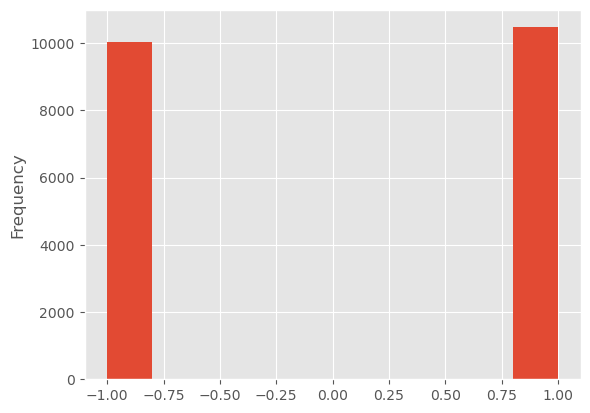

In [292]:
final_df['signal_daily'].plot(kind = 'hist')
plt.show()

In [293]:
final_df = final_df.drop(['date','Date'],axis = 1)
final_df

datetime        open         low        high       close  \
0      2021-09-29 20:00:00  10379.7775  10364.5950  10398.7025  10370.9575   
1      2021-09-29 20:05:00  10370.9425  10352.4175  10380.2500  10371.1450   
2      2021-09-29 20:10:00  10372.8150  10357.8250  10388.7500  10384.3125   
3      2021-09-29 20:15:00  10385.8275  10384.0825  10457.2000  10442.5175   
4      2021-09-29 20:20:00  10442.5225  10426.2375  10448.0000  10440.9950   
...                    ...         ...         ...         ...         ...   
177451 2023-09-18 23:35:00   6708.0025   6705.5175   6712.0000   6708.8675   
177452 2023-09-18 23:40:00   6708.8650   6707.1800   6714.2500   6709.3350   
177453 2023-09-18 23:45:00   6709.9250   6704.3600   6713.5000   6708.2750   
177454 2023-09-18 23:50:00   6708.2750   6705.7700   6712.7500   6705.8050   
177455 2023-09-18 23:55:00   6705.8025   6705.3875   6712.0000   6706.8875   

        volume  signal_daily  
0           46           NaN  
1           53           NaN  
2          116           NaN  
3          266           NaN  
4           65           NaN  
...        ...           ...  
177451      11           NaN  
177452      22           NaN  
177453      25           NaN  
177454      11           NaN  
177455       6           NaN  

[177456 rows x 7 columns]

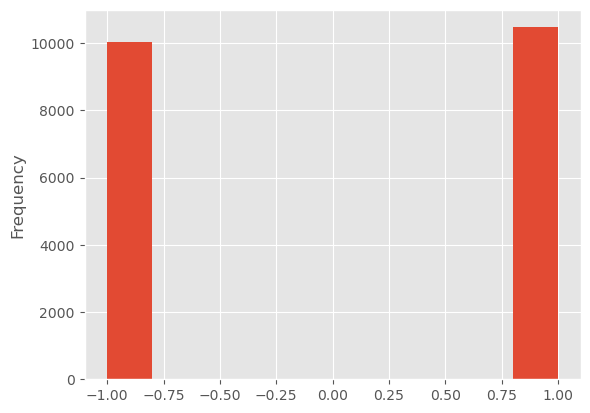

In [294]:
final_df['signal_daily'].plot(kind = 'hist')
plt.show()

In [295]:
# We will now calculate all the technical indicators that we can potentially use 
import pandas_ta

In [297]:
# RSI
final_df['rsi'] = pandas_ta.rsi(close = final_df['close'],
                               length =20)

# Bollinger Bands

# lower band
final_df['lband'] = pandas_ta.bbands(close = final_df['close'],
                                    length = 20).iloc[:,0]
# Upper band
final_df['uband'] = pandas_ta.bbands(close = final_df['close'],
                                    length = 20).iloc[:,2]

# we can also add lags of the lower and upper bands 

final_df 


datetime        open         low        high       close  \
0      2021-09-29 20:00:00  10379.7775  10364.5950  10398.7025  10370.9575   
1      2021-09-29 20:05:00  10370.9425  10352.4175  10380.2500  10371.1450   
2      2021-09-29 20:10:00  10372.8150  10357.8250  10388.7500  10384.3125   
3      2021-09-29 20:15:00  10385.8275  10384.0825  10457.2000  10442.5175   
4      2021-09-29 20:20:00  10442.5225  10426.2375  10448.0000  10440.9950   
...                    ...         ...         ...         ...         ...   
177451 2023-09-18 23:35:00   6708.0025   6705.5175   6712.0000   6708.8675   
177452 2023-09-18 23:40:00   6708.8650   6707.1800   6714.2500   6709.3350   
177453 2023-09-18 23:45:00   6709.9250   6704.3600   6713.5000   6708.2750   
177454 2023-09-18 23:50:00   6708.2750   6705.7700   6712.7500   6705.8050   
177455 2023-09-18 23:55:00   6705.8025   6705.3875   6712.0000   6706.8875   

        volume  signal_daily        rsi        lband        uband  
0           46           NaN        NaN          NaN          NaN  
1           53           NaN        NaN          NaN          NaN  
2          116           NaN        NaN          NaN          NaN  
3          266           NaN        NaN          NaN          NaN  
4           65           NaN        NaN          NaN          NaN  
...        ...           ...        ...          ...          ...  
177451      11           NaN  62.861699  6677.365065  6715.855435  
177452      22           NaN  63.165869  6679.544207  6716.559793  
177453      25           NaN  61.954798  6682.379916  6716.534084  
177454      11           NaN  59.172065  6685.549735  6715.801265  
177455       6           NaN  60.000874  6687.480314  6715.772186  

[177456 rows x 10 columns]

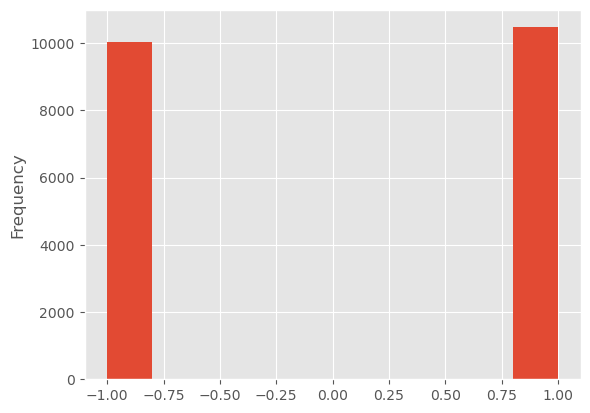

In [298]:
final_df['signal_daily'].plot(kind = 'hist')
plt.show()

In [299]:
# now we will calculate the intraday signal 

# we will have a intraday signal whenever the RSI is above 70 and the close price closes above the upper bollinger band 
# That will be our buy signal

# This price action pattern is a pure momentum patter
final_df['signal_intraday'] = final_df.apply(lambda x : 1 if (x['rsi'] > 70) & 
                                             (x['close'] > x['uband'])
                                             else (-1 if (x['rsi'] < 30) & 
                                                         (x['close'] < x['lband']) else np.nan),
                                              axis = 1)
final_df

datetime        open         low        high       close  \
0      2021-09-29 20:00:00  10379.7775  10364.5950  10398.7025  10370.9575   
1      2021-09-29 20:05:00  10370.9425  10352.4175  10380.2500  10371.1450   
2      2021-09-29 20:10:00  10372.8150  10357.8250  10388.7500  10384.3125   
3      2021-09-29 20:15:00  10385.8275  10384.0825  10457.2000  10442.5175   
4      2021-09-29 20:20:00  10442.5225  10426.2375  10448.0000  10440.9950   
...                    ...         ...         ...         ...         ...   
177451 2023-09-18 23:35:00   6708.0025   6705.5175   6712.0000   6708.8675   
177452 2023-09-18 23:40:00   6708.8650   6707.1800   6714.2500   6709.3350   
177453 2023-09-18 23:45:00   6709.9250   6704.3600   6713.5000   6708.2750   
177454 2023-09-18 23:50:00   6708.2750   6705.7700   6712.7500   6705.8050   
177455 2023-09-18 23:55:00   6705.8025   6705.3875   6712.0000   6706.8875   

        volume  signal_daily        rsi        lband        uband  \
0           46           NaN        NaN          NaN          NaN   
1           53           NaN        NaN          NaN          NaN   
2          116           NaN        NaN          NaN          NaN   
3          266           NaN        NaN          NaN          NaN   
4           65           NaN        NaN          NaN          NaN   
...        ...           ...        ...          ...          ...   
177451      11           NaN  62.861699  6677.365065  6715.855435   
177452      22           NaN  63.165869  6679.544207  6716.559793   
177453      25           NaN  61.954798  6682.379916  6716.534084   
177454      11           NaN  59.172065  6685.549735  6715.801265   
177455       6           NaN  60.000874  6687.480314  6715.772186   

        signal_intraday  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  
...                 ...  
177451              NaN  
177452              NaN  
177453              NaN  
177454              NaN  
177455              NaN  

[177456 rows x 11 columns]

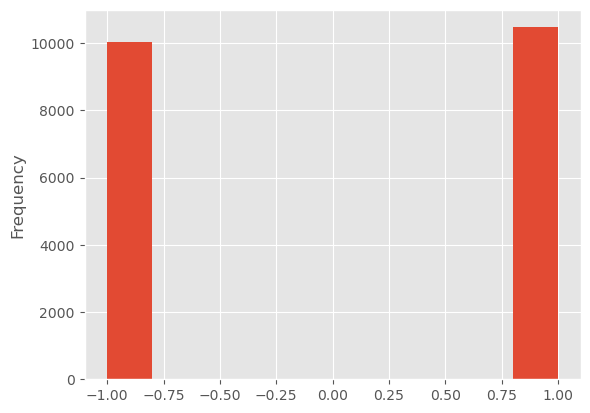

In [300]:
final_df['signal_daily'].plot(kind = 'hist')
plt.show()

In [301]:
# Now we are ready with our intraday signal and our daily signal 
# We now move on to generate our entry points and our final signal
# The final signal that we are going to use to calculate our daily returns from


# Now we will generate the position entry and hold until the end of the day

final_df['return_sign'] = final_df.apply(lambda x : 1 if (x['signal_daily'] == 1) & (x['signal_intraday'] == 1)
                                        else (-1 if (x['signal_daily']==-1)&(x['signal_intraday'] ==-1) else np.nan),
                                             axis = 1)
final_df

datetime        open         low        high       close  \
0      2021-09-29 20:00:00  10379.7775  10364.5950  10398.7025  10370.9575   
1      2021-09-29 20:05:00  10370.9425  10352.4175  10380.2500  10371.1450   
2      2021-09-29 20:10:00  10372.8150  10357.8250  10388.7500  10384.3125   
3      2021-09-29 20:15:00  10385.8275  10384.0825  10457.2000  10442.5175   
4      2021-09-29 20:20:00  10442.5225  10426.2375  10448.0000  10440.9950   
...                    ...         ...         ...         ...         ...   
177451 2023-09-18 23:35:00   6708.0025   6705.5175   6712.0000   6708.8675   
177452 2023-09-18 23:40:00   6708.8650   6707.1800   6714.2500   6709.3350   
177453 2023-09-18 23:45:00   6709.9250   6704.3600   6713.5000   6708.2750   
177454 2023-09-18 23:50:00   6708.2750   6705.7700   6712.7500   6705.8050   
177455 2023-09-18 23:55:00   6705.8025   6705.3875   6712.0000   6706.8875   

        volume  signal_daily        rsi        lband        uband  \
0           46           NaN        NaN          NaN          NaN   
1           53           NaN        NaN          NaN          NaN   
2          116           NaN        NaN          NaN          NaN   
3          266           NaN        NaN          NaN          NaN   
4           65           NaN        NaN          NaN          NaN   
...        ...           ...        ...          ...          ...   
177451      11           NaN  62.861699  6677.365065  6715.855435   
177452      22           NaN  63.165869  6679.544207  6716.559793   
177453      25           NaN  61.954798  6682.379916  6716.534084   
177454      11           NaN  59.172065  6685.549735  6715.801265   
177455       6           NaN  60.000874  6687.480314  6715.772186   

        signal_intraday  return_sign  
0                   NaN          NaN  
1                   NaN          NaN  
2                   NaN          NaN  
3                   NaN          NaN  
4                   NaN          NaN  
...                 ...          ...  
177451              NaN          NaN  
177452              NaN          NaN  
177453              NaN          NaN  
177454              NaN          NaN  
177455              NaN          NaN  

[177456 rows x 12 columns]

In [ ]:
# Now we have intraday signal for each position

# So , whenever in a given day , we have a signal -> so we will going in to take the position and we 
# will hold for the whole day

# We can have multiple signals on a single day but we will only focus on 1 signal for each day 
# So we will only take positions based on the first signal of each day and we will ignore the rest of the 
# signals for all coming days



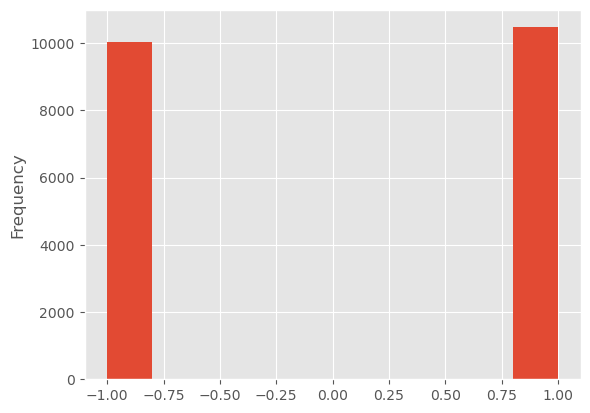

In [302]:
final_df['signal_daily'].plot(kind = 'hist')
plt.show()

In [304]:
final_df[final_df['return_sign']==1]

datetime        open         low       high       close  \
5141   2021-10-20 16:25:00  16453.7750  16422.2775  16490.250  16422.2775   
5206   2021-10-20 21:50:00  16308.4050  16237.5000  16318.675  16255.2650   
5207   2021-10-20 21:55:00  16255.0425  16159.2825  16282.250  16246.7350   
5208   2021-10-20 22:00:00  16246.7350  16011.7250  16295.500  16118.1400   
5322   2021-10-21 07:30:00  16494.9625  13875.0000  16495.550  16058.0000   
...                    ...         ...         ...        ...         ...   
100047 2022-11-09 04:15:00   4467.4000   4450.0000   4482.500   4450.0000   
100058 2022-11-09 05:10:00   4405.9500   4340.7500   4419.750   4356.5000   
100059 2022-11-09 05:15:00   4346.1000   4320.2000   4381.000   4325.7500   
100159 2022-11-09 13:35:00   4170.5000   4130.3250   4192.250   4141.5000   
100160 2022-11-09 13:40:00   4130.4000   4109.1000   4161.750   4131.2500   

        volume  signal_daily        rsi         lband         uband  \
5141       183          -1.0  28.612648  16446.656872  16726.321628   
5206       340          -1.0  25.844043  16288.575674  16496.577807   
5207       564          -1.0  25.220144  16263.826209  16501.461522   
5208       870          -1.0  18.234580  16203.703409  16530.324822   
5322      1609          -1.0  28.923185  16253.837544  16665.483206   
...        ...           ...        ...           ...           ...   
100047      68          -1.0  28.407681   4471.310230   4588.999770   
100058     396          -1.0  26.711526   4377.709392   4576.433108   
100059     498          -1.0  24.293077   4350.507016   4583.710484   
100159     304          -1.0  29.811904   4149.350363   4310.867137   
100160     306          -1.0  28.833841   4134.718125   4310.474375   

        signal_intraday  return_sign  
5141               -1.0         -1.0  
5206               -1.0         -1.0  
5207               -1.0         -1.0  
5208               -1.0         -1.0  
5322               -1.0         -1.0  
...                 ...          ...  
100047             -1.0         -1.0  
100058             -1.0         -1.0  
100059             -1.0         -1.0  
100159             -1.0         -1.0  
100160             -1.0         -1.0  

[112 rows x 12 columns]

In [317]:
final_df

open         low        high       close  volume  \
datetime                                                                      
2021-09-29 20:00:00  10379.7775  10364.5950  10398.7025  10370.9575      46   
2021-09-29 20:05:00  10370.9425  10352.4175  10380.2500  10371.1450      53   
2021-09-29 20:10:00  10372.8150  10357.8250  10388.7500  10384.3125     116   
2021-09-29 20:15:00  10385.8275  10384.0825  10457.2000  10442.5175     266   
2021-09-29 20:20:00  10442.5225  10426.2375  10448.0000  10440.9950      65   
...                         ...         ...         ...         ...     ...   
2023-09-18 23:35:00   6708.0025   6705.5175   6712.0000   6708.8675      11   
2023-09-18 23:40:00   6708.8650   6707.1800   6714.2500   6709.3350      22   
2023-09-18 23:45:00   6709.9250   6704.3600   6713.5000   6708.2750      25   
2023-09-18 23:50:00   6708.2750   6705.7700   6712.7500   6705.8050      11   
2023-09-18 23:55:00   6705.8025   6705.3875   6712.0000   6706.8875       6   

                     signal_daily        rsi        lband        uband  \
datetime                                                                 
2021-09-29 20:00:00           NaN        NaN          NaN          NaN   
2021-09-29 20:05:00           NaN        NaN          NaN          NaN   
2021-09-29 20:10:00           NaN        NaN          NaN          NaN   
2021-09-29 20:15:00           NaN        NaN          NaN          NaN   
2021-09-29 20:20:00           NaN        NaN          NaN          NaN   
...                           ...        ...          ...          ...   
2023-09-18 23:35:00           NaN  62.861699  6677.365065  6715.855435   
2023-09-18 23:40:00           NaN  63.165869  6679.544207  6716.559793   
2023-09-18 23:45:00           NaN  61.954798  6682.379916  6716.534084   
2023-09-18 23:50:00           NaN  59.172065  6685.549735  6715.801265   
2023-09-18 23:55:00           NaN  60.000874  6687.480314  6715.772186   

                     signal_intraday  return_sign  
datetime                                           
2021-09-29 20:00:00              NaN          NaN  
2021-09-29 20:05:00              NaN          NaN  
2021-09-29 20:10:00              NaN          NaN  
2021-09-29 20:15:00              NaN          NaN  
2021-09-29 20:20:00              NaN          NaN  
...                              ...          ...  
2023-09-18 23:35:00              NaN          NaN  
2023-09-18 23:40:00              NaN          NaN  
2023-09-18 23:45:00              NaN          NaN  
2023-09-18 23:50:00              NaN          NaN  
2023-09-18 23:55:00              NaN          NaN  

[177456 rows x 11 columns]

In [319]:
# on end of the day we close the trade

# Calculate the strategy returns 

final_df['datetime'] = pd.to_datetime(final_df['datetime'])
final_df.set_index('datetime',inplace=True)
final_df['return_sign'] = final_df.groupby(pd.Grouper(freq='D'))['return_sign']\
                          .transform(lambda x : x.ffill())

 

In [320]:
final_df[final_df['return_sign'] == 1]

open        low         high        close  volume  \
datetime                                                                      
2022-05-12 23:20:00  7591.9200  7563.4800  7678.255025  7676.500000     227   
2022-05-12 23:25:00  7632.4450  7596.3475  7680.000000  7605.607500     257   
2022-05-12 23:30:00  7606.1250  7576.0775  7681.500000  7582.682500     287   
2022-05-12 23:35:00  7582.2175  7578.9300  7662.000000  7582.742500     214   
2022-05-12 23:40:00  7582.7400  7582.1075  7666.750000  7652.684651     212   
...                        ...        ...          ...          ...     ...   
2023-08-19 19:35:00  6525.1500  6524.6375  6533.750000  6527.760000      13   
2023-08-19 19:40:00  6527.7575  6525.2050  6533.500000  6527.372500       6   
2023-08-19 19:45:00  6527.3700  6522.9025  6530.500000  6523.030000      11   
2023-08-19 19:50:00  6523.0300  6520.7750  6528.250000  6521.170000      10   
2023-08-19 19:55:00  6521.1625  6520.7750  6528.750000  6524.105000       9   

                     signal_daily        rsi        lband        uband  \
datetime                                                                 
2022-05-12 23:20:00           1.0  71.362656  7259.617267  7660.805233   
2022-05-12 23:25:00           1.0  64.069354  7276.593917  7673.057833   
2022-05-12 23:30:00           1.0  61.915396  7293.743028  7680.260222   
2022-05-12 23:35:00           1.0  61.918923  7310.696033  7686.015717   
2022-05-12 23:40:00           1.0  65.804842  7330.798695  7697.662270   
...                           ...        ...          ...          ...   
2023-08-19 19:35:00           1.0  56.935426  6510.993082  6527.759168   
2023-08-19 19:40:00           1.0  56.503015  6511.629153  6528.592347   
2023-08-19 19:45:00           1.0  51.857140  6512.275217  6528.746783   
2023-08-19 19:50:00           1.0  50.003416  6512.388753  6528.826747   
2023-08-19 19:55:00           1.0  52.805611  6512.421840  6529.140410   

                     signal_intraday  return_sign  
datetime                                           
2022-05-12 23:20:00              1.0          1.0  
2022-05-12 23:25:00              NaN          1.0  
2022-05-12 23:30:00              NaN          1.0  
2022-05-12 23:35:00              NaN          1.0  
2022-05-12 23:40:00              NaN          1.0  
...                              ...          ...  
2023-08-19 19:35:00              NaN          1.0  
2023-08-19 19:40:00              NaN          1.0  
2023-08-19 19:45:00              NaN          1.0  
2023-08-19 19:50:00              NaN          1.0  
2023-08-19 19:55:00              NaN          1.0  

[2674 rows x 11 columns]

In [ ]:
# Now we can now calculate the 5 minute returns and shift them backwards with 1 row for everyday 
# and multiply the return_sign column by signal_intraday

In [321]:
final_df['return'] = final_df['close'].pct_change()
final_df['forward_return'] = final_df['return'].shift(-1) 
final_df['strategy_return'] = final_df['forward_return']*final_df['return_sign']

# this strategy return would be on the 5 minute level, we want to get the daily strategy returns 

daily_return_df = final_df.groupby(pd.Grouper(freq='D'))[['strategy_return']].sum()

In [322]:
# Now we will calculate the final strategy returns and visualize it 

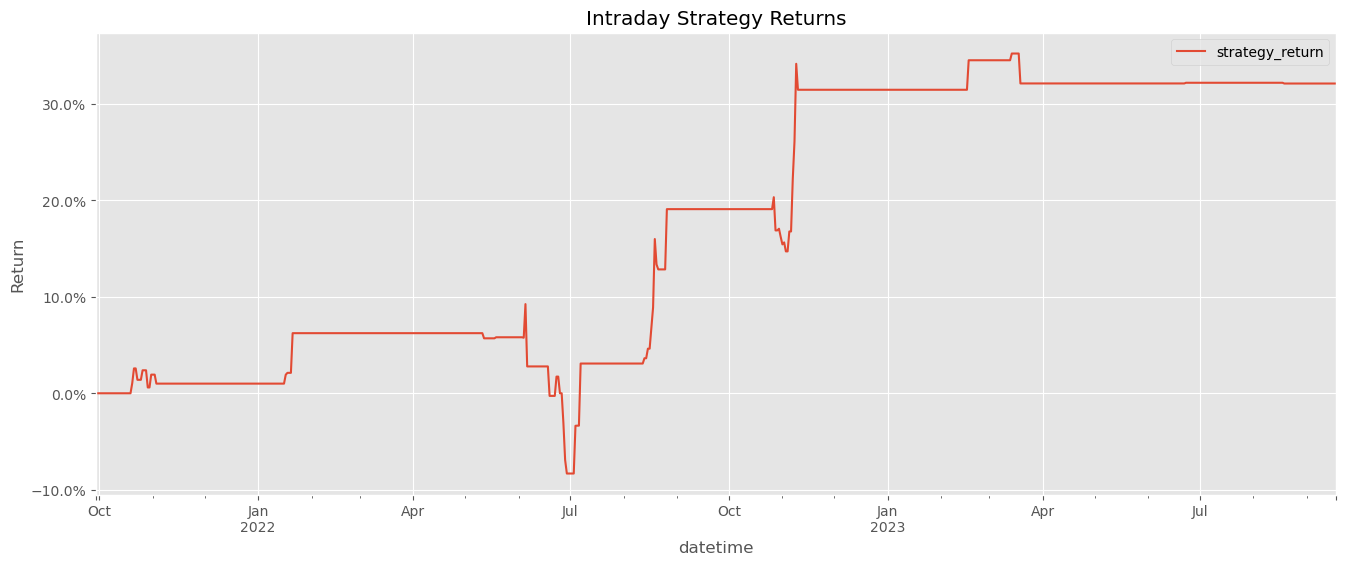

In [323]:
import matplotlib.ticker as mtick

strategy_cumulative_return = np.exp(np.log1p(daily_return_df).cumsum()).sub(1)

strategy_cumulative_return.plot(figsize=(16,6))

plt.title('Intraday Strategy Returns')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.ylabel('Return')

plt.show()

In [ ]:
# This is our strategy 
# We may not trade for quite sometime but then we had some trades whenever we have a match 